In [30]:
# add parent folder to pythonpath
import sys
sys.path.insert(0,'..')
import numpy as np
from crafter_extension_vae import CrafterVariationalAutoencoder
from crafter_extension_utils  import load_crafter_data, plot_side_by_side, choose
from vae_utility import load_critic
import torch
from IPython.display import Image
import pandas as pd


device = 'cuda:0' if torch.cuda.is_available() else 'cpu' # maybe cuda instead of cuda:0
vae = CrafterVariationalAutoencoder().to(device)
vae.encoder.load_state_dict(torch.load('../saved-networks/vae_encoder.pt',map_location=device))
vae.decoder.load_state_dict(torch.load('../saved-networks/vae_decoder.pt',map_location=device))


vae.eval()



critic = load_critic('../crafter_models/critic-windowsize=20-batch_size=256-dataset_size=45000-epochs=400/critic.pt', crafter=True)
critic.eval();

In [2]:
_, dset_test = load_crafter_data(critic, dataset_size=1,
                                            windowsize=20,path='..')

loading minerl-data...
Dataset already downloaded :)


loading episodes ...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 79.81it/s]


evaluate:   0%|          | 0/149 [00:00<?, ?it/s]

9847 2413 2584


In [13]:
print(dset_test.shape)

torch.Size([3711, 3, 48, 64])


In [3]:
print(f"critic produces logits between {torch.min(critic(dset_test))} and {torch.max(critic(dset_test))}.")

critic produces logits between -40.35972595214844 and 6.942310810089111.


In [4]:
low_critic_value = torch.tensor(-5)#torch.min(critic(dset_test))
medium_critic_value = torch.min(critic(dset_test)) + torch.max(critic(dset_test)) / 2

high_critic_value = torch.max(critic(dset_test))


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

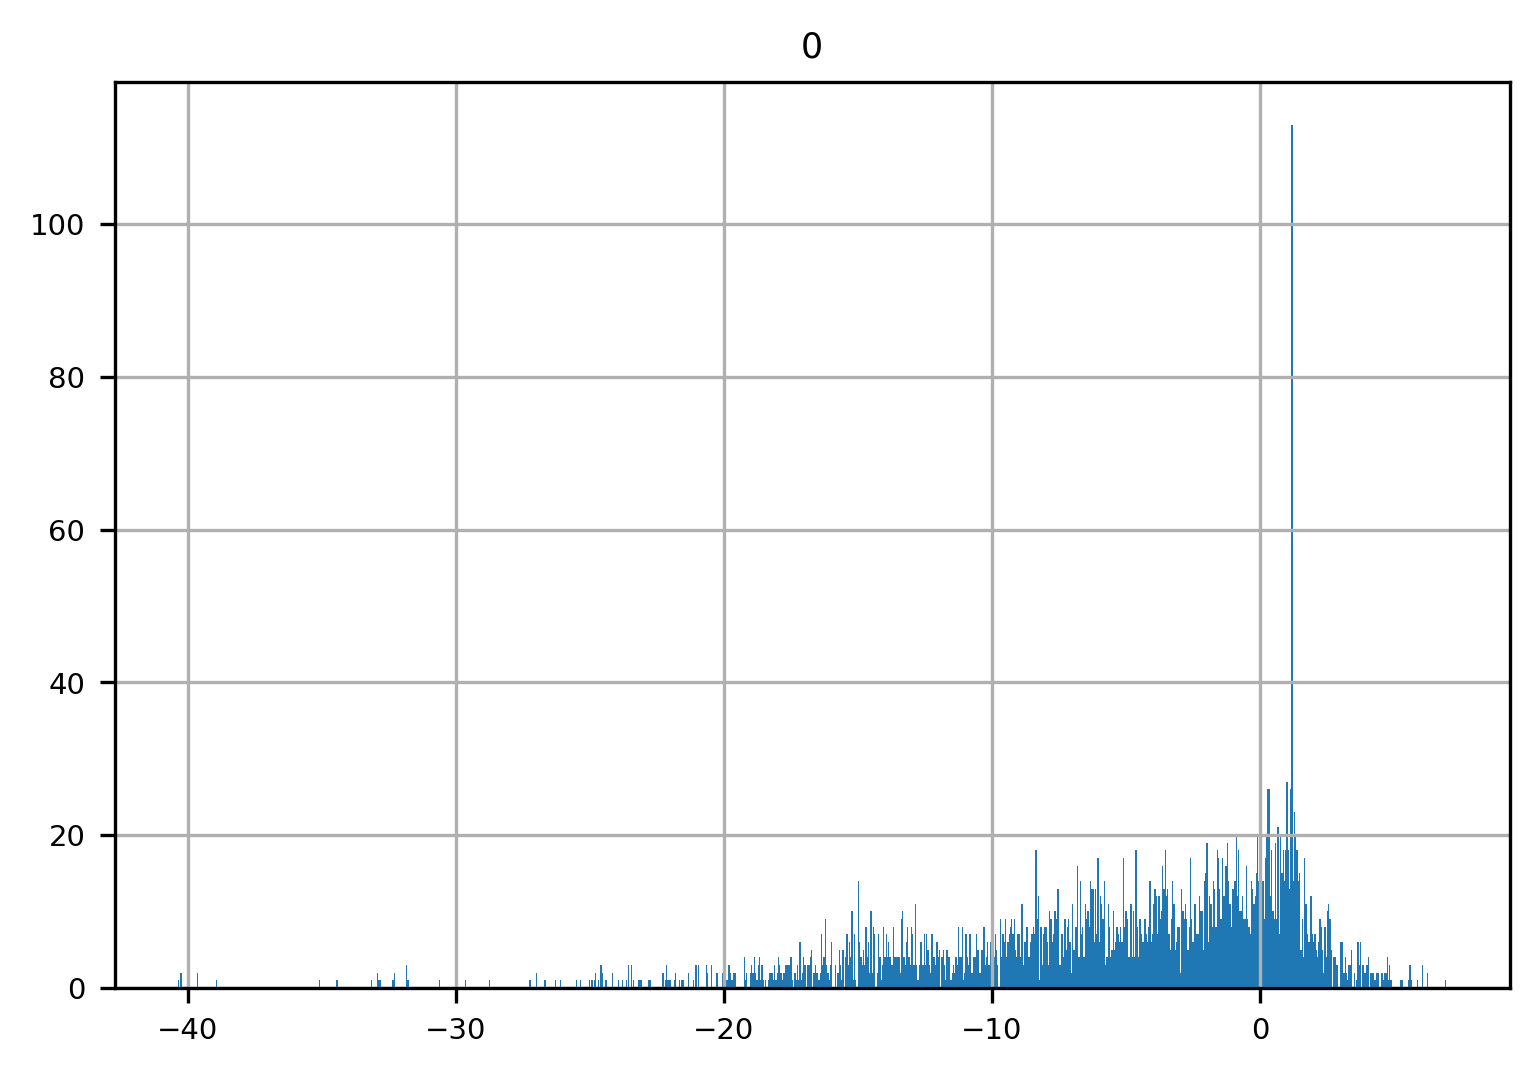

In [29]:
c_values = critic(dset_test)
df = pd.DataFrame([x for x in c_values.cpu().detach().numpy()])
df.hist(bins=1000)

In [5]:
!rm -rf testim*

predicting


/tmp/ipykernel_47165/780188216.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x,_,_, recon_med = vae(dset,torch.tensor(medium_critic_value).repeat(len(dset),1))
/tmp/ipykernel_47165/780188216.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  _,_,_, recon_high = vae(dset,torch.tensor(high_critic_value).repeat(len(dset),1))
/tmp/ipykernel_47165/780188216.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  _,_,_, recon_low = vae(dset,torch.tensor(low_critic_value).repeat(len(dset),1))


finished


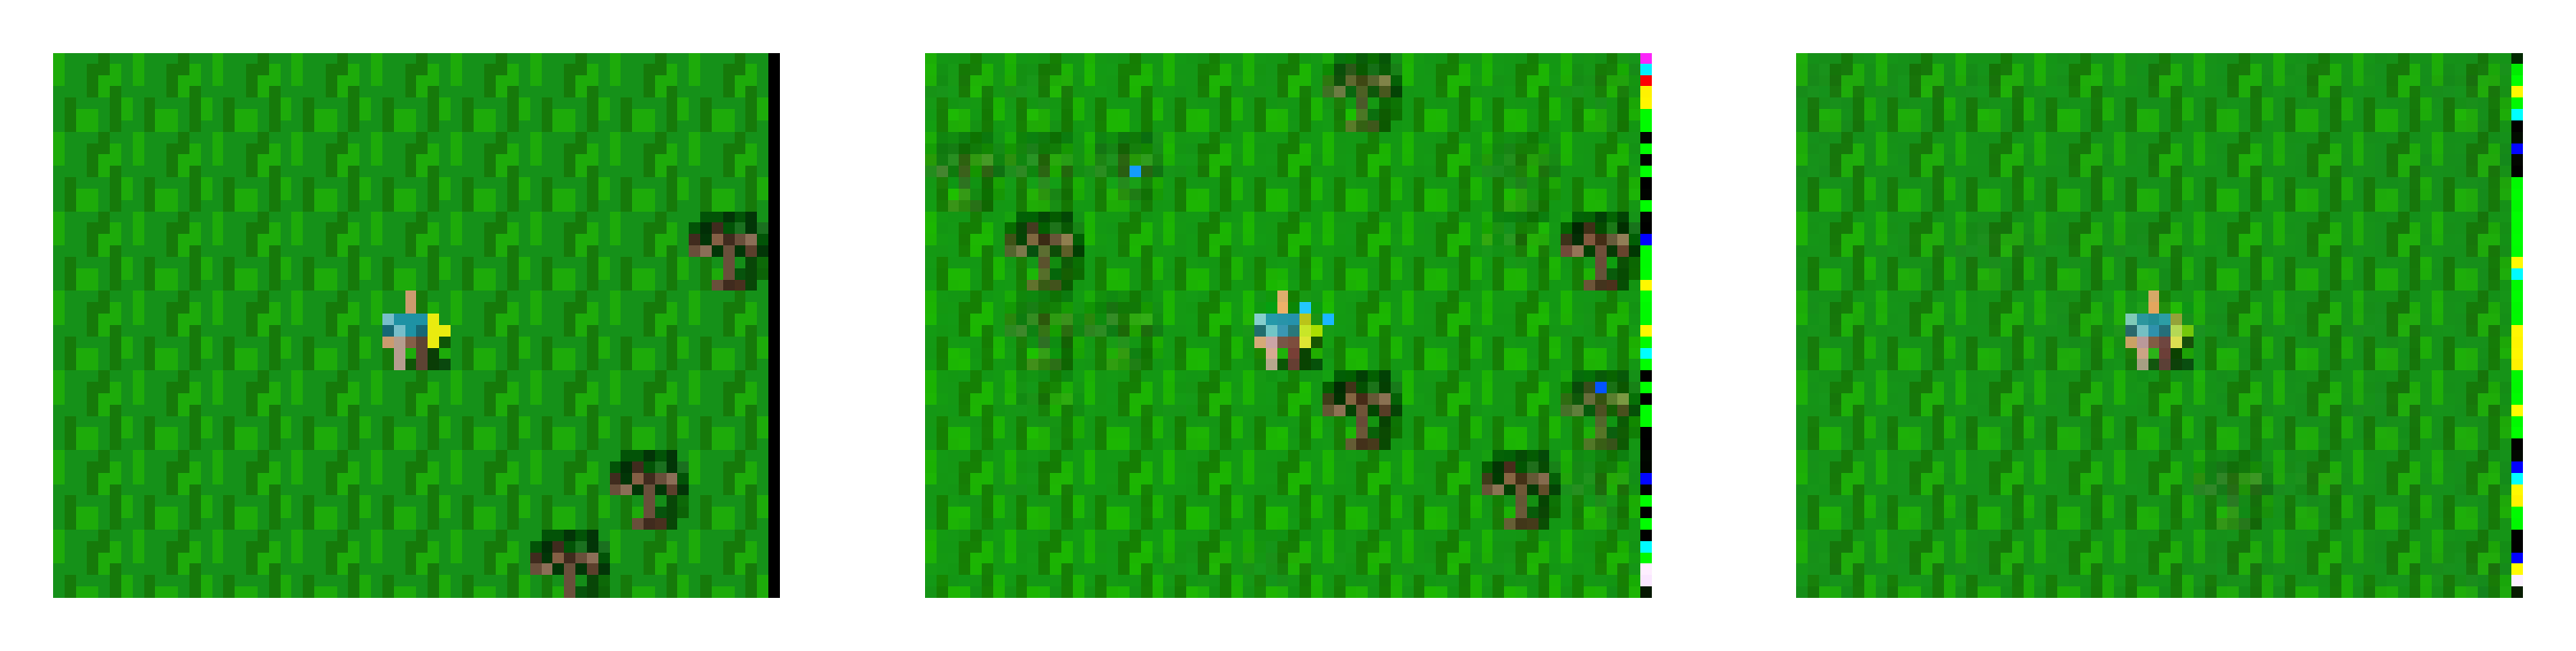

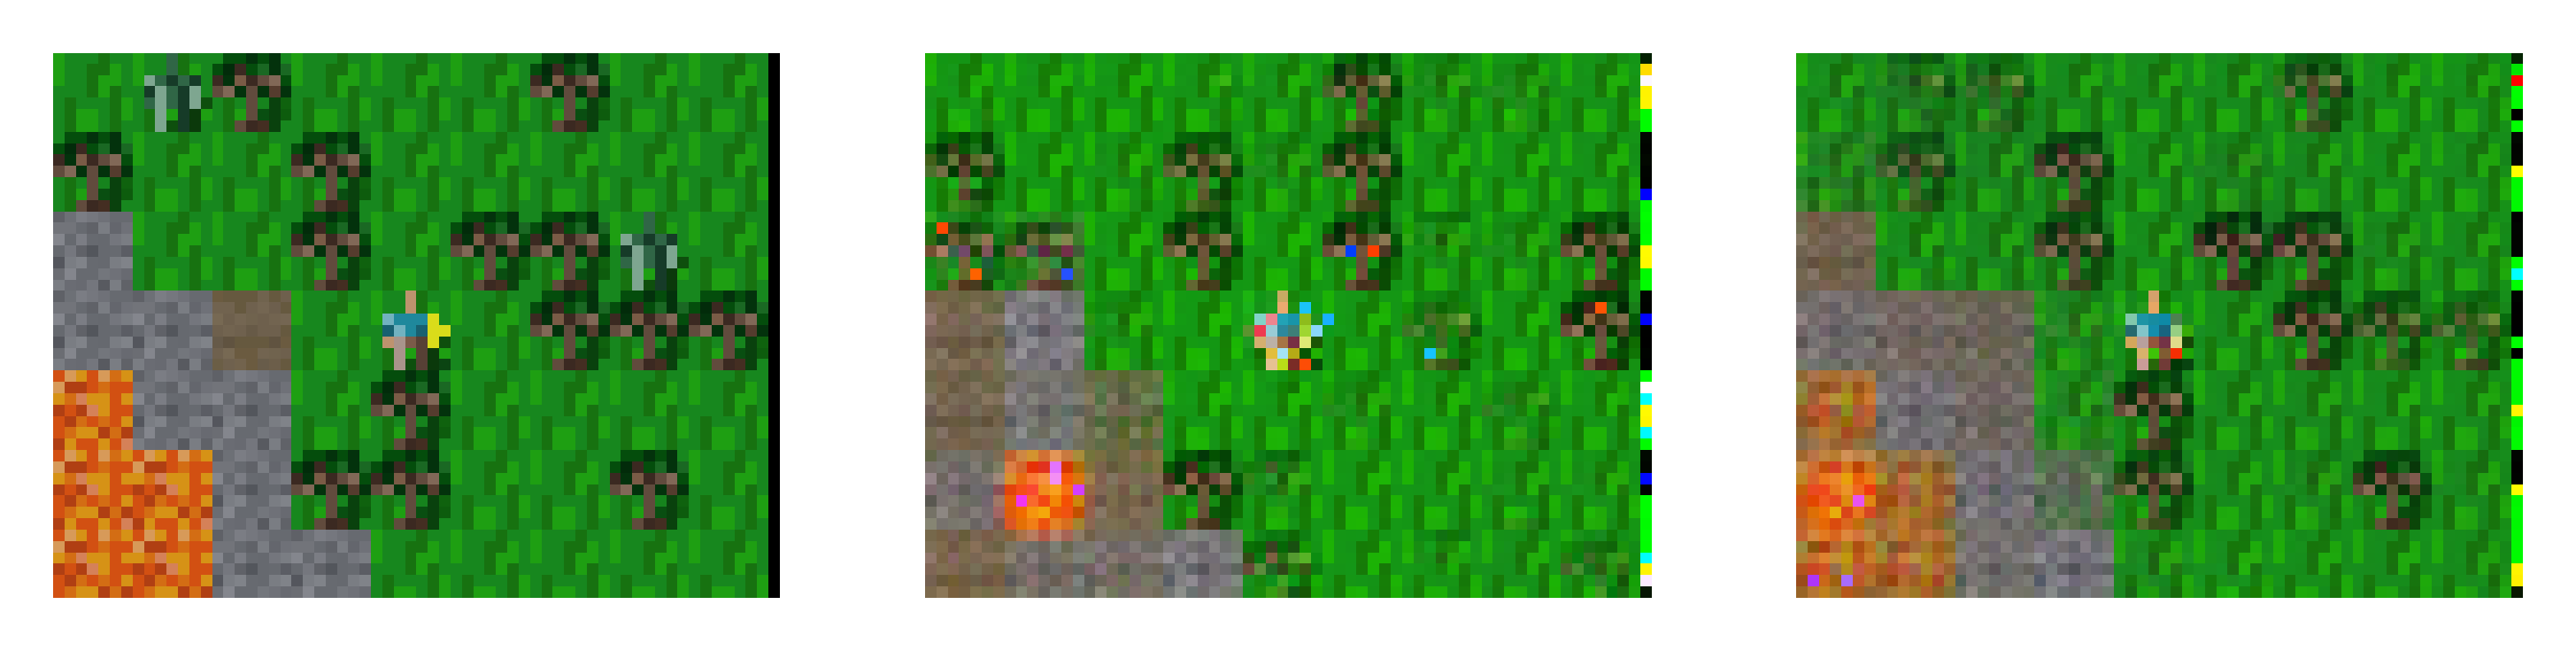

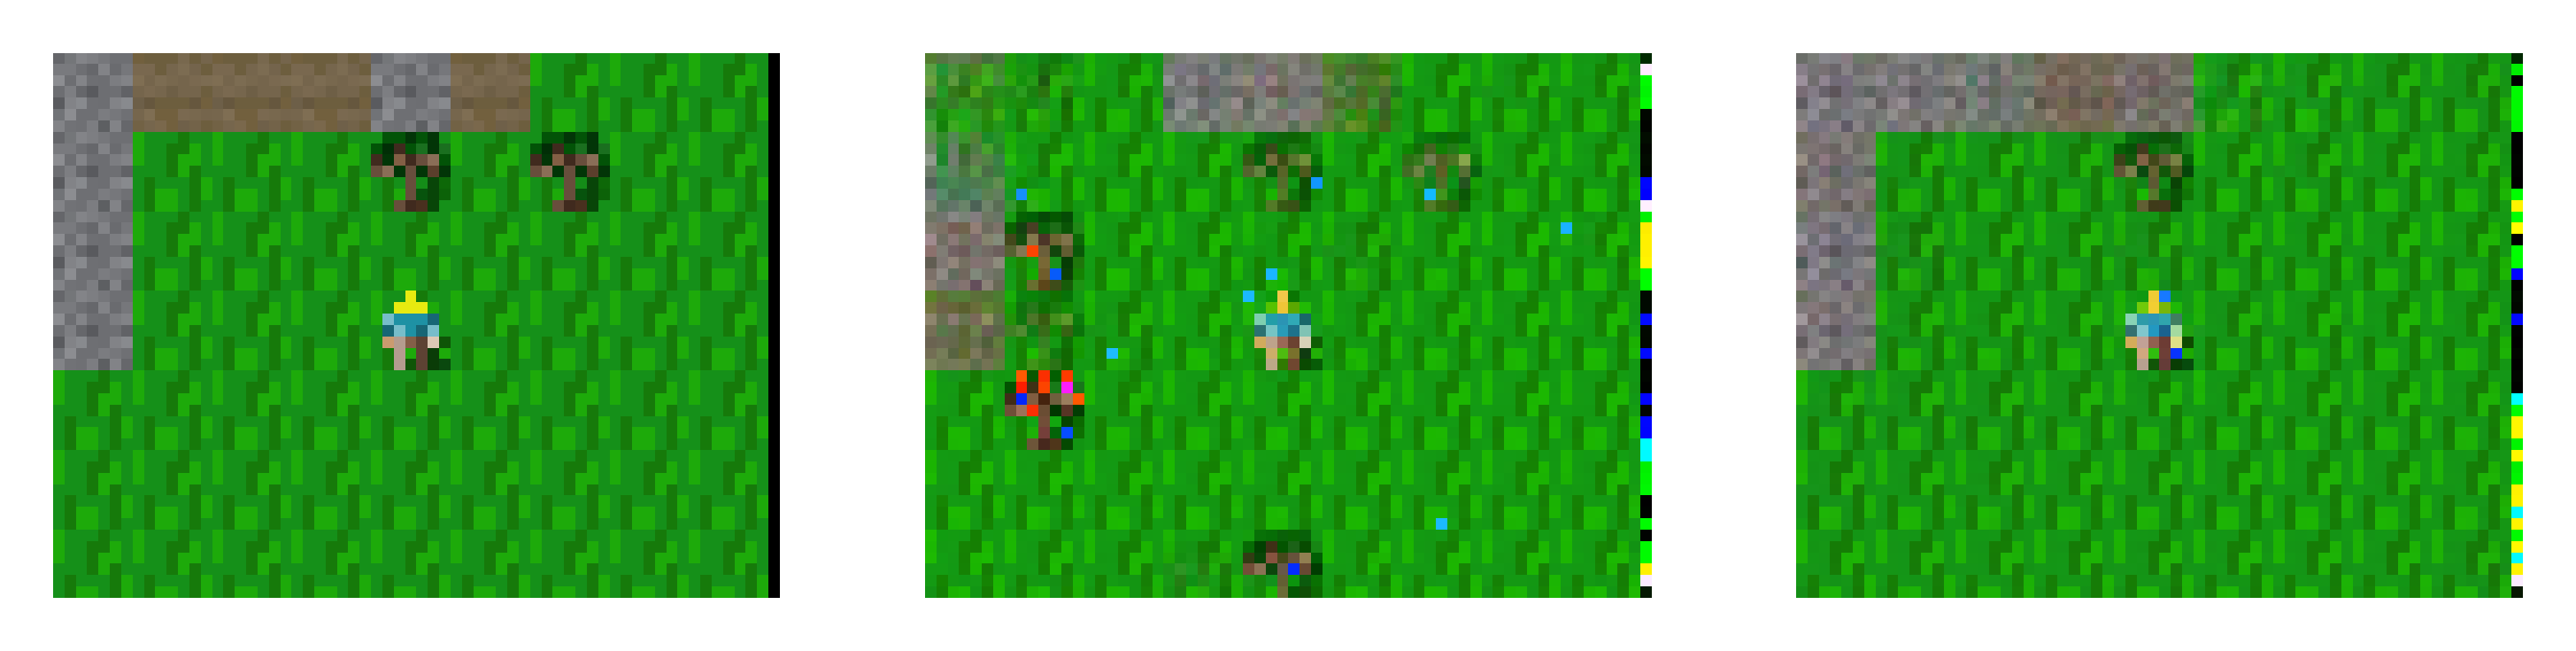

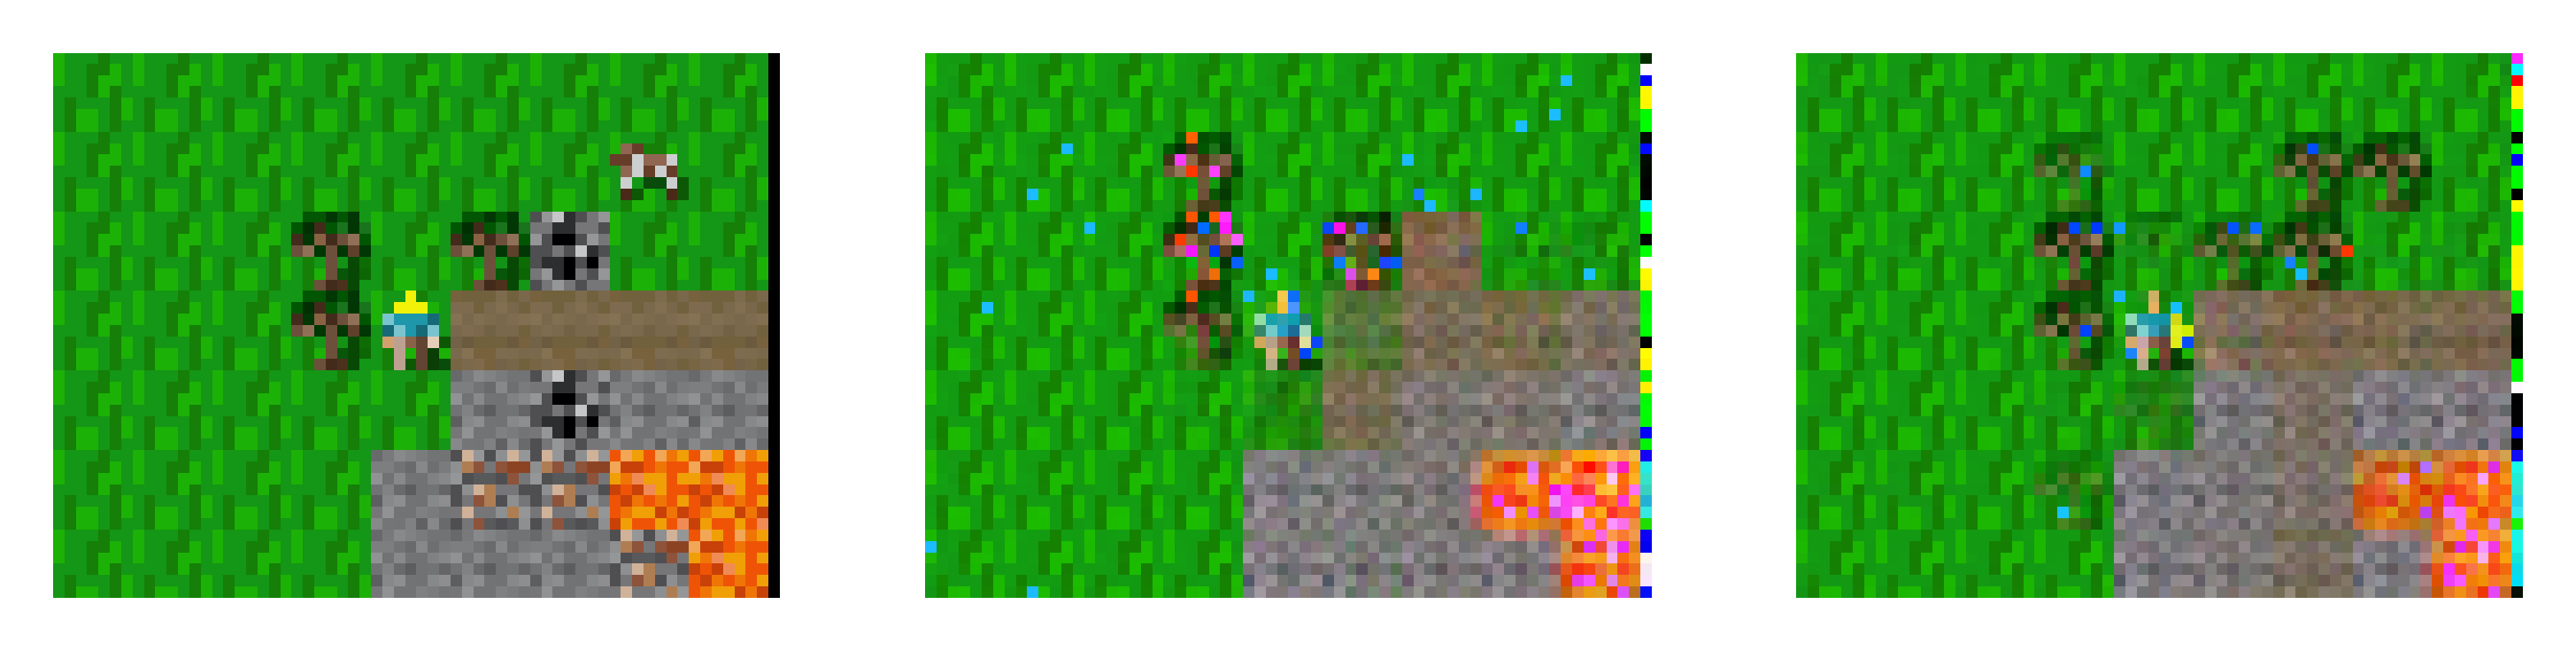

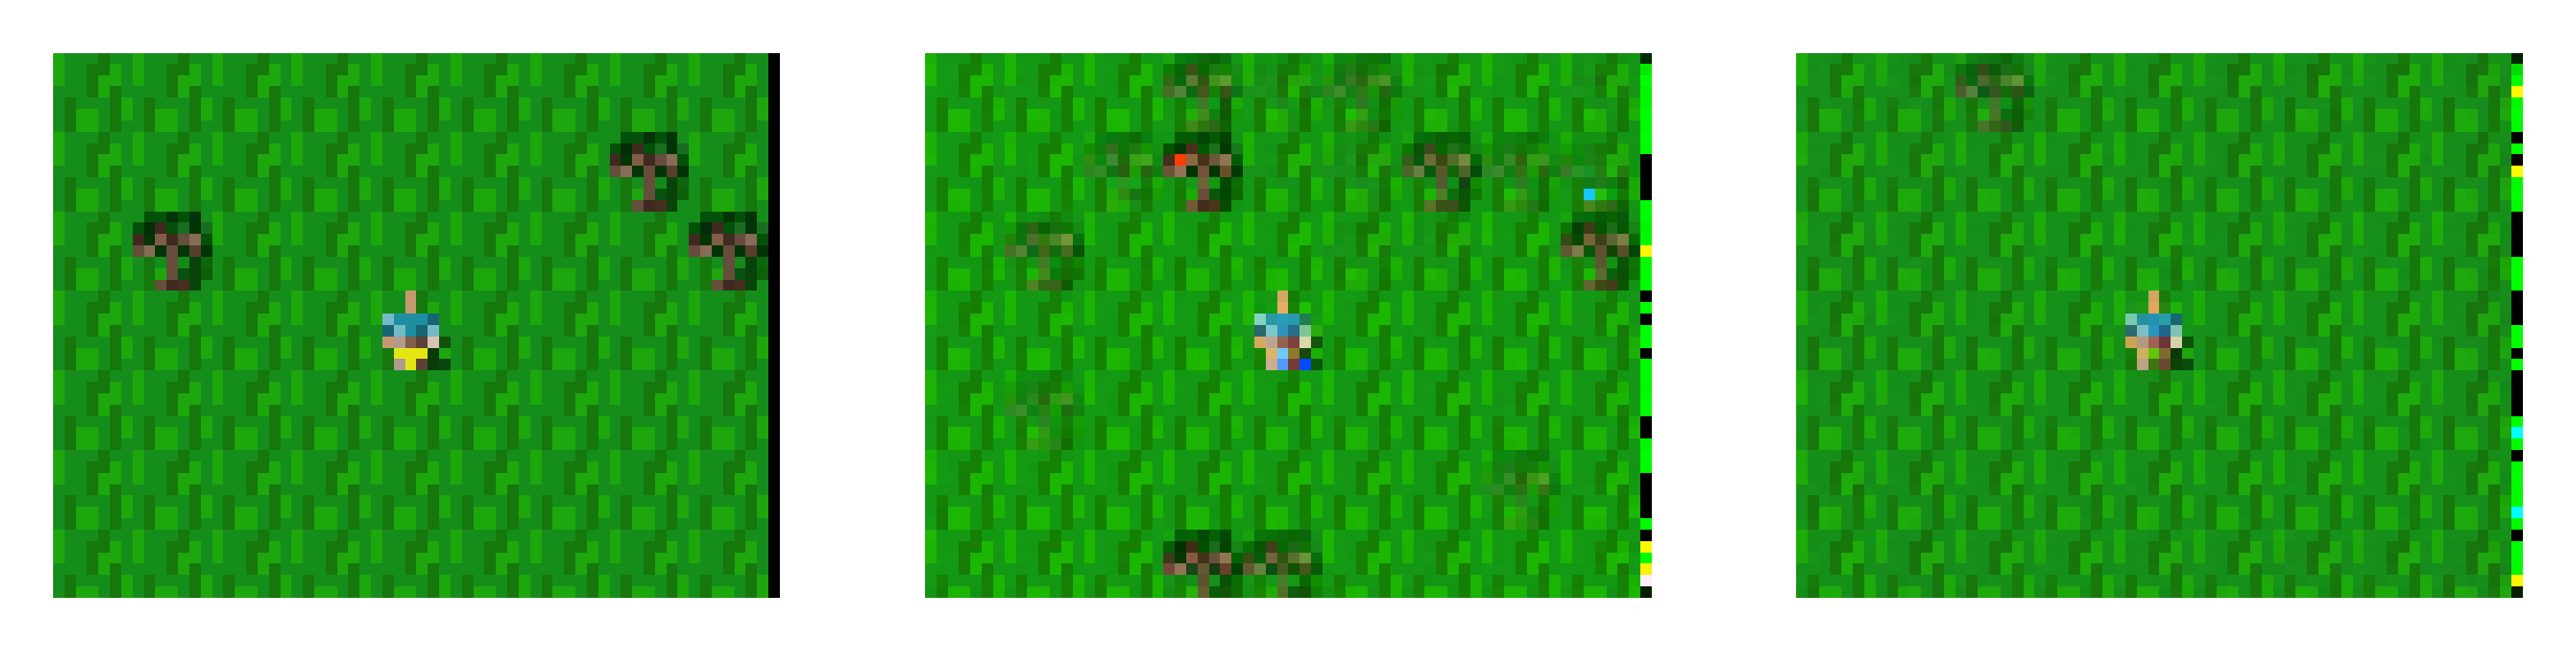

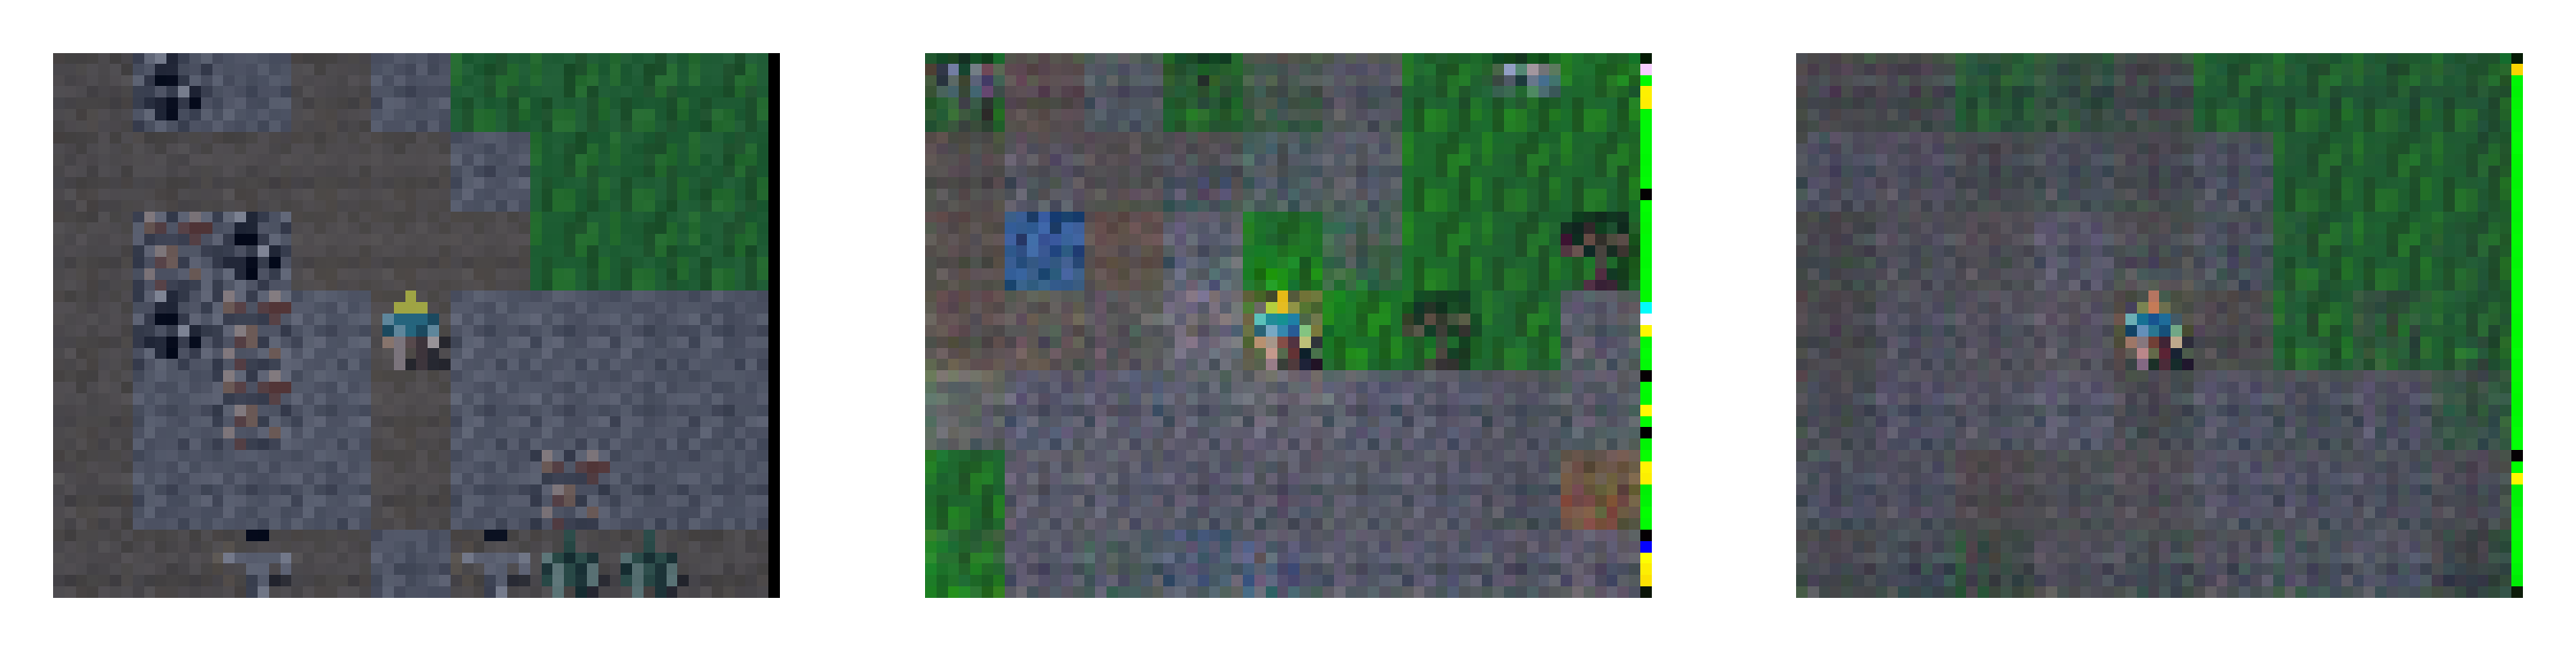

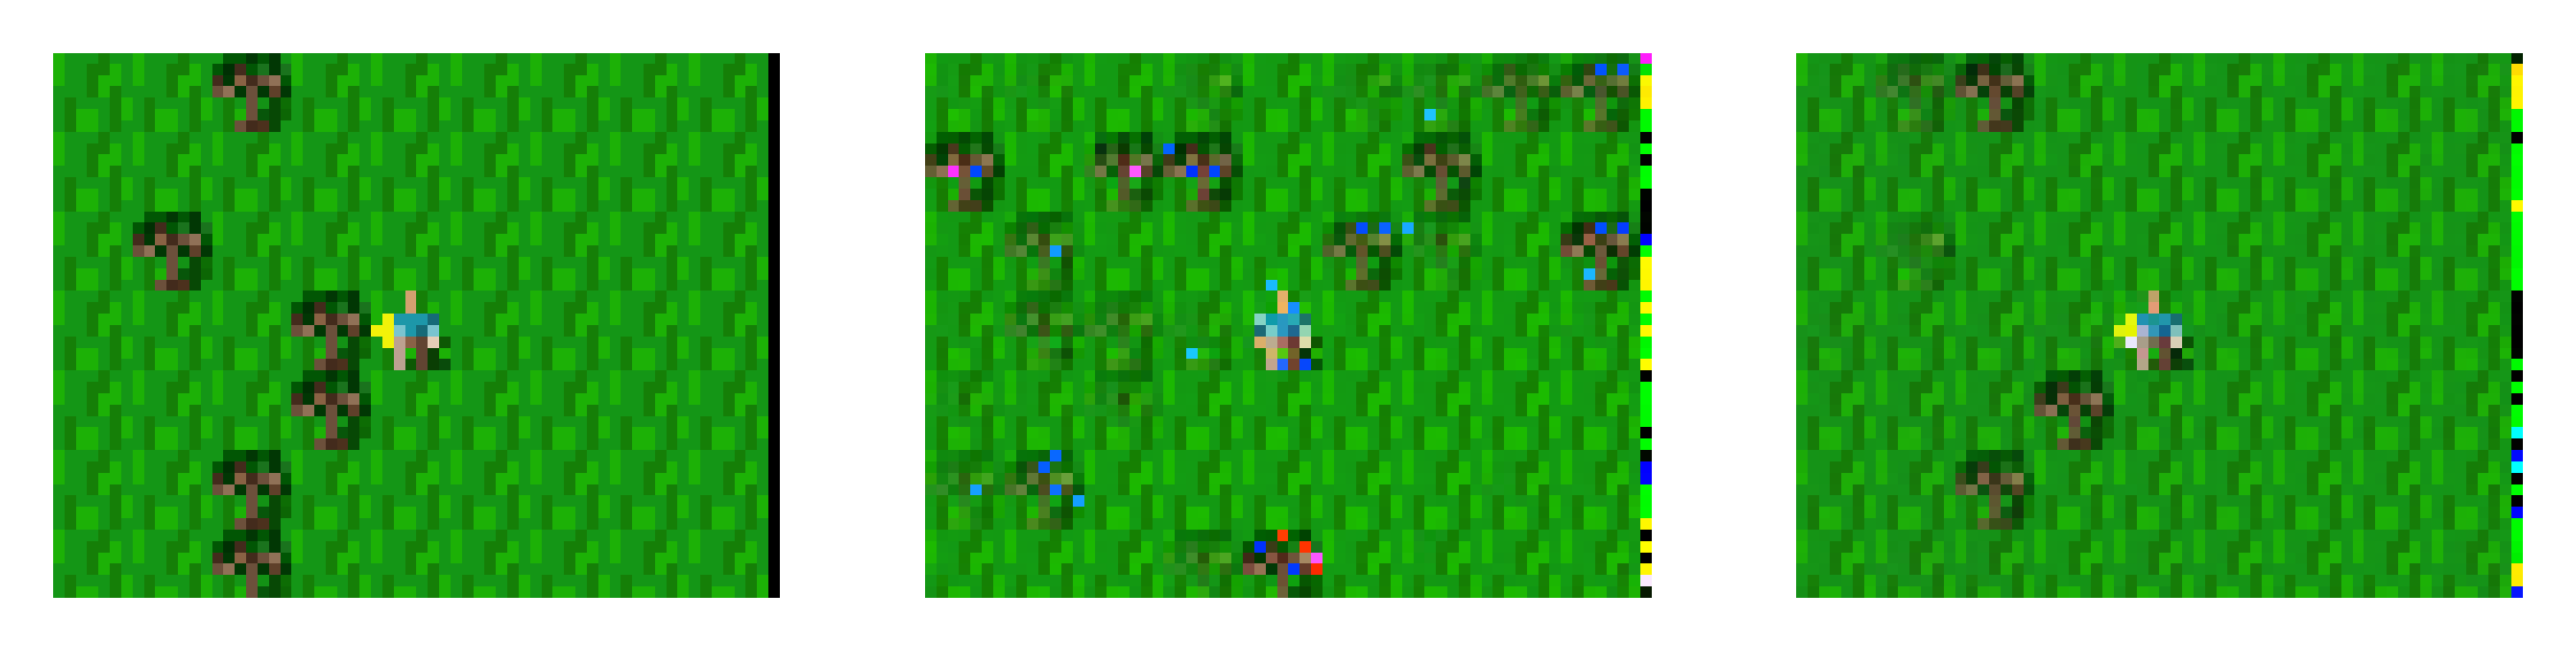

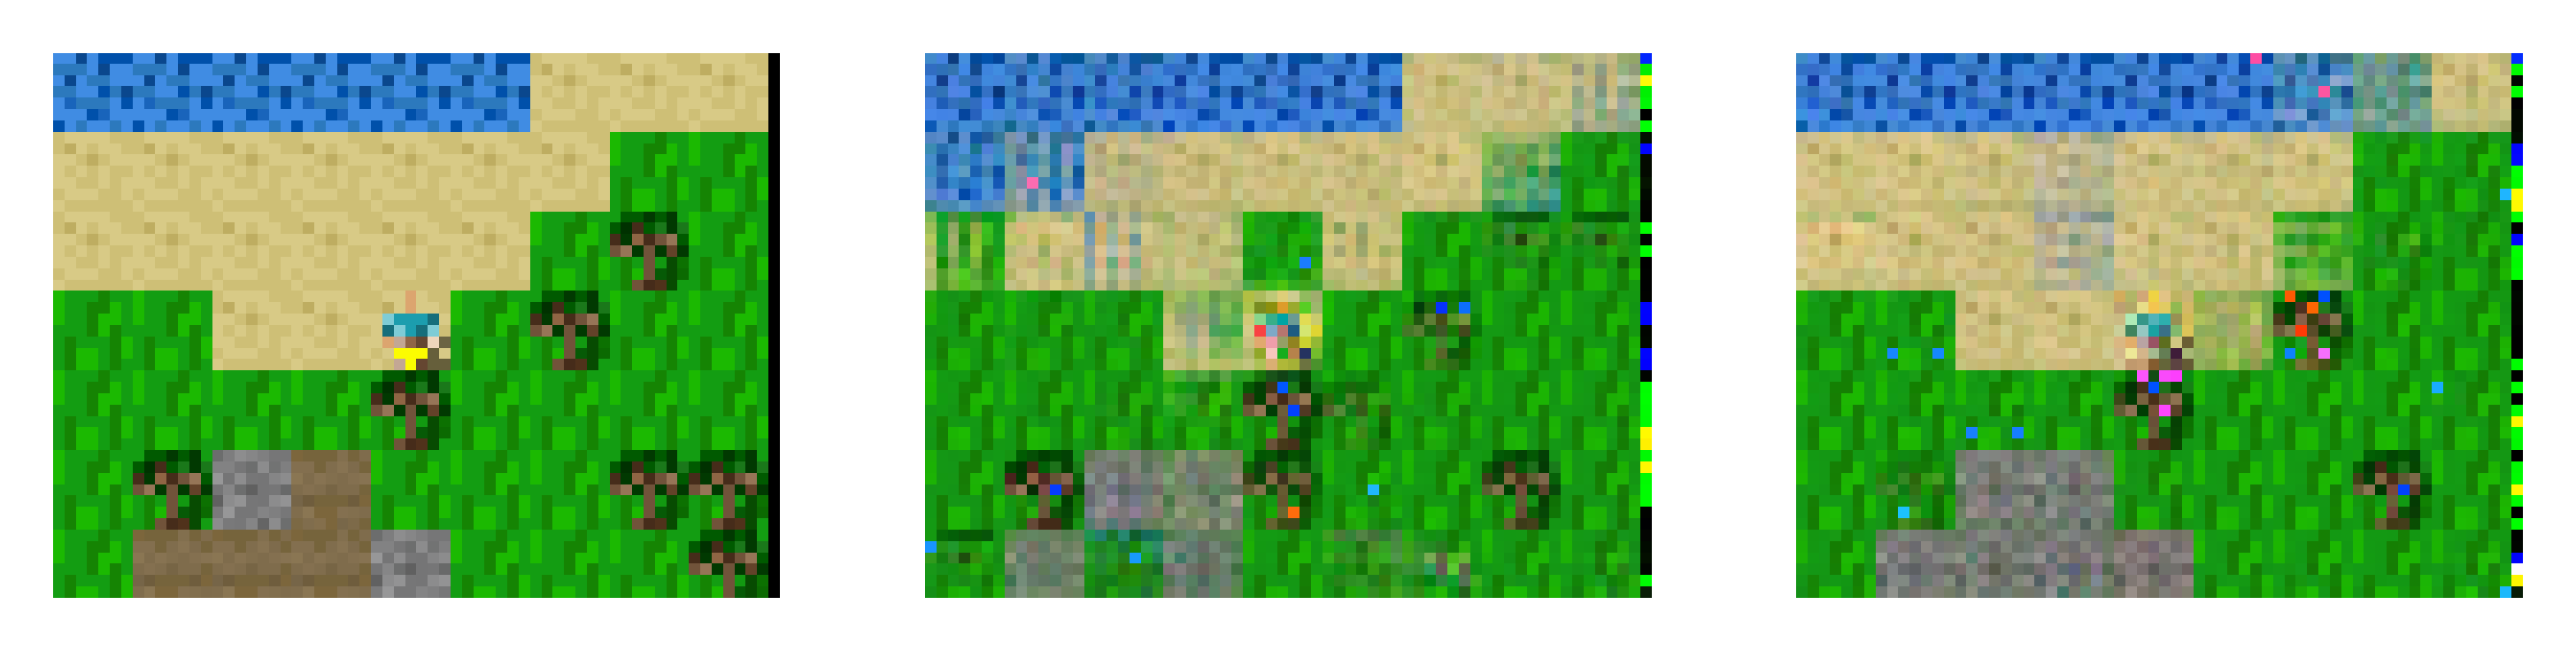

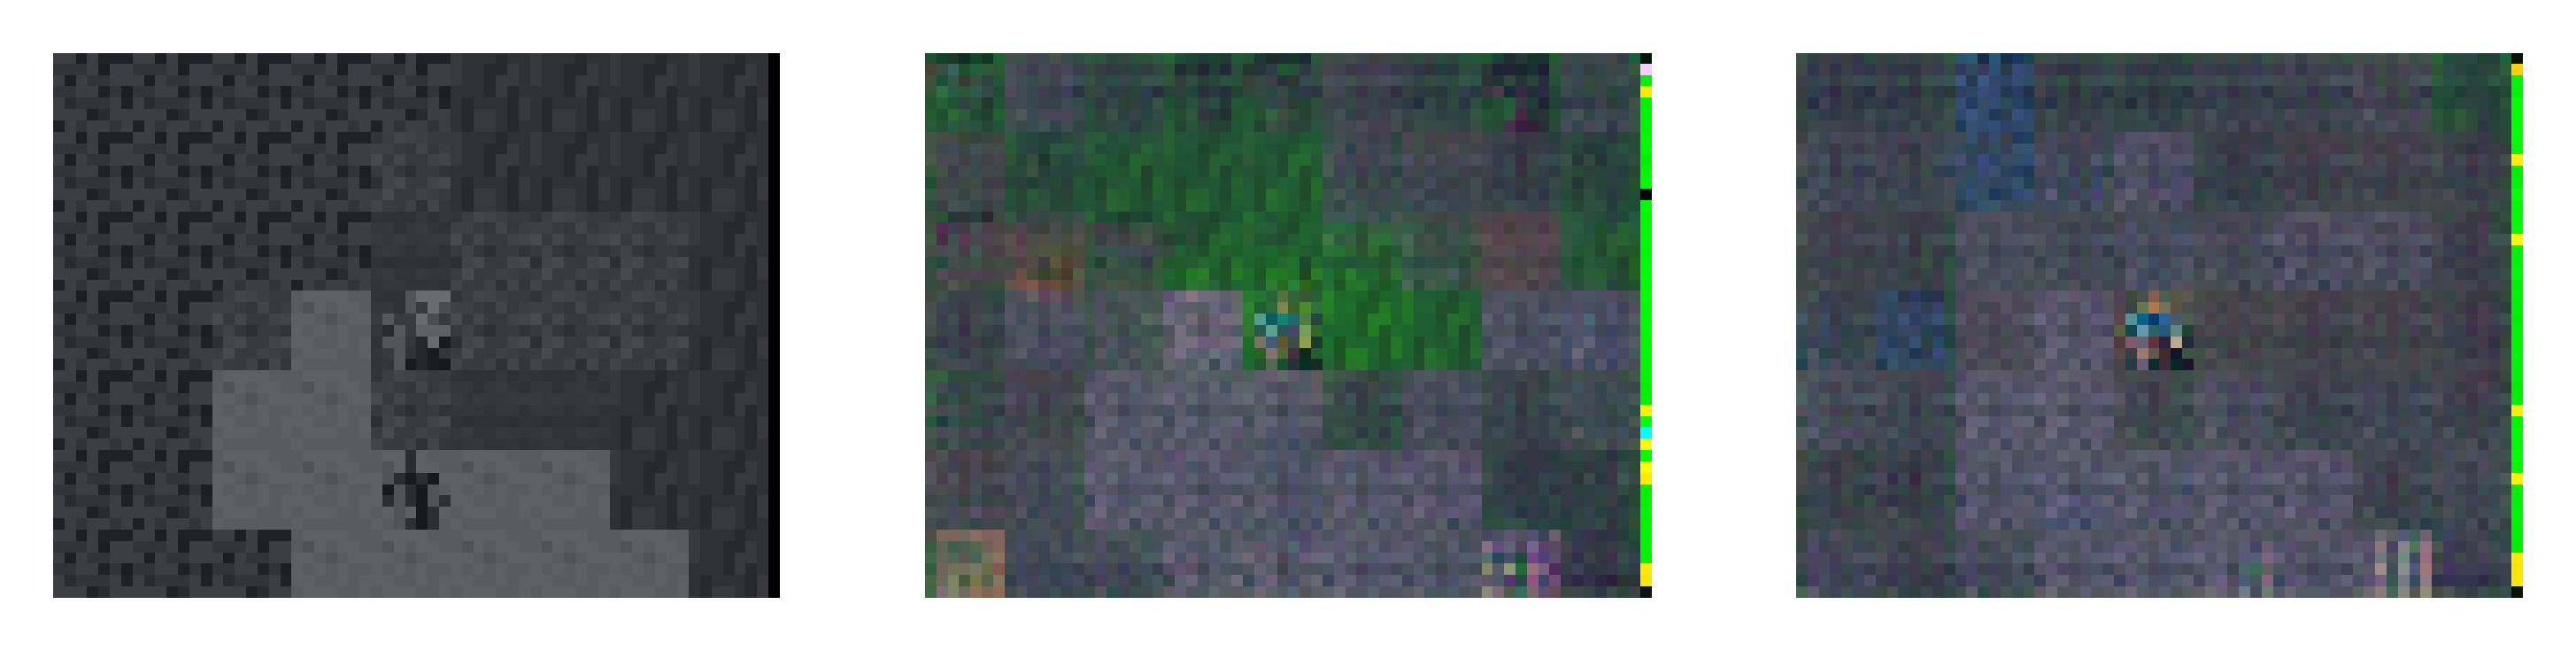

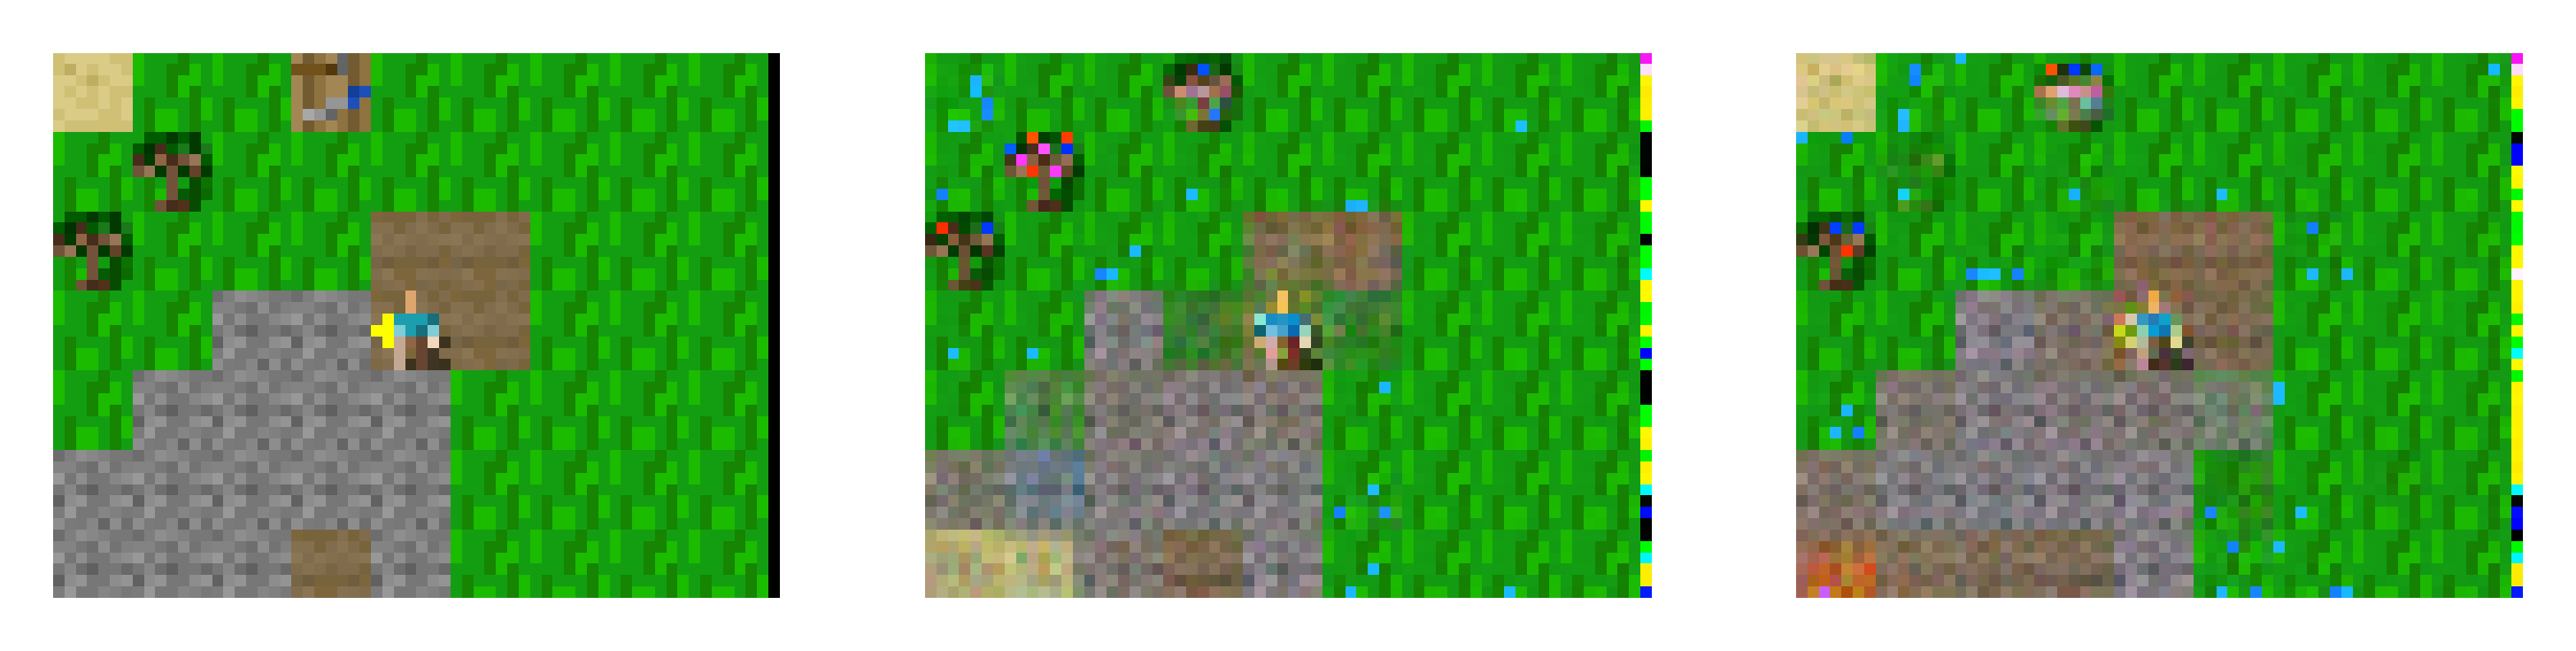

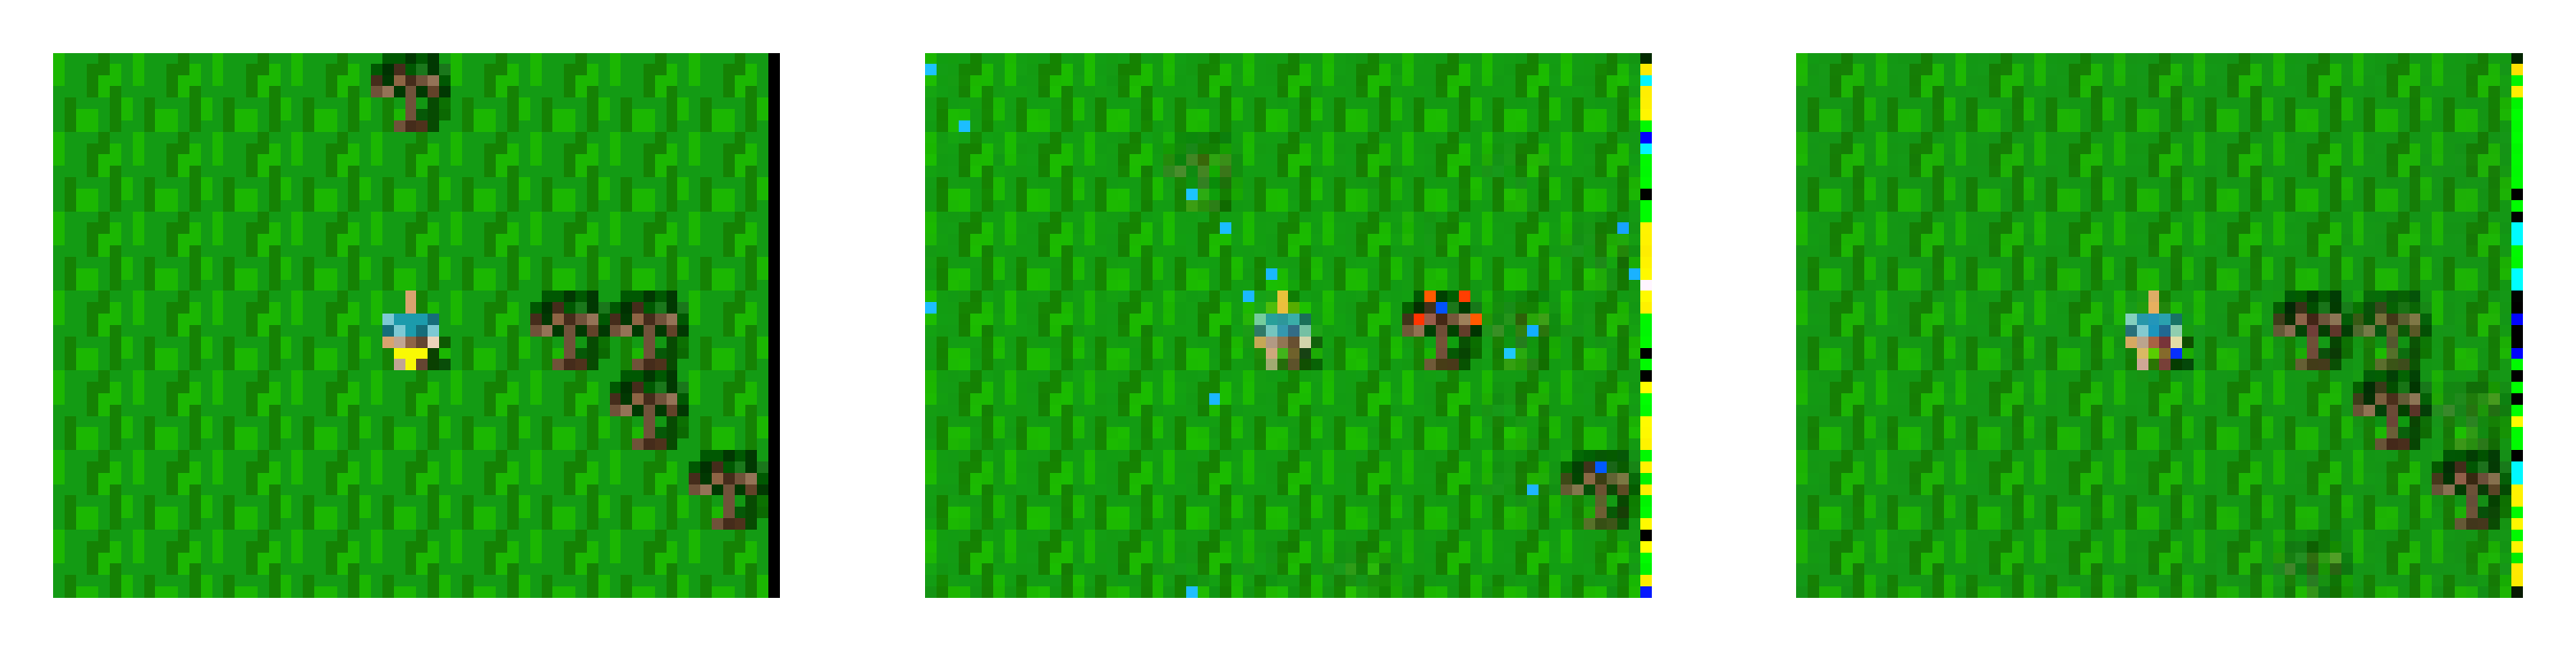

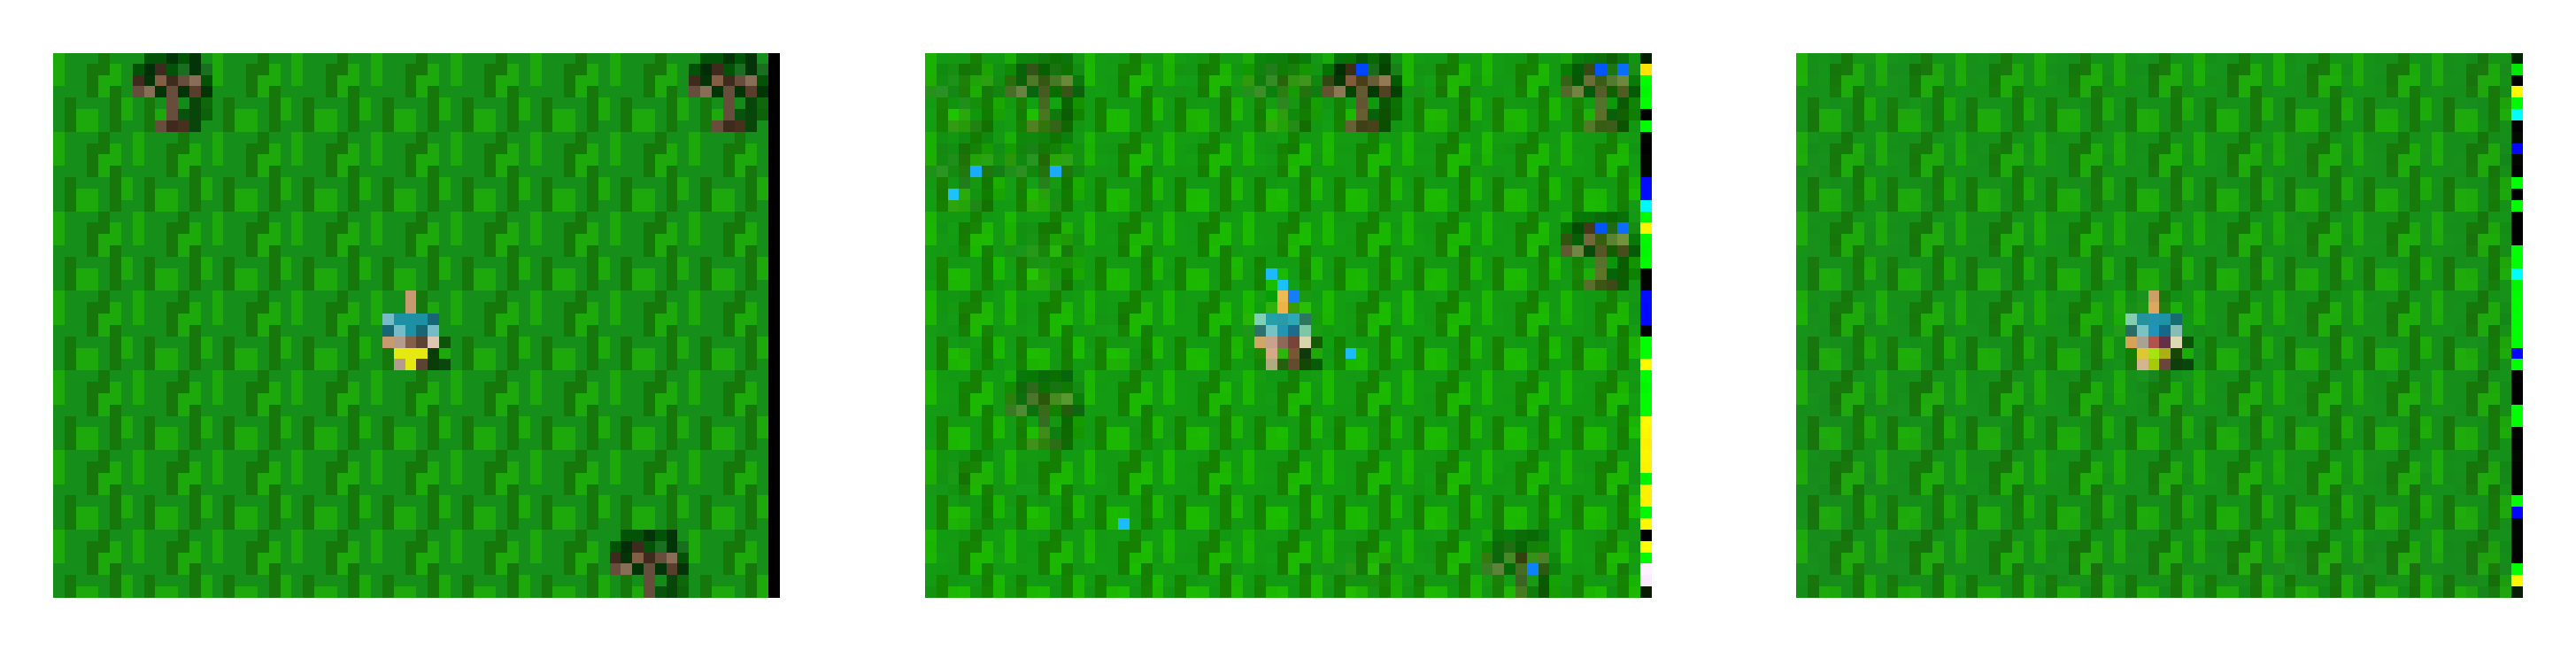

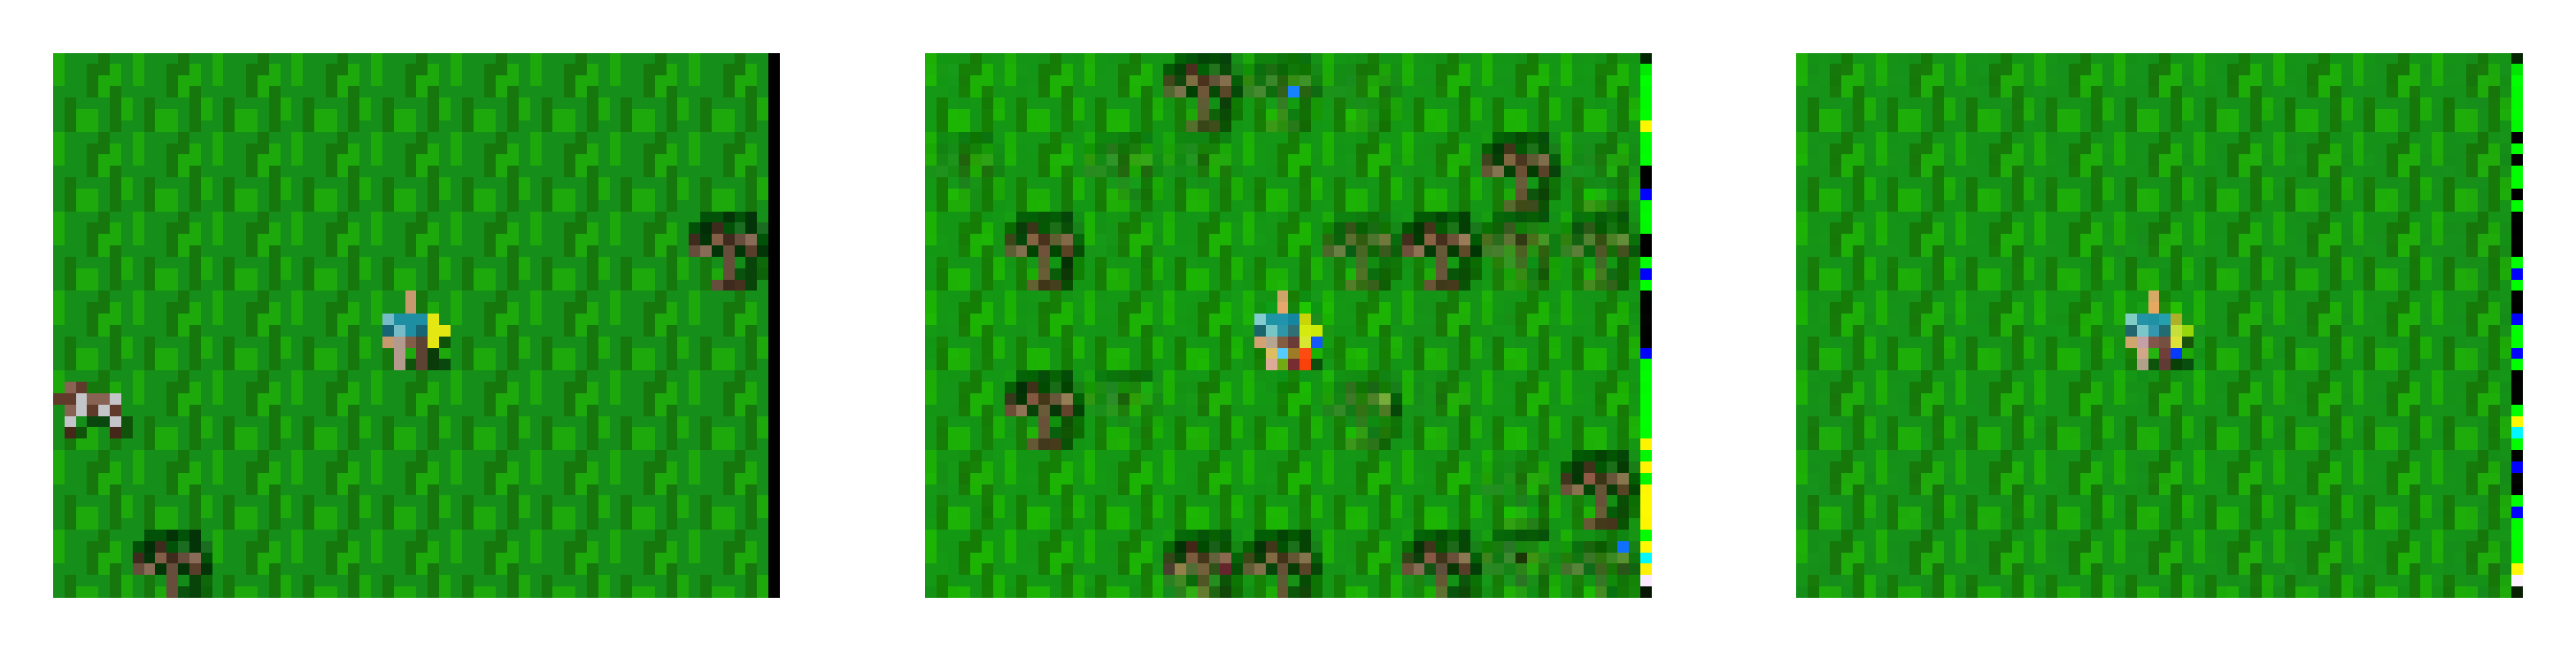

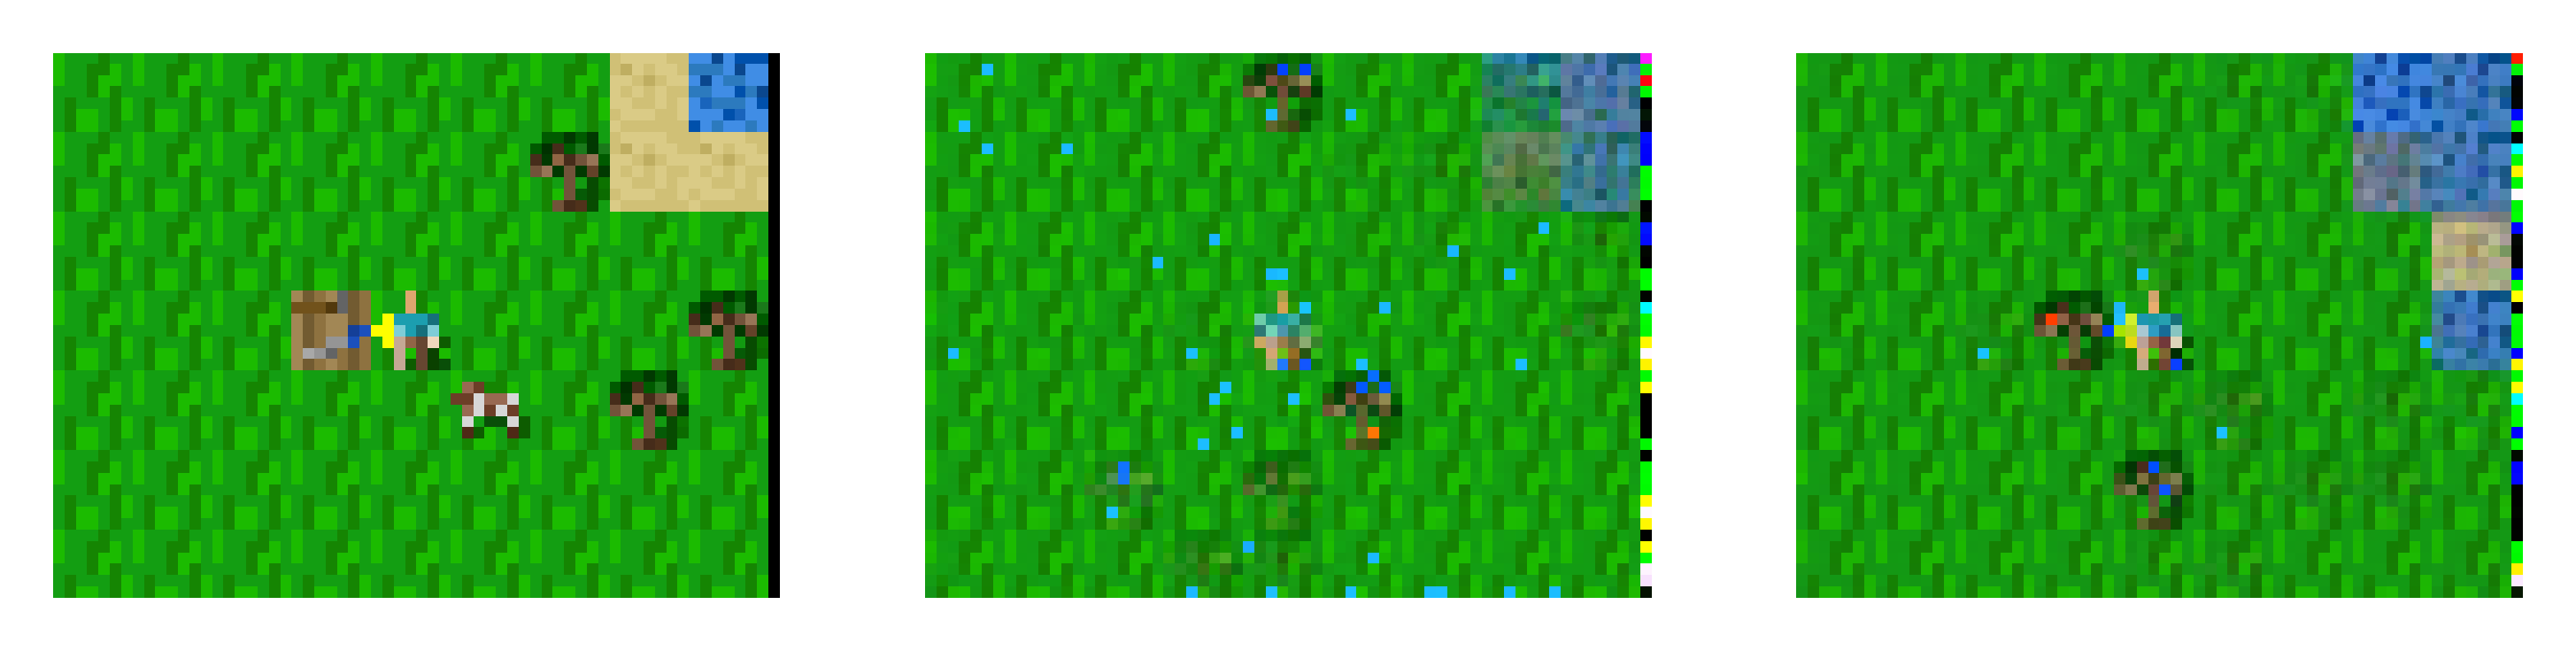

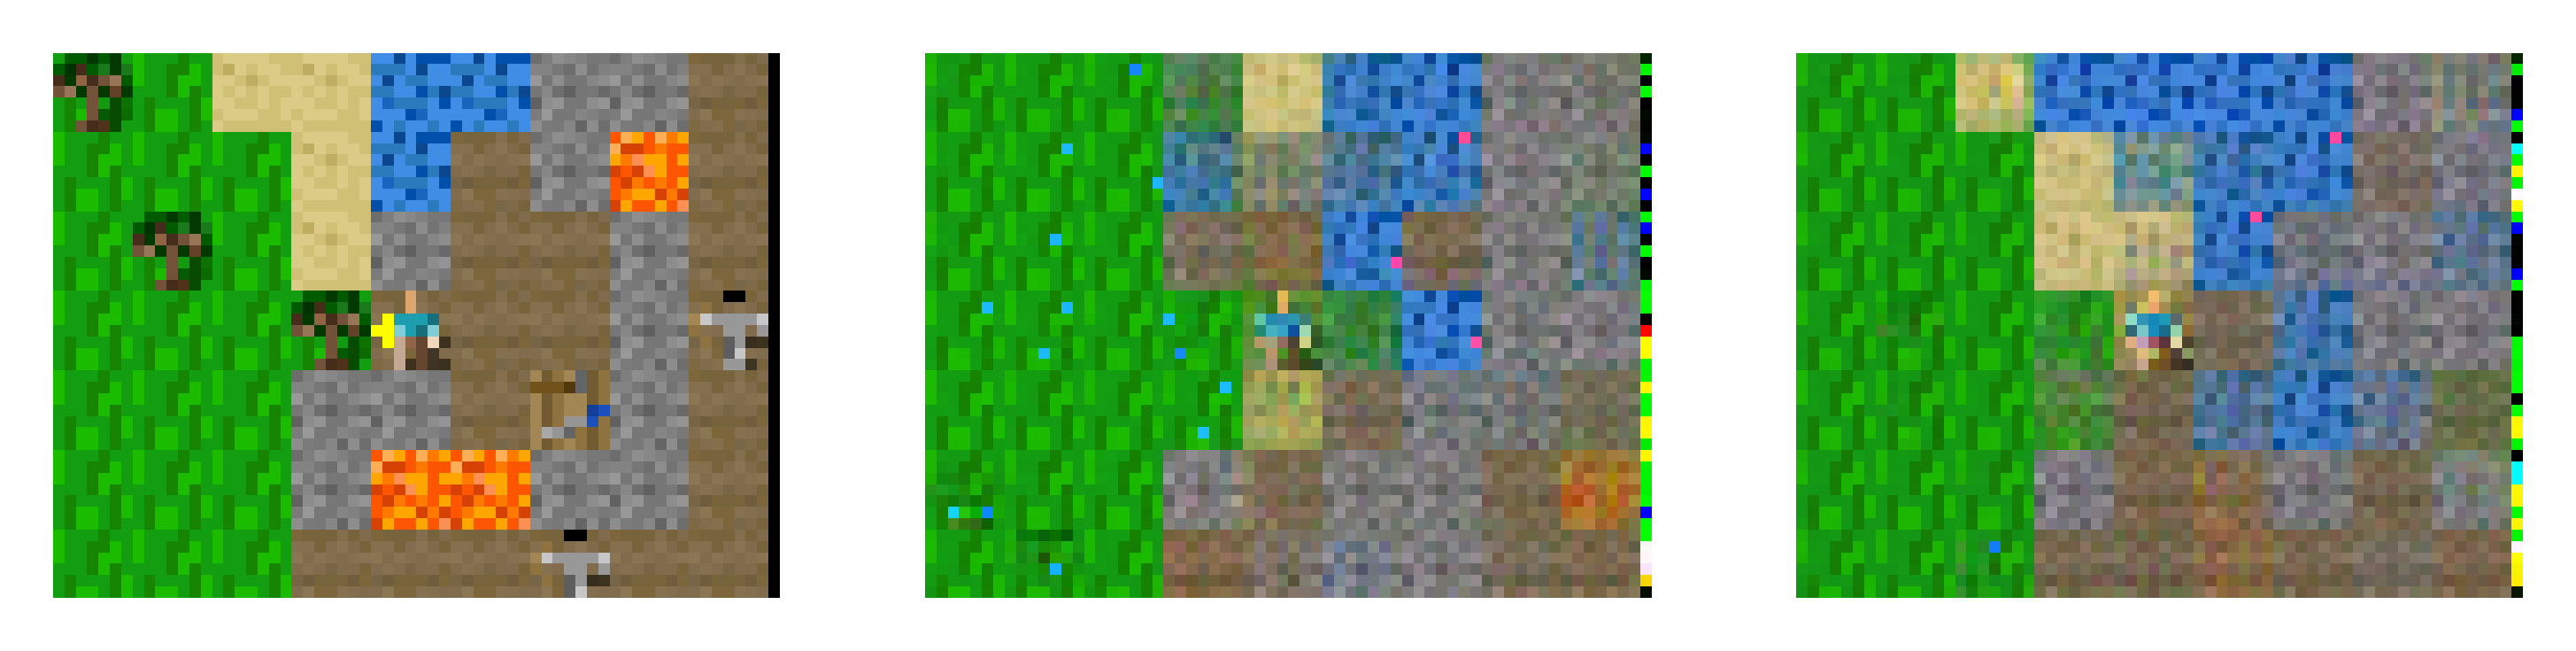

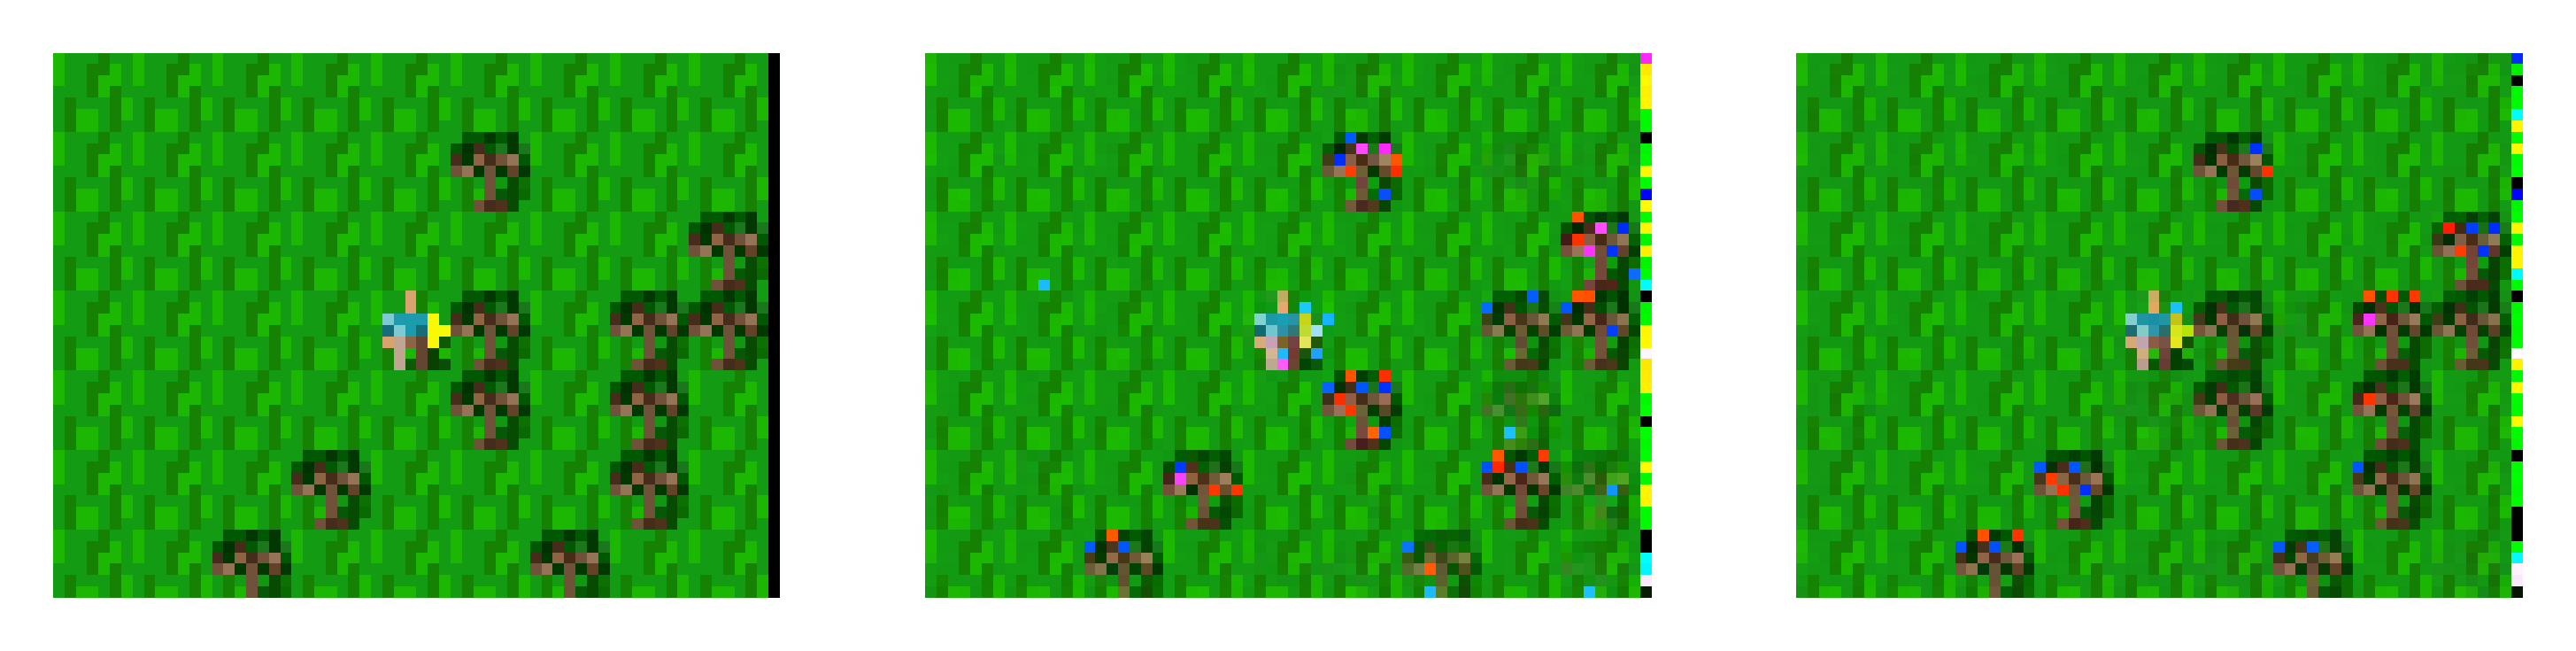

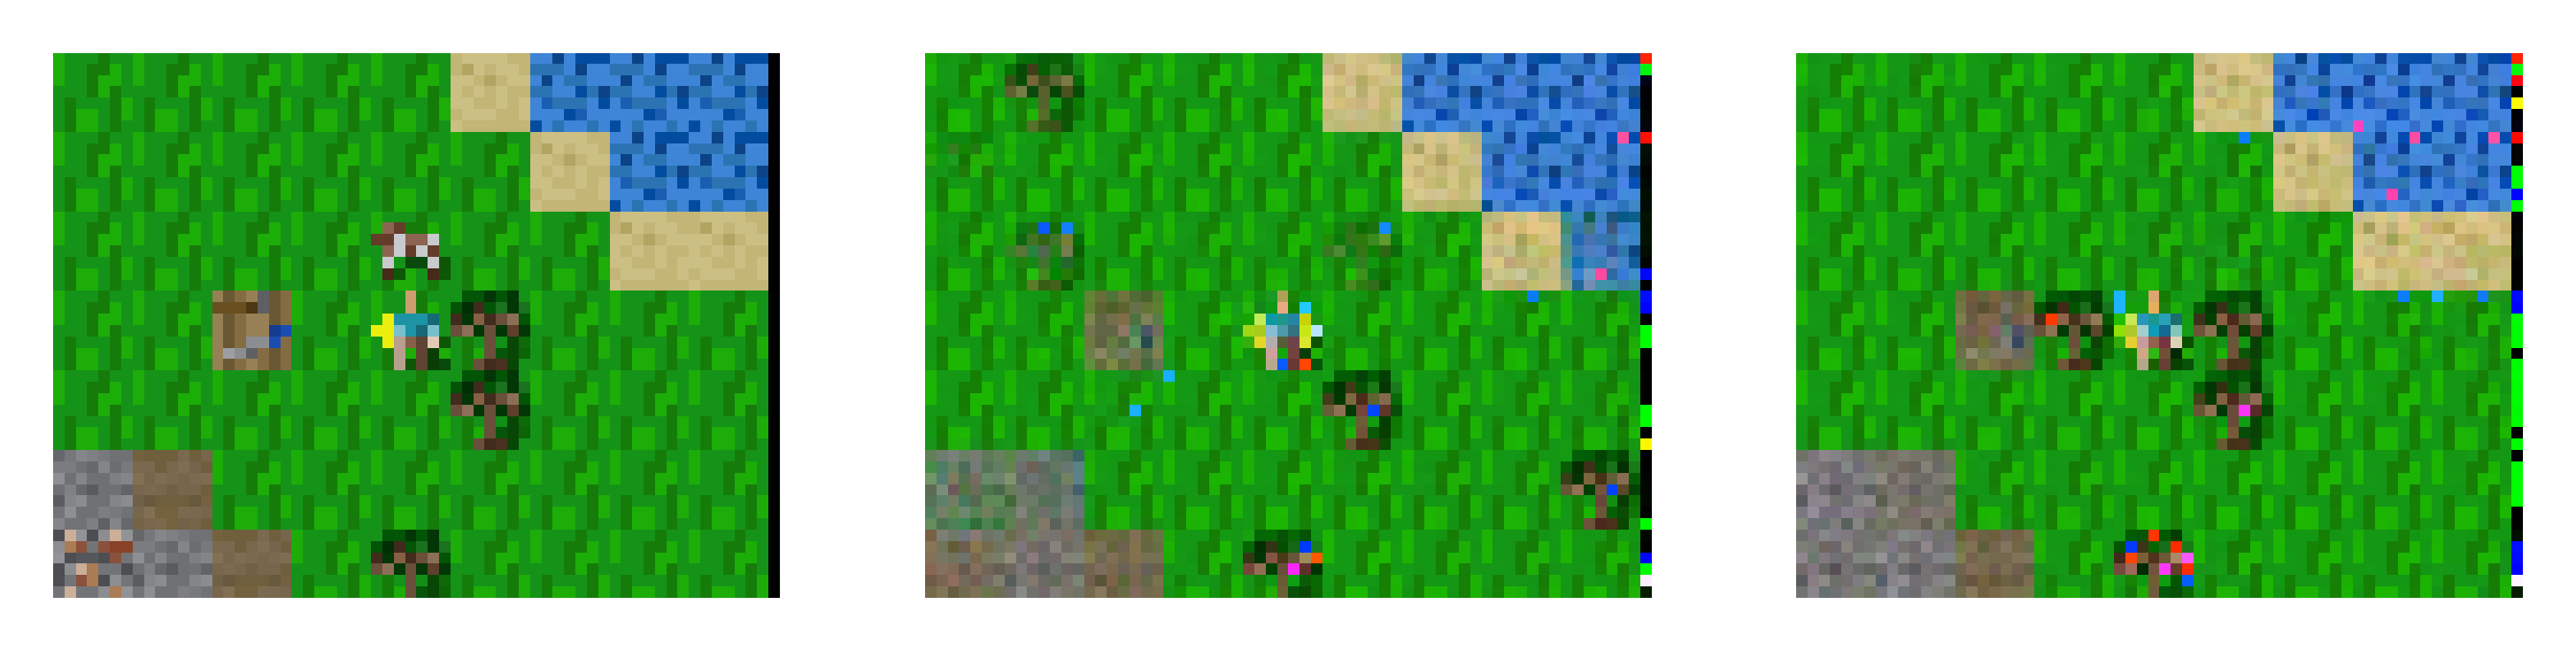

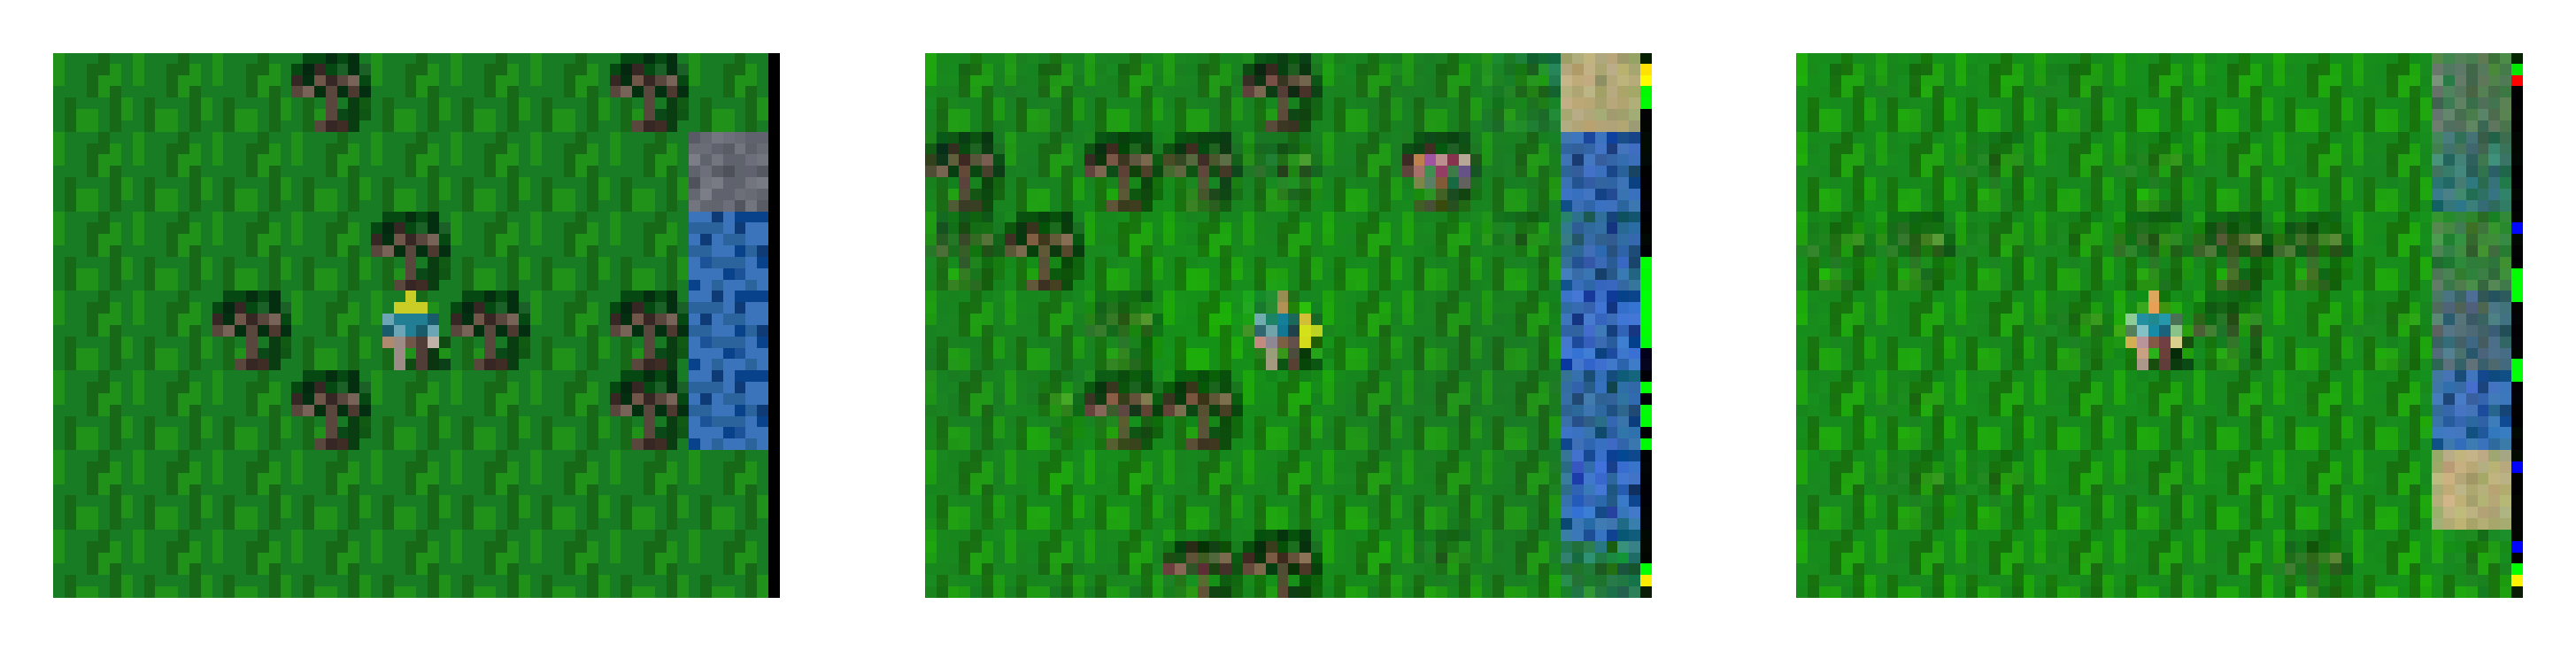

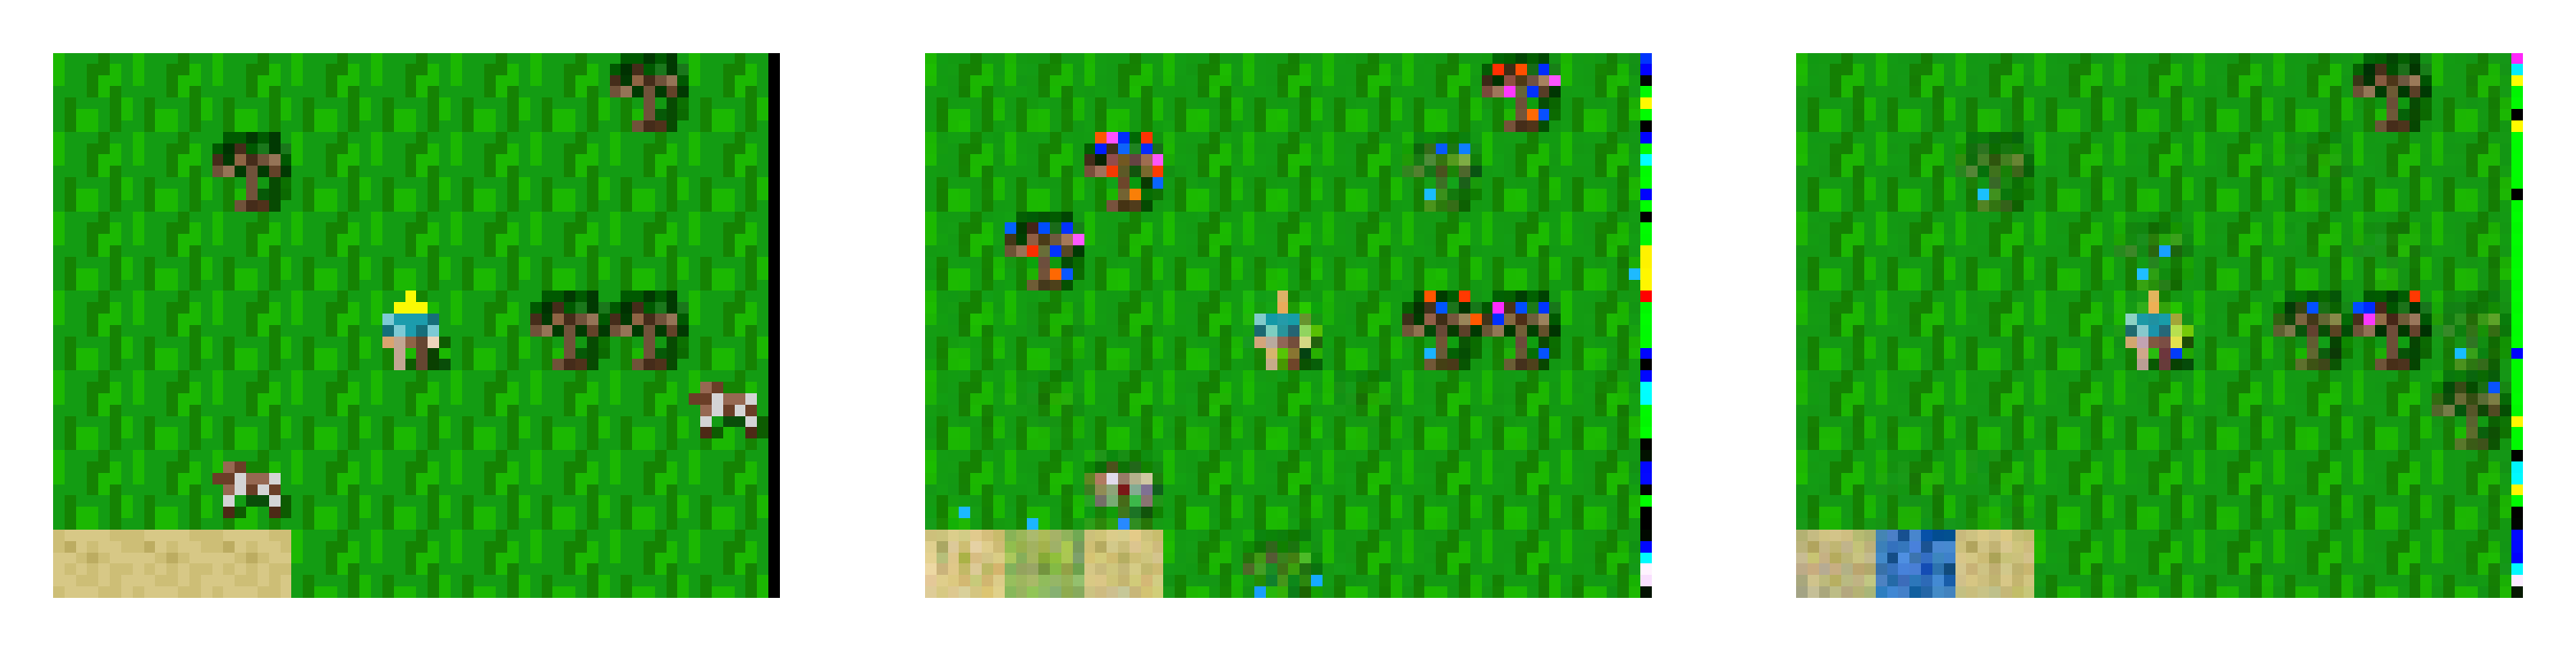

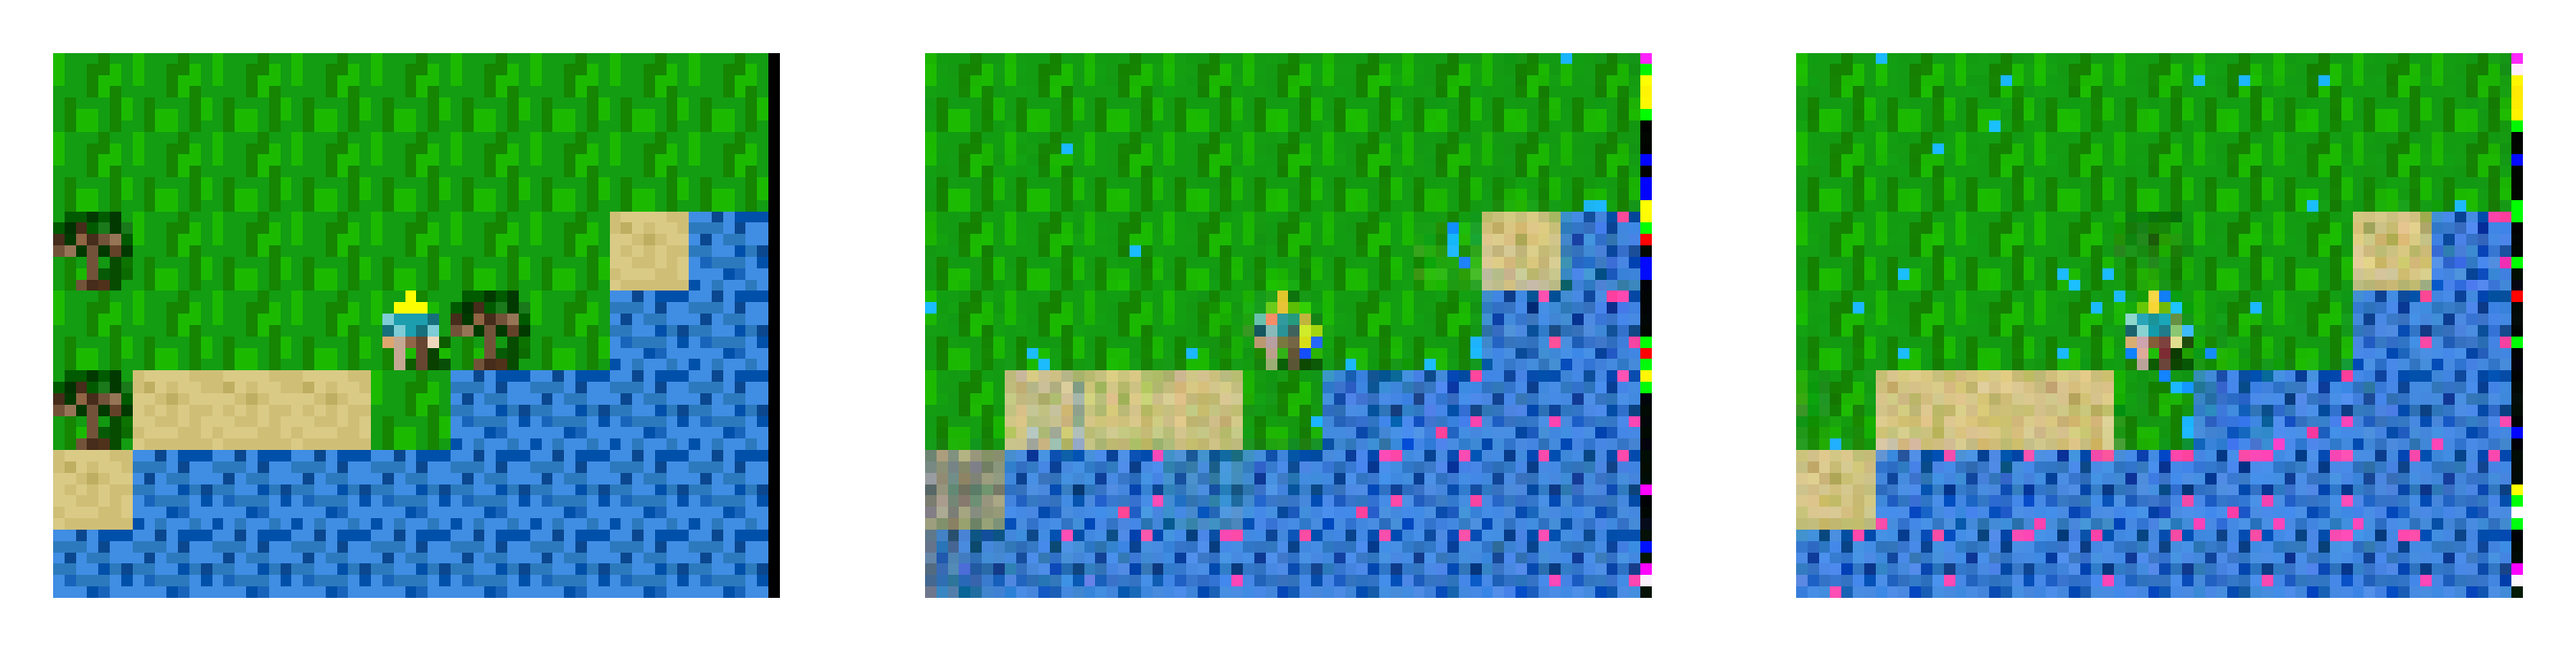

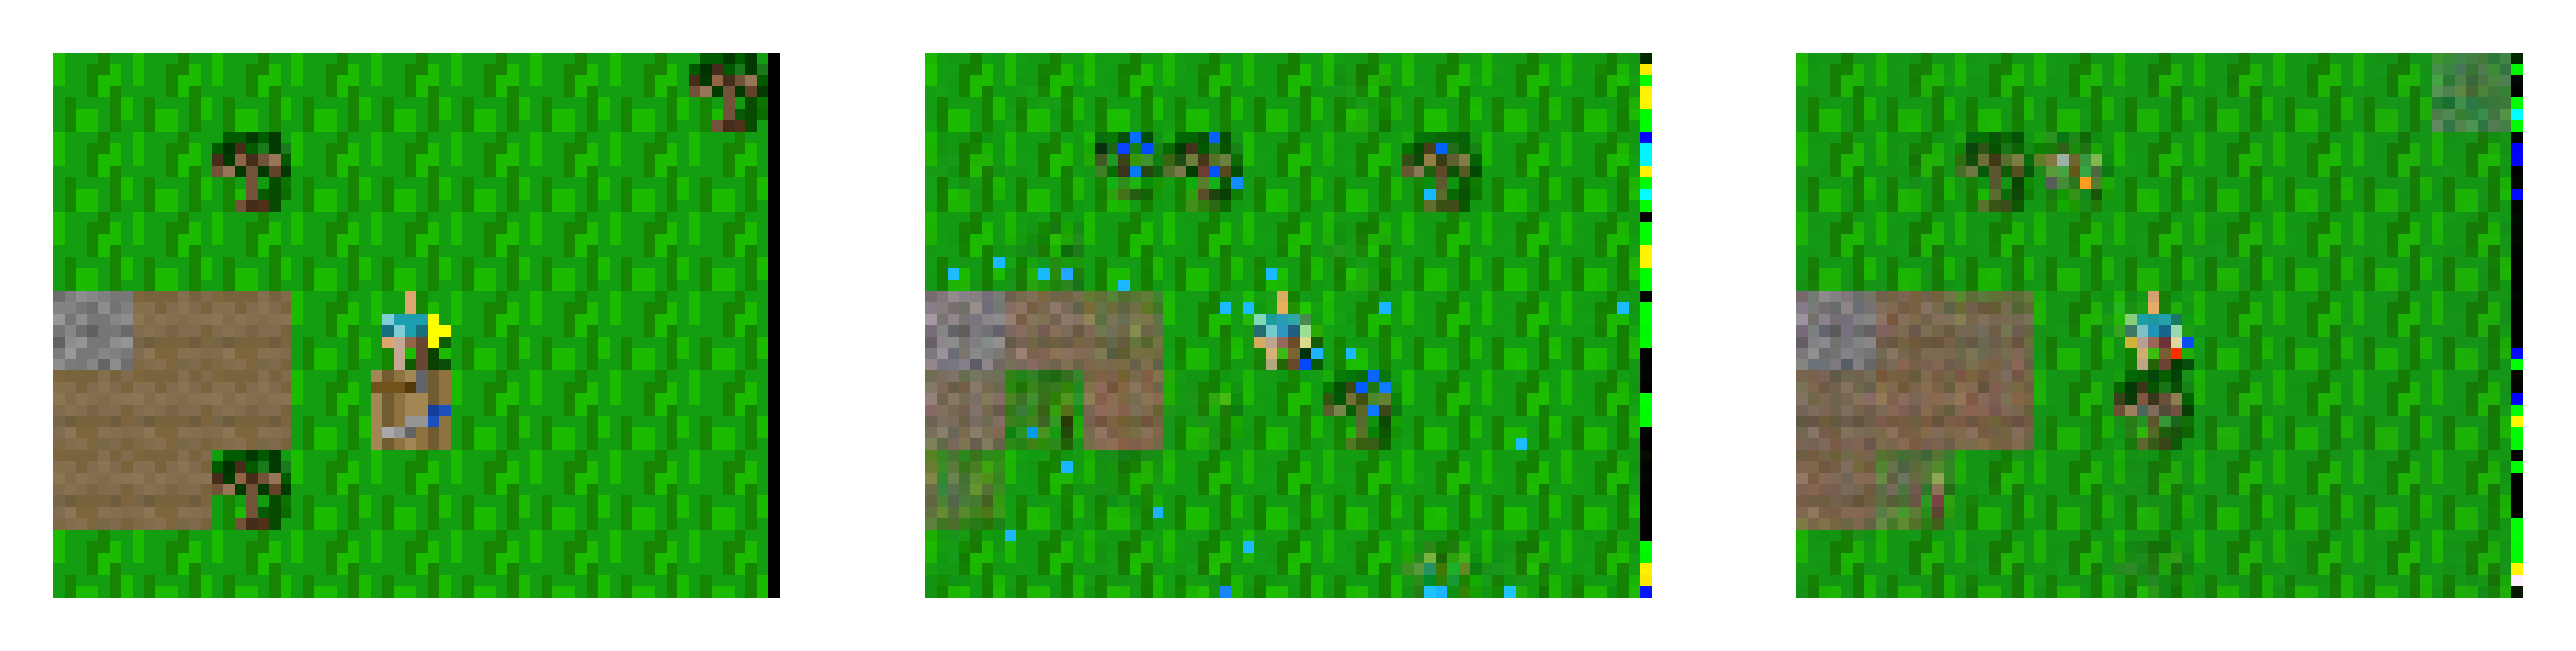

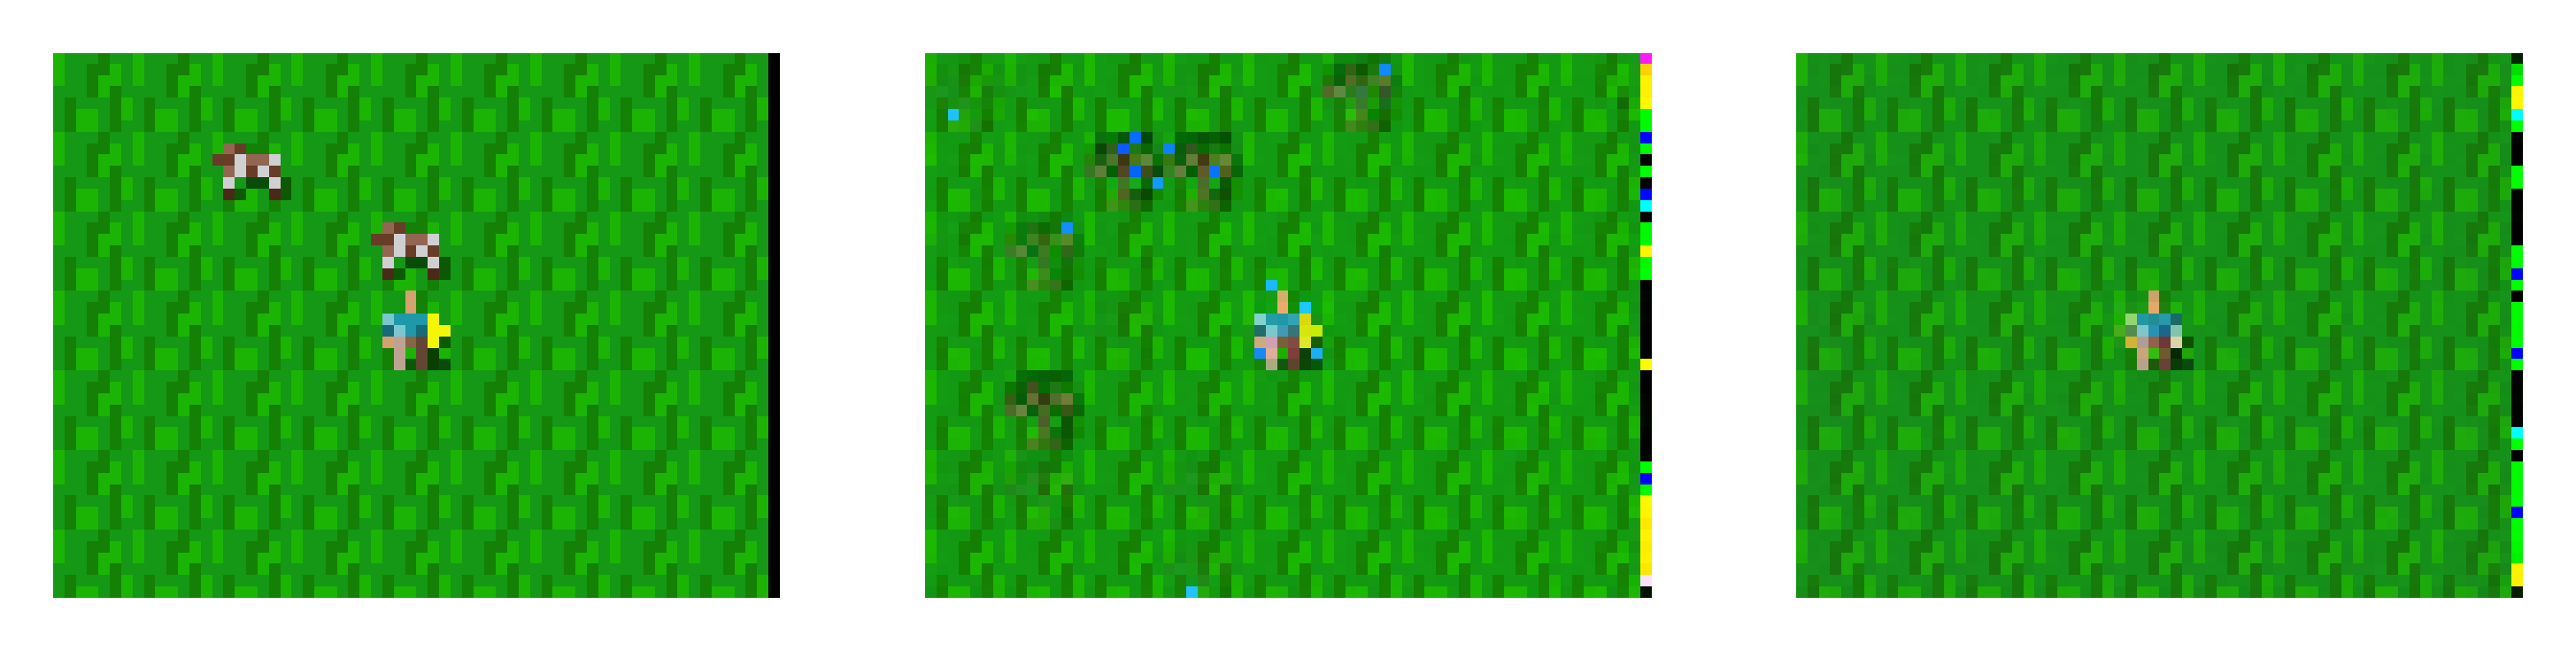

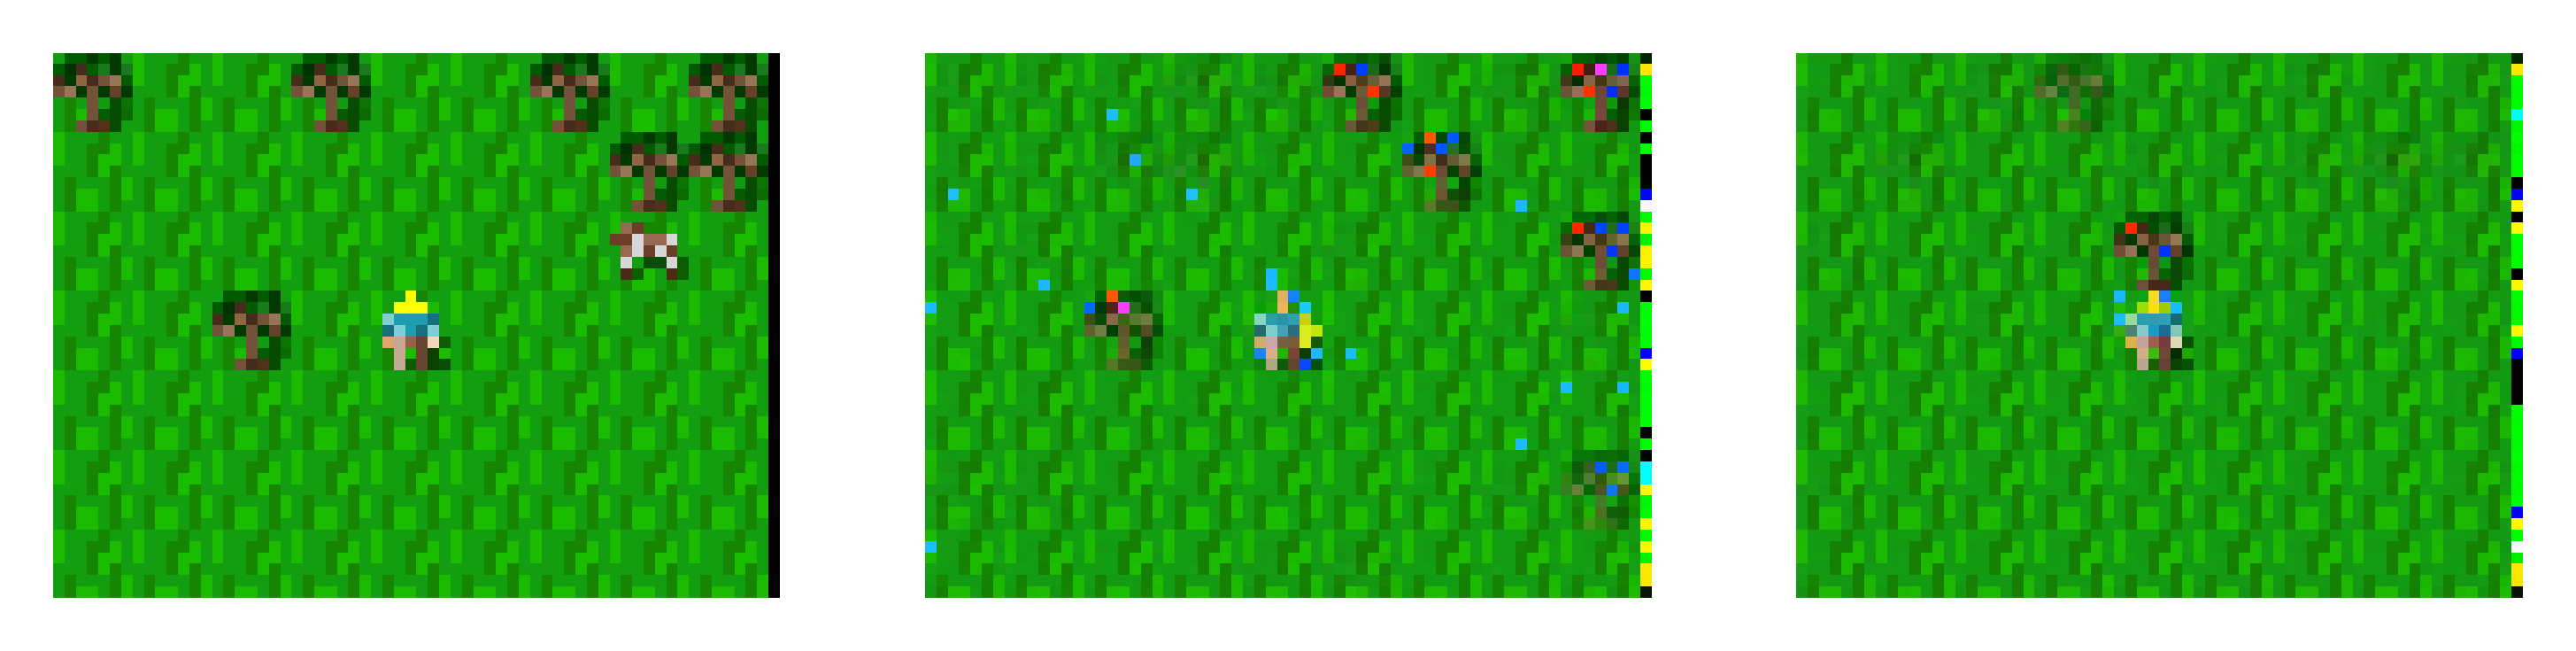

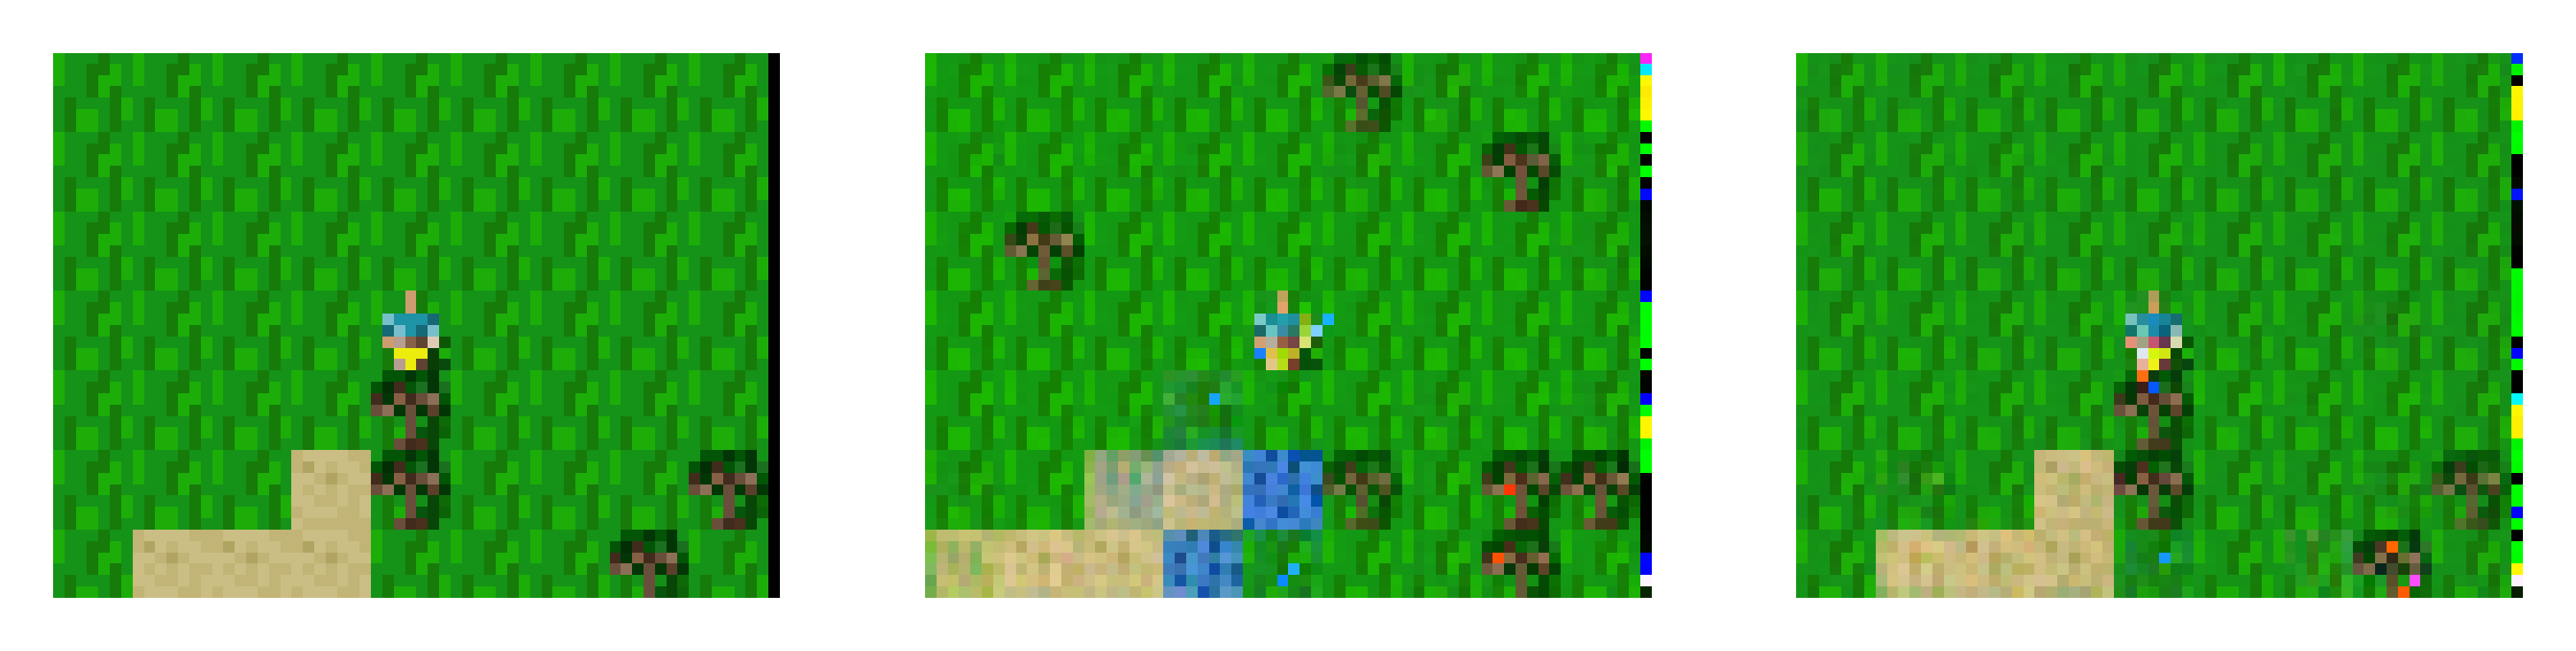

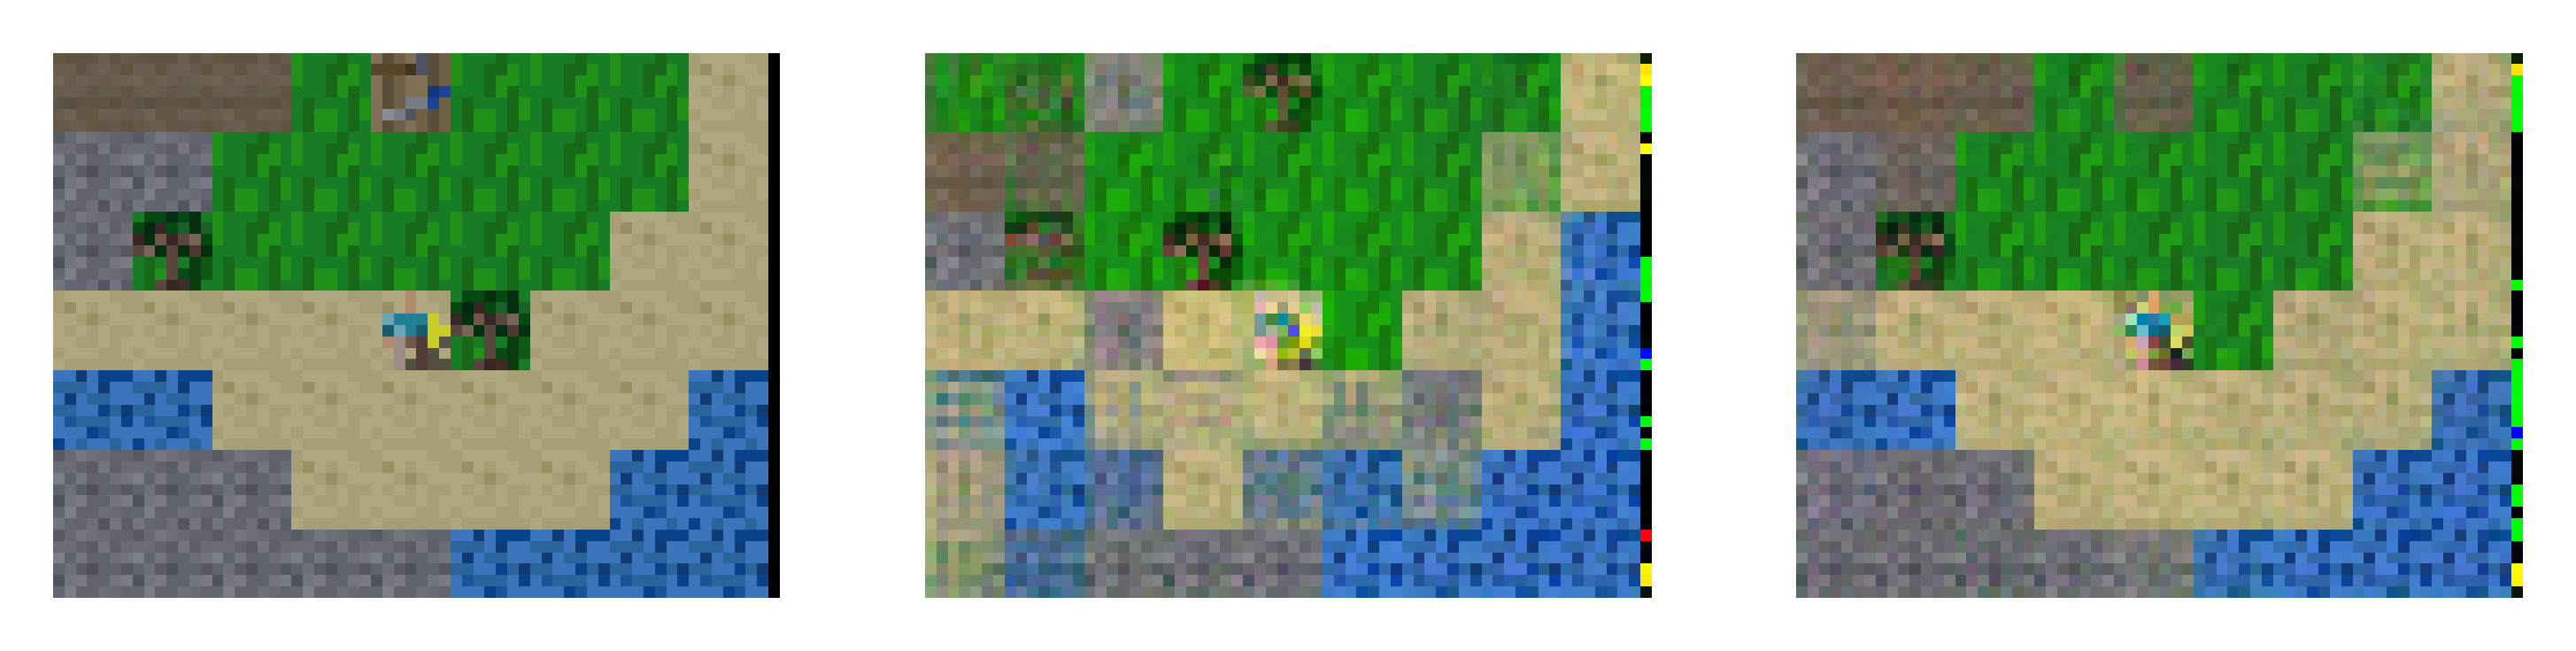

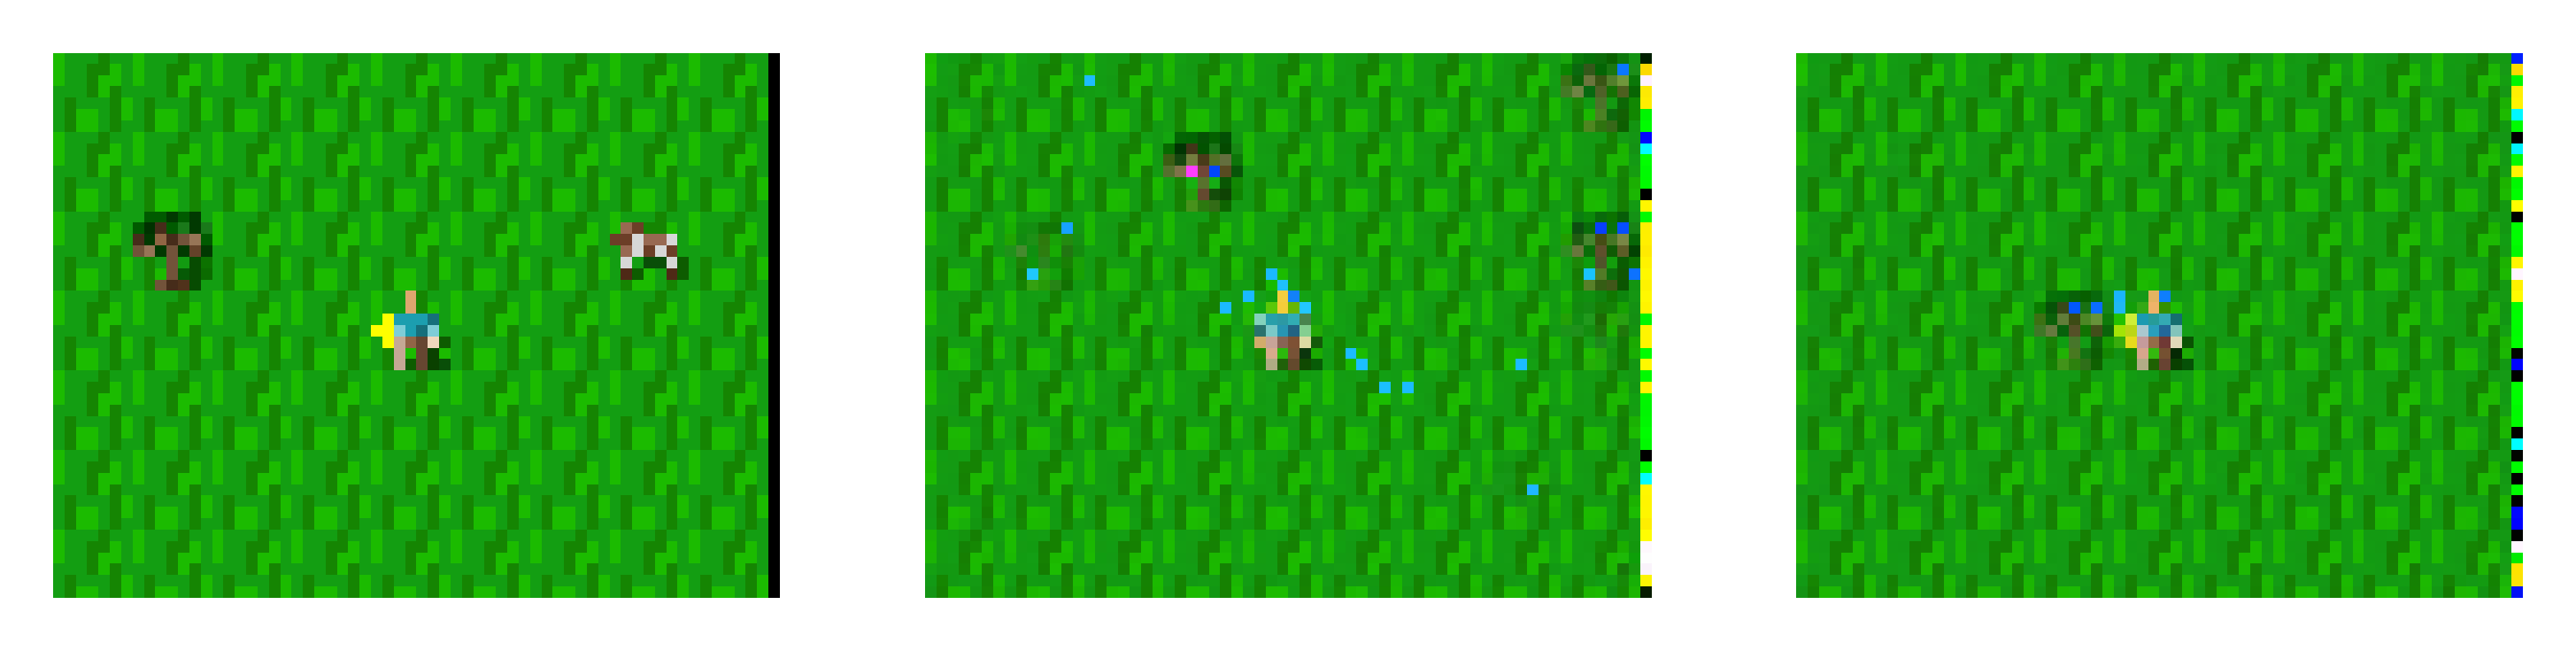

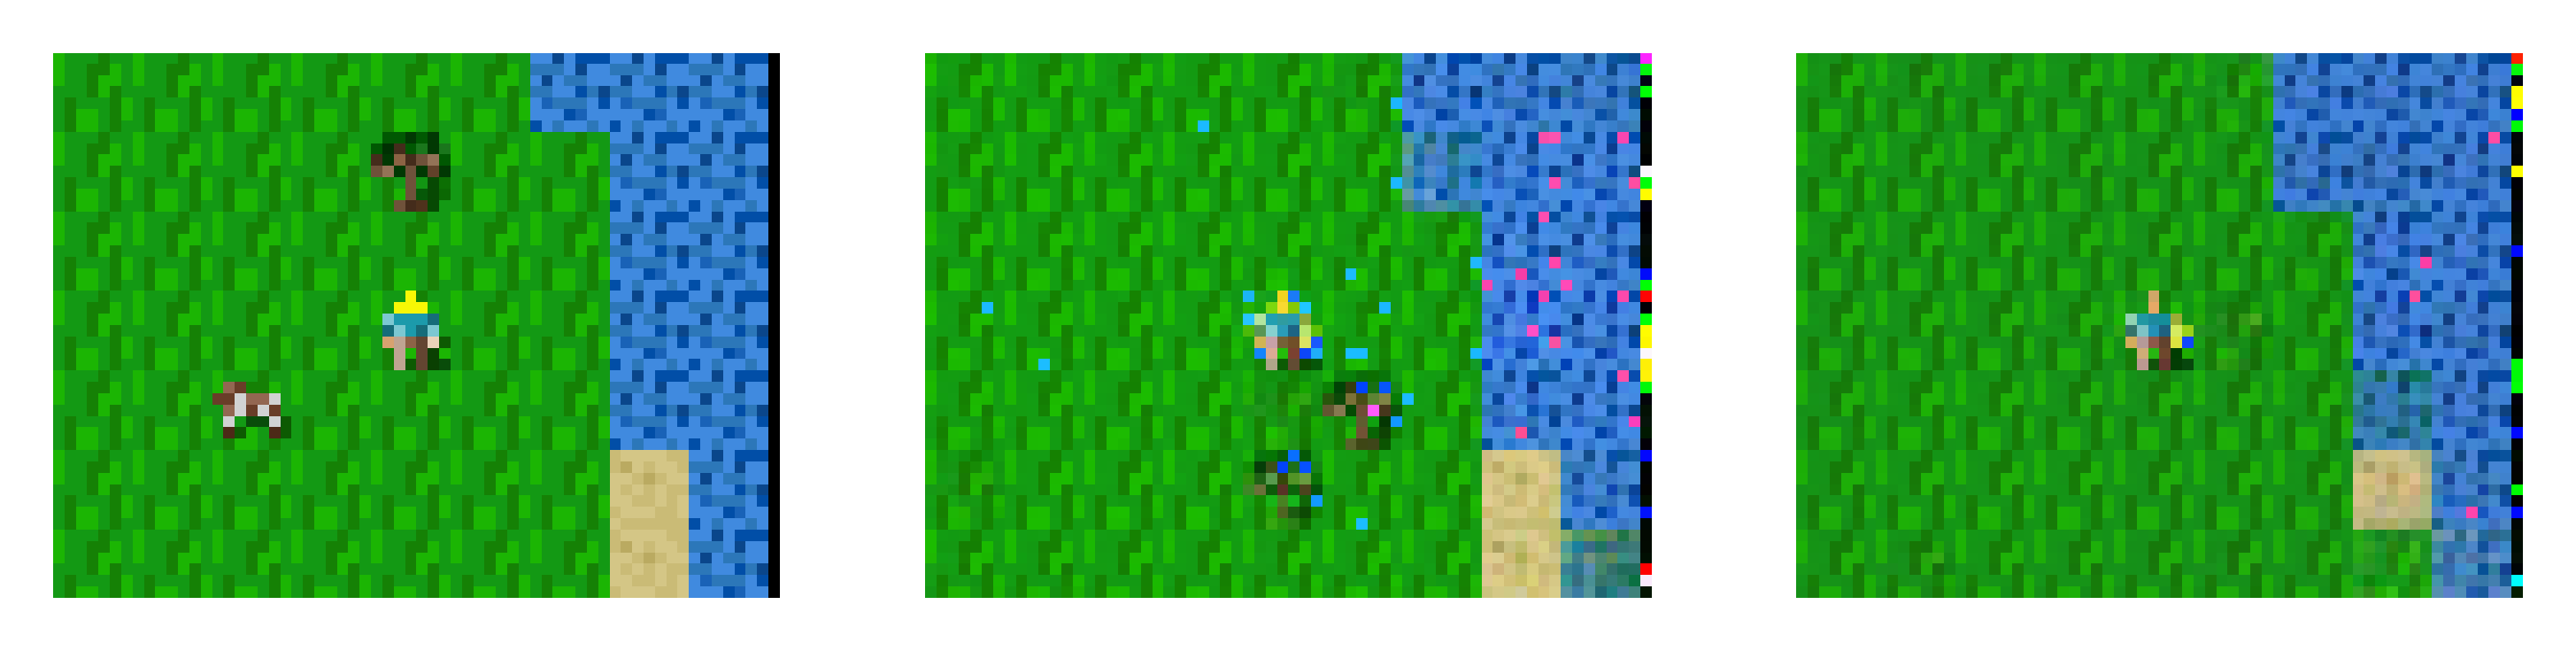

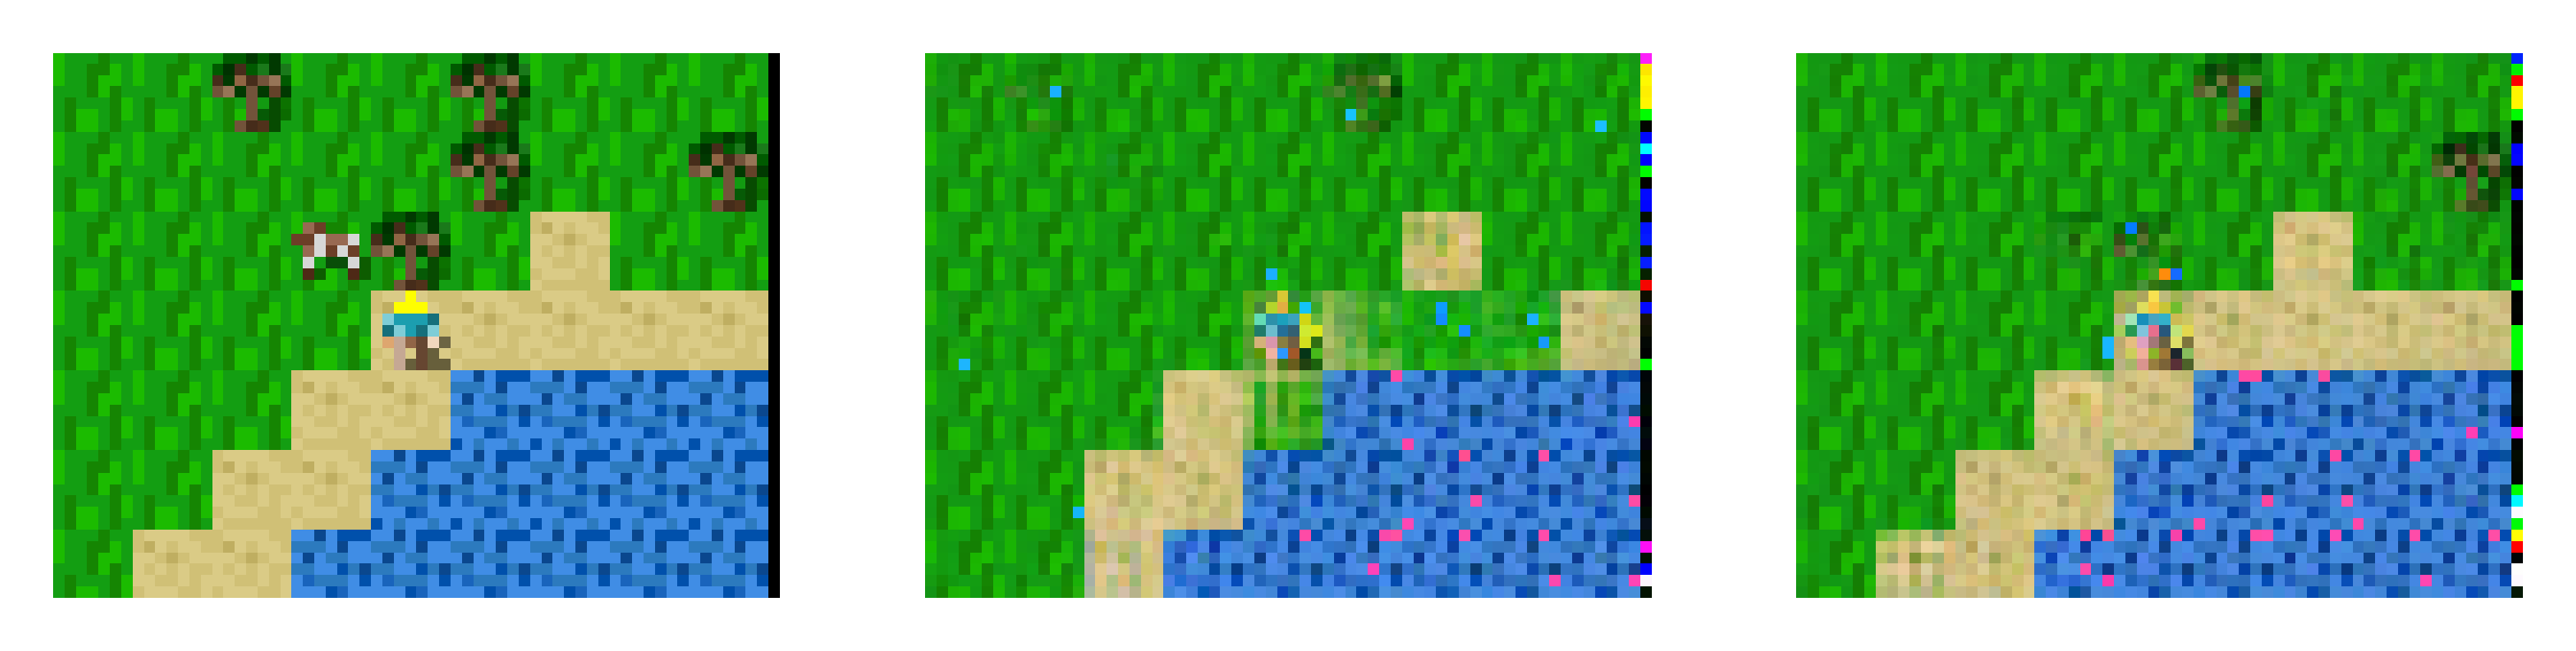

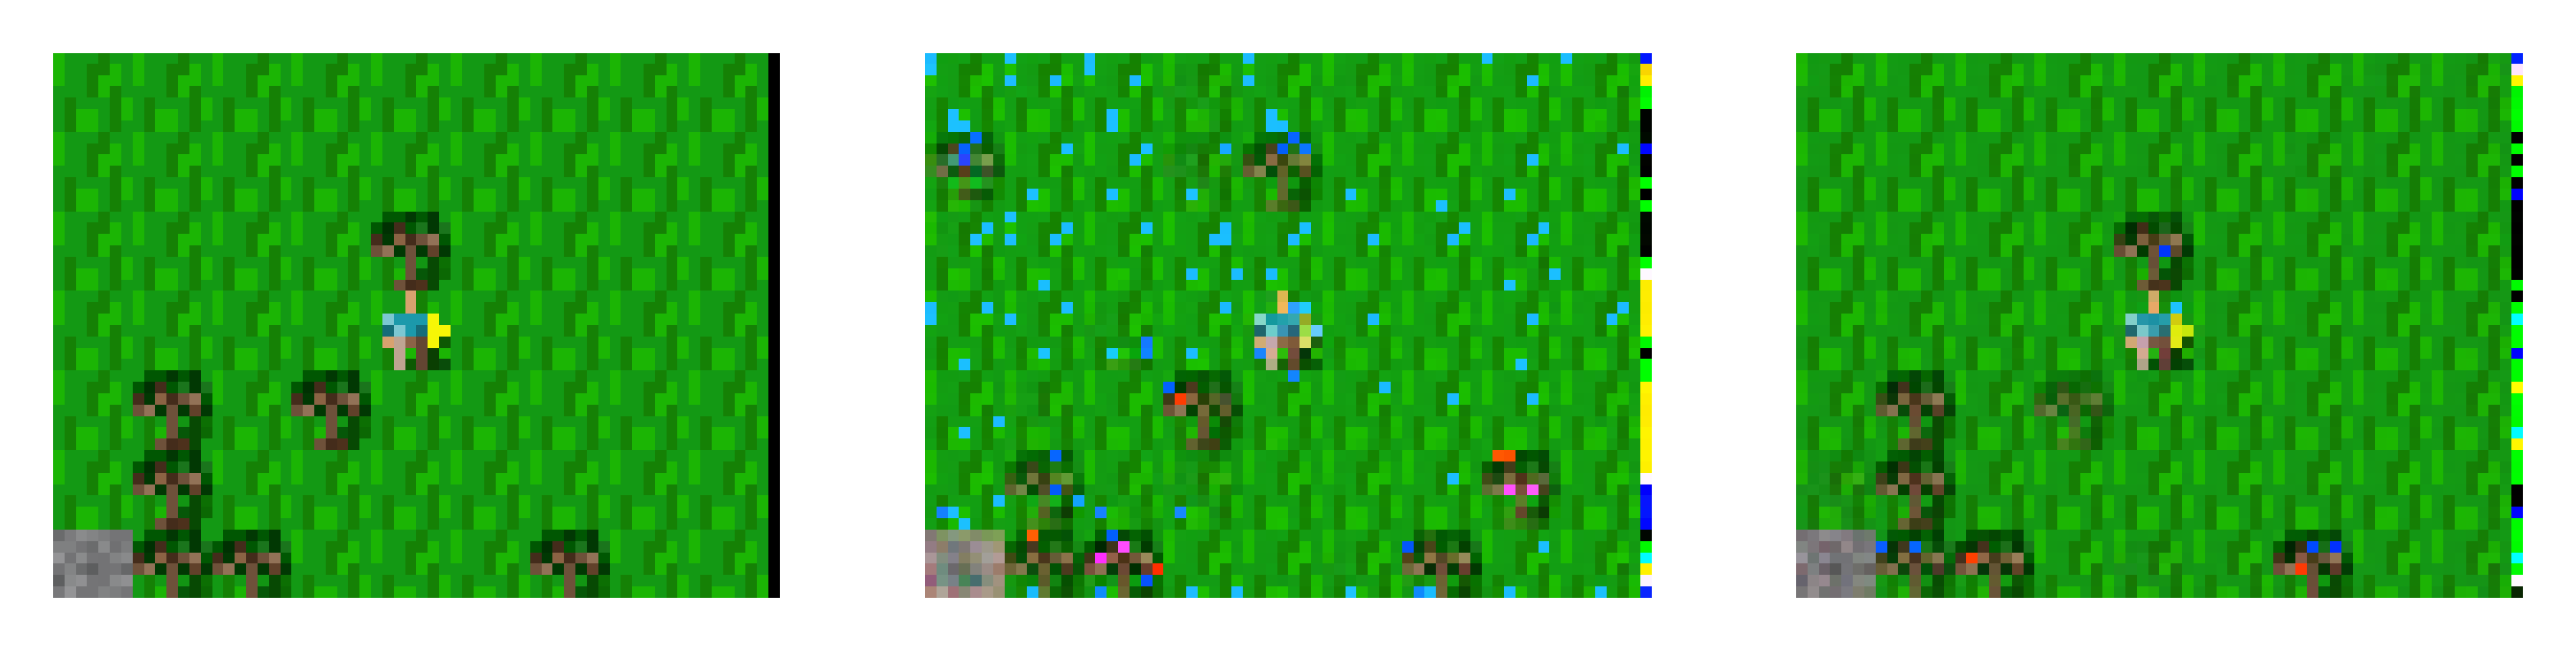

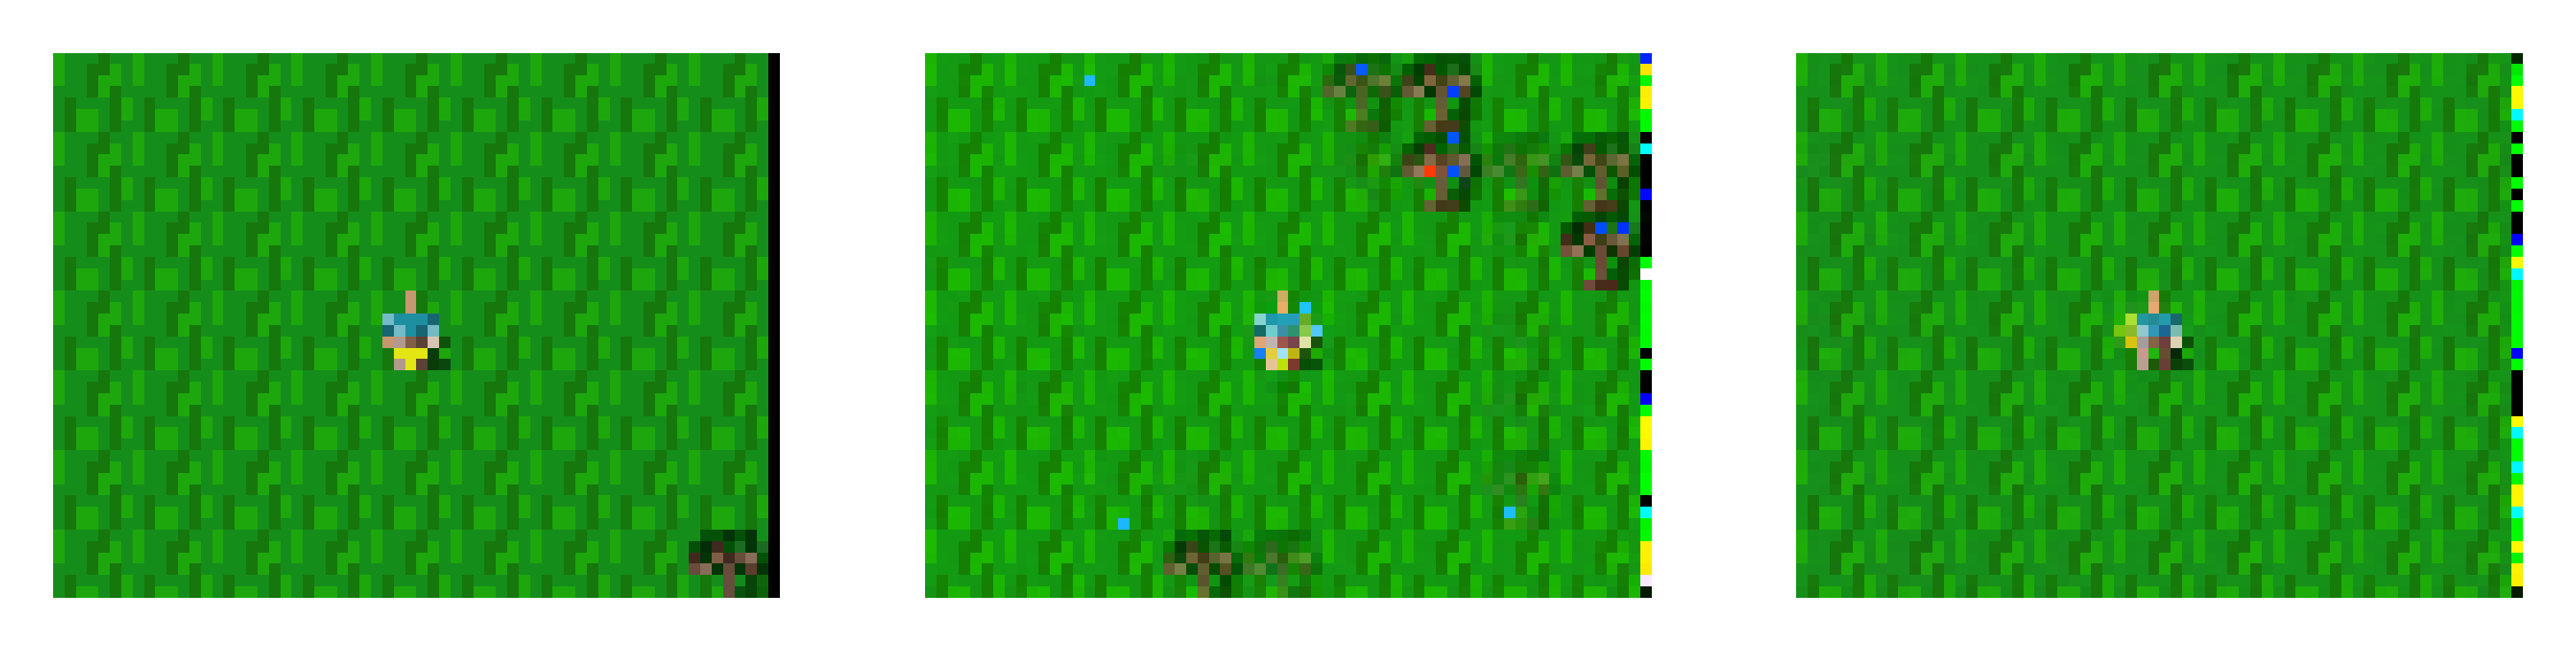

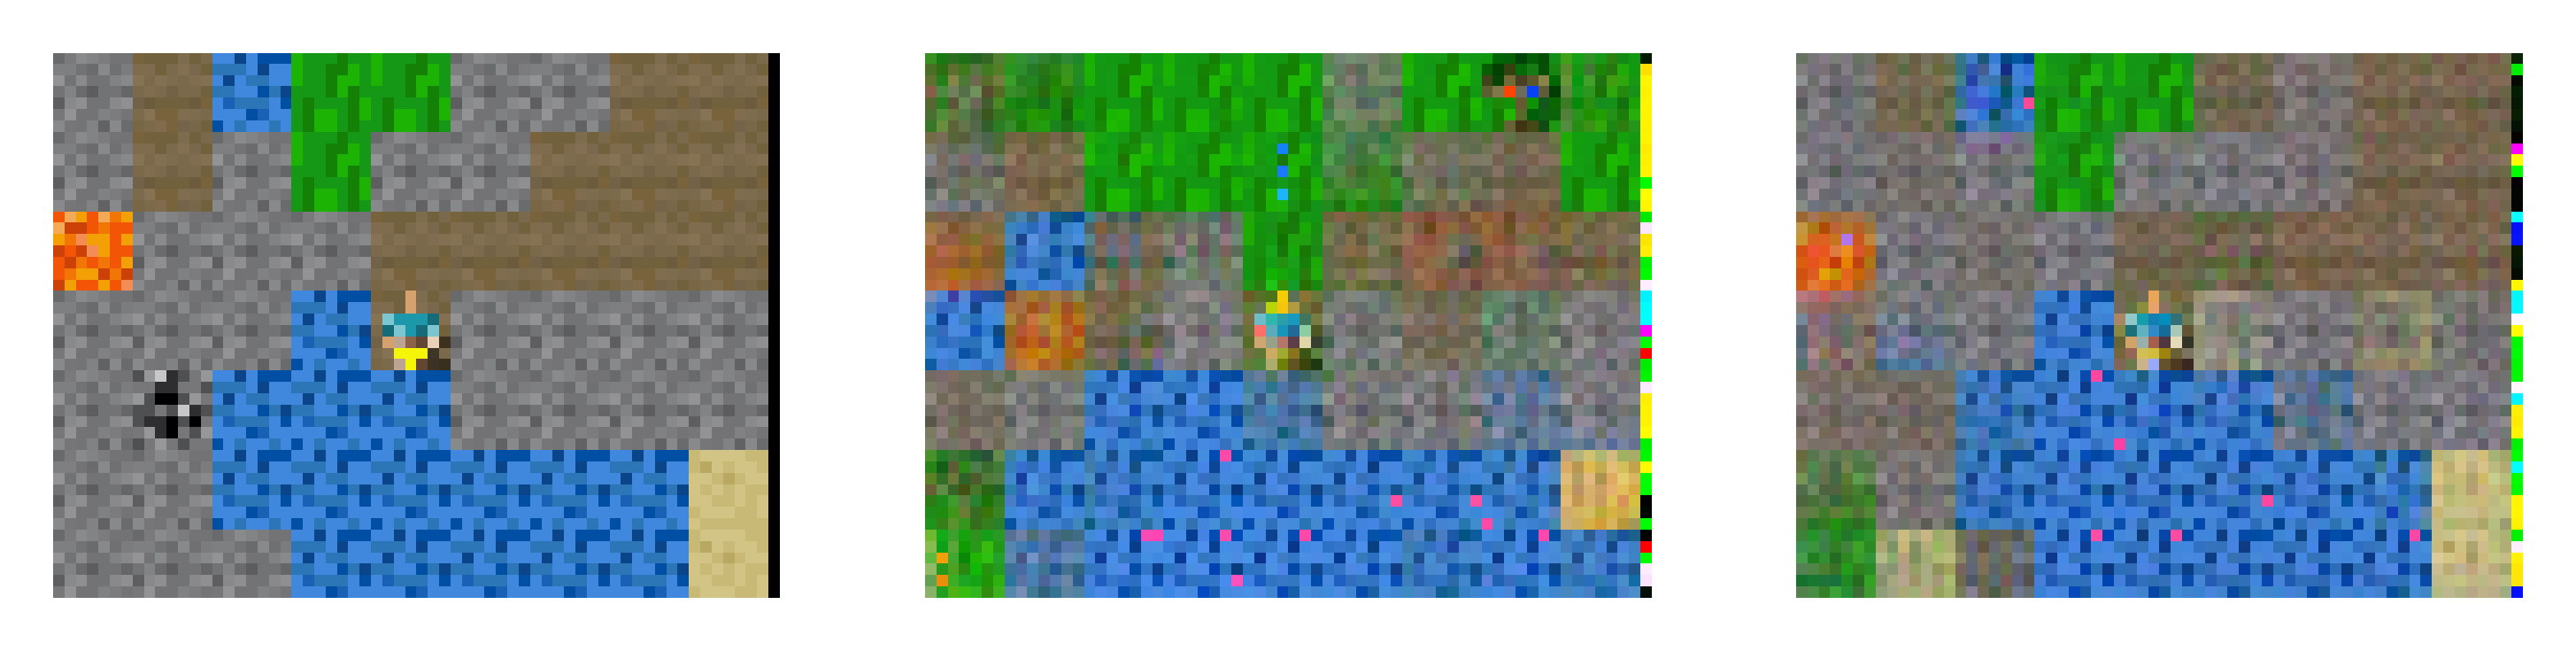

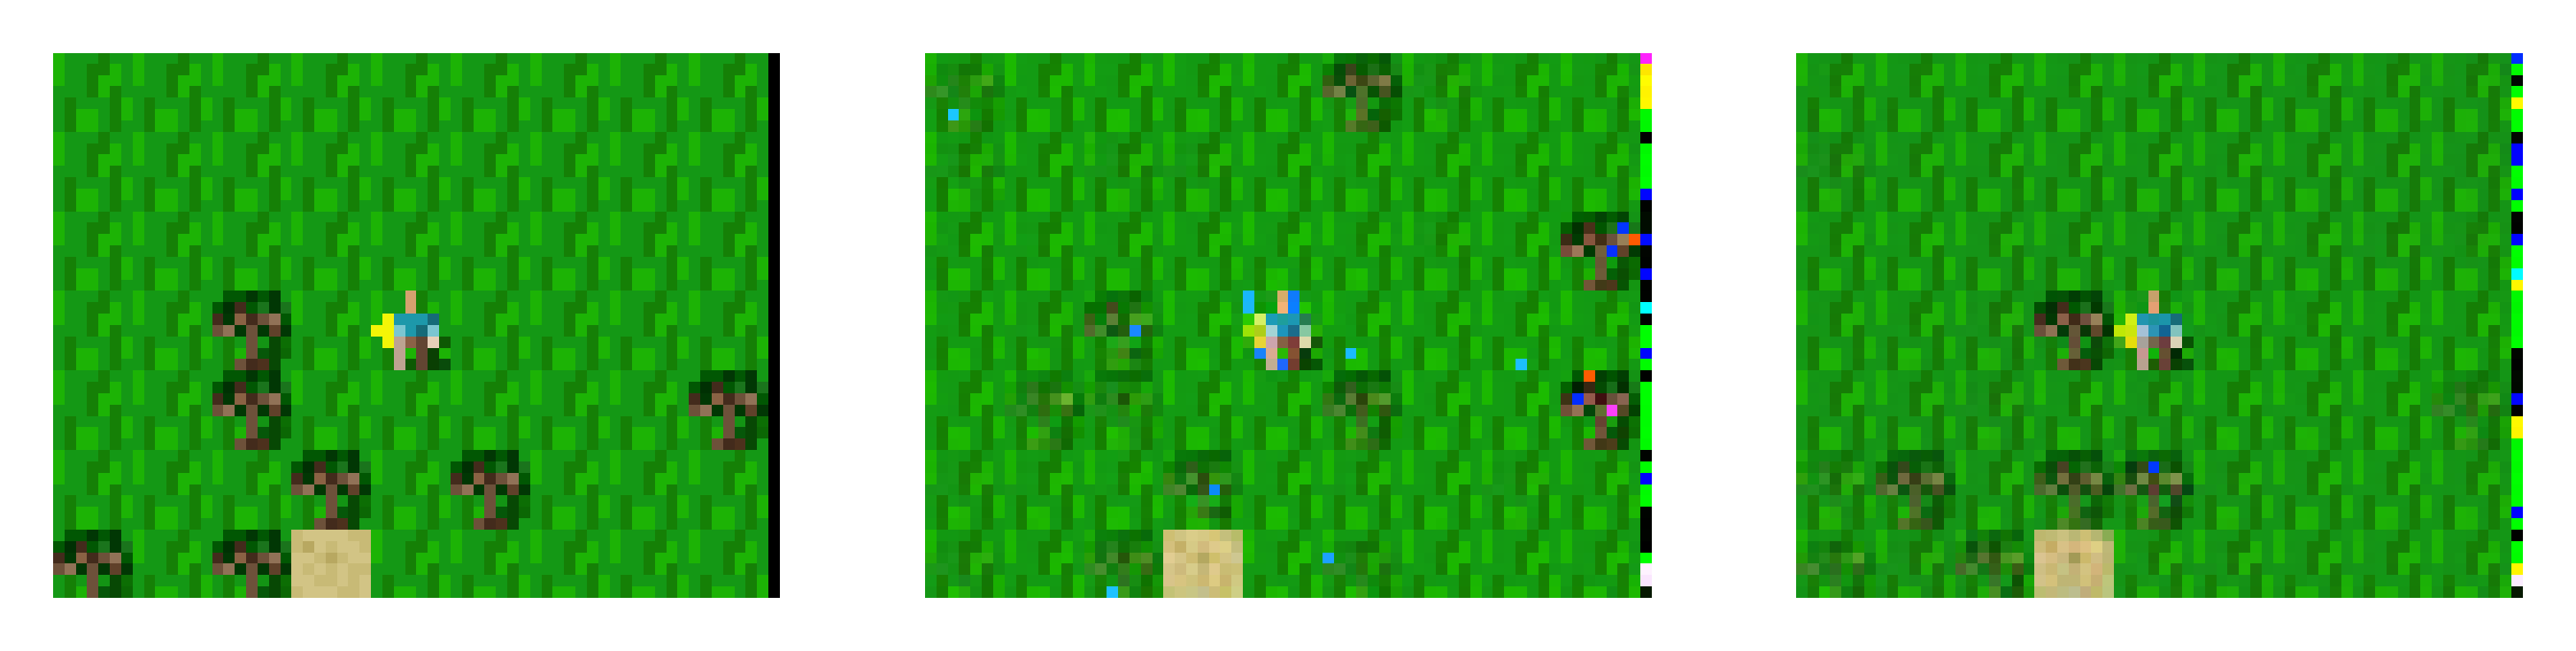

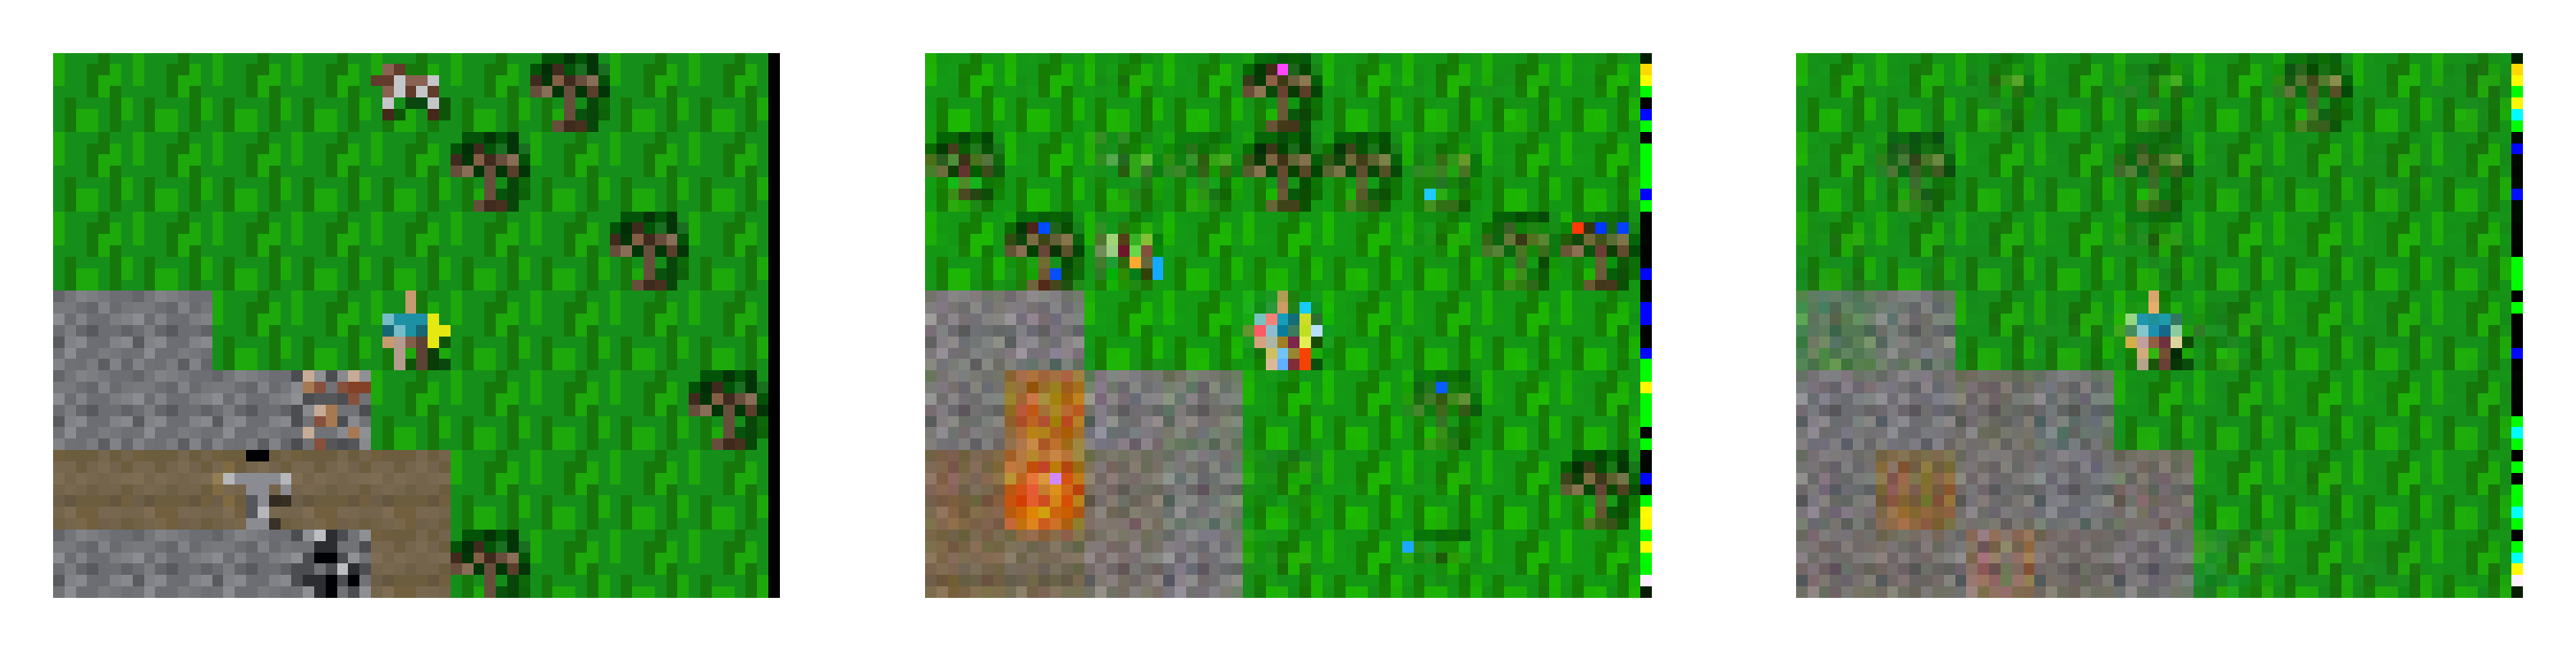

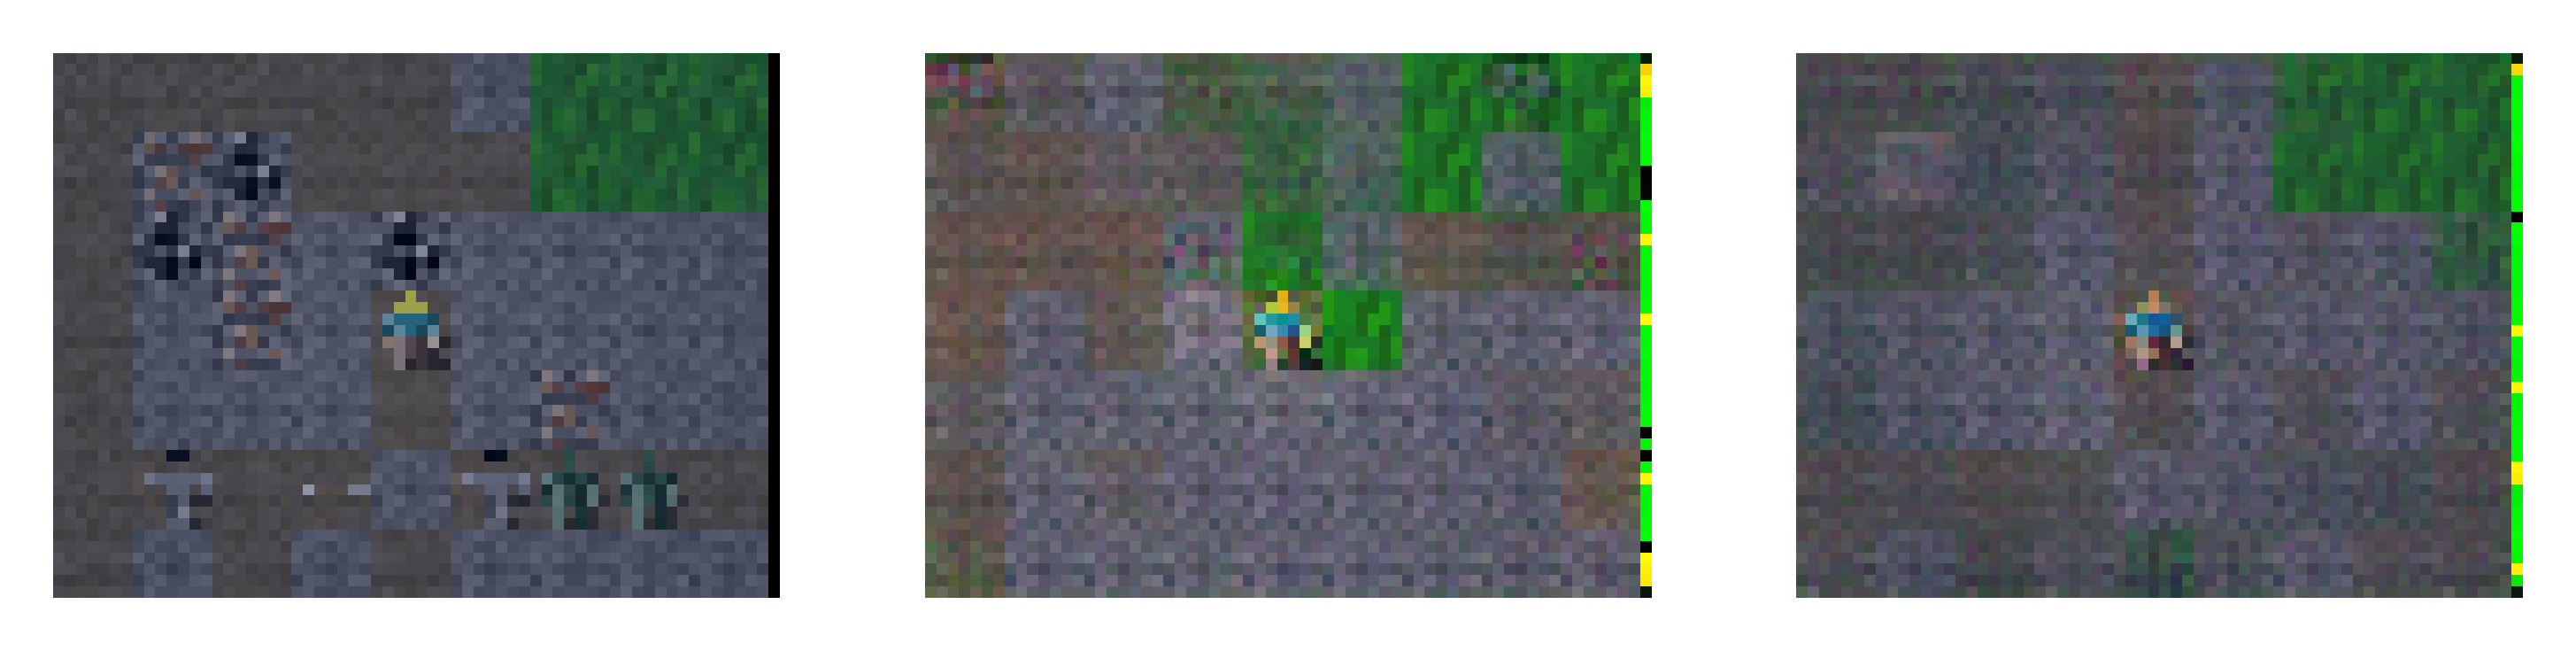

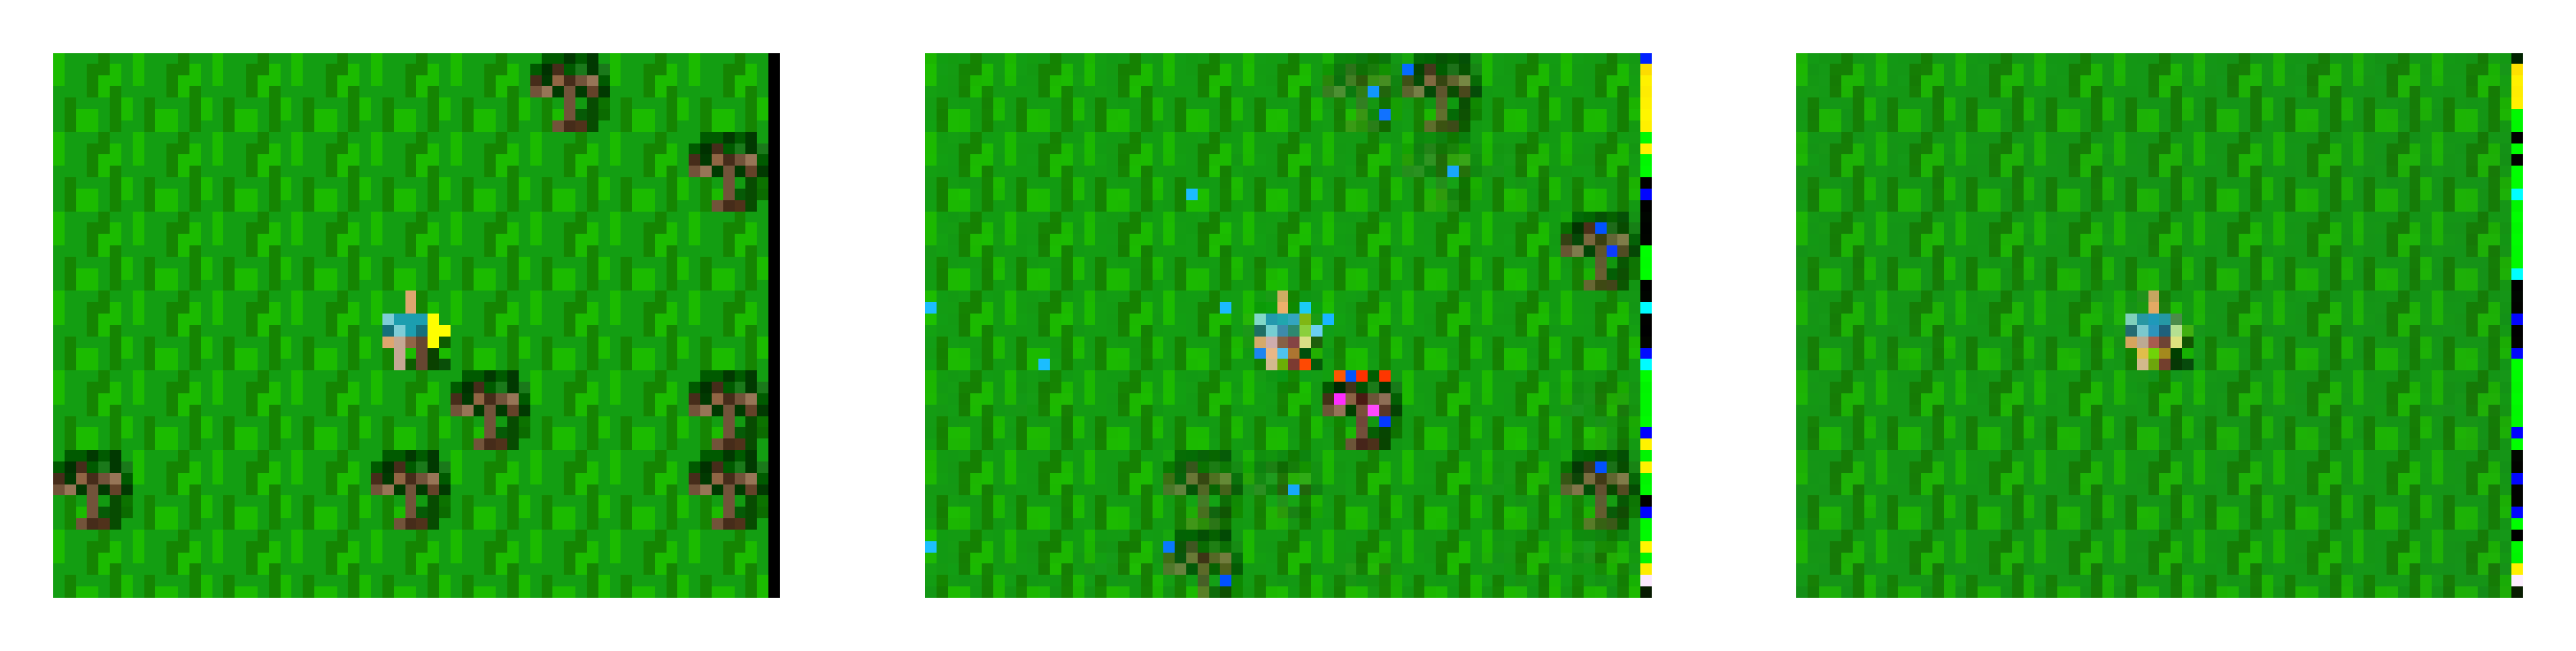

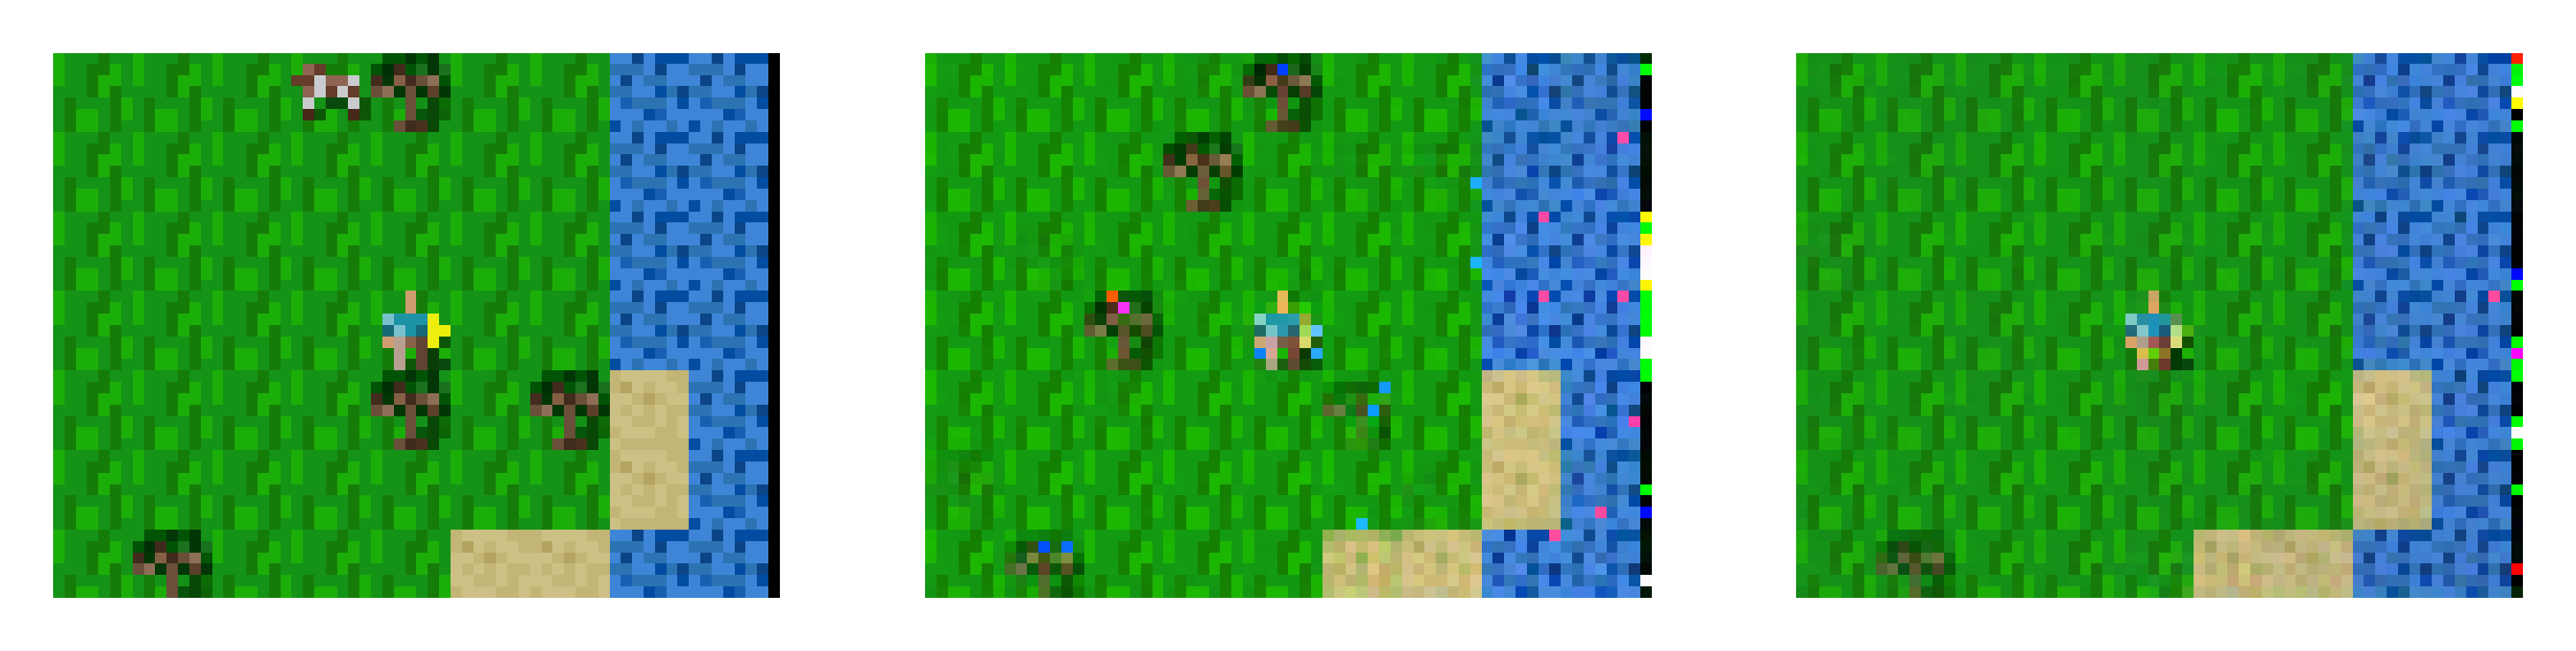

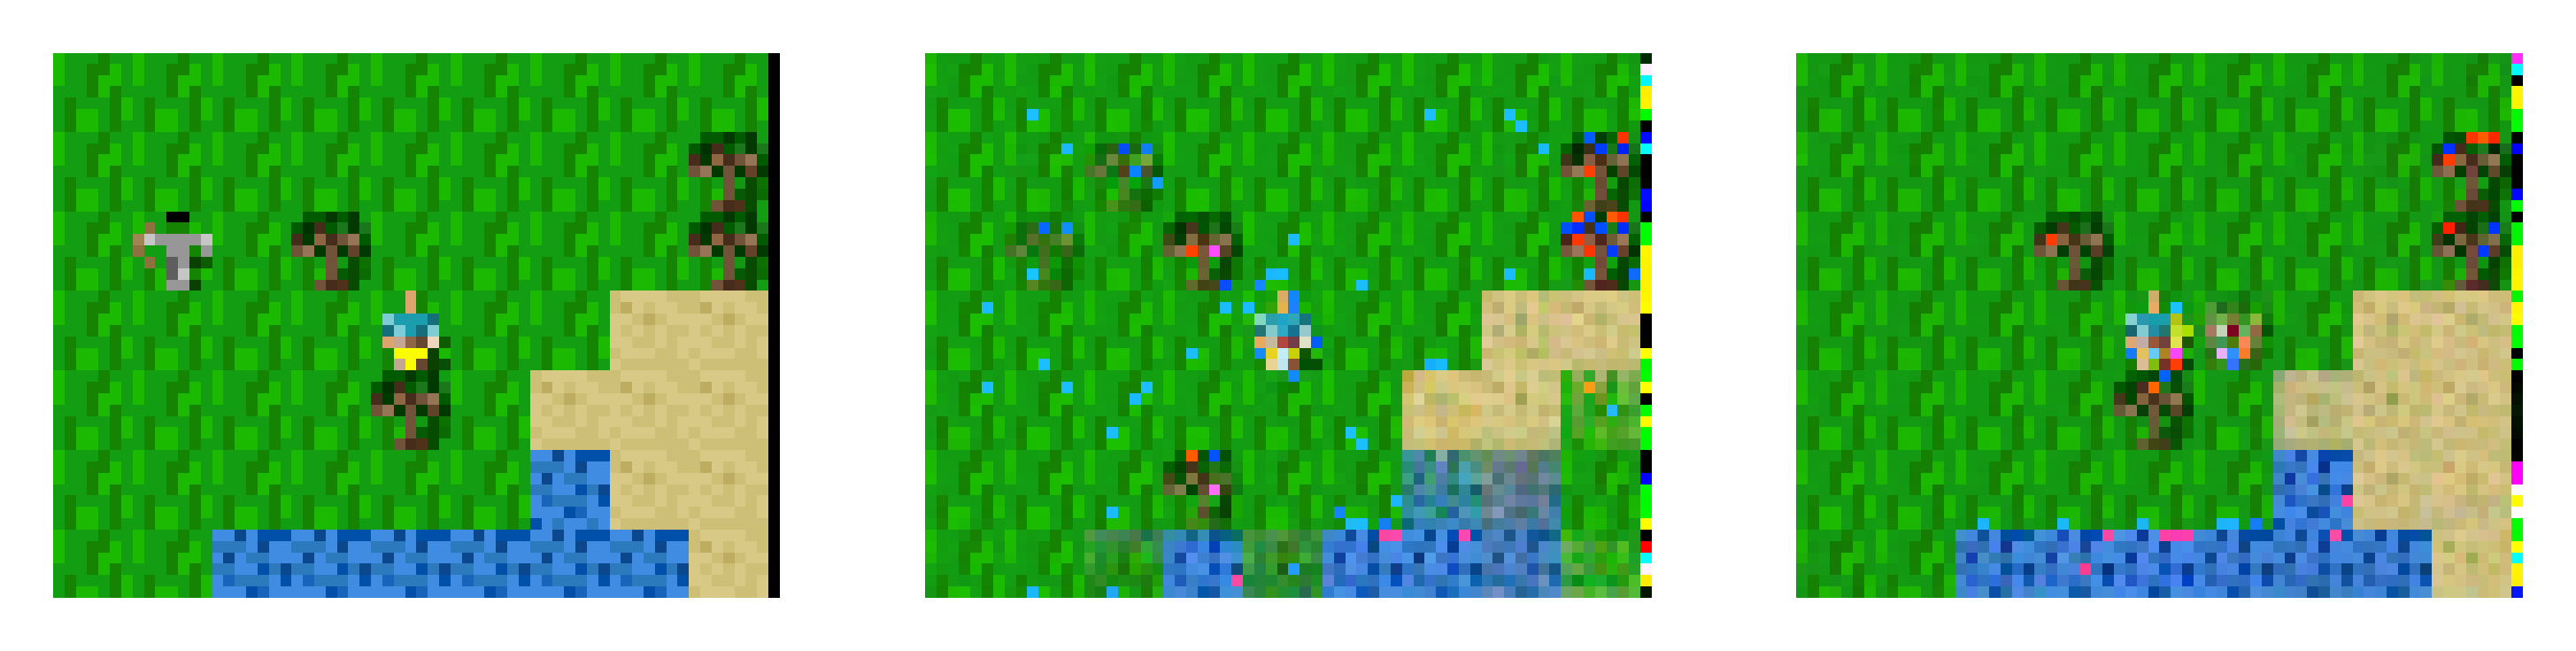

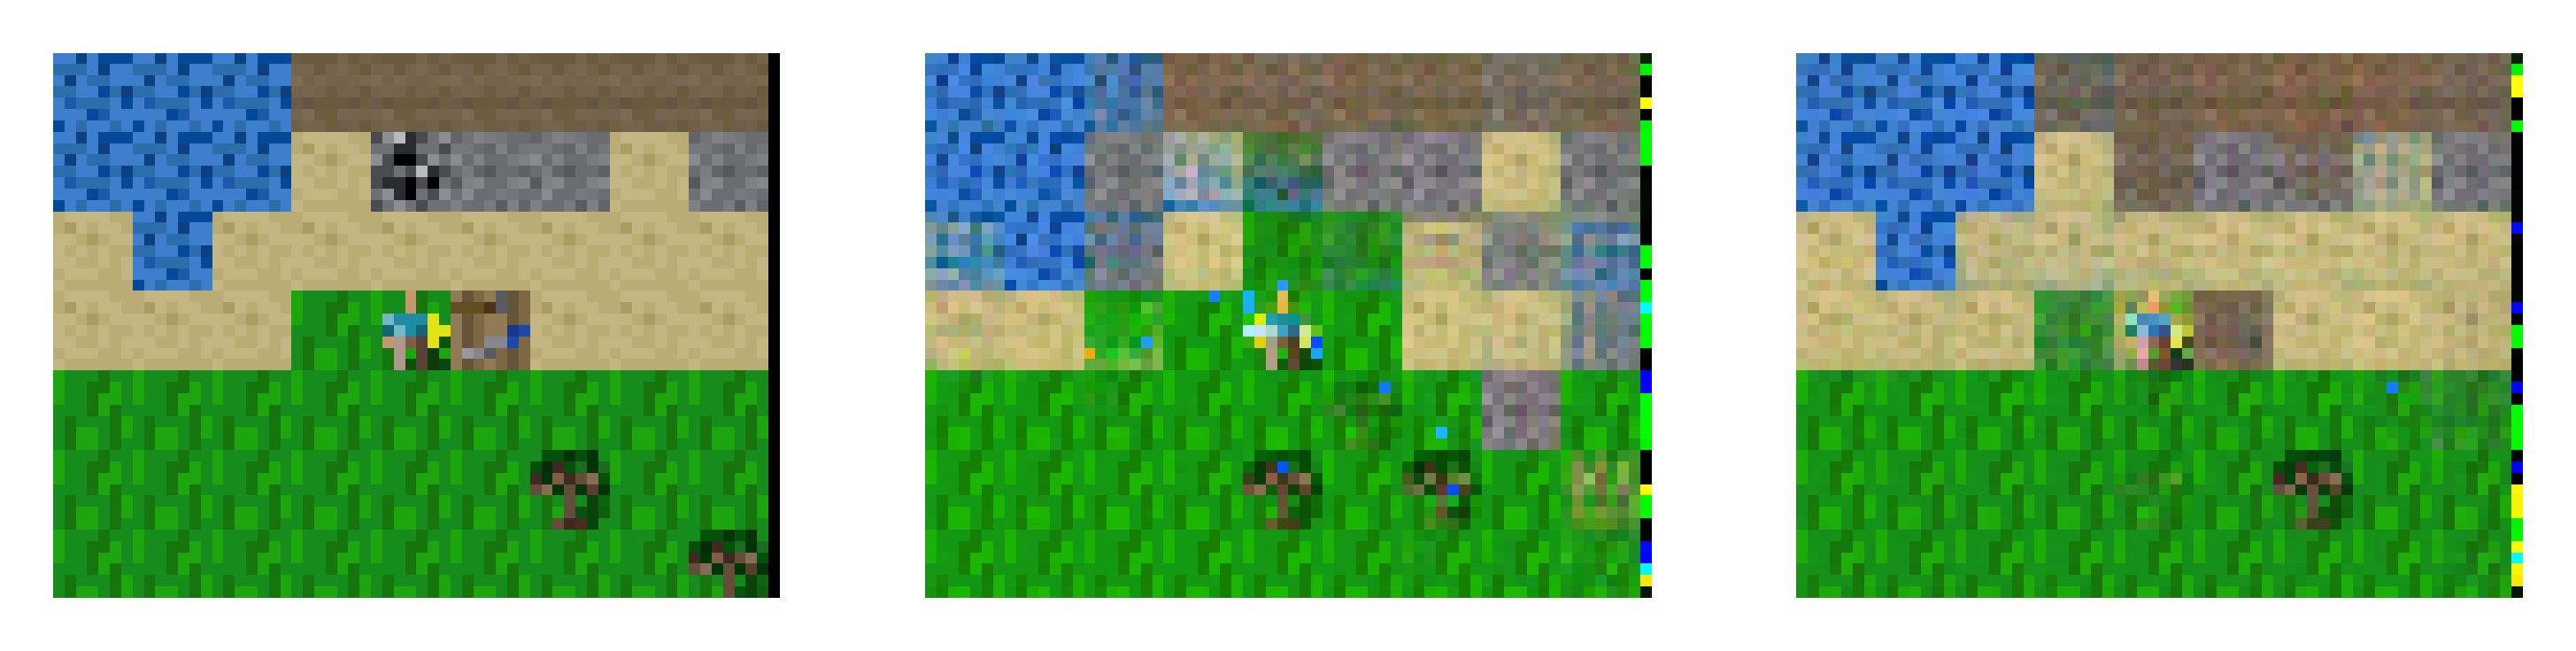

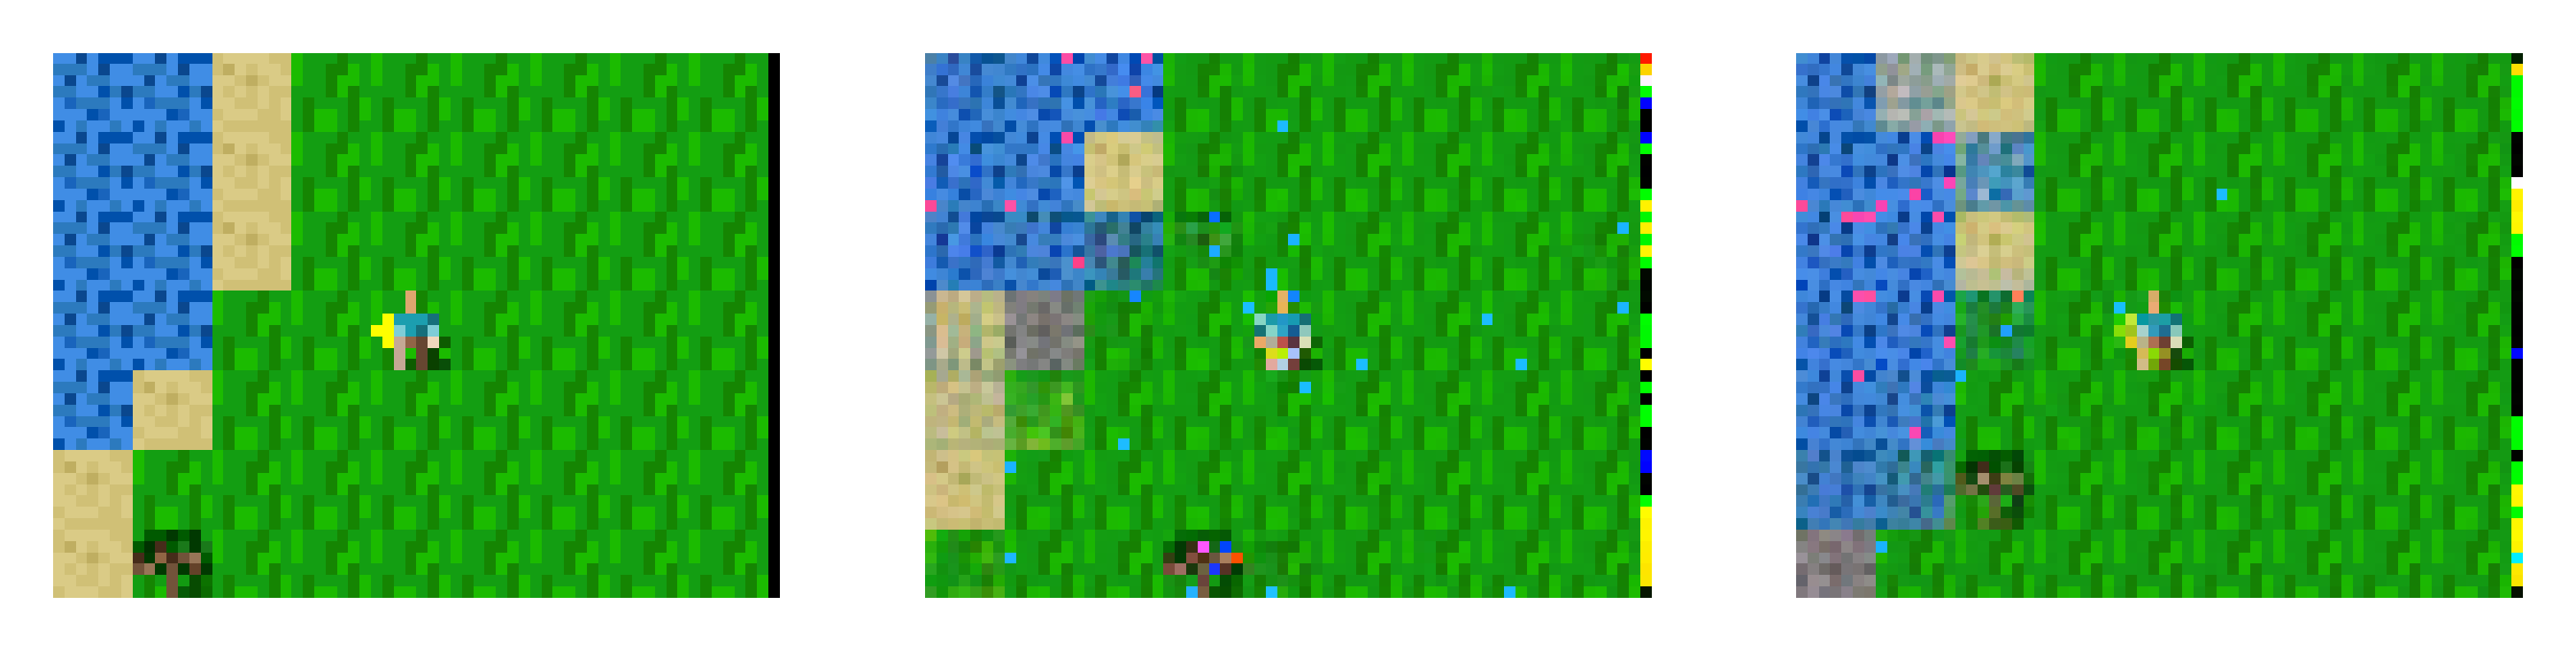

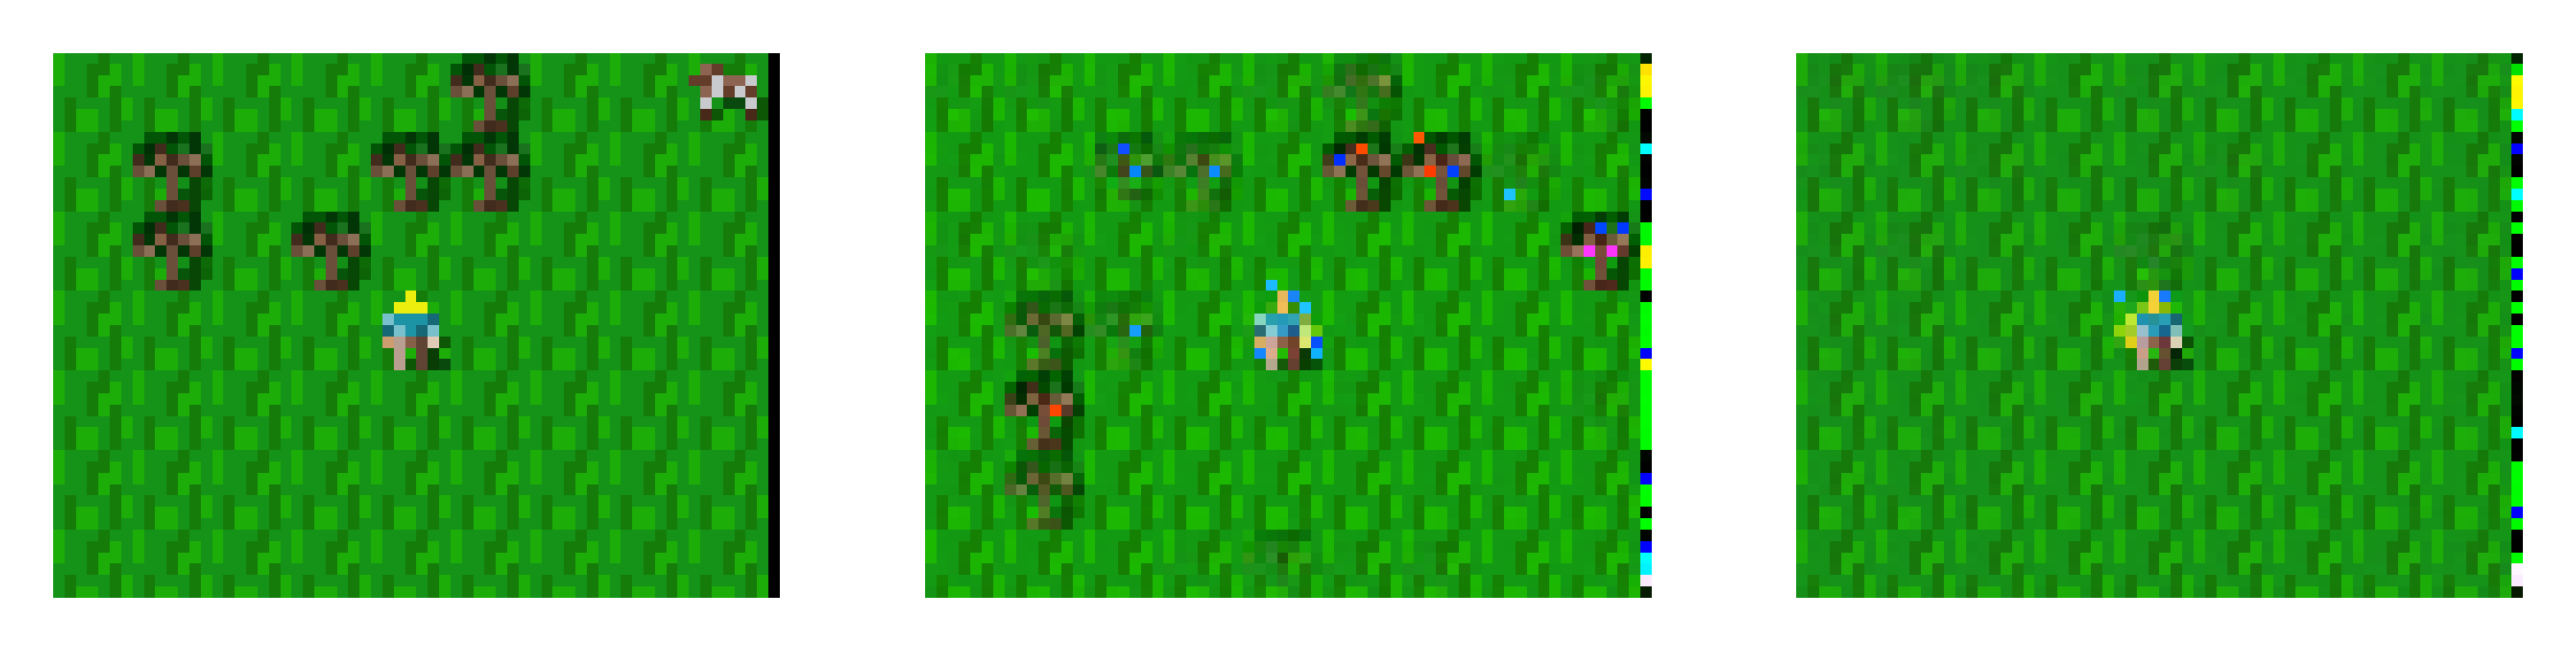

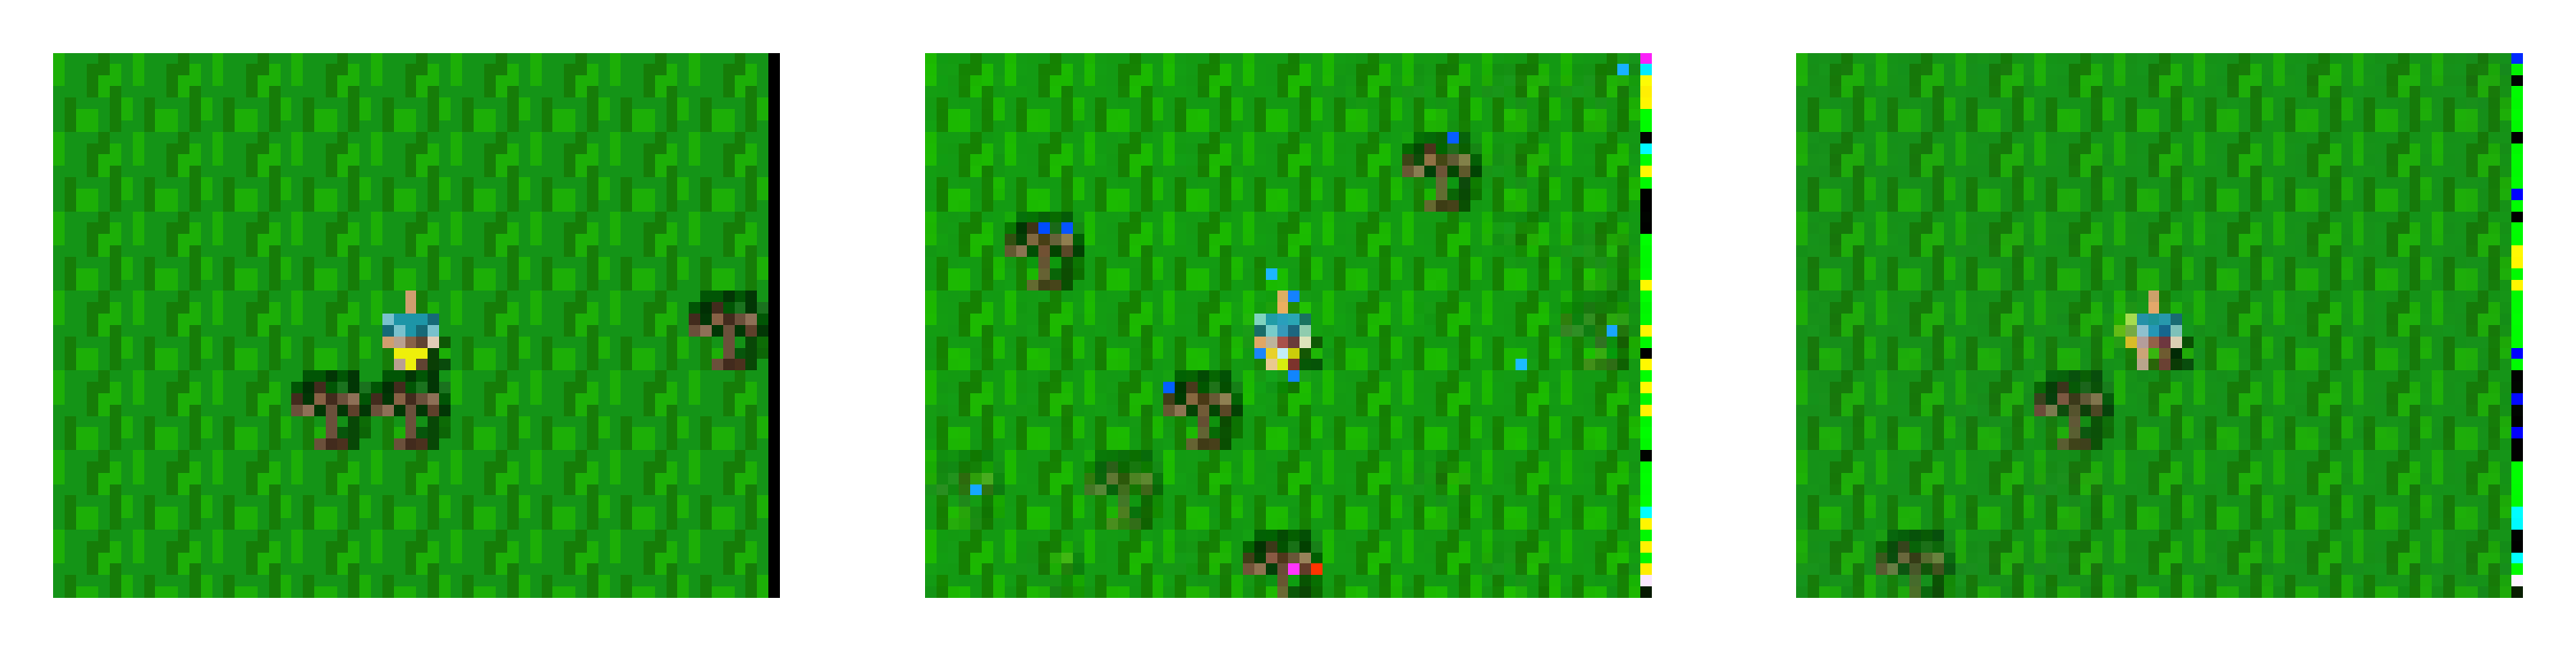

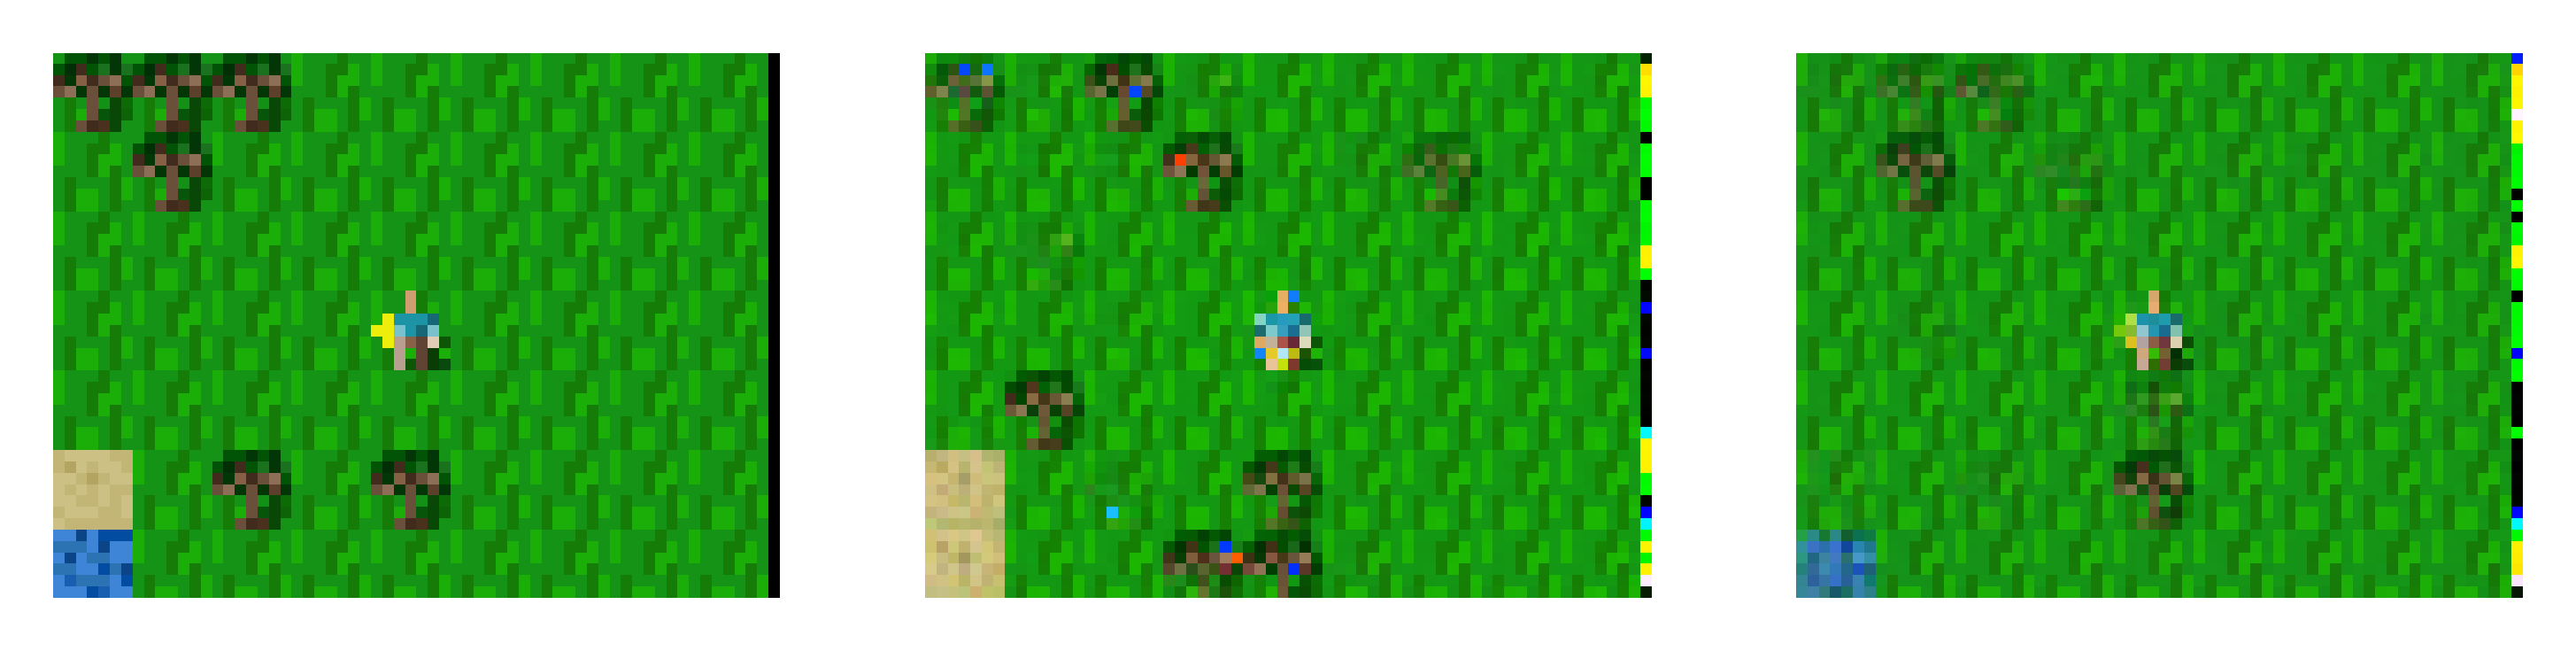

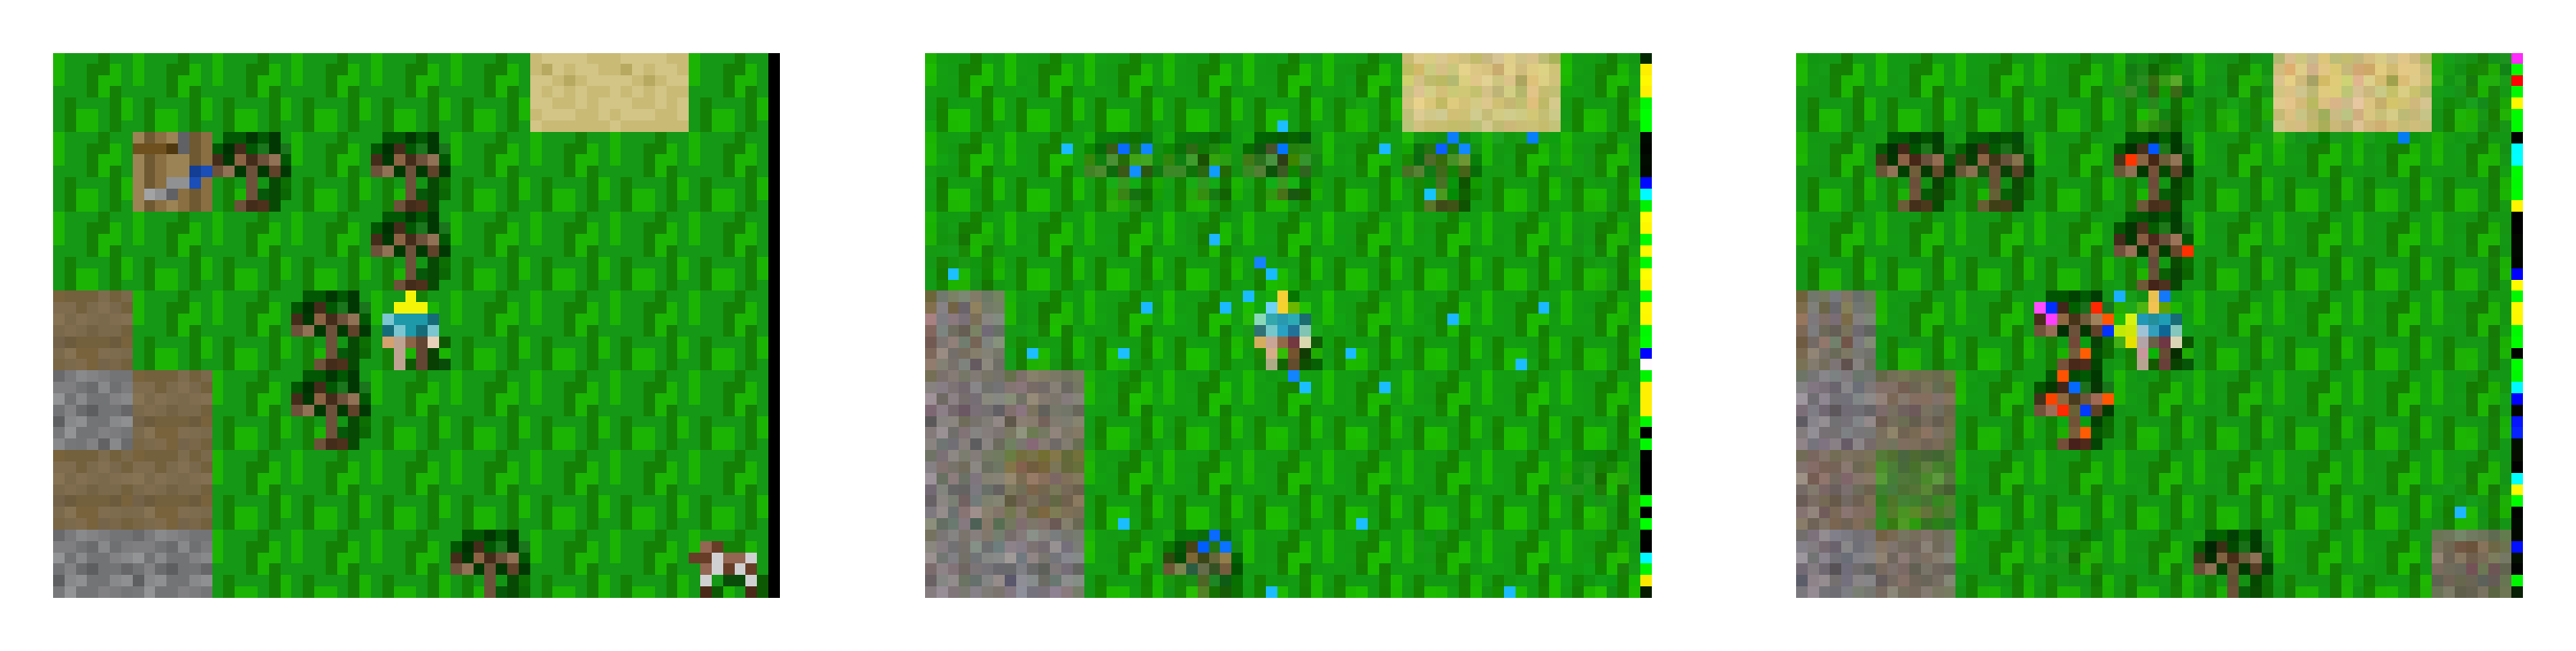

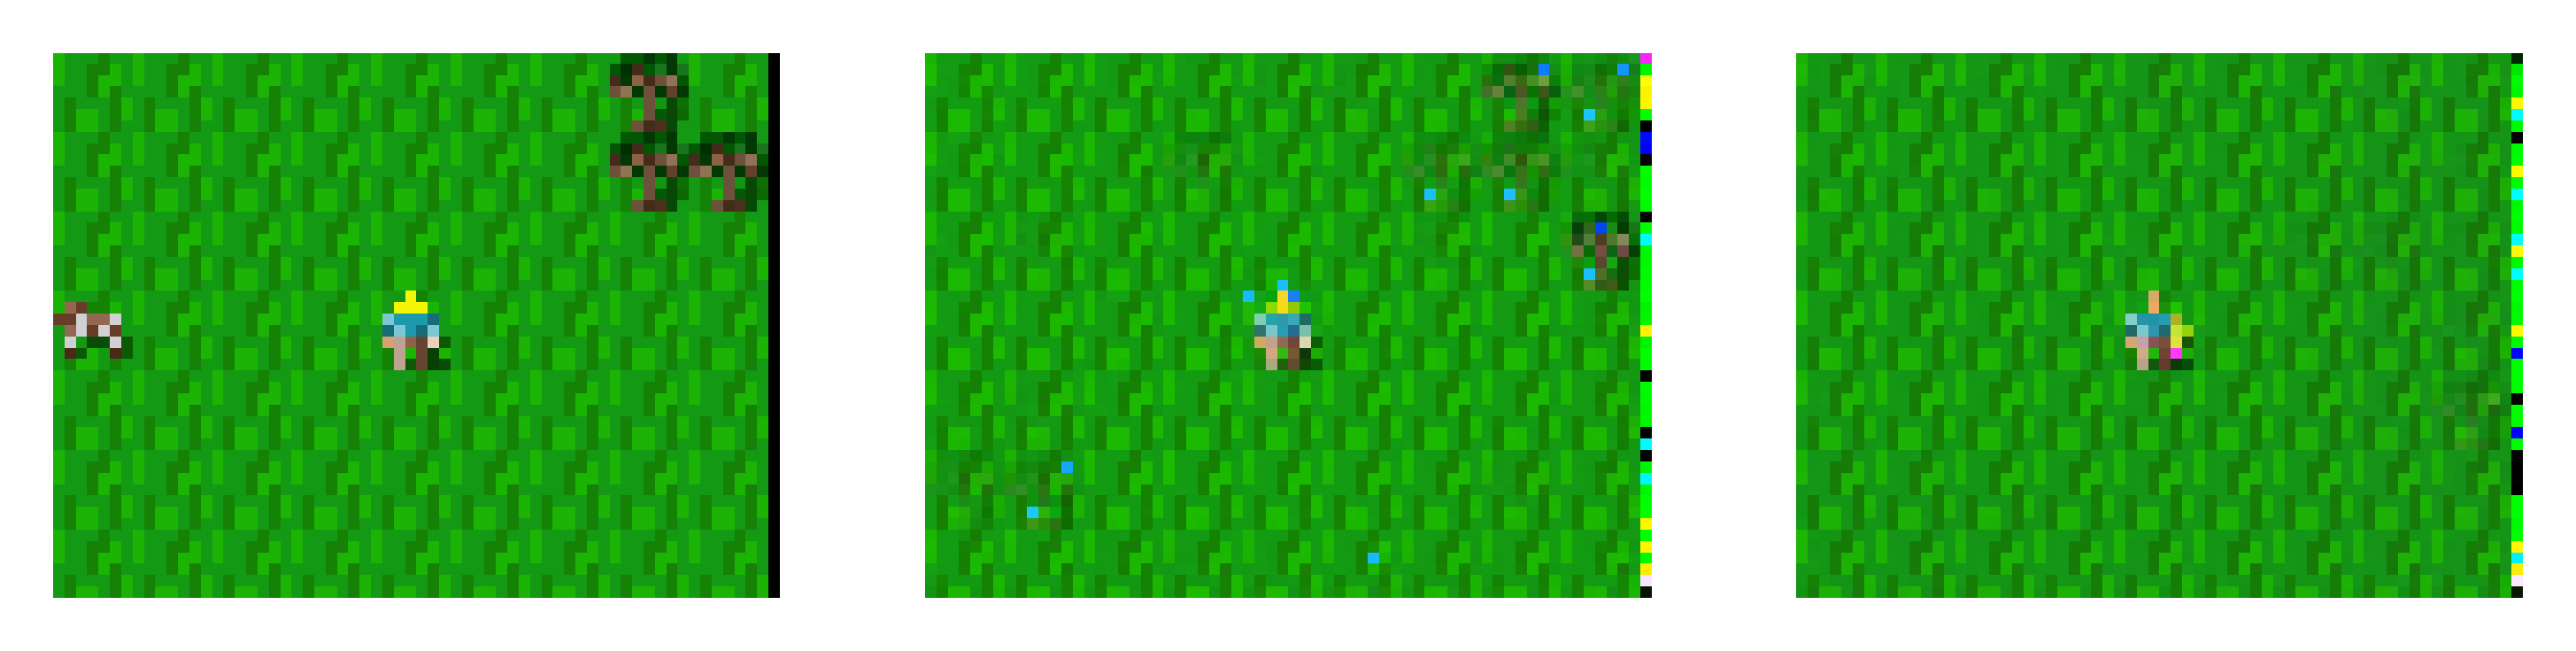

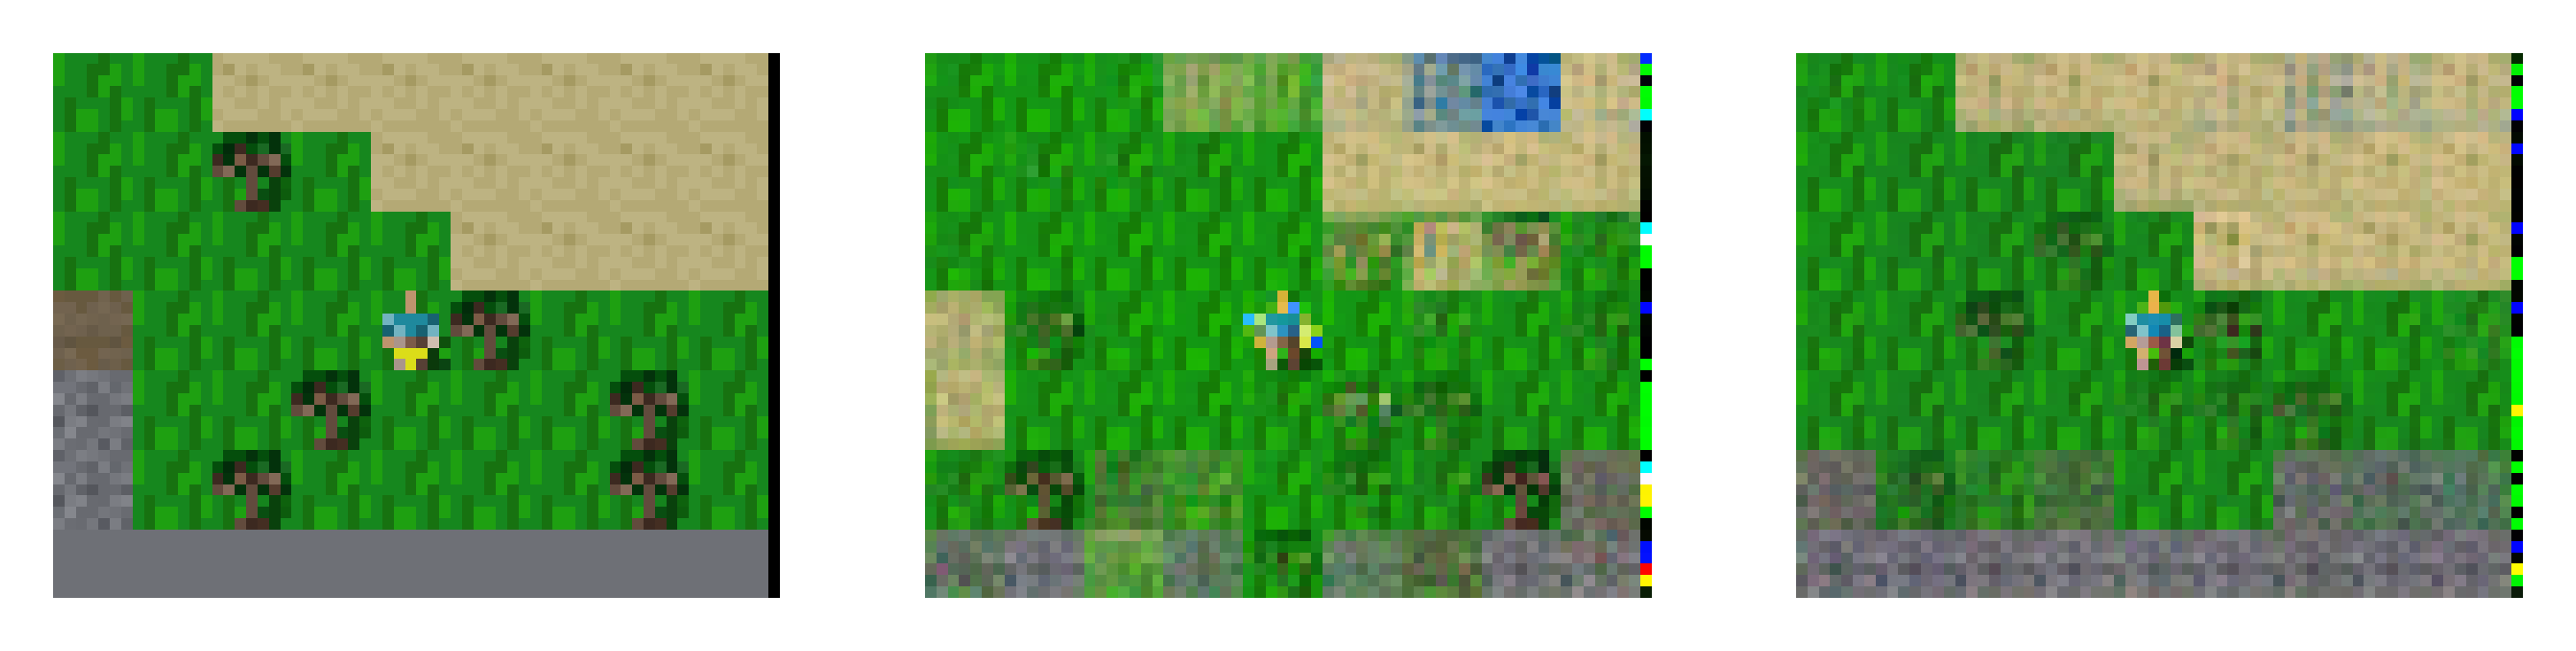

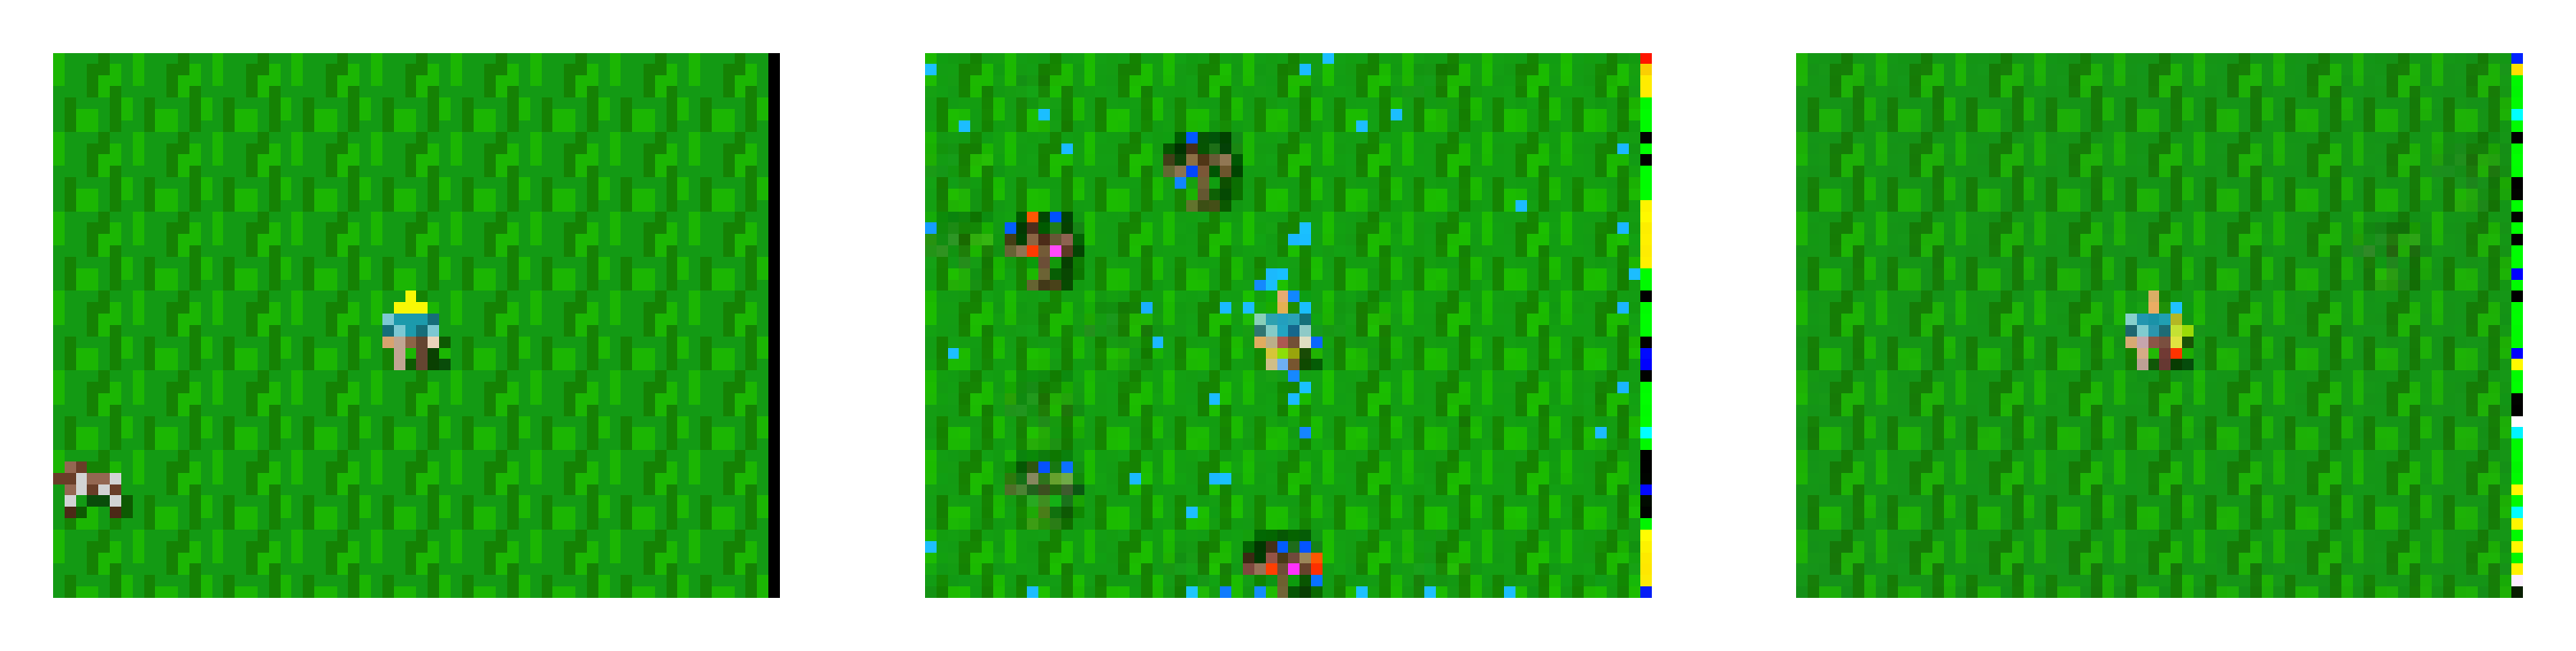

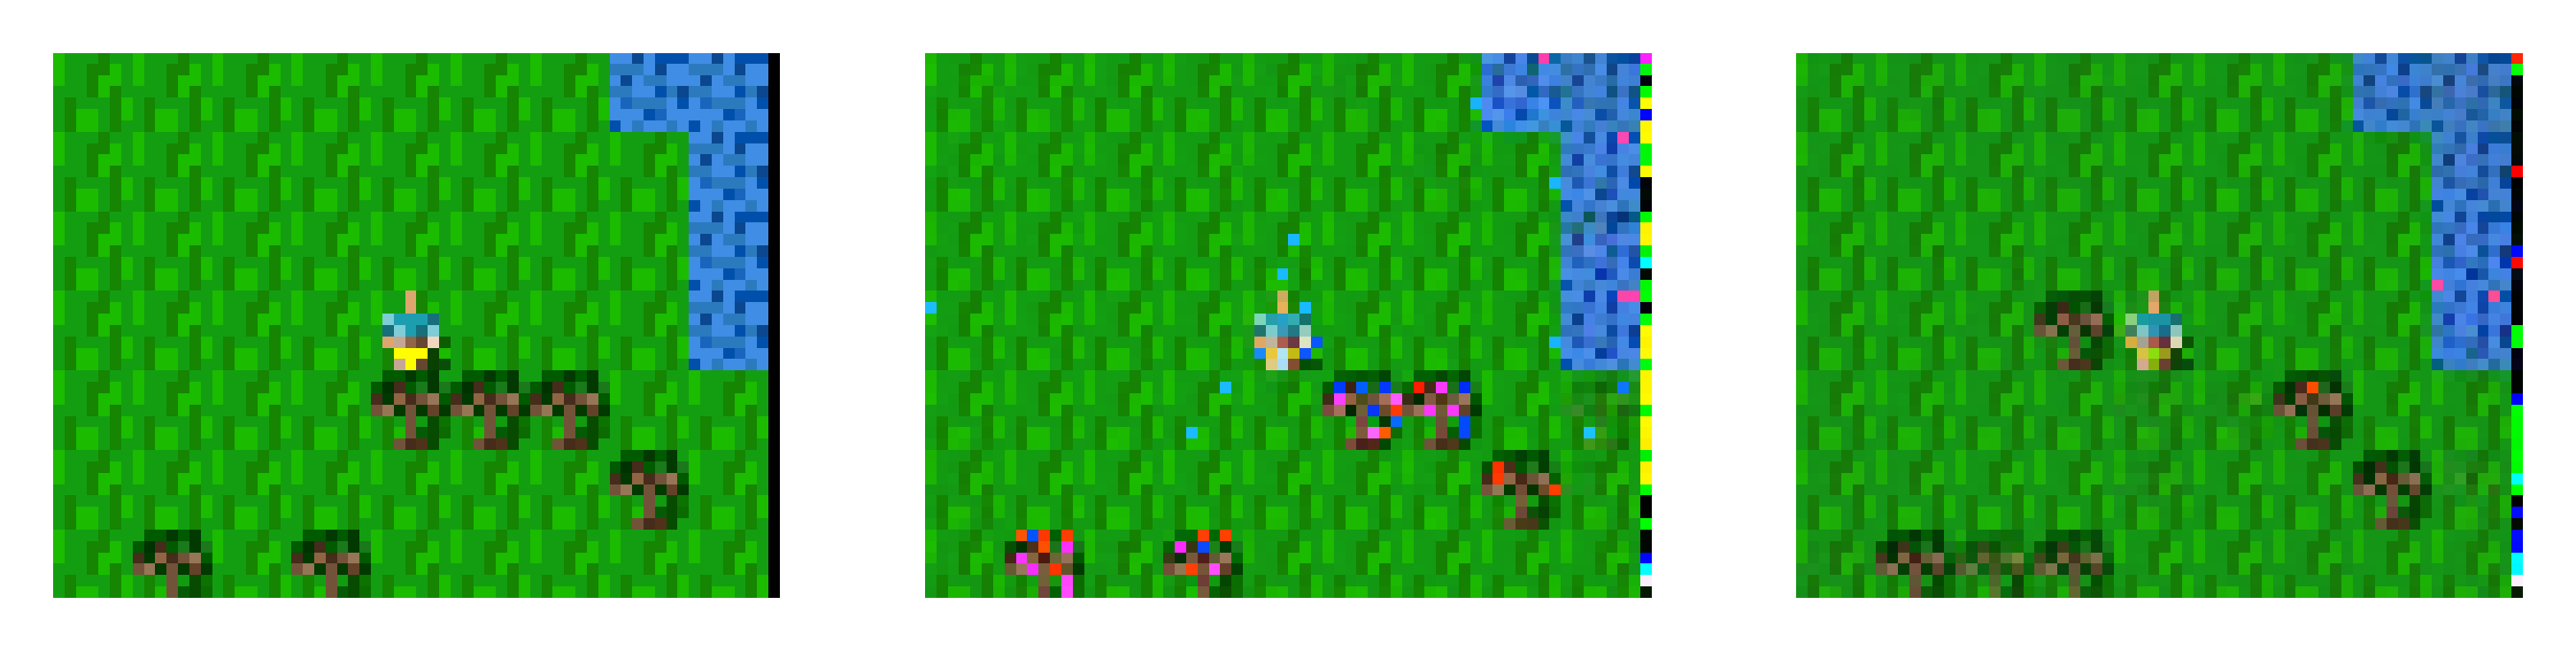

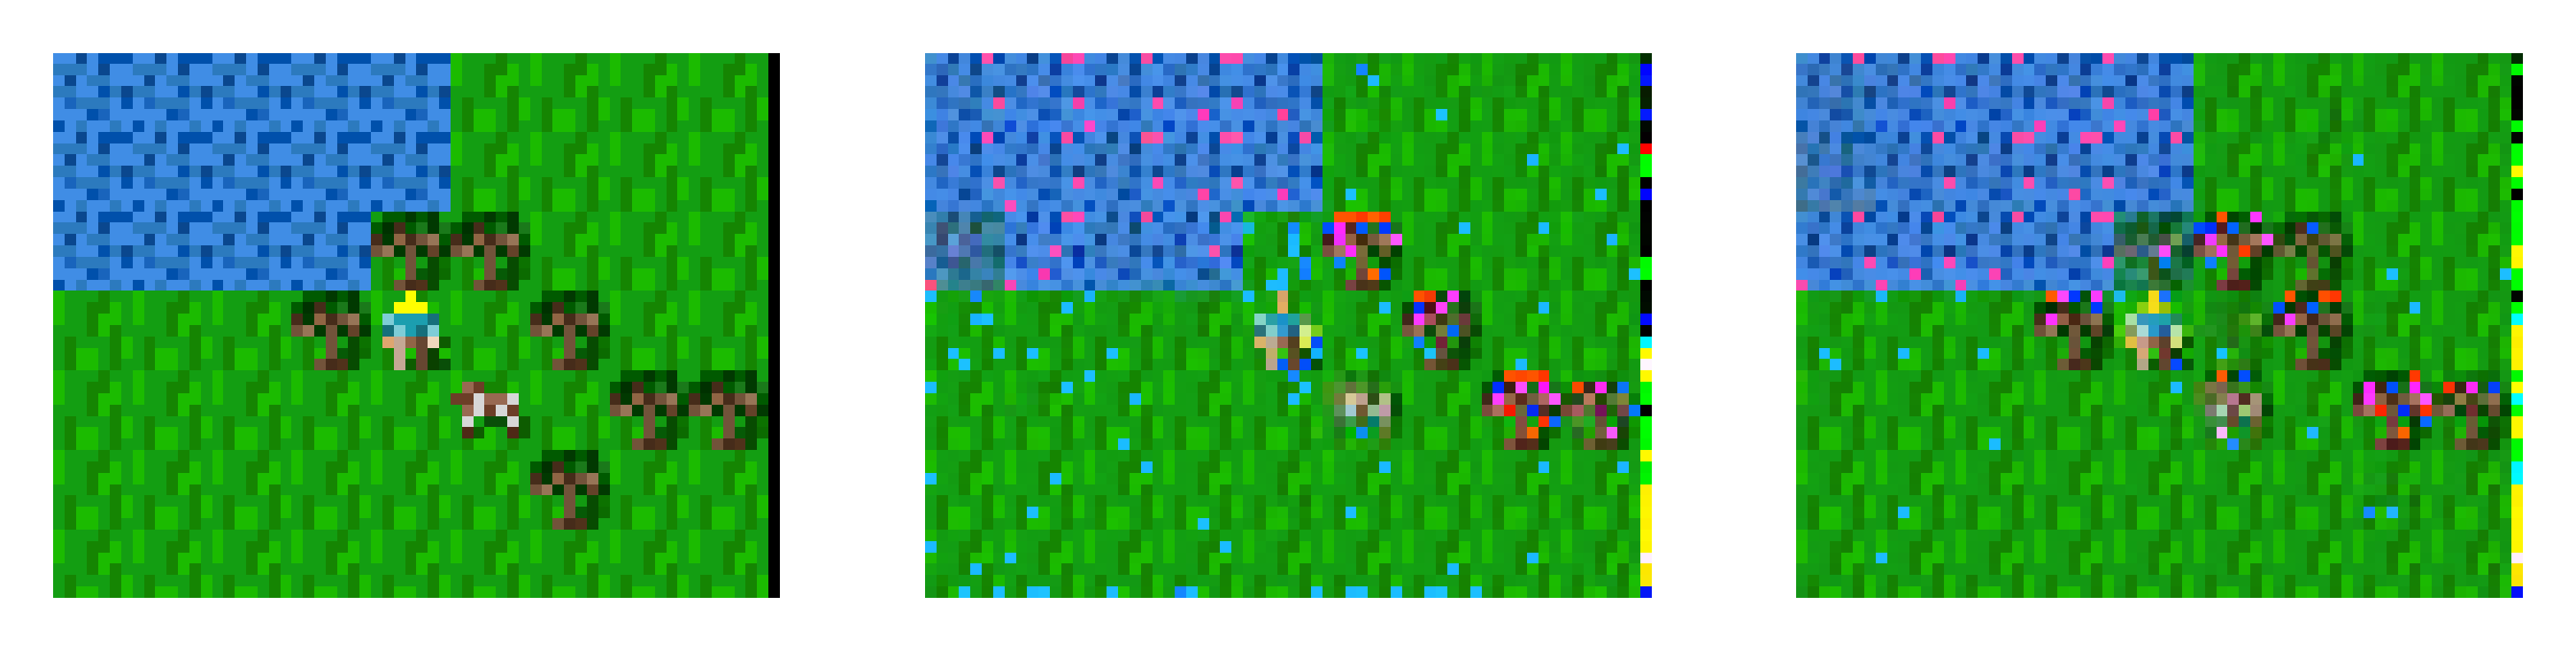

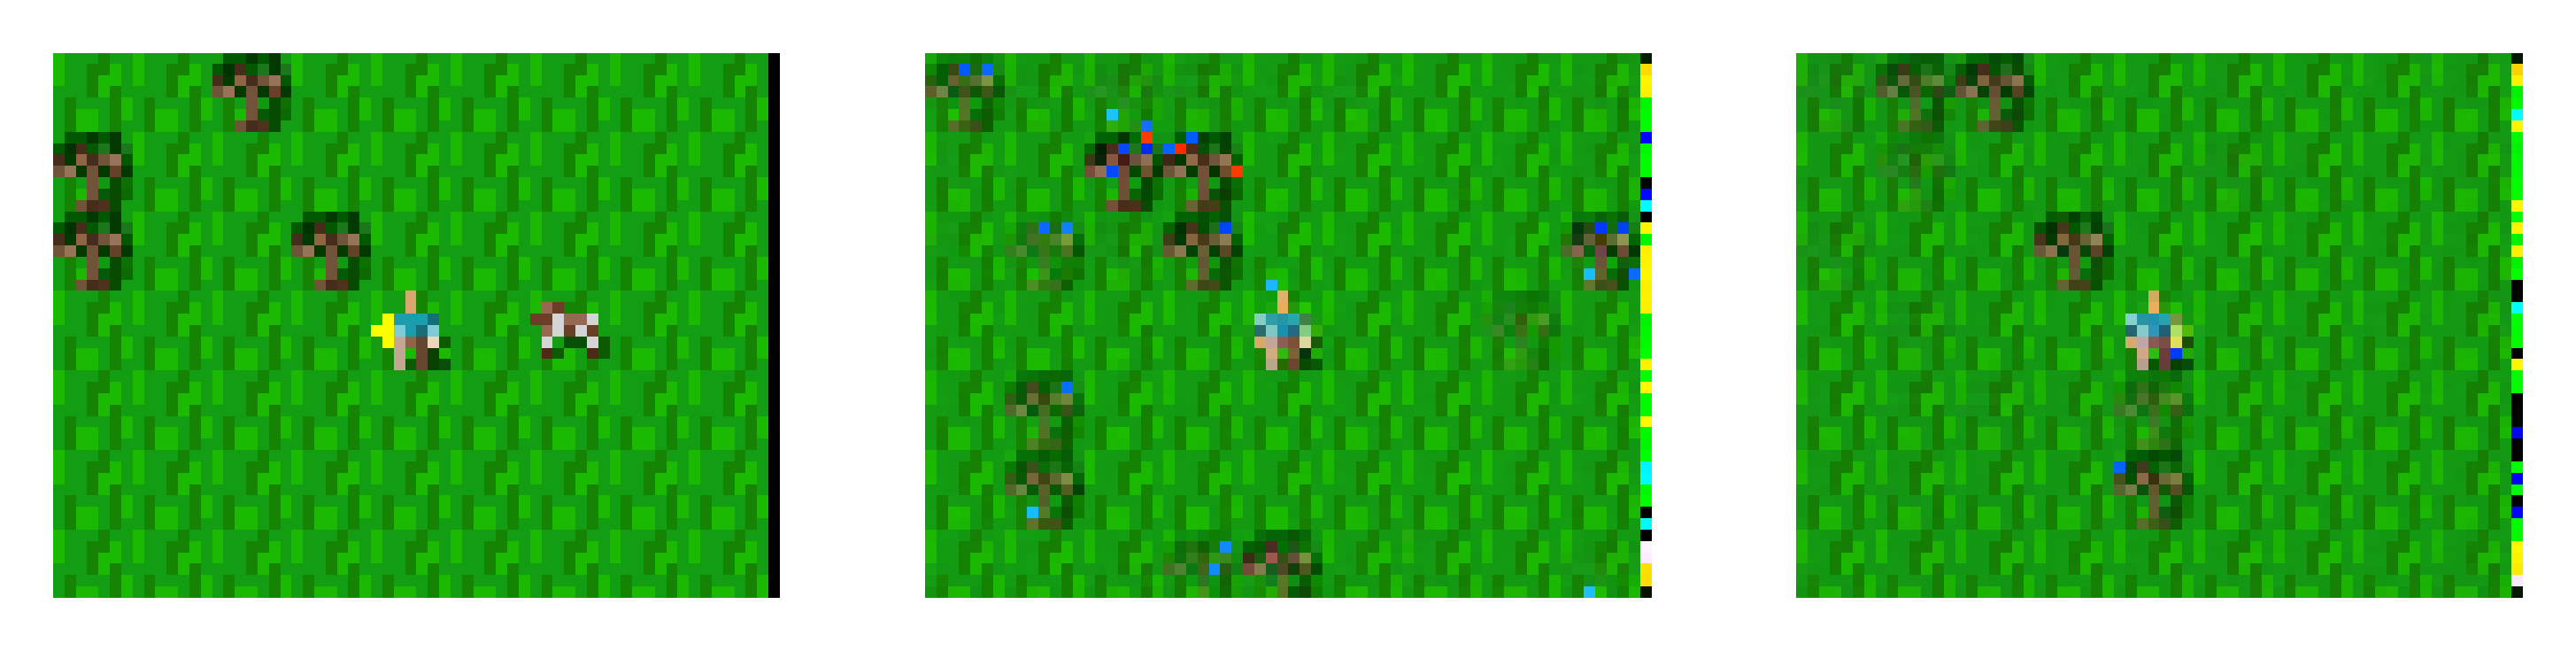

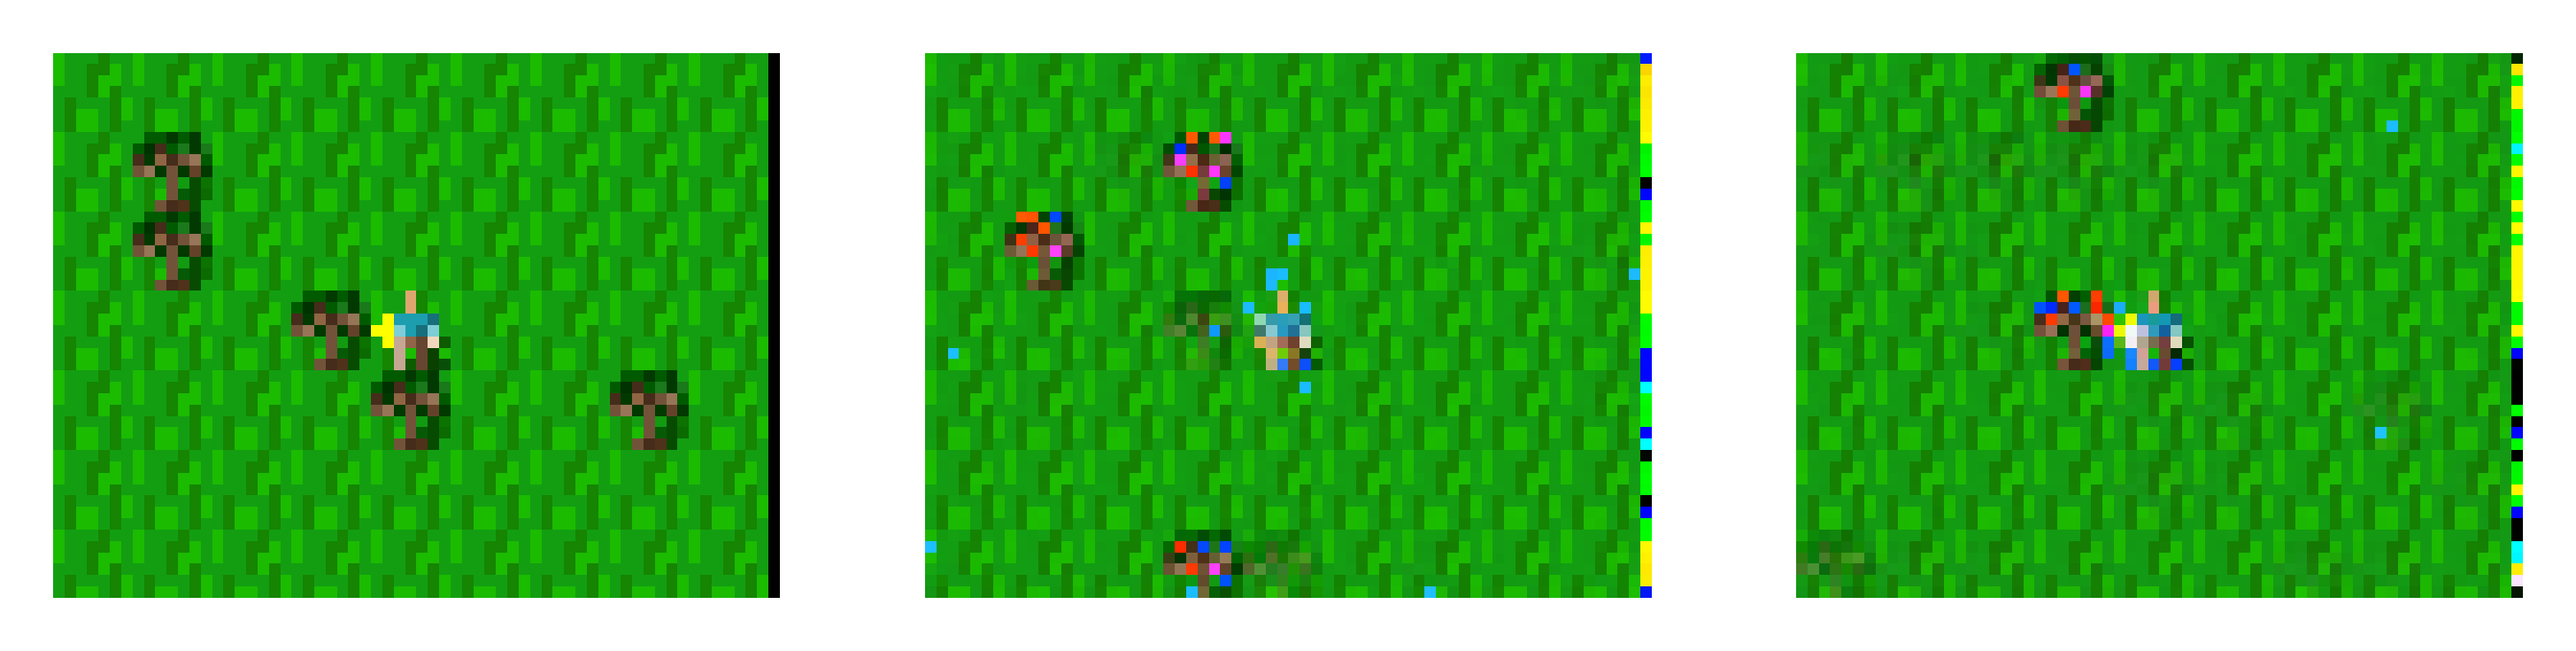

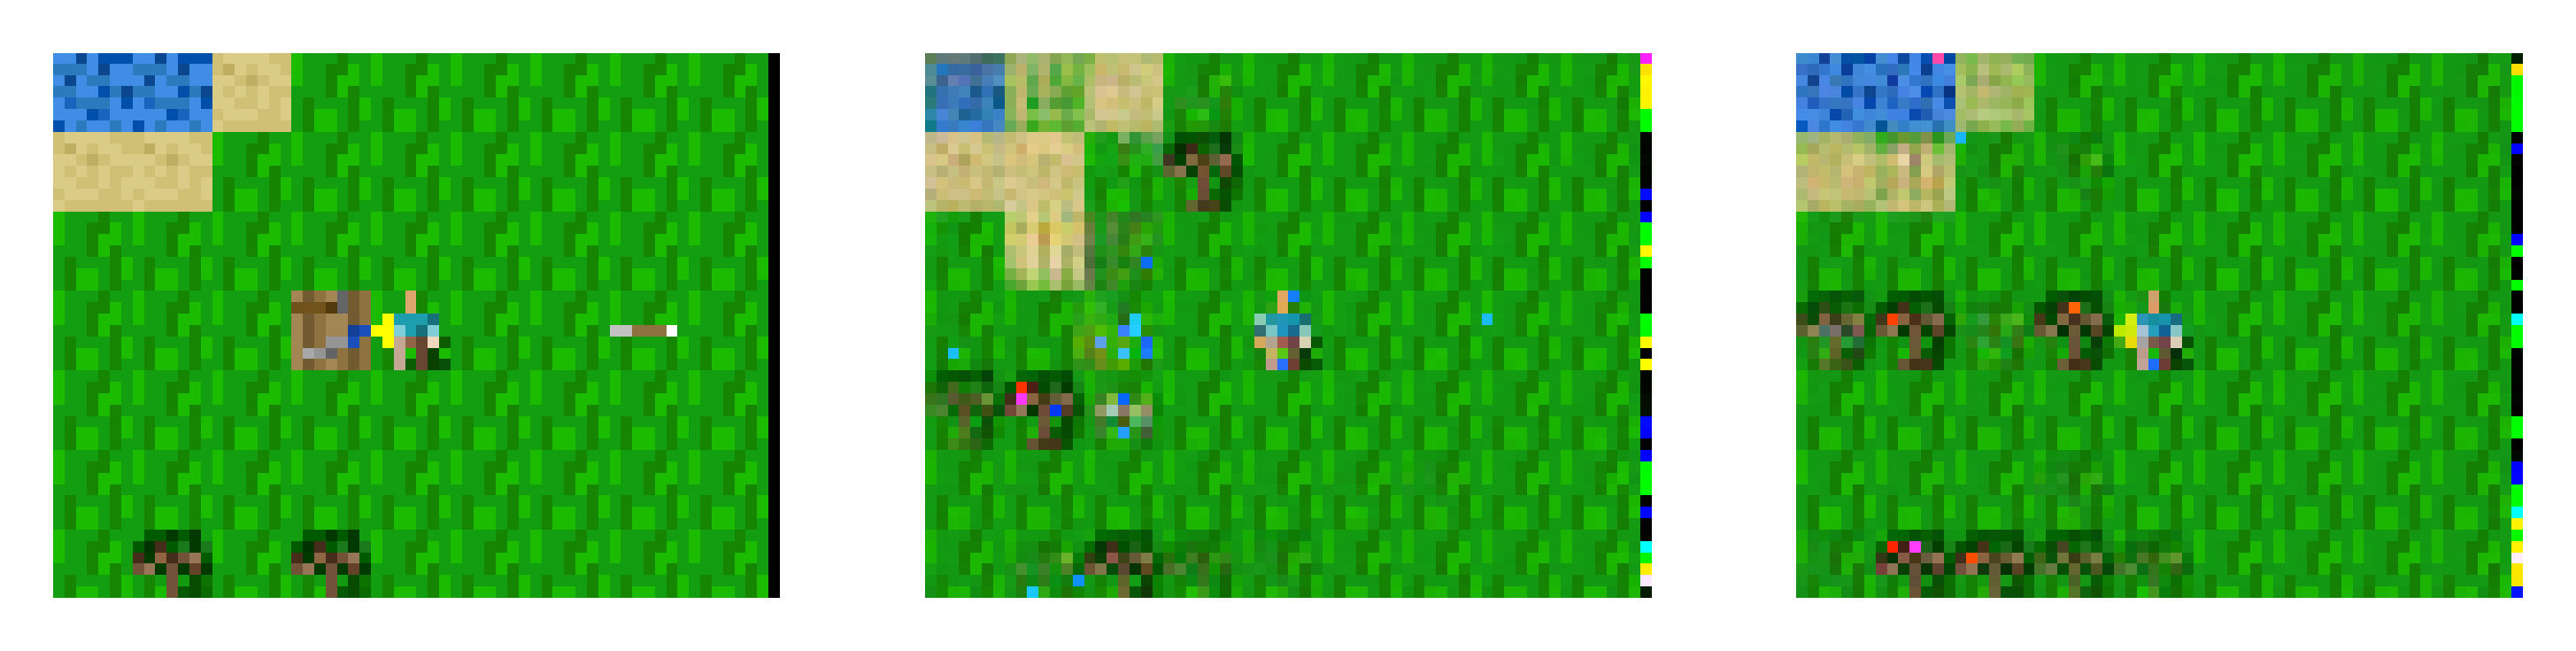

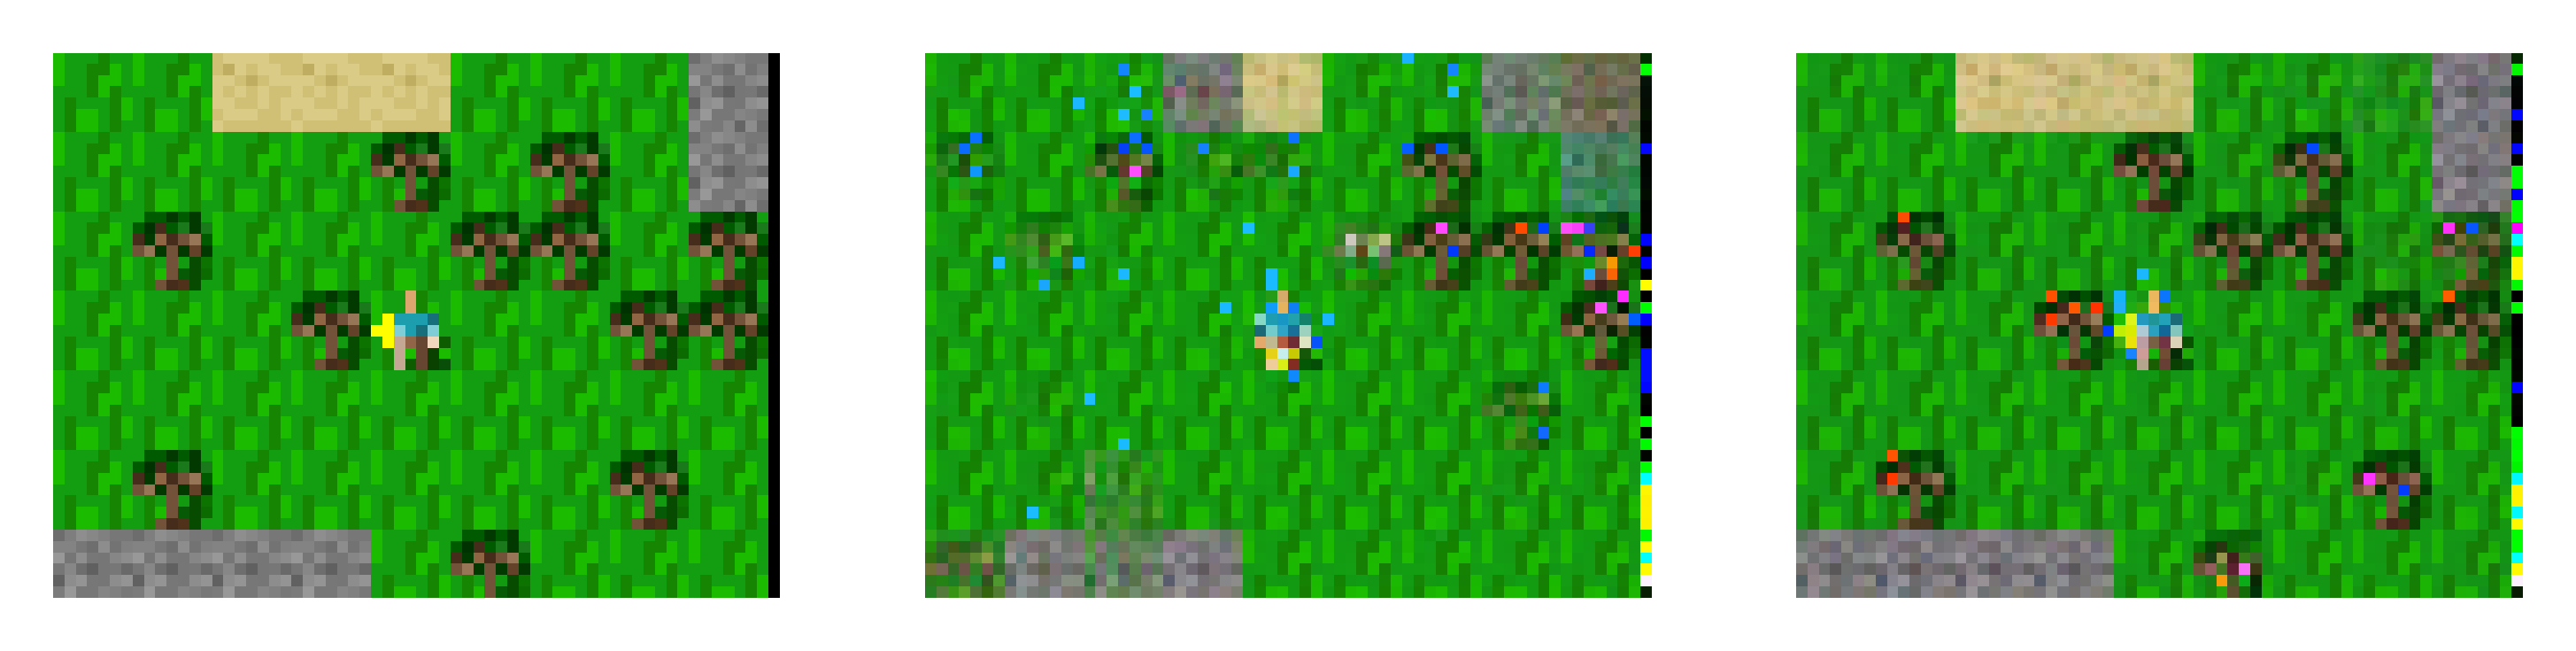

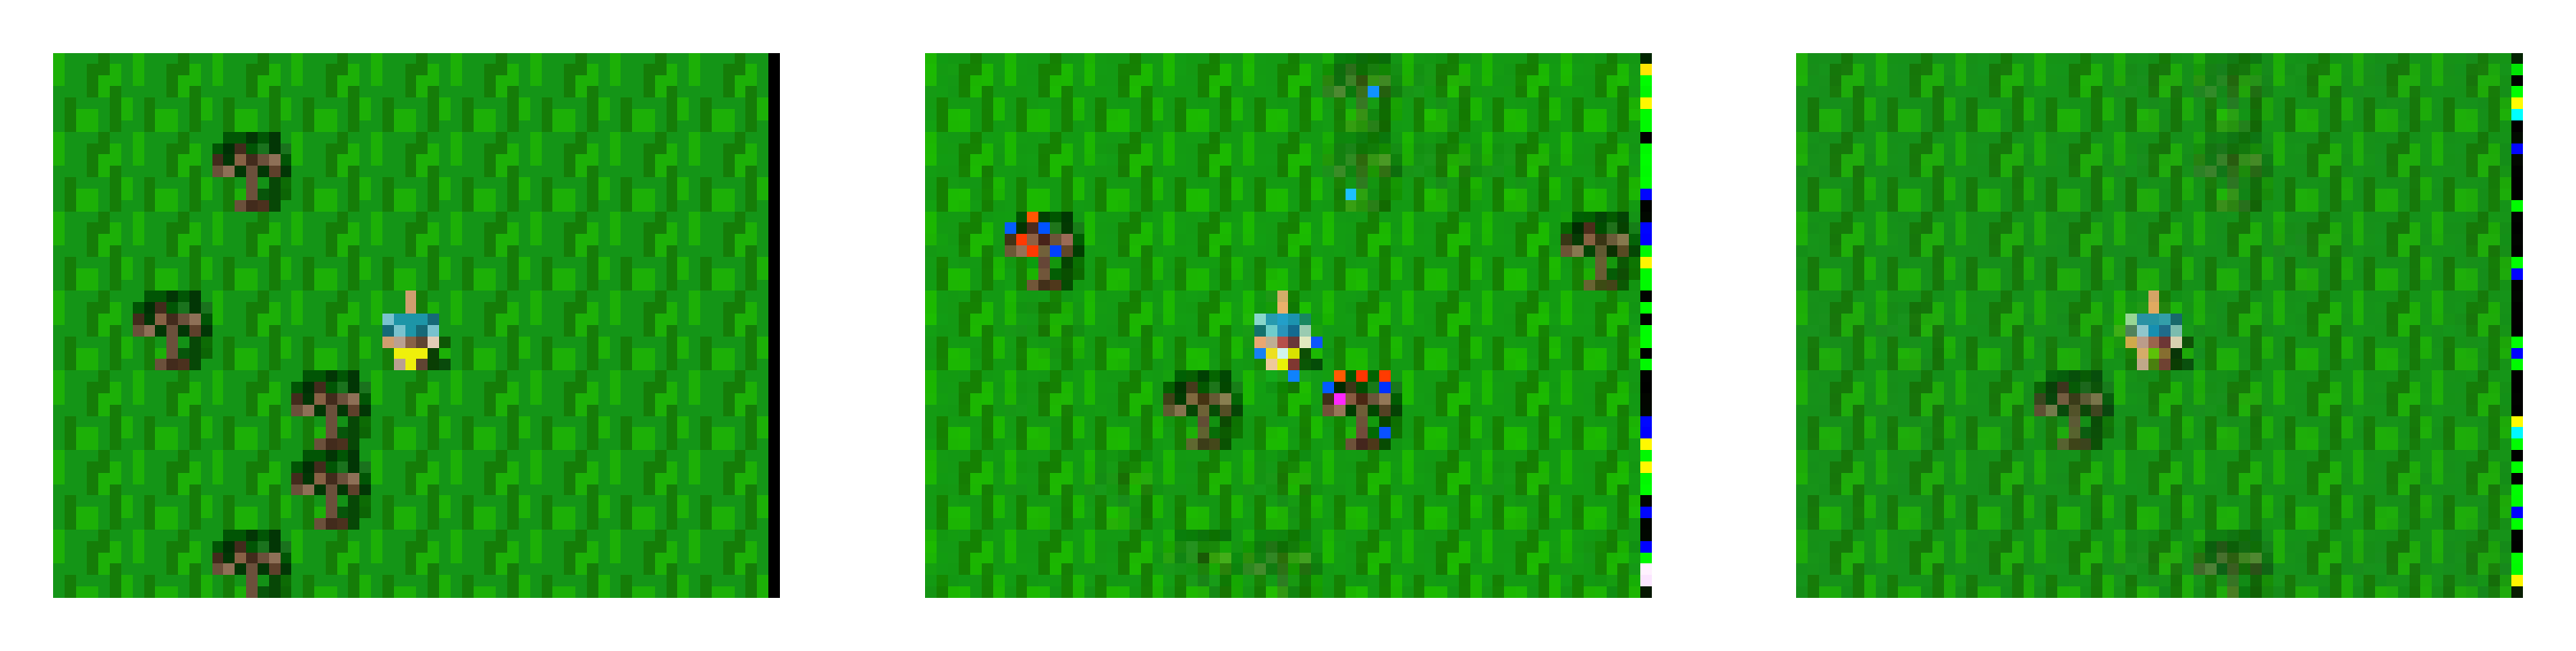

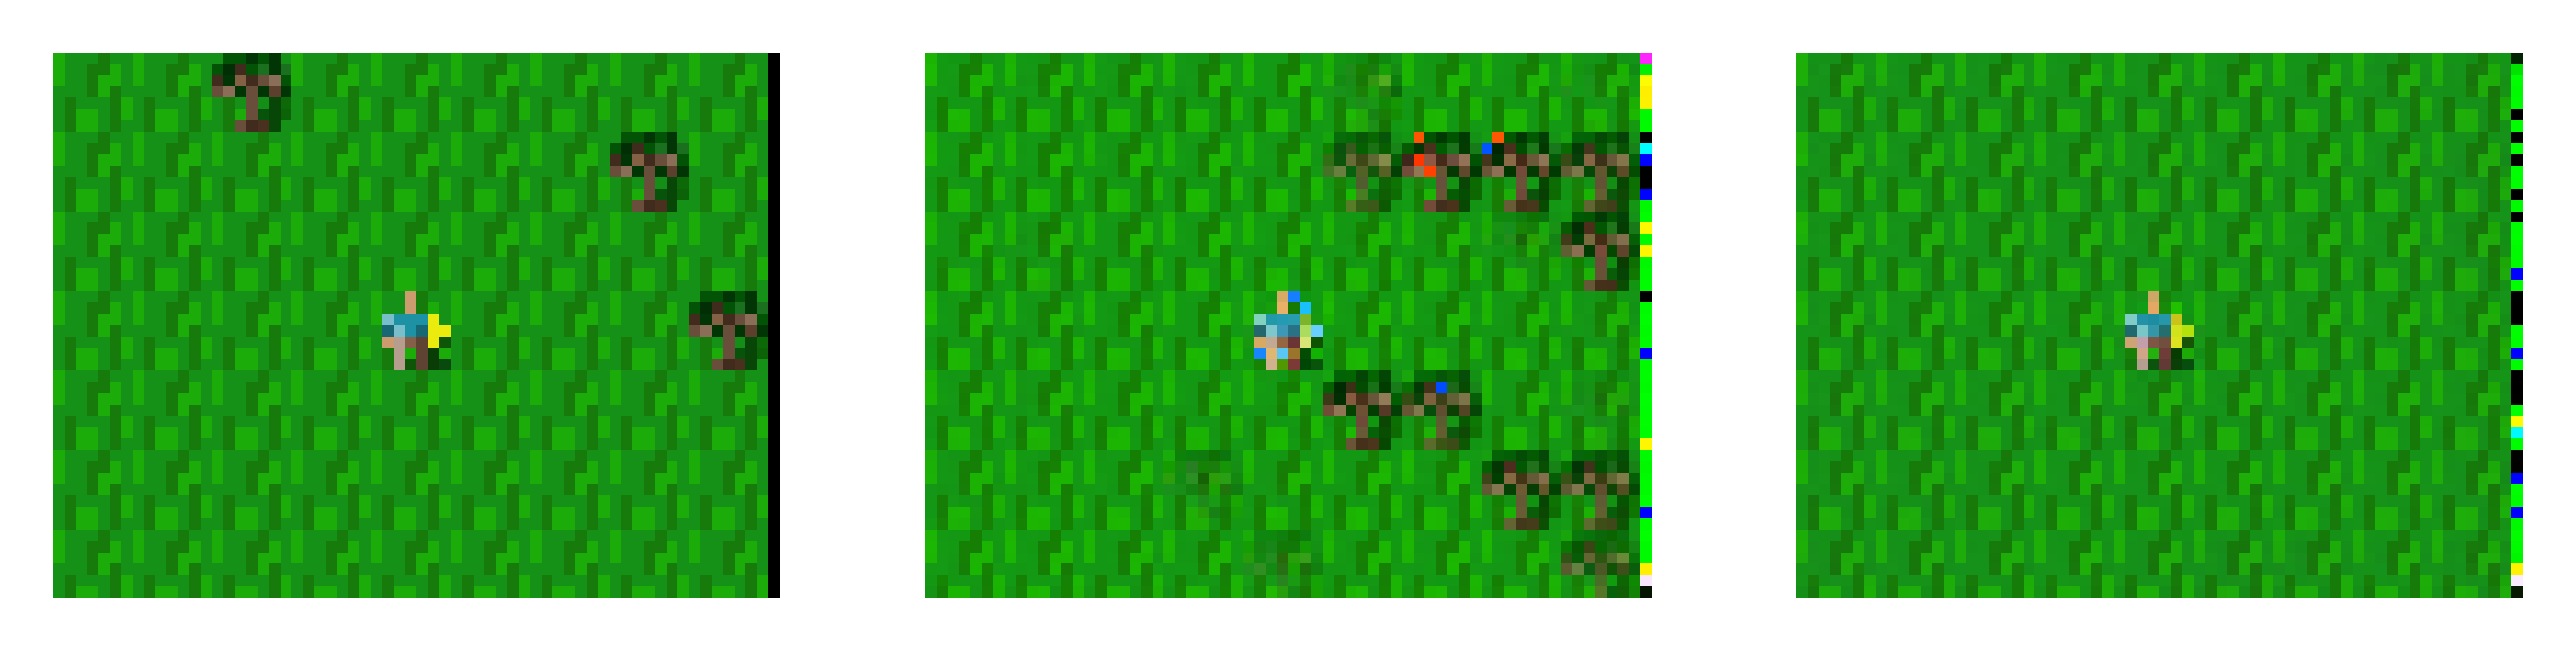

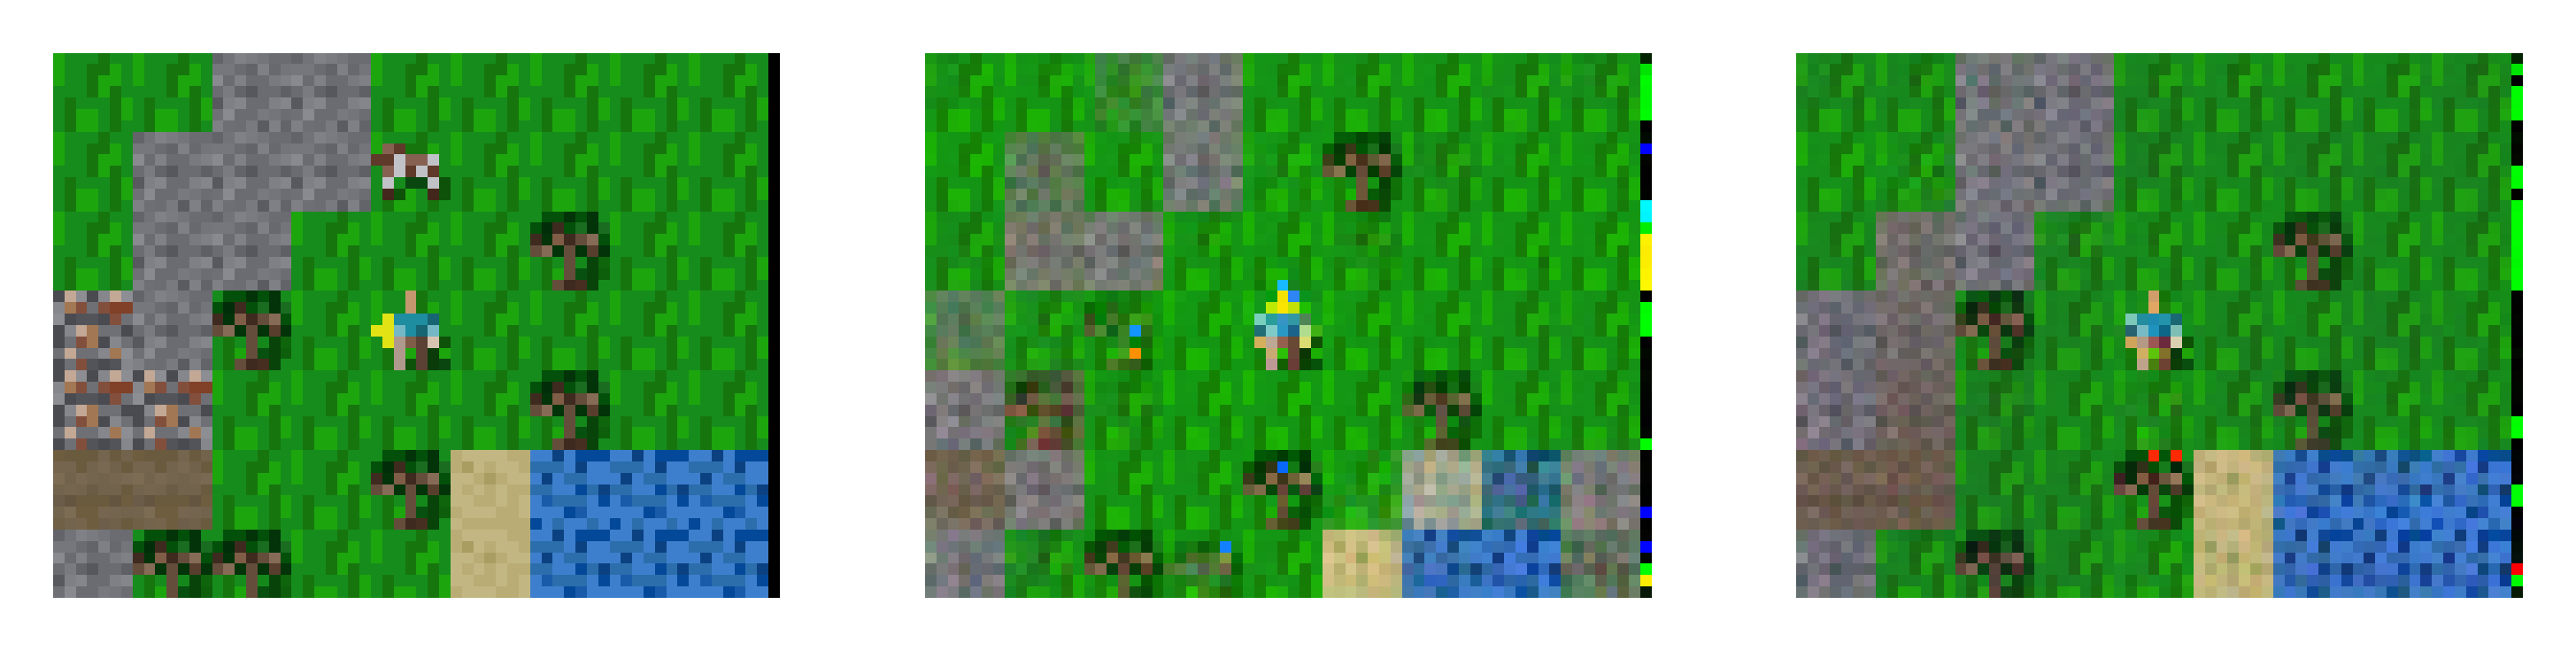

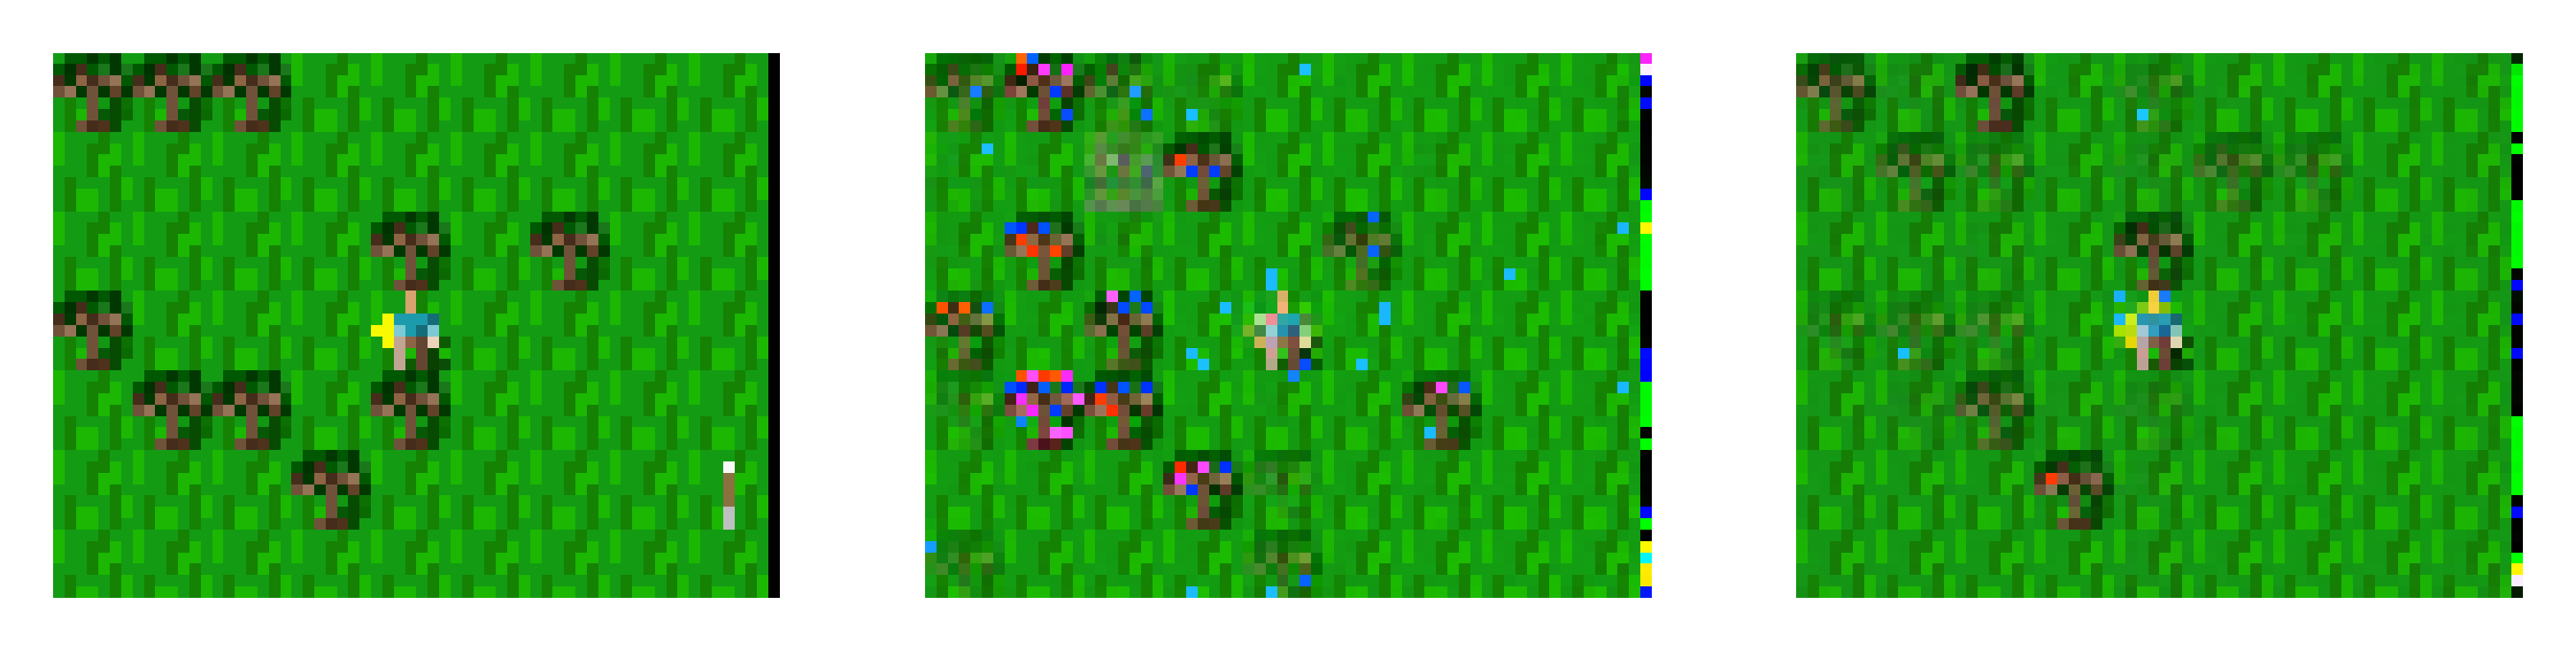

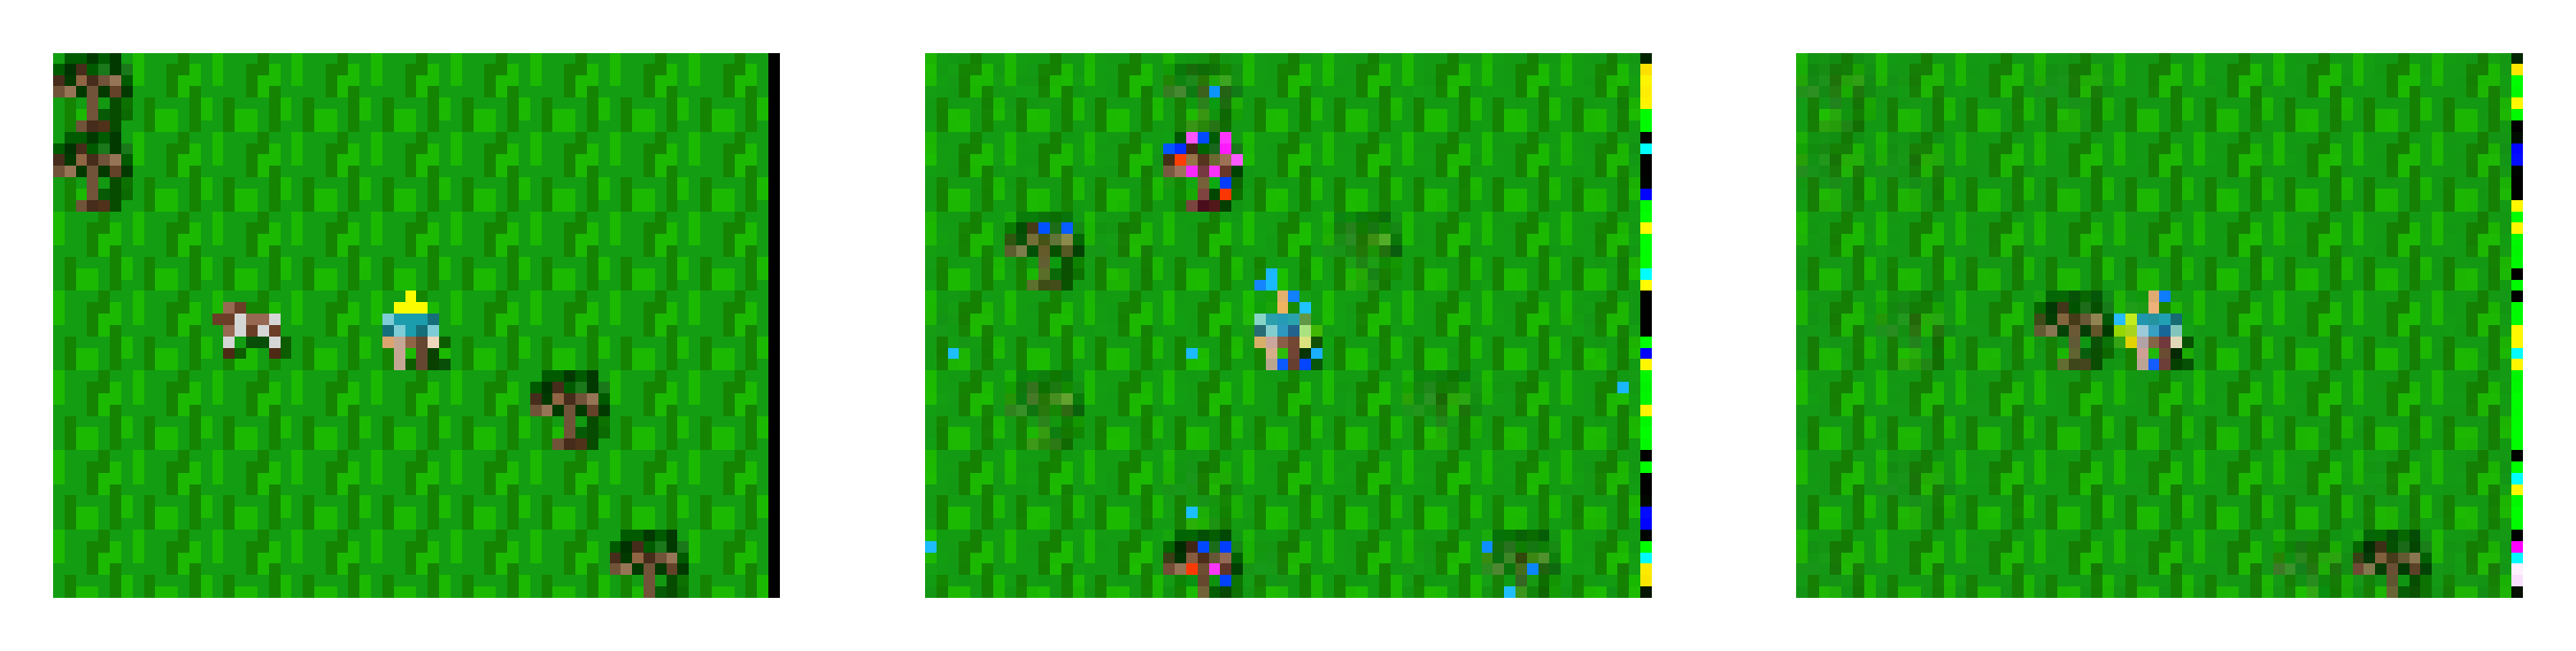

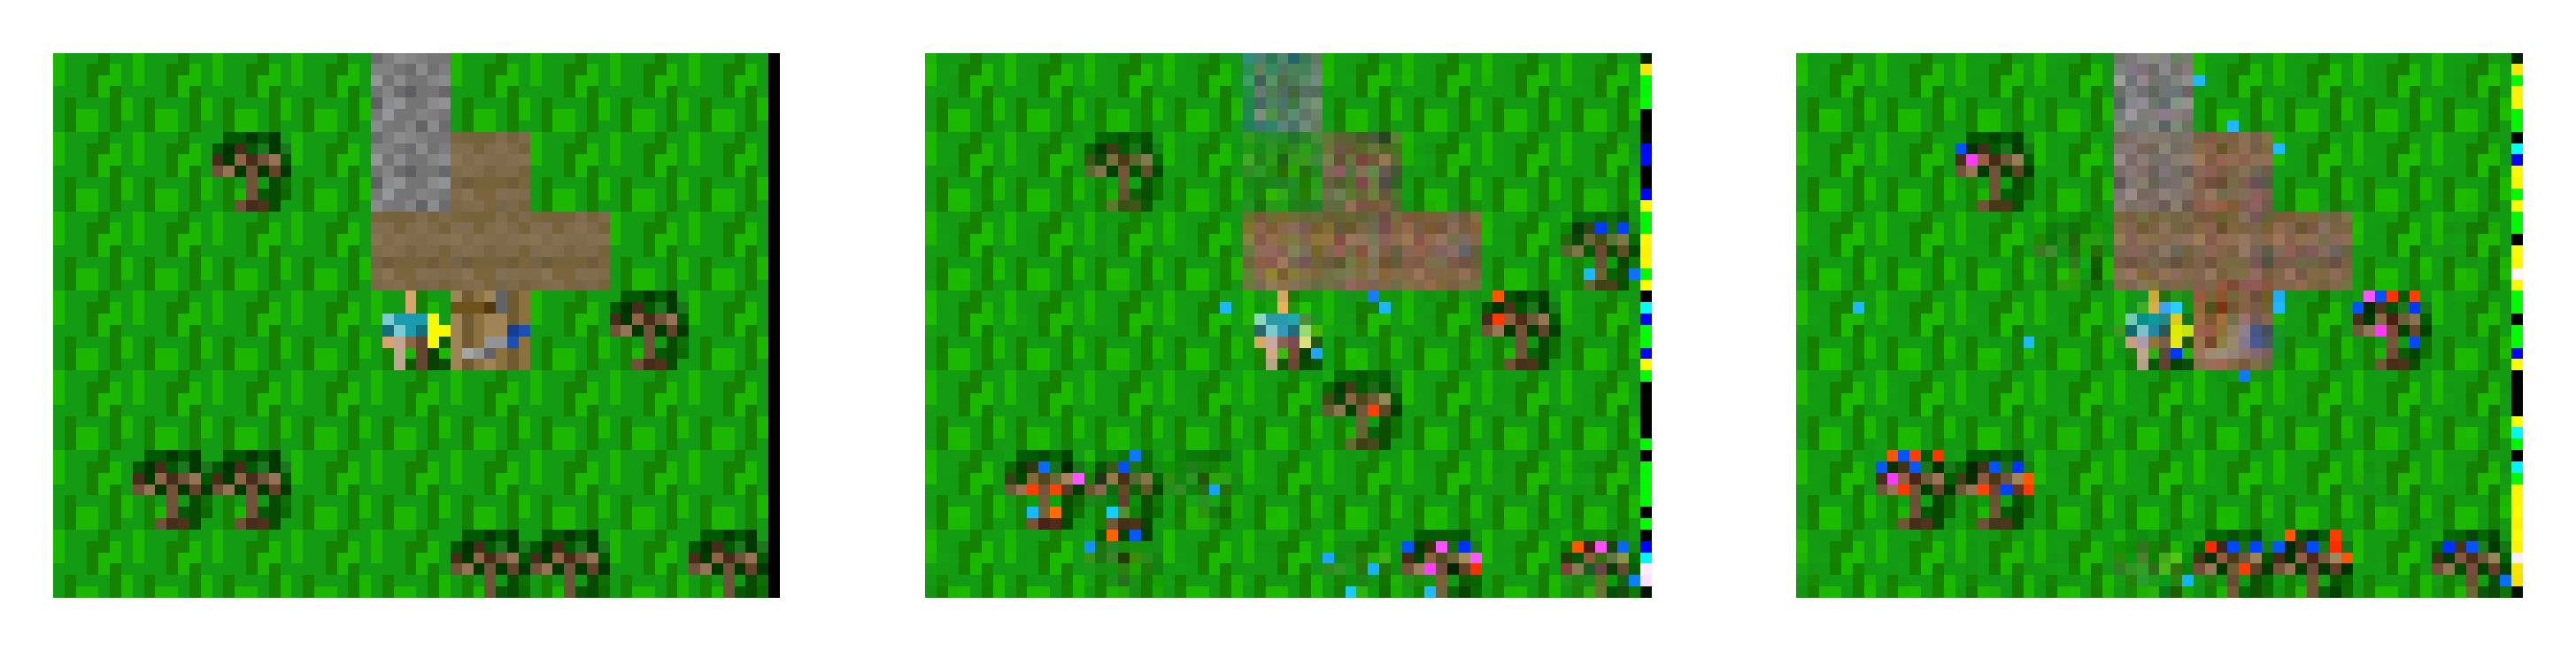

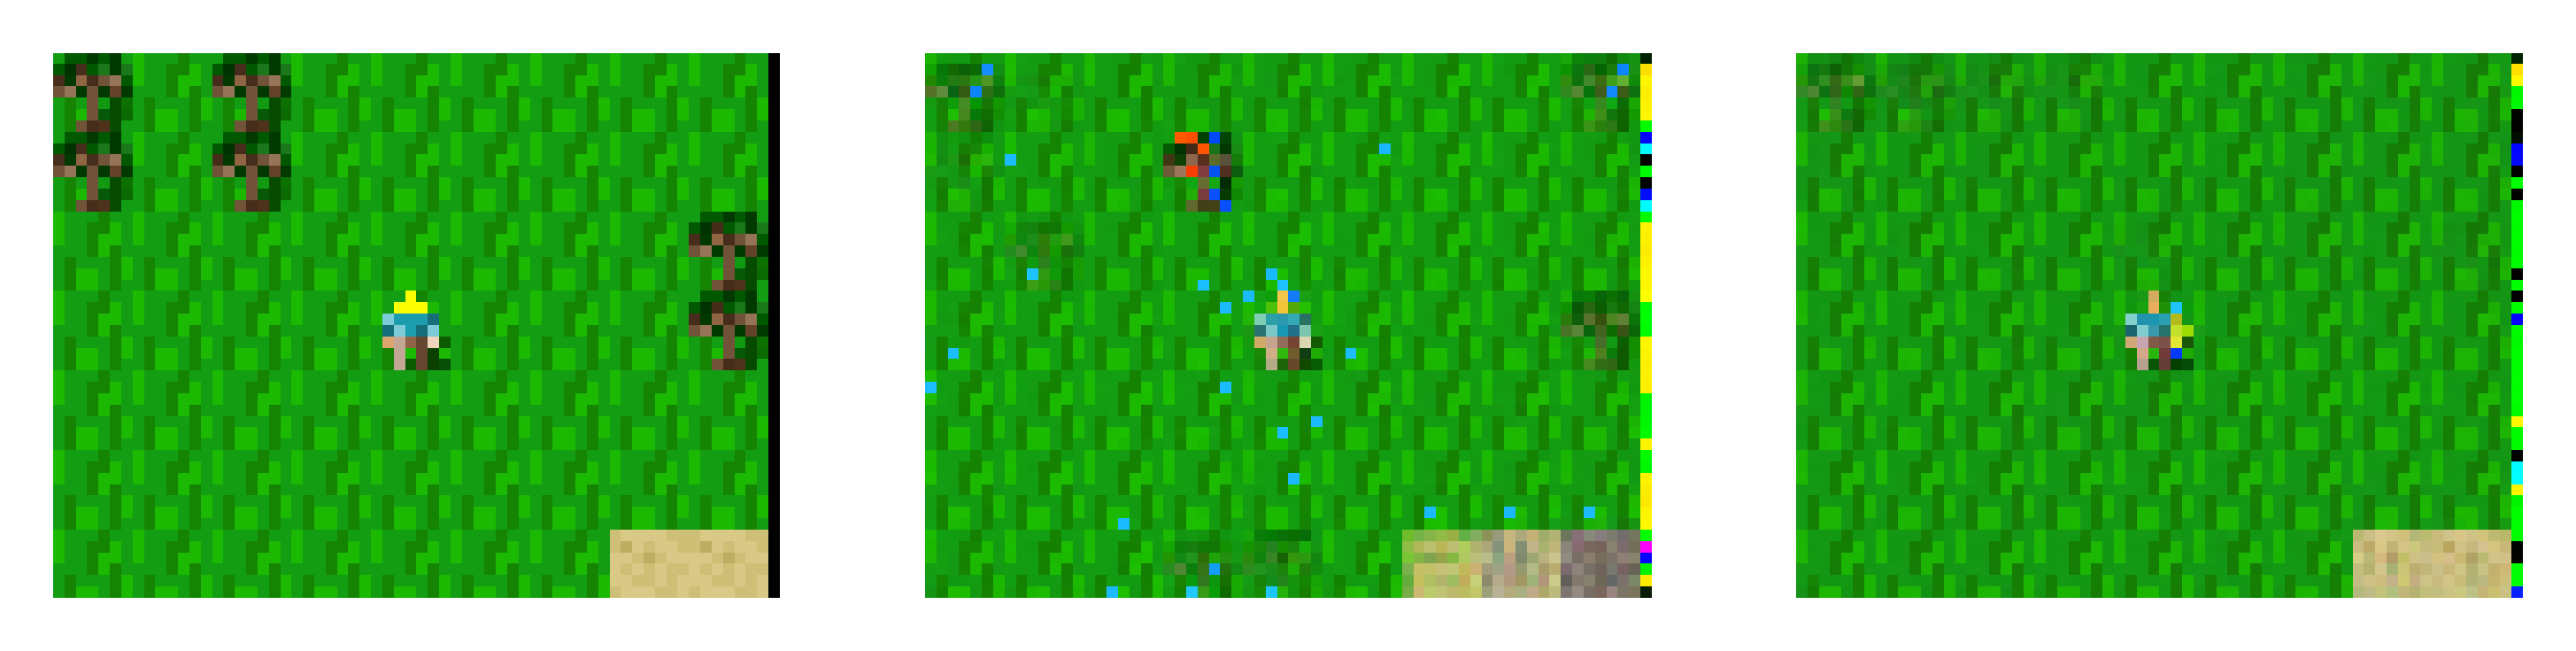

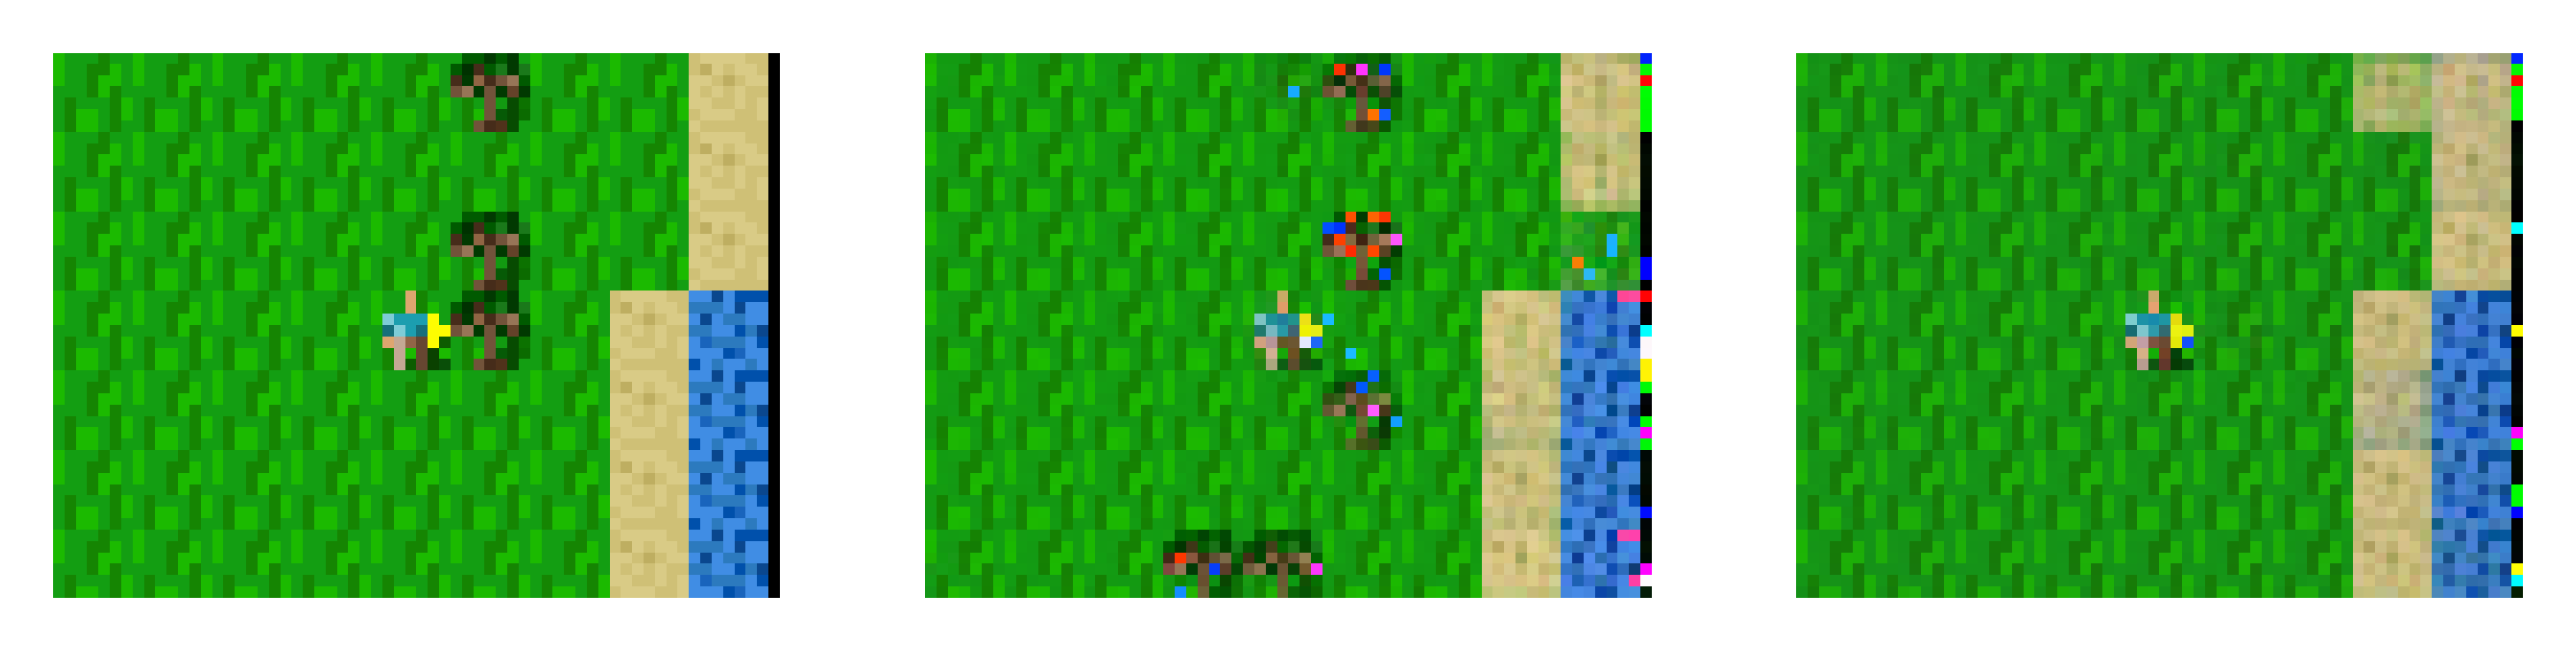

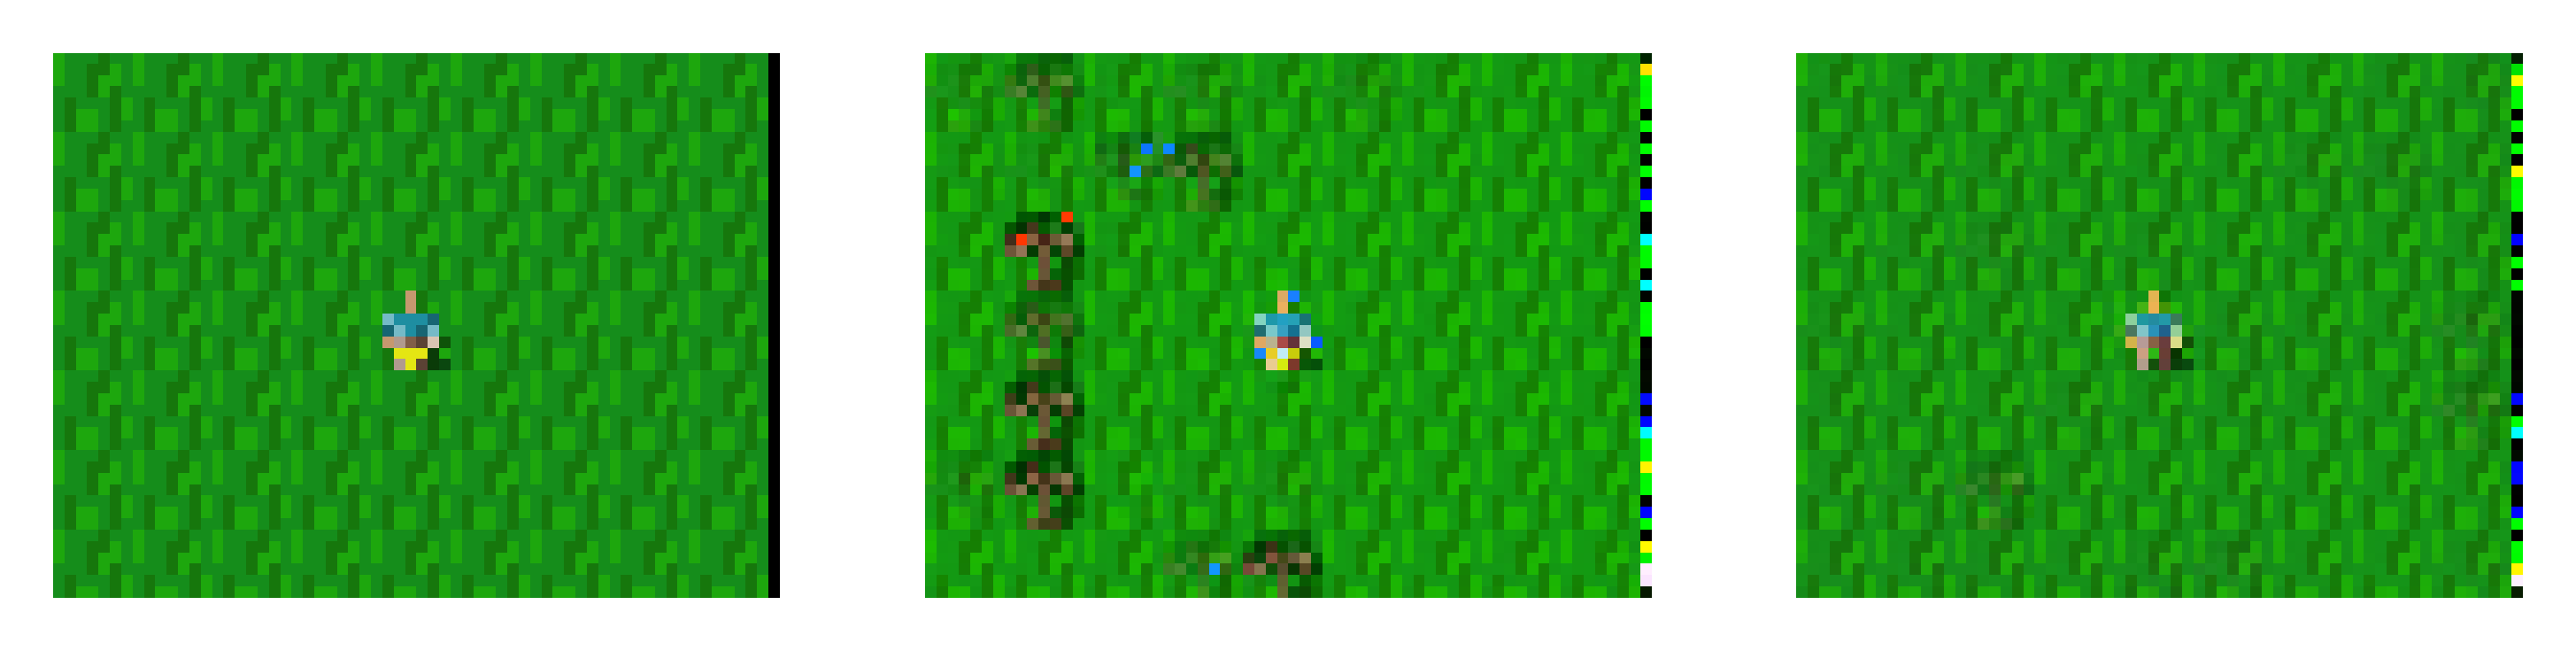

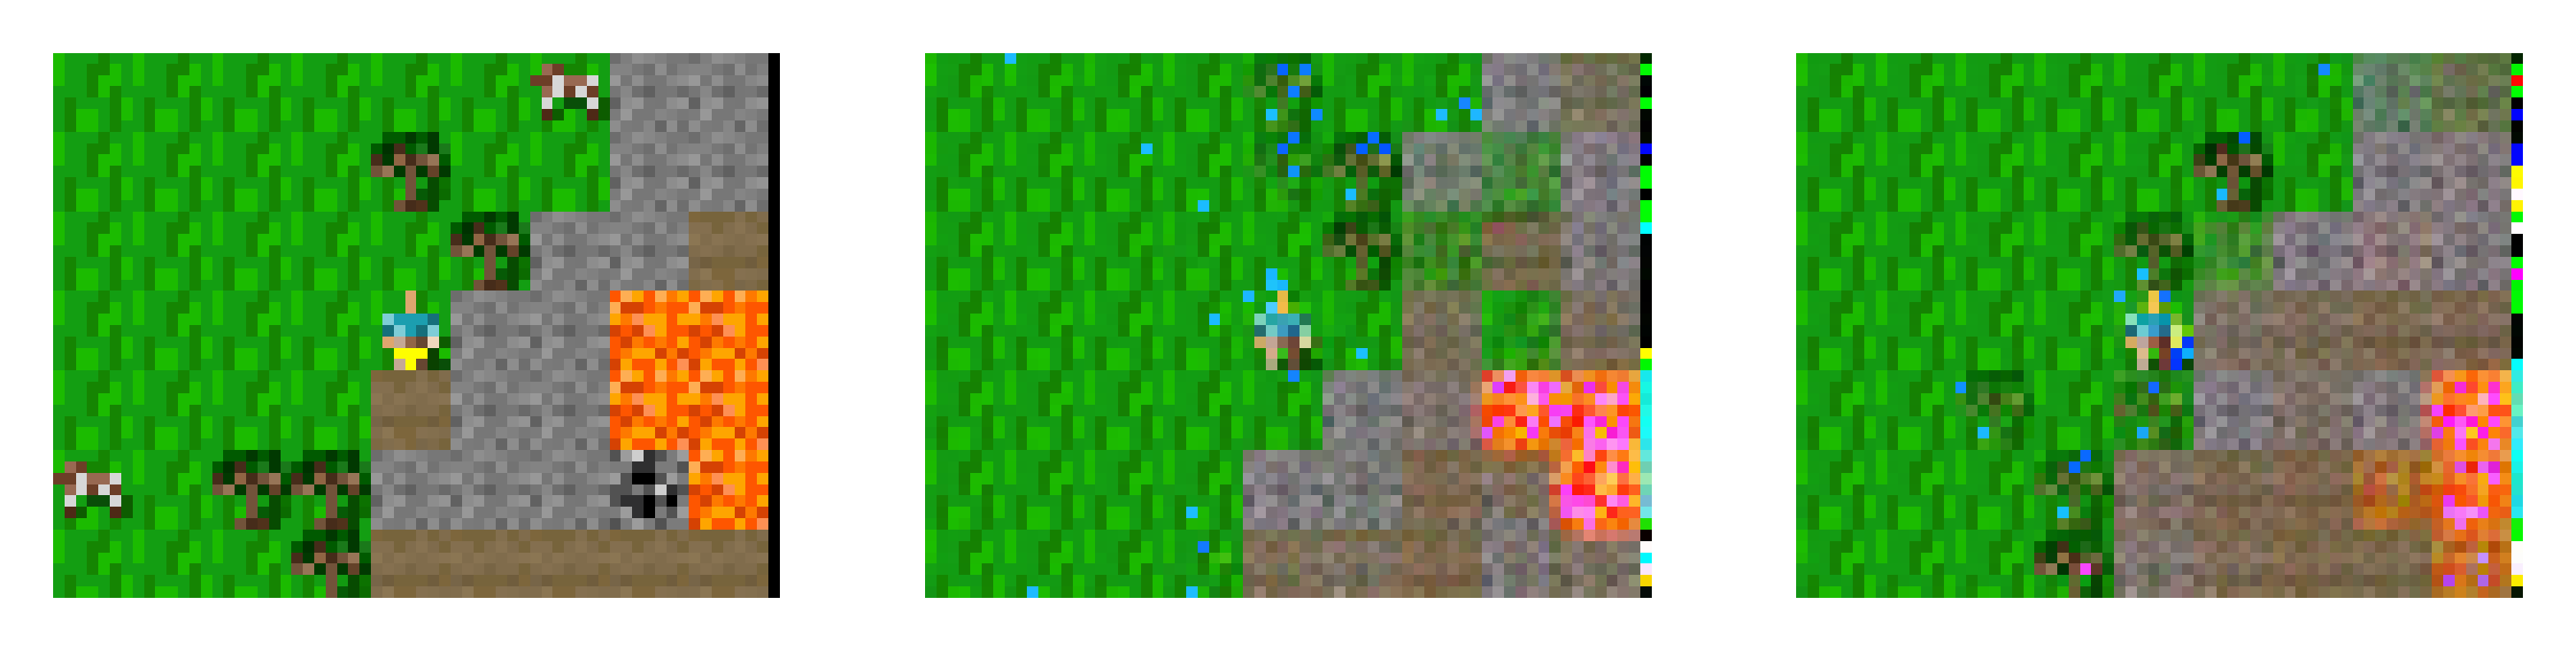

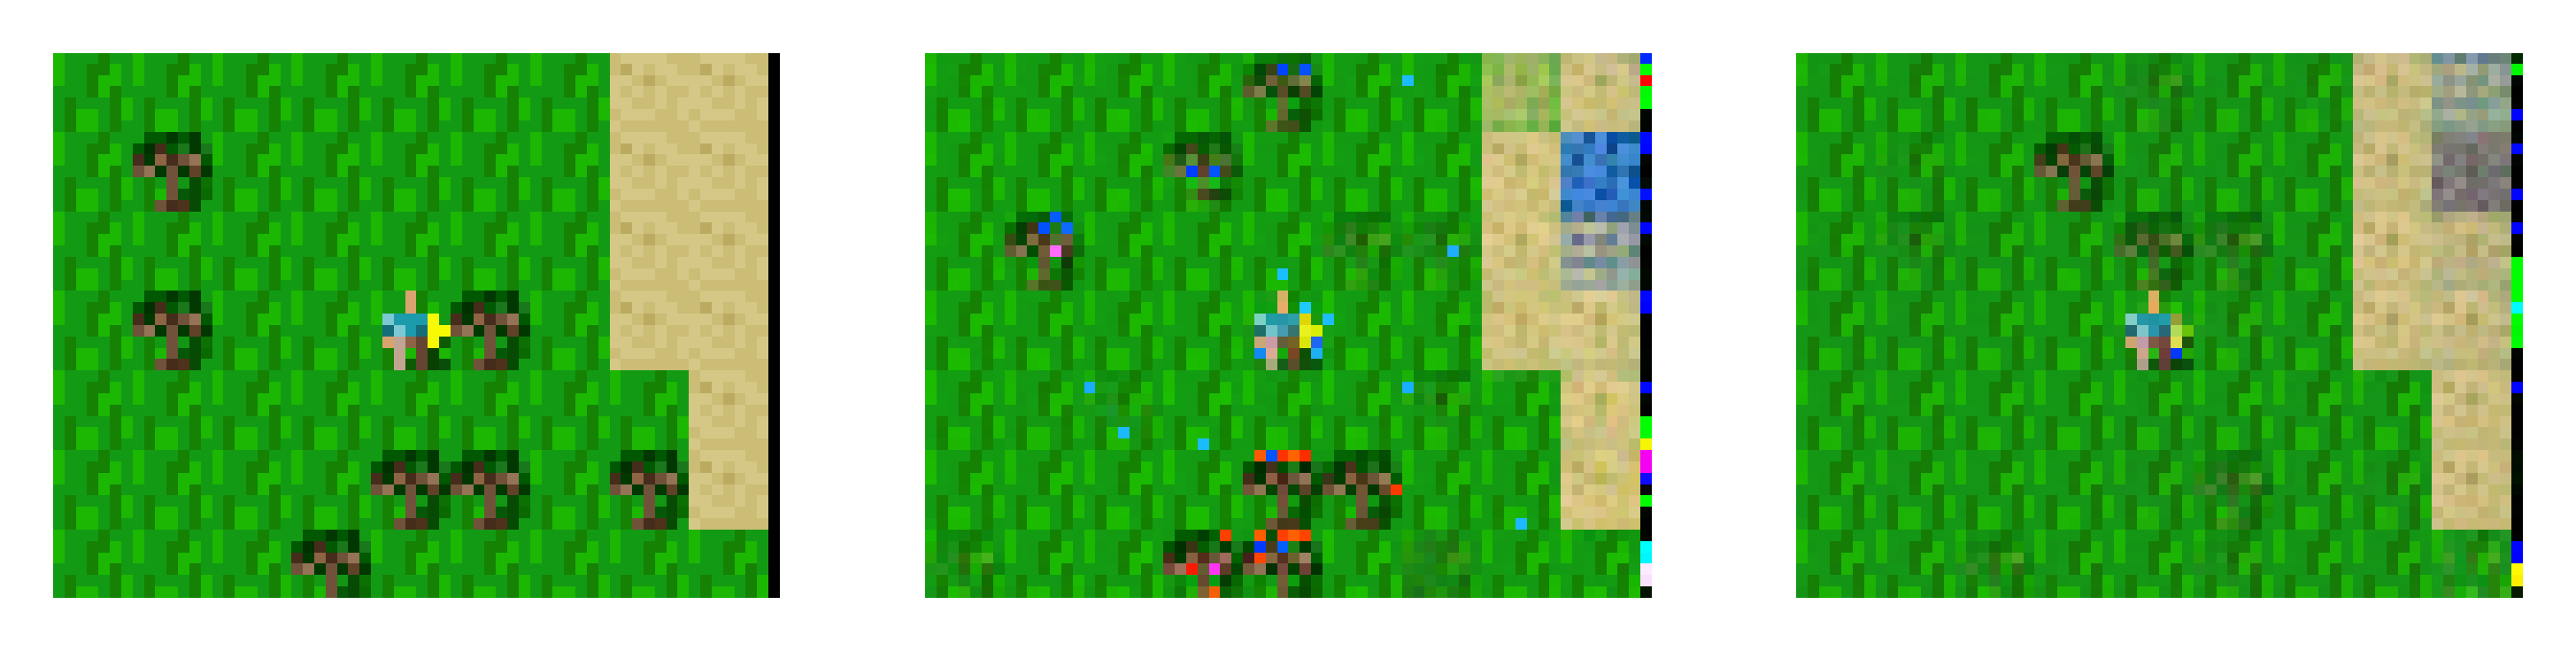

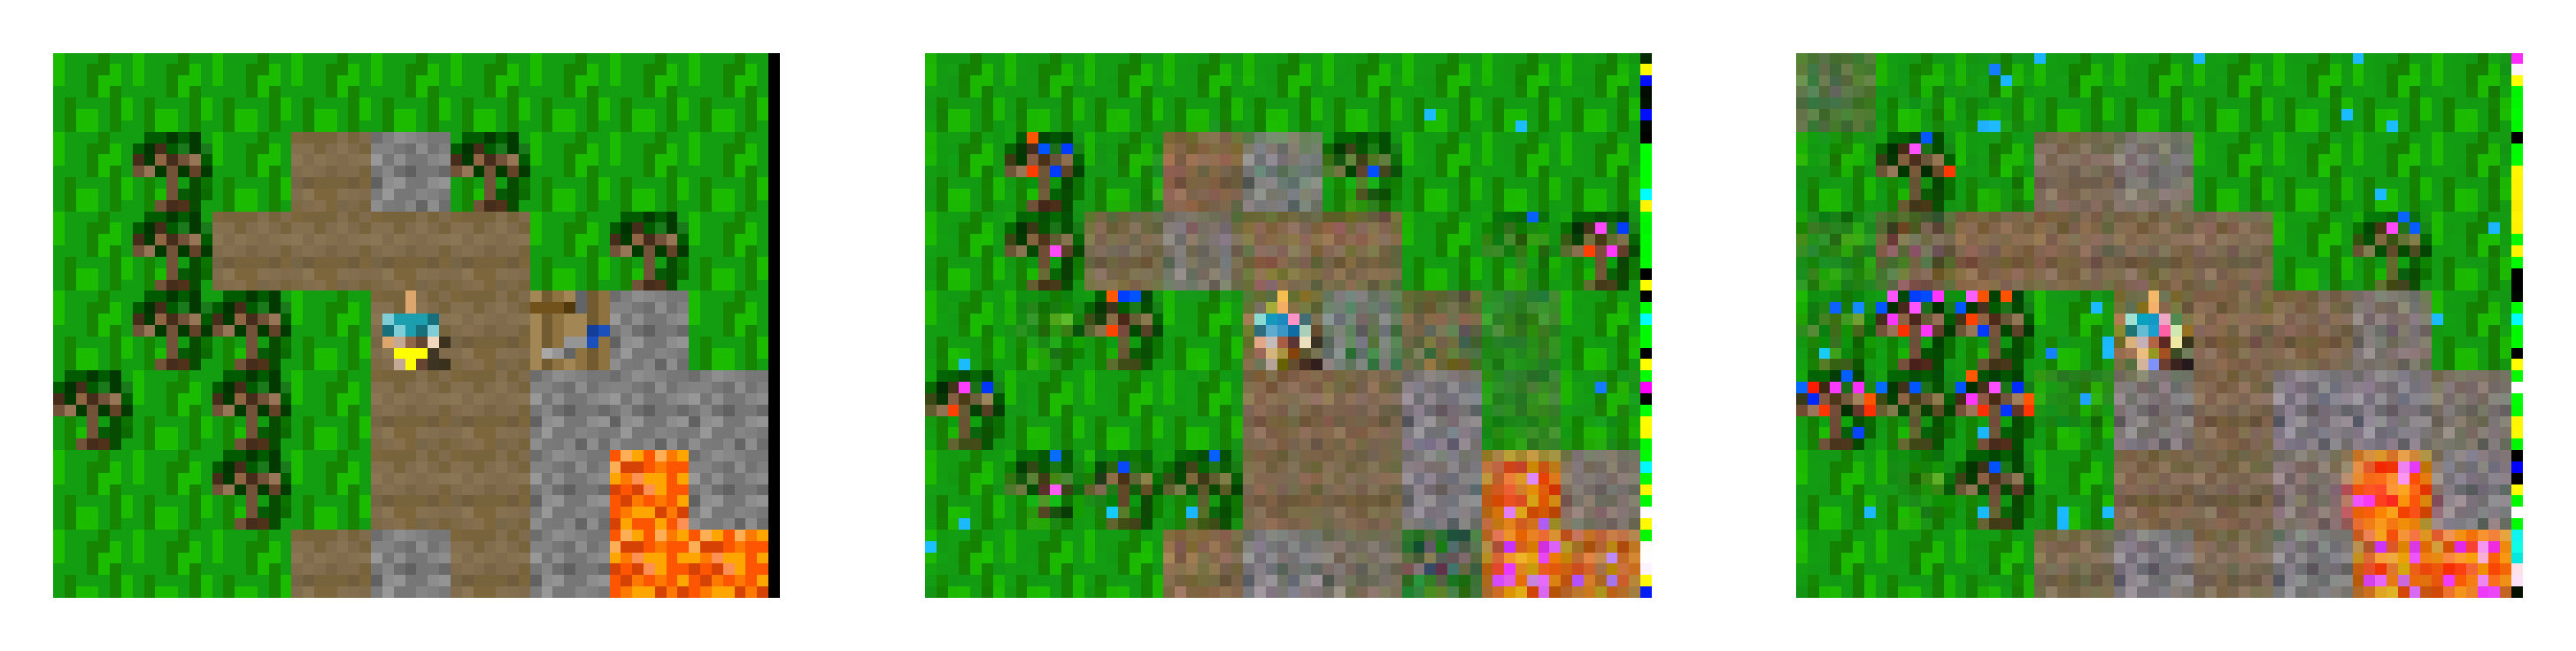

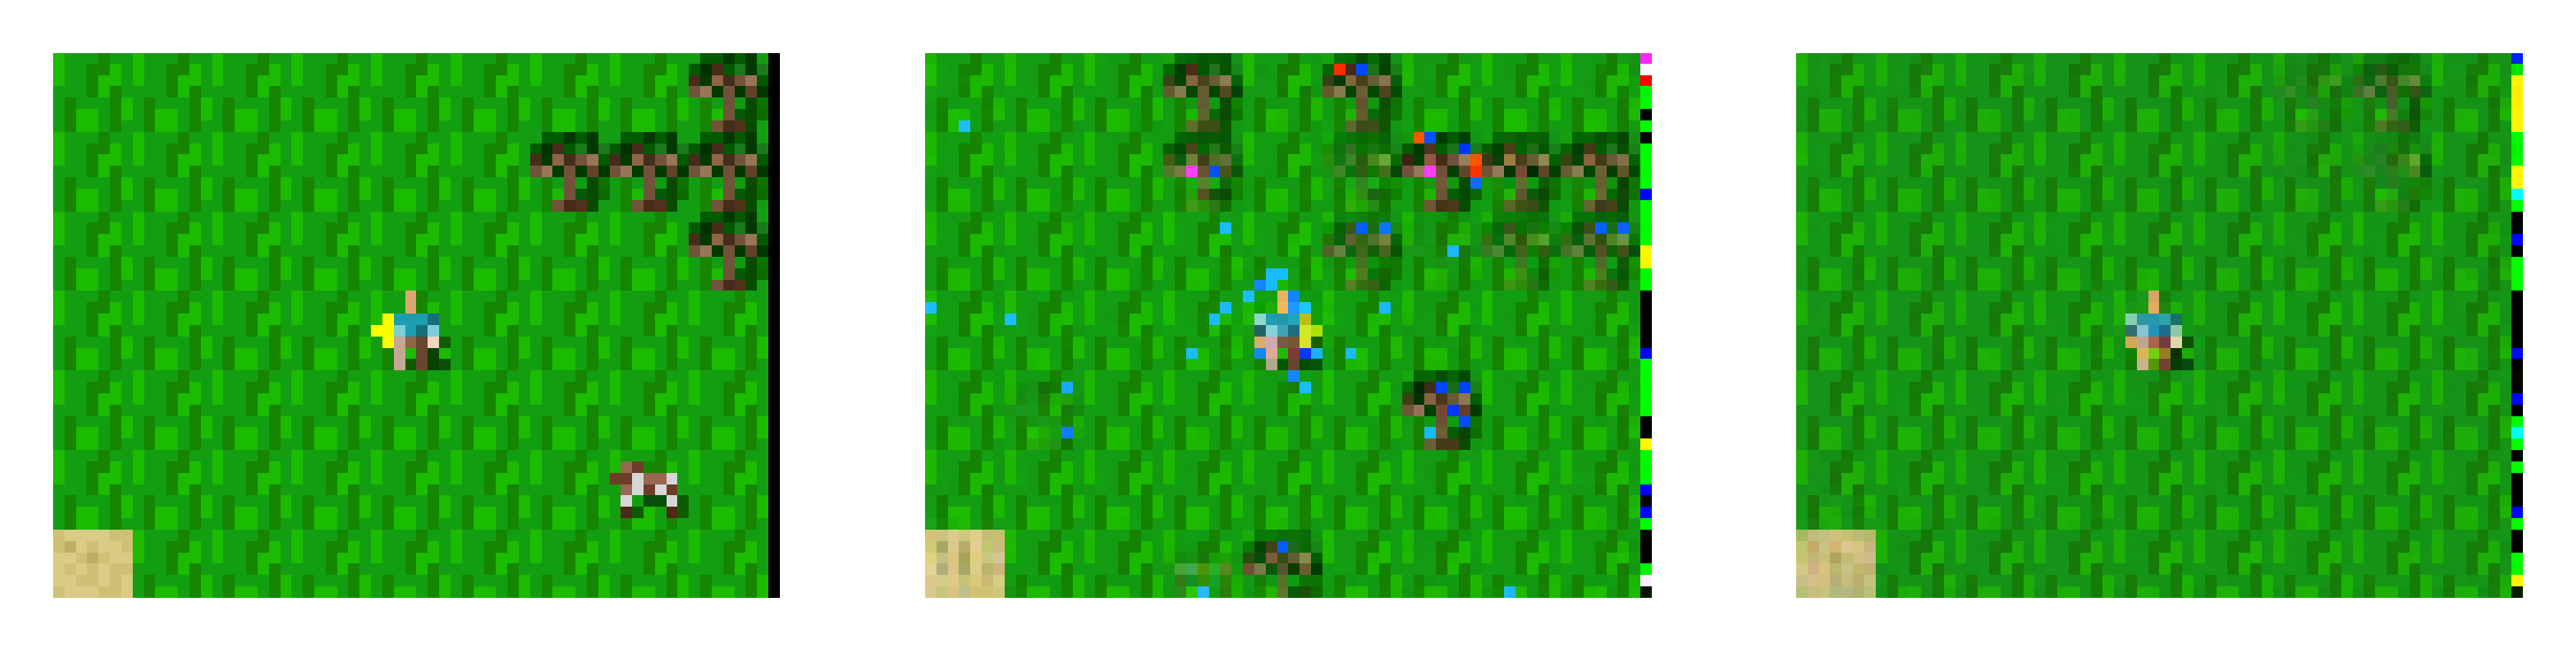

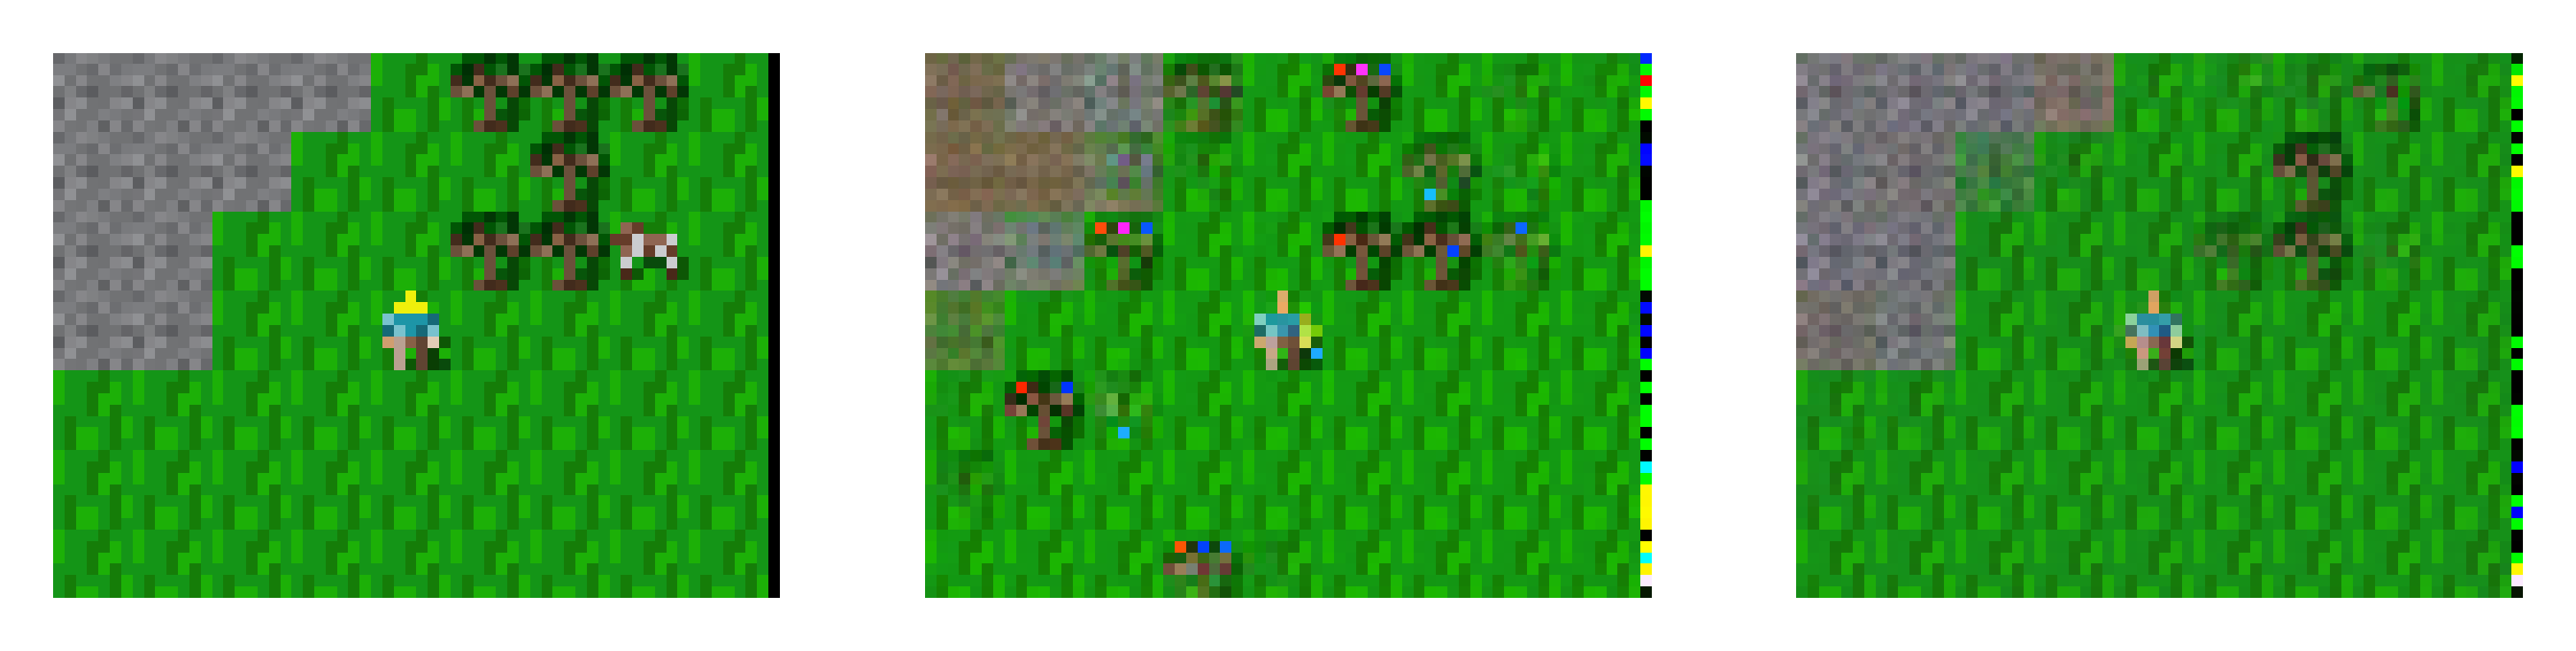

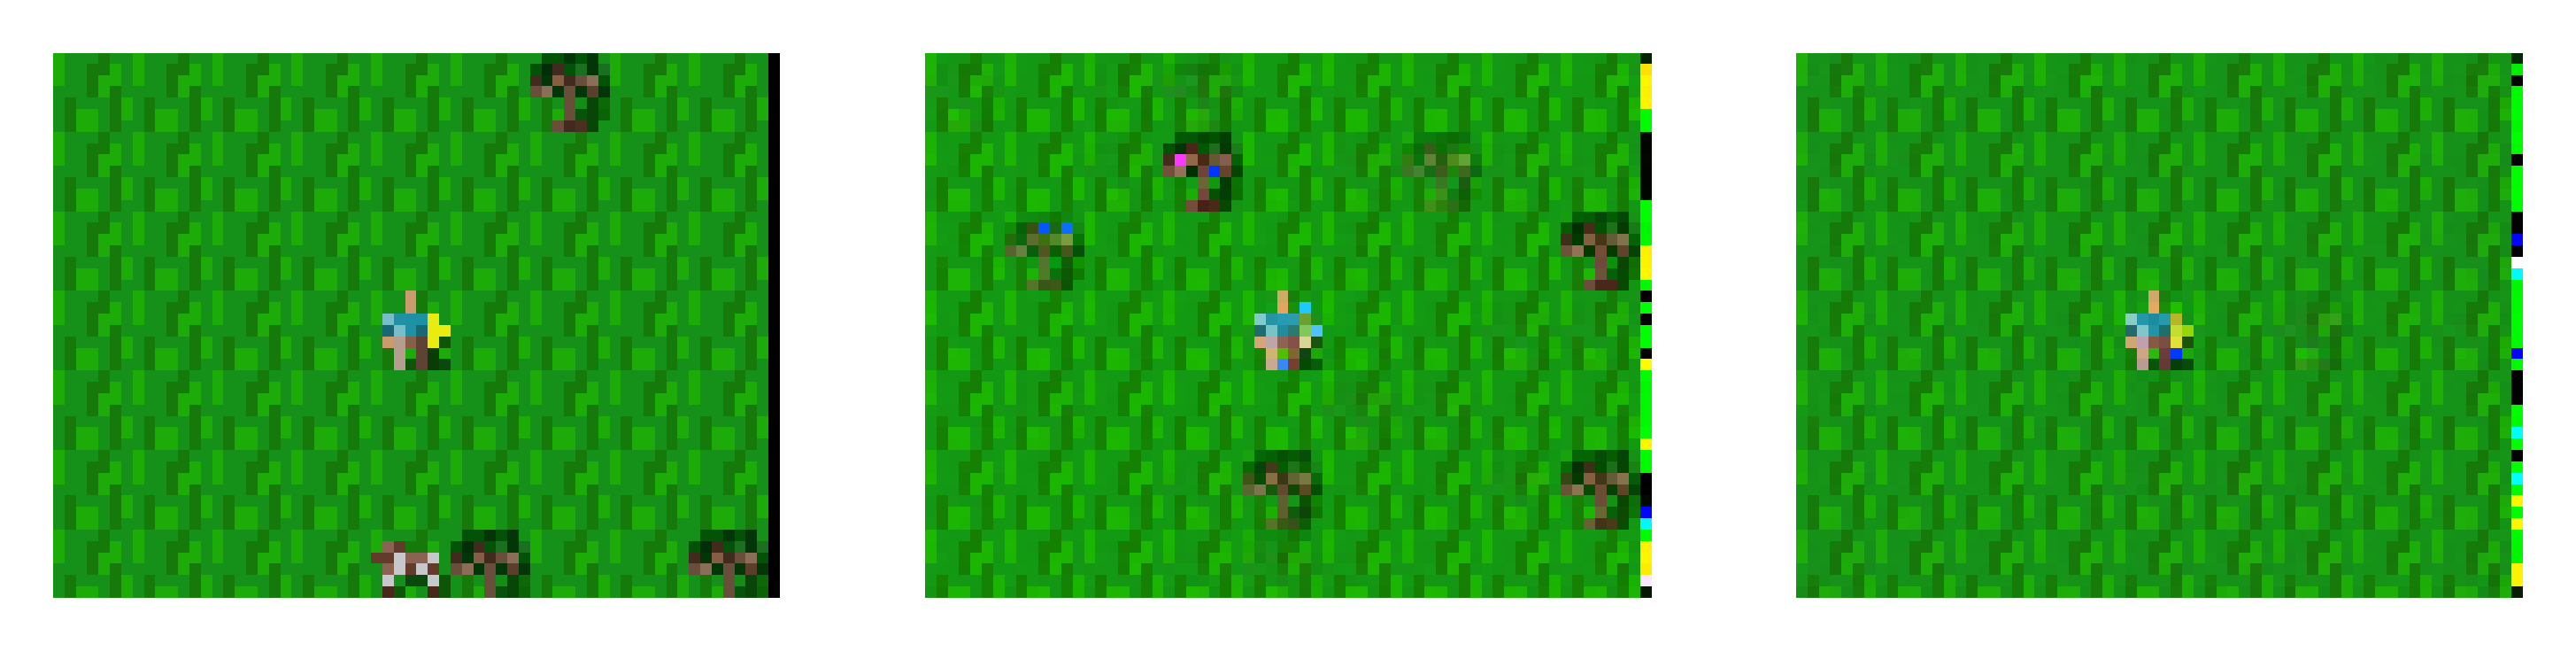

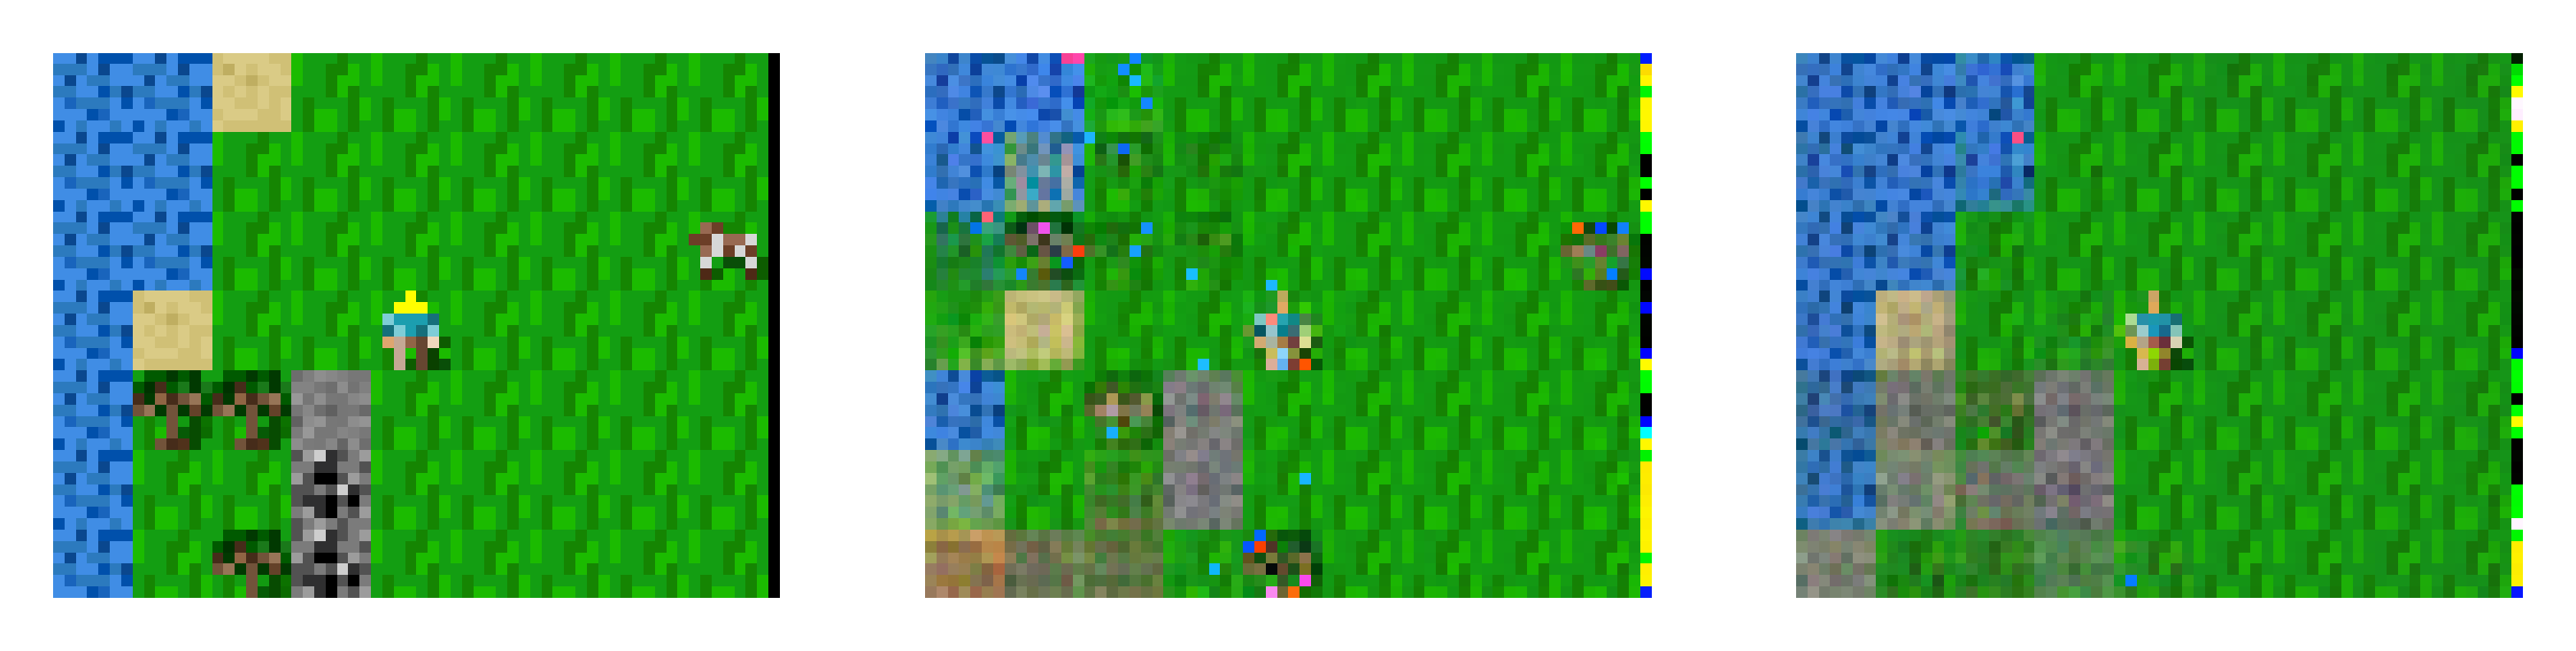

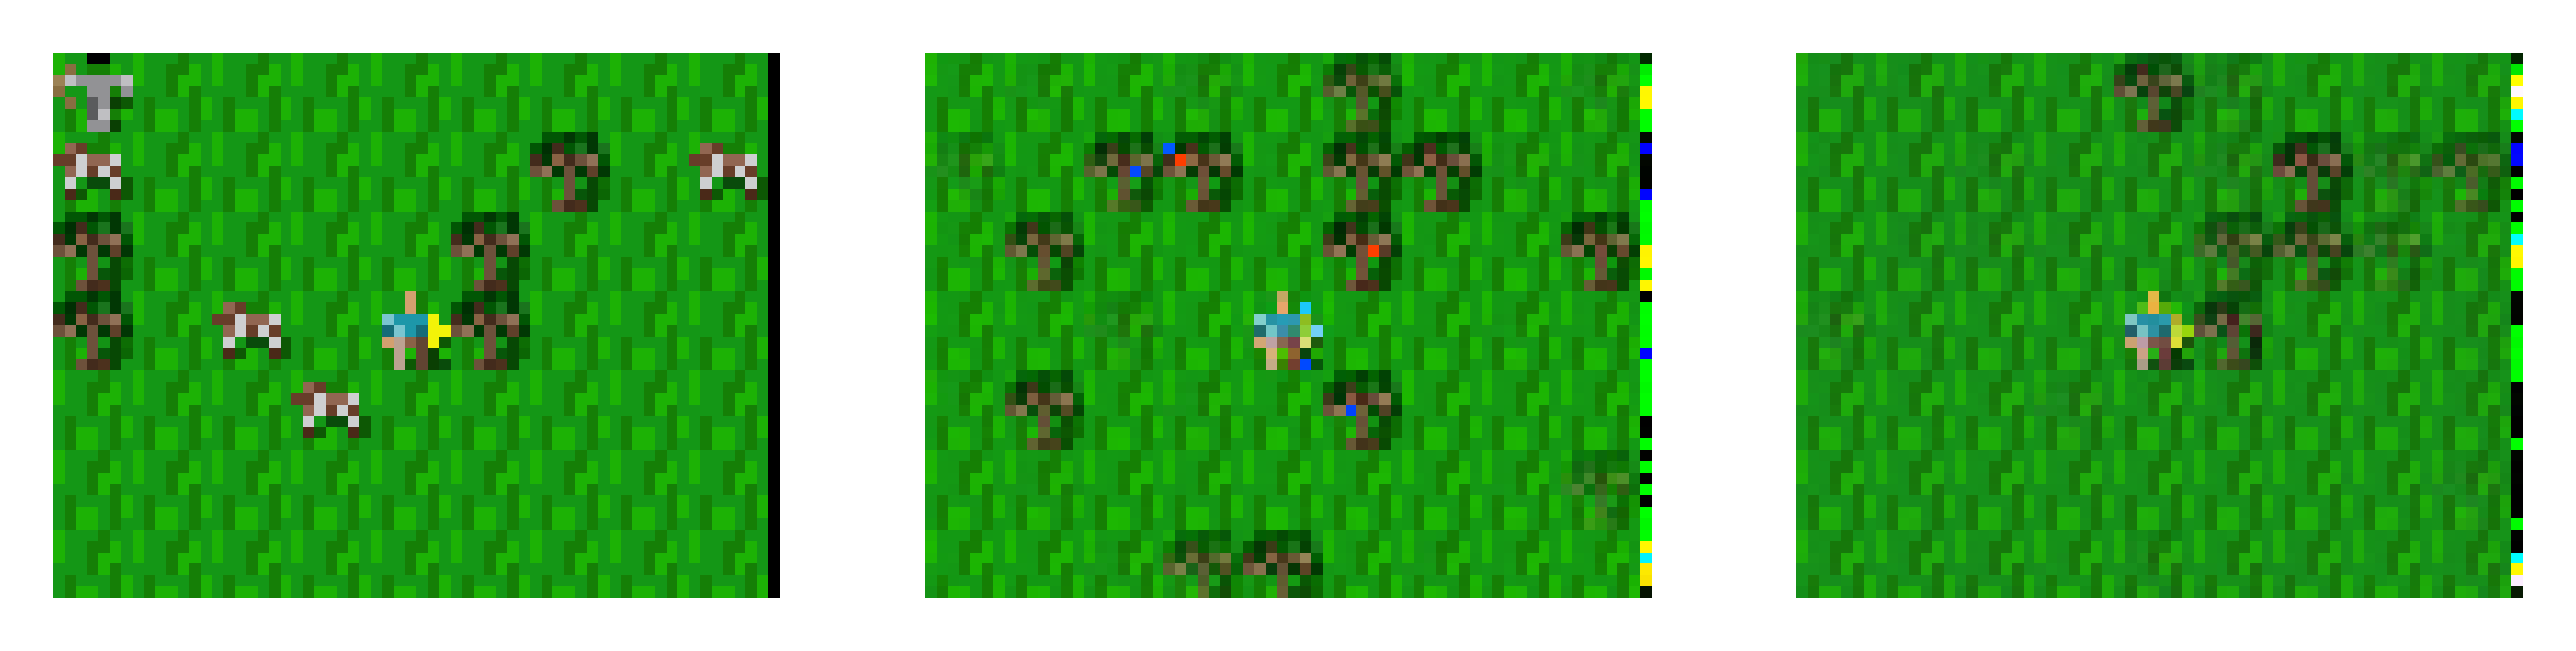

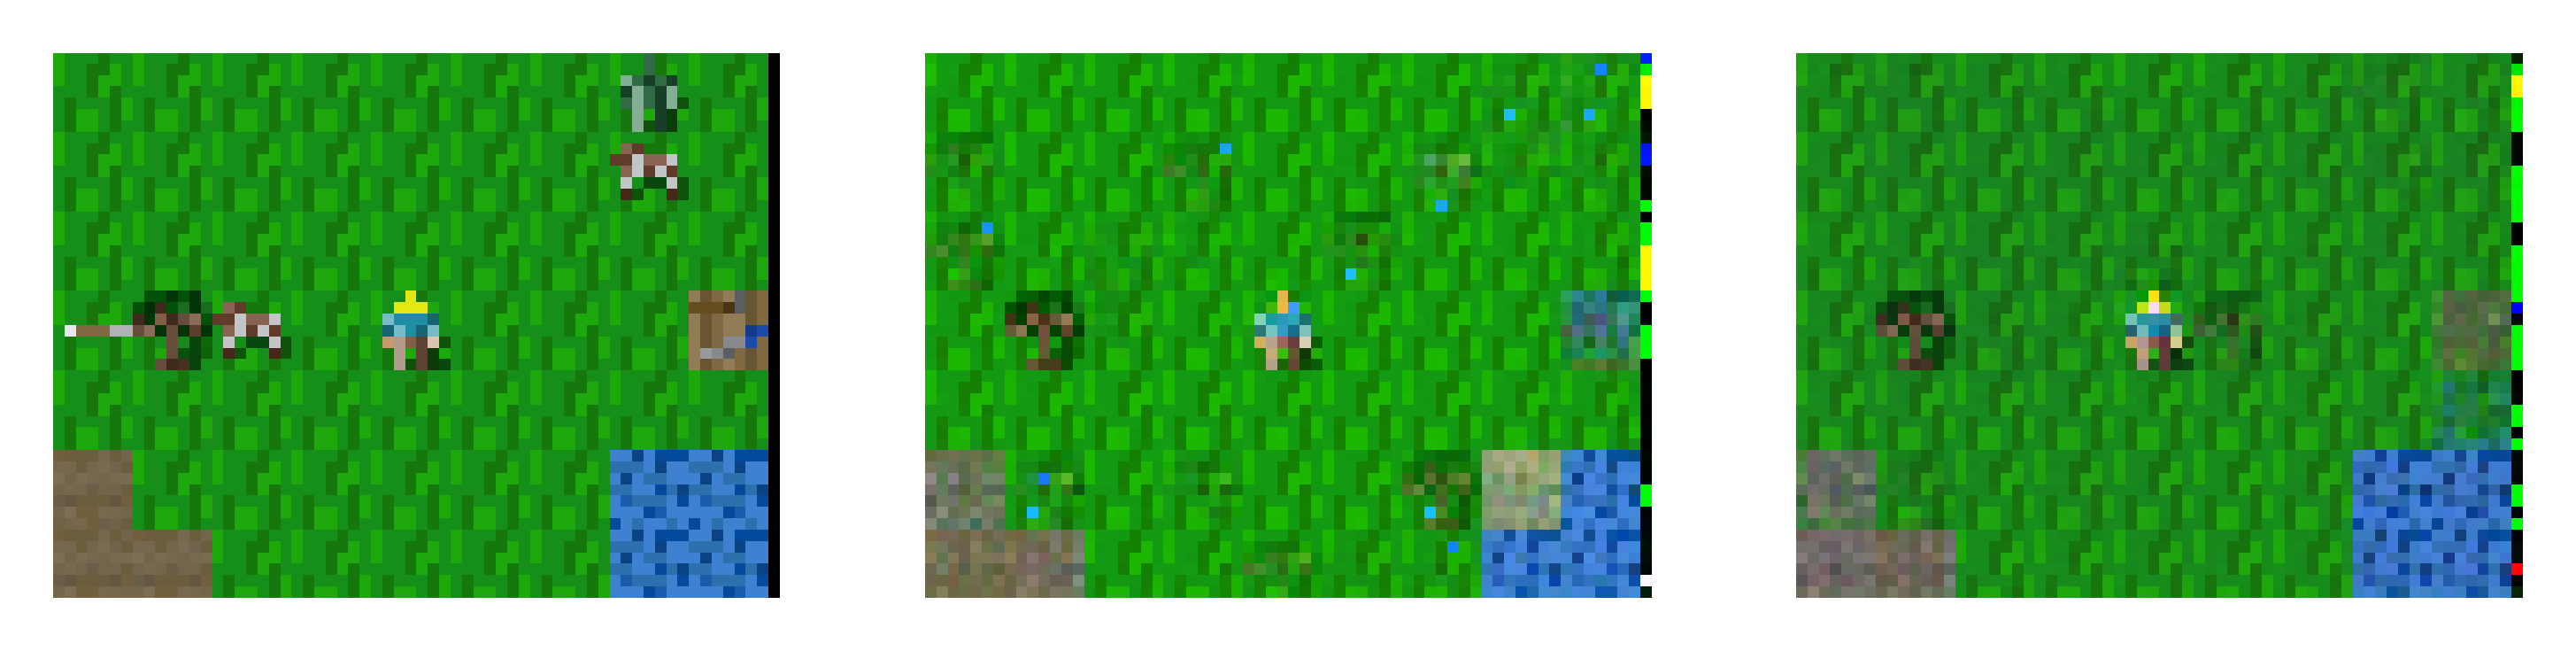

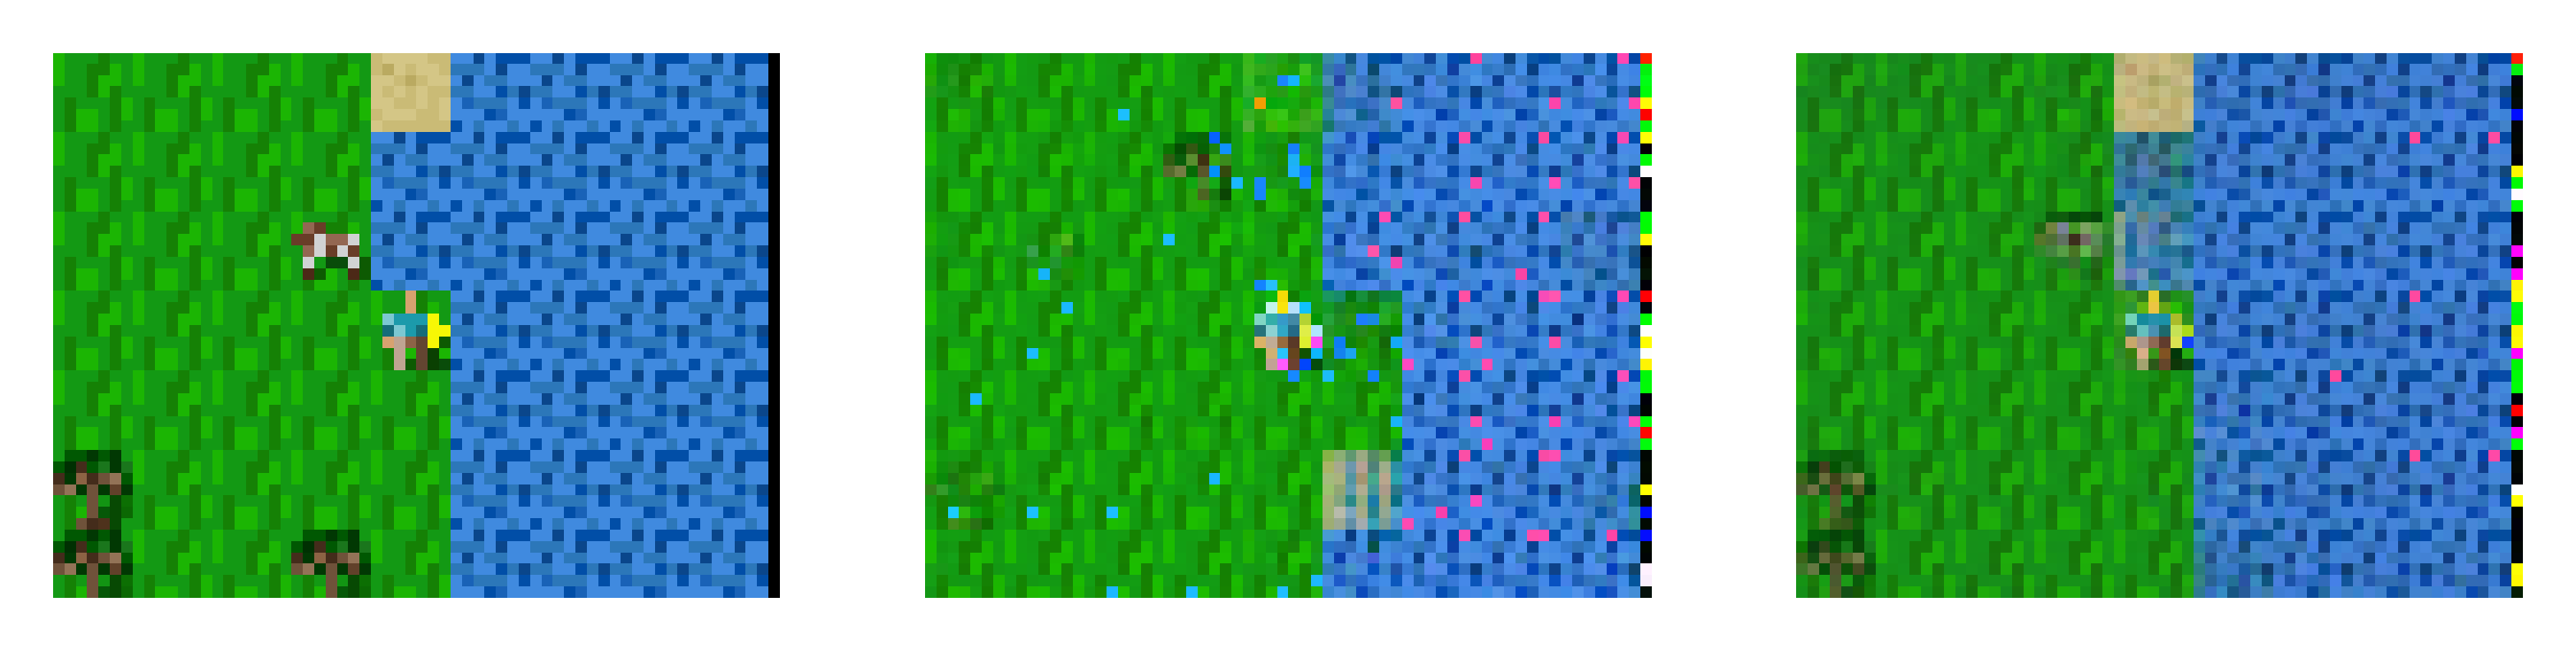

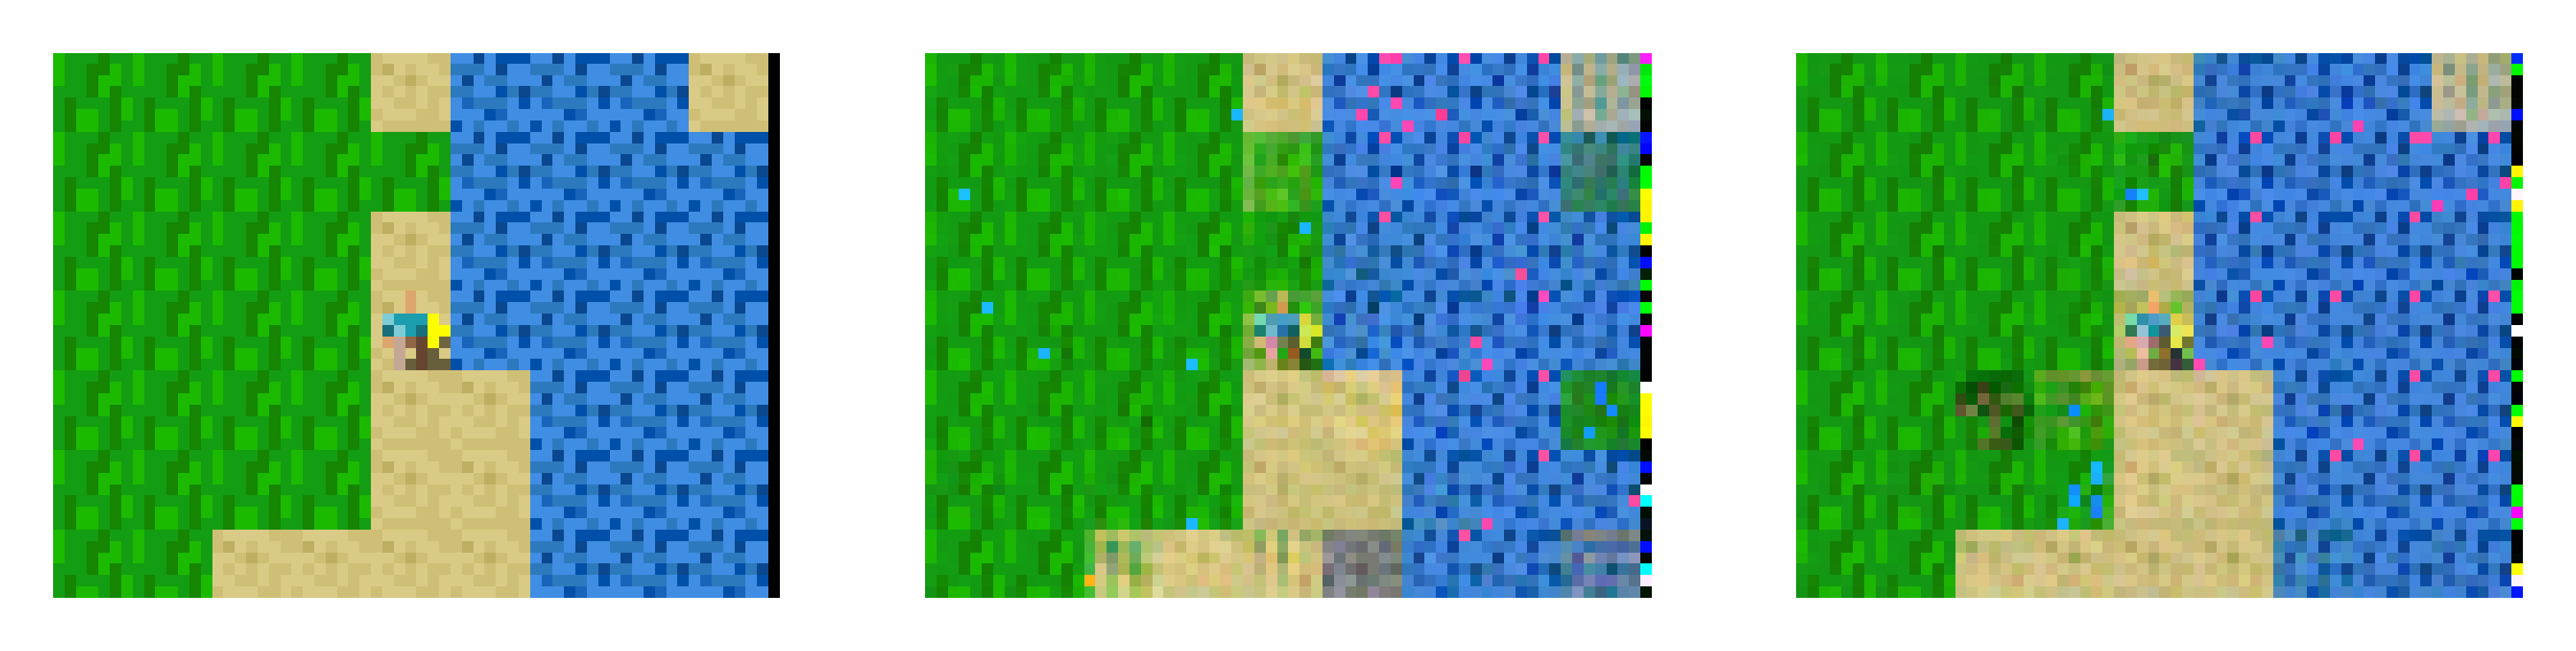

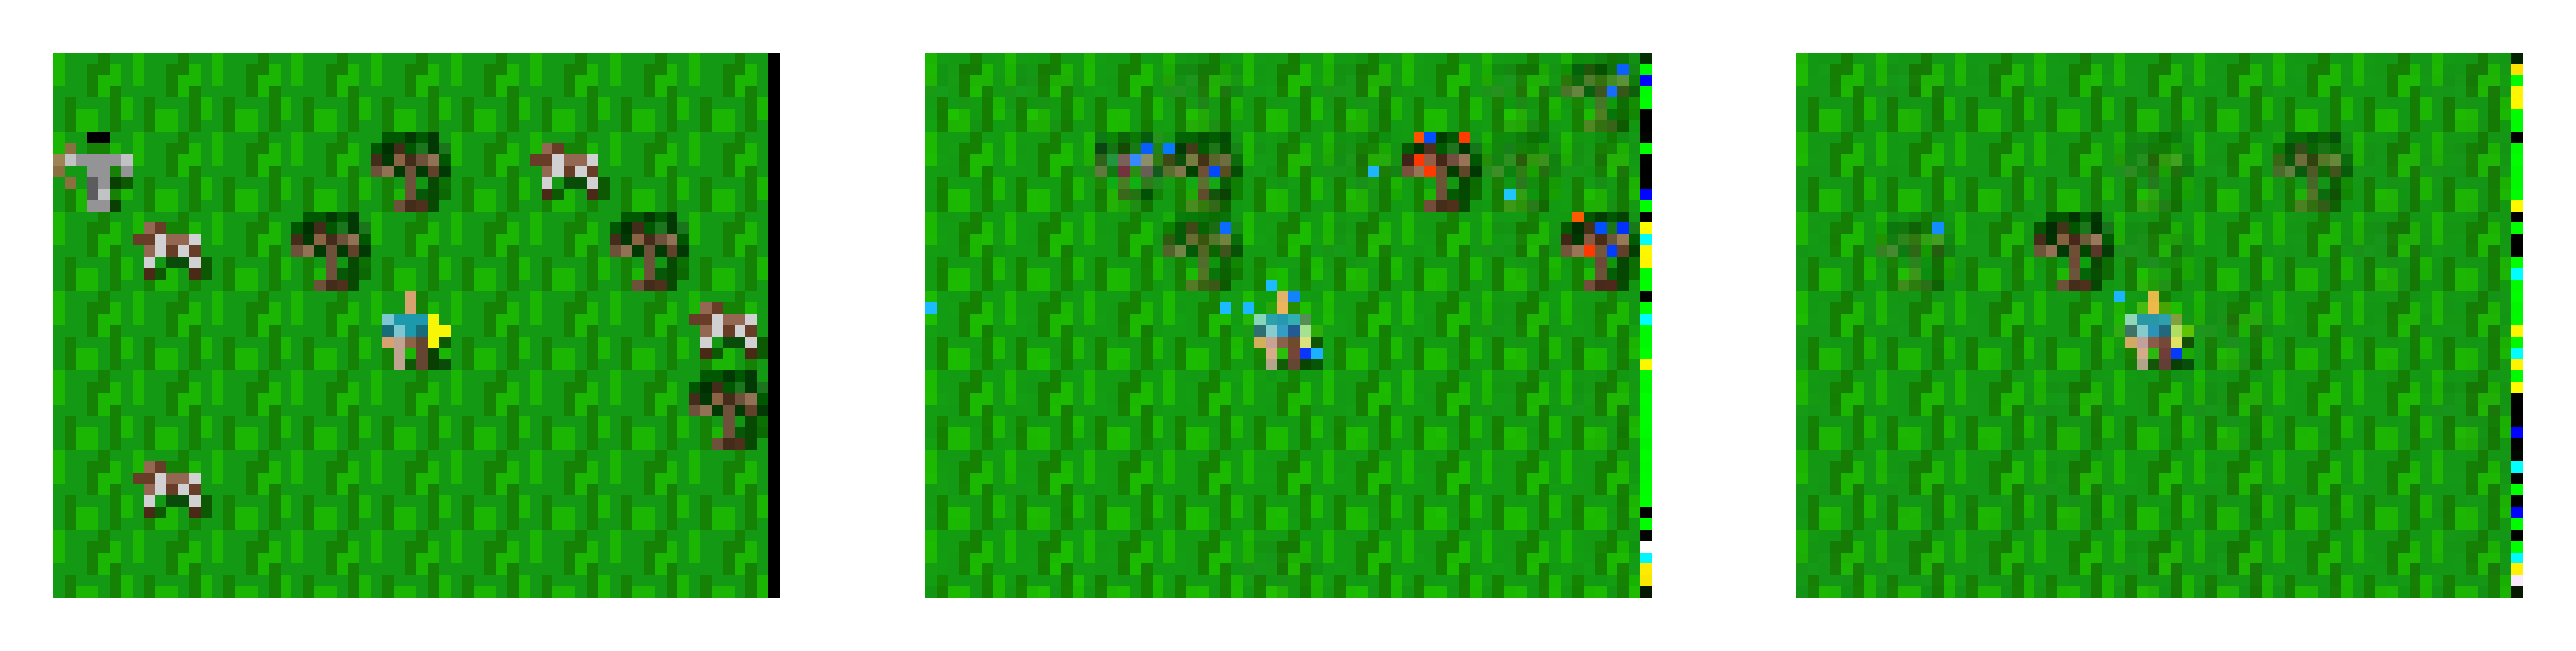

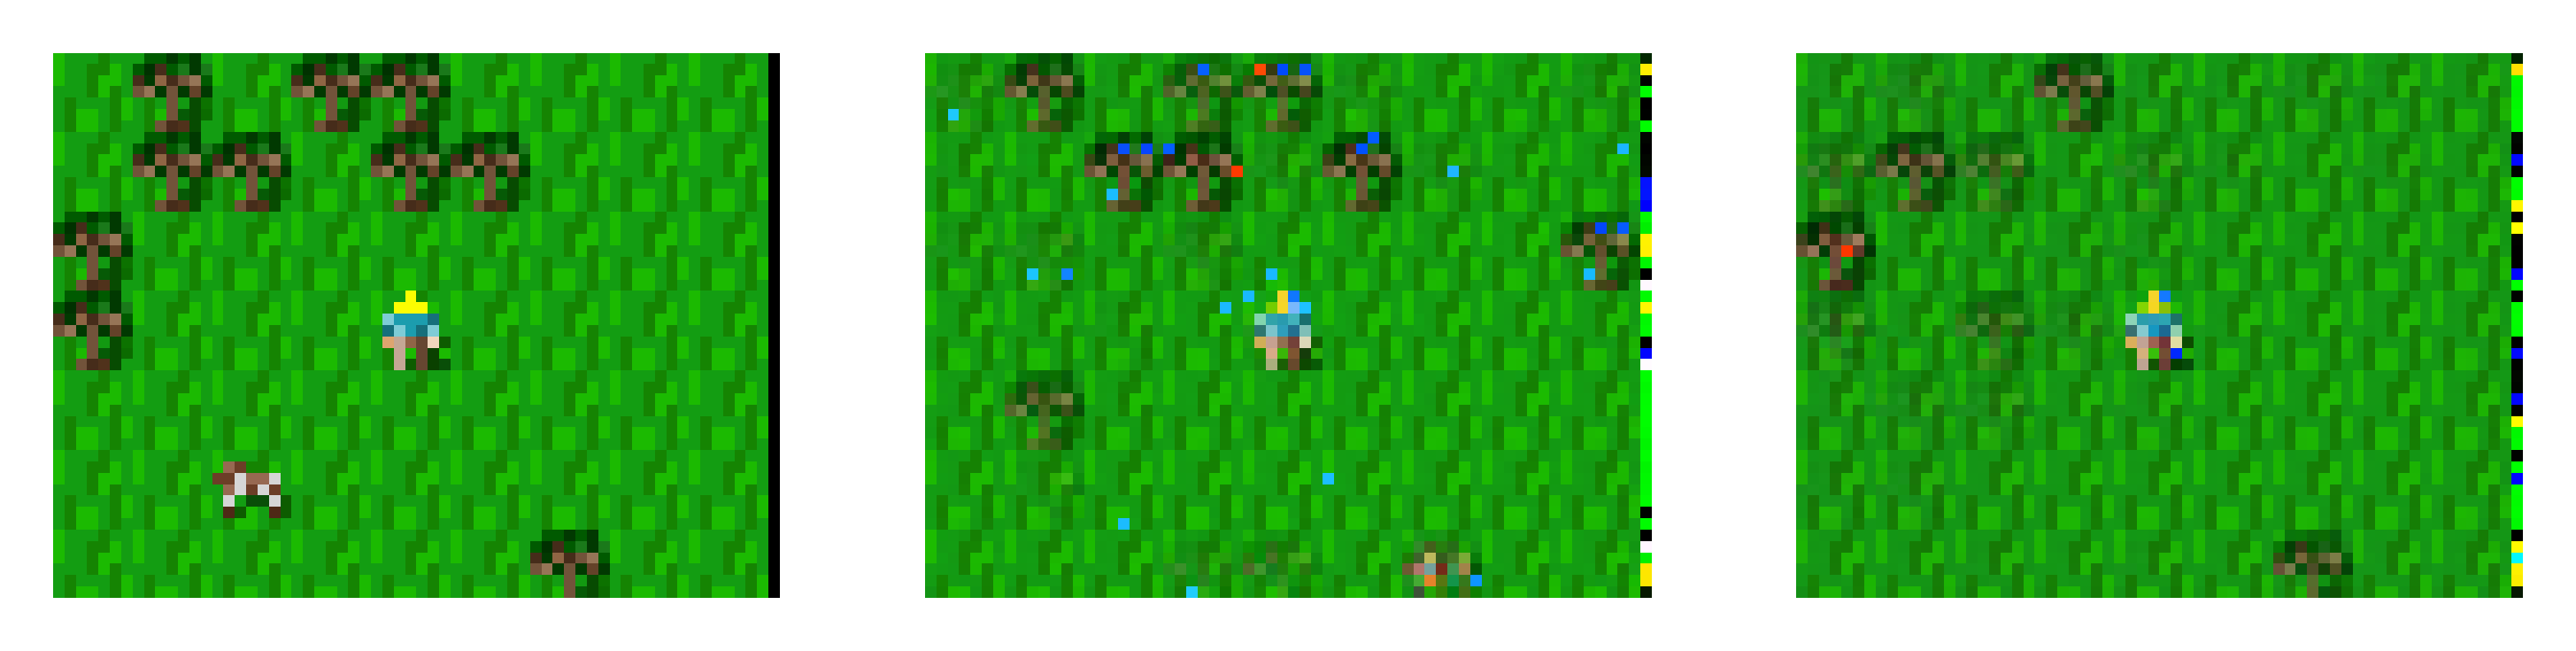

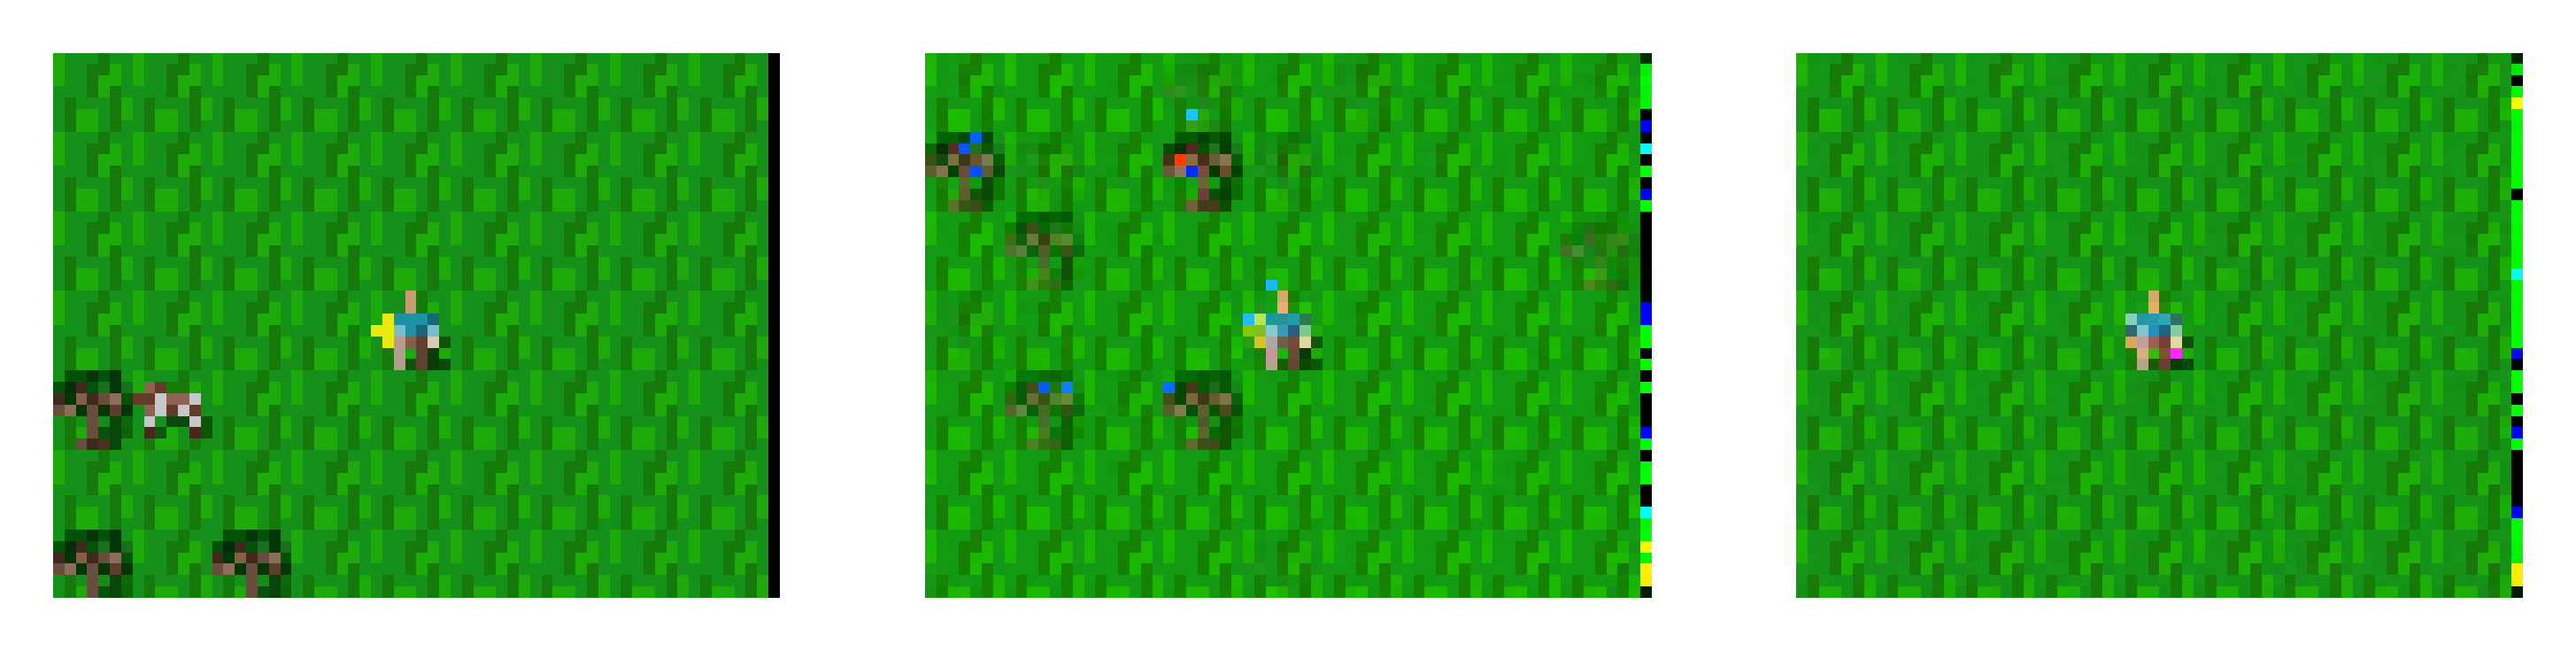

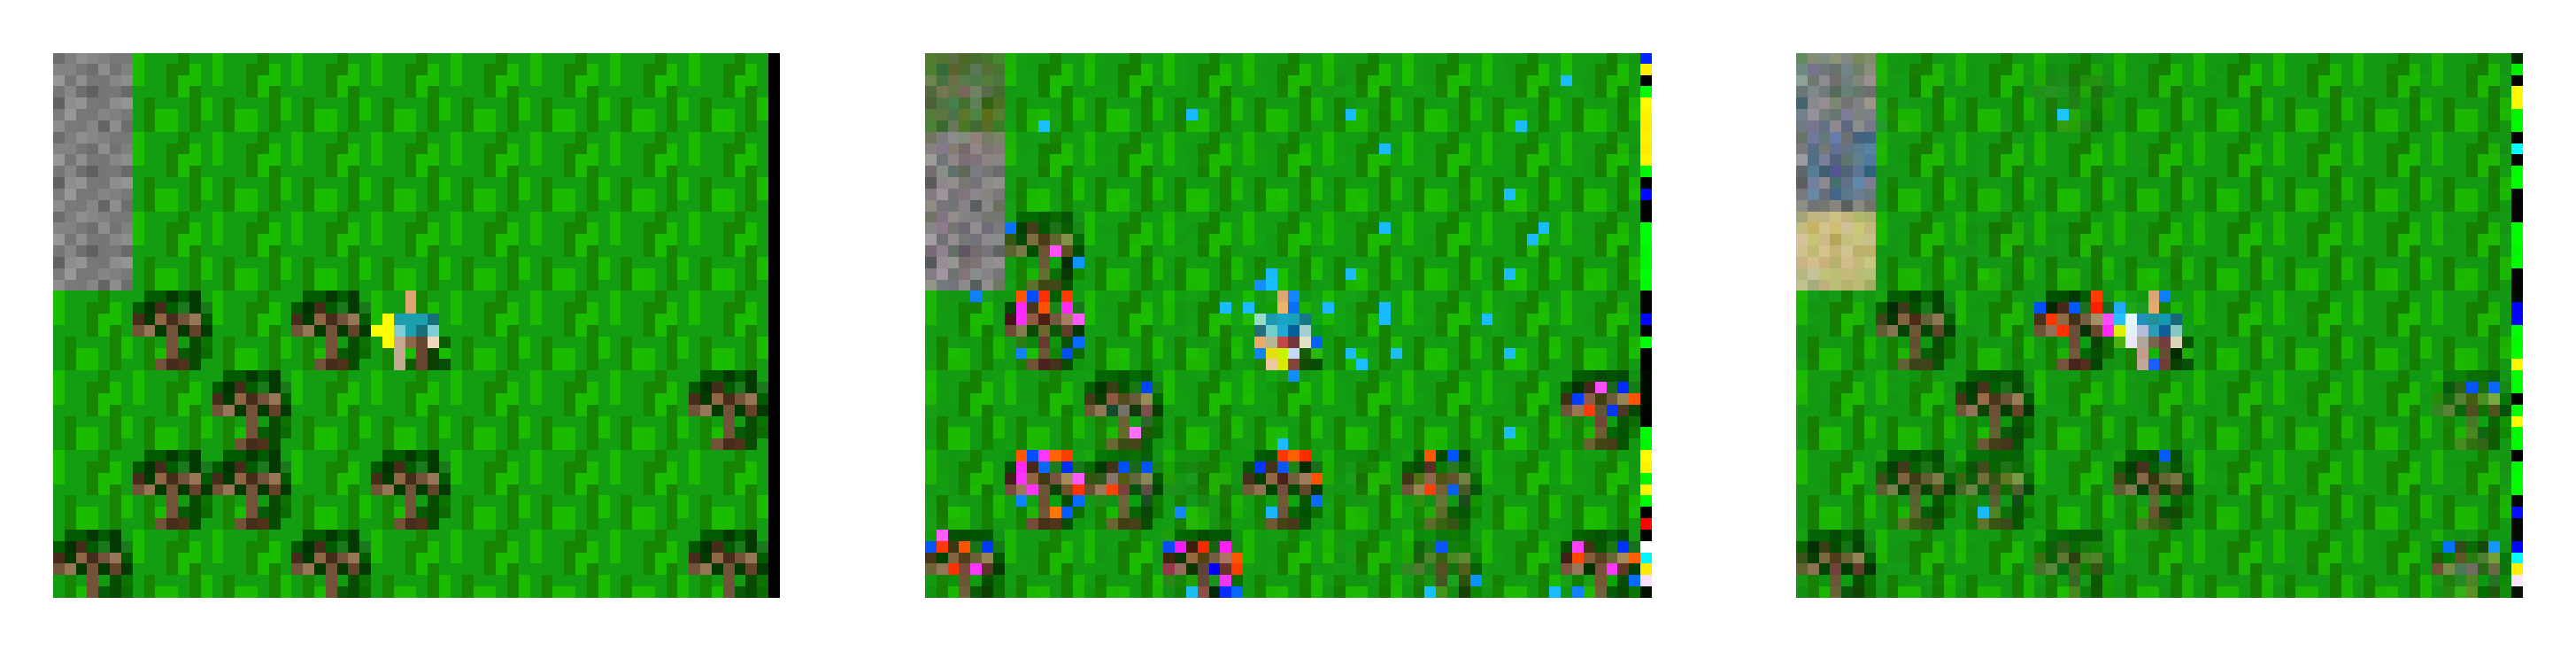

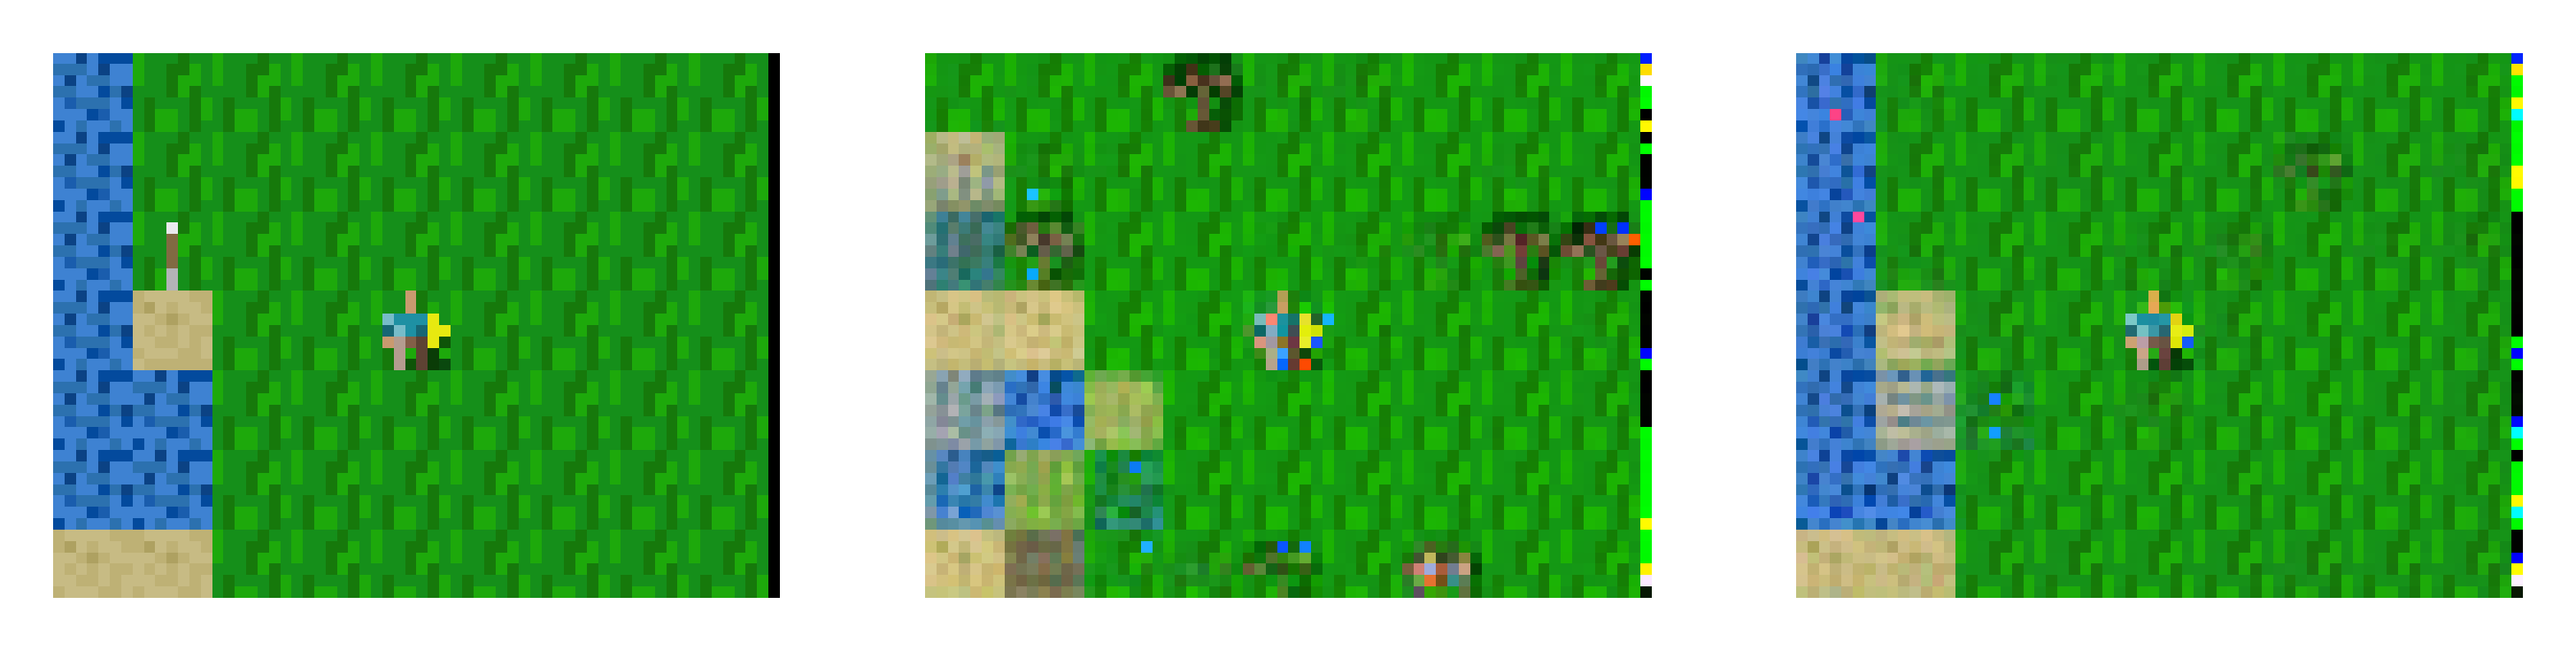

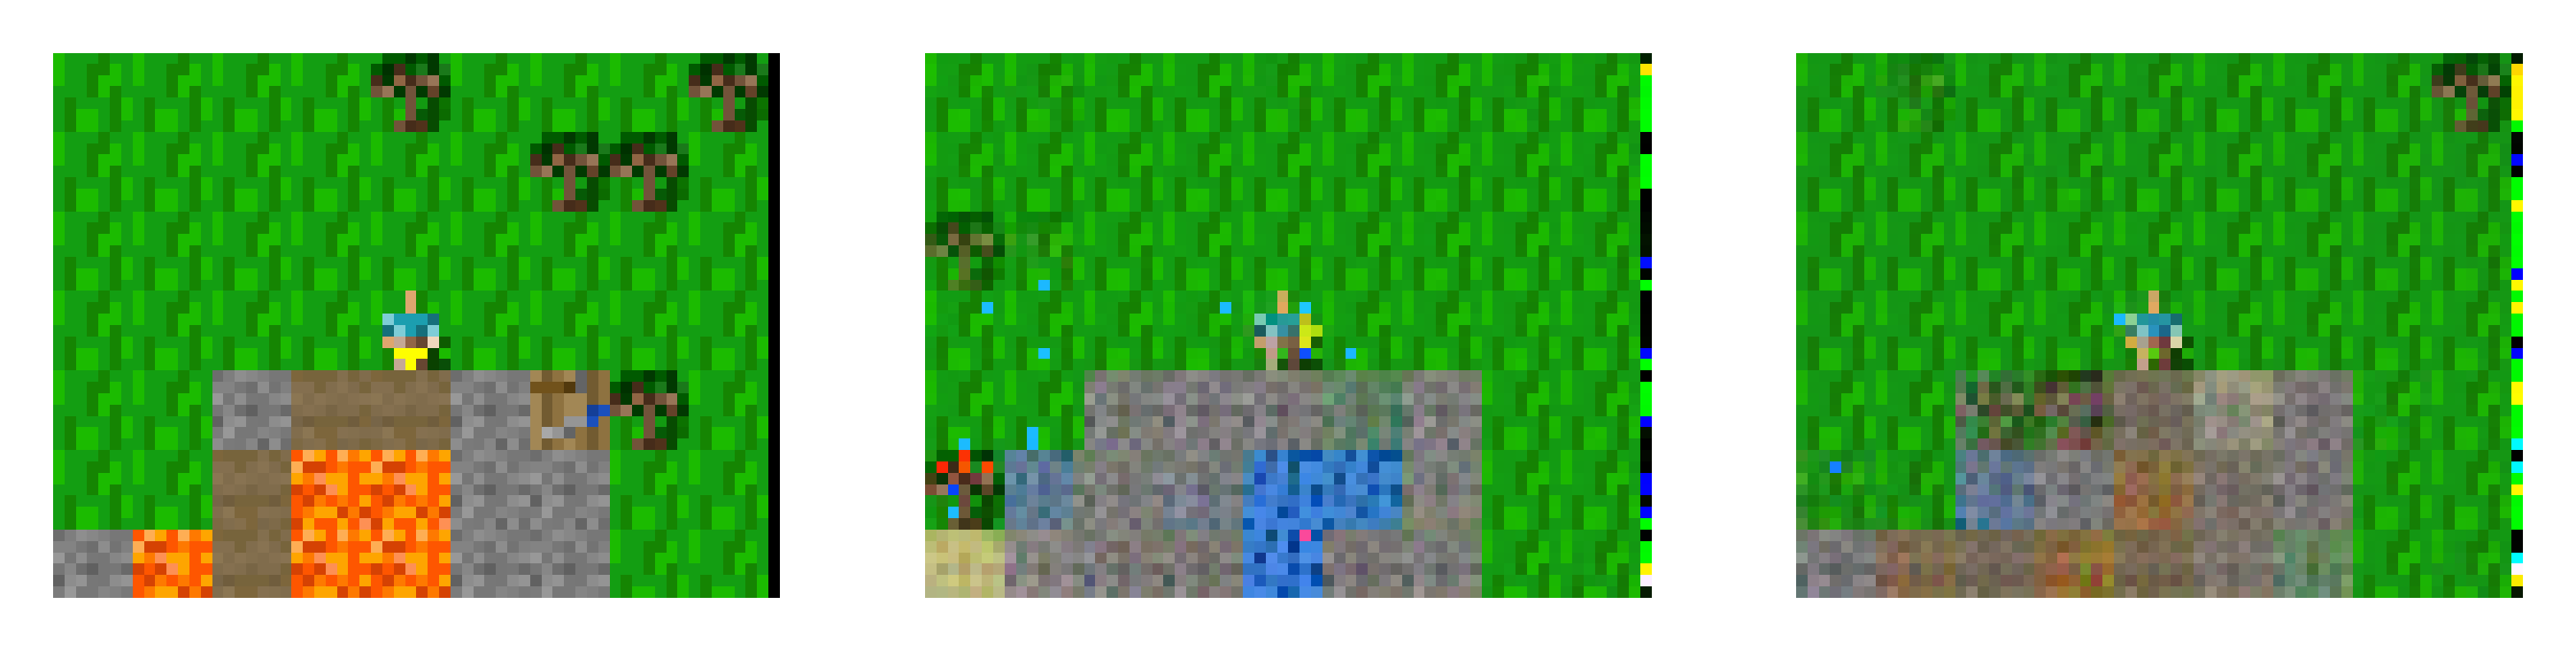

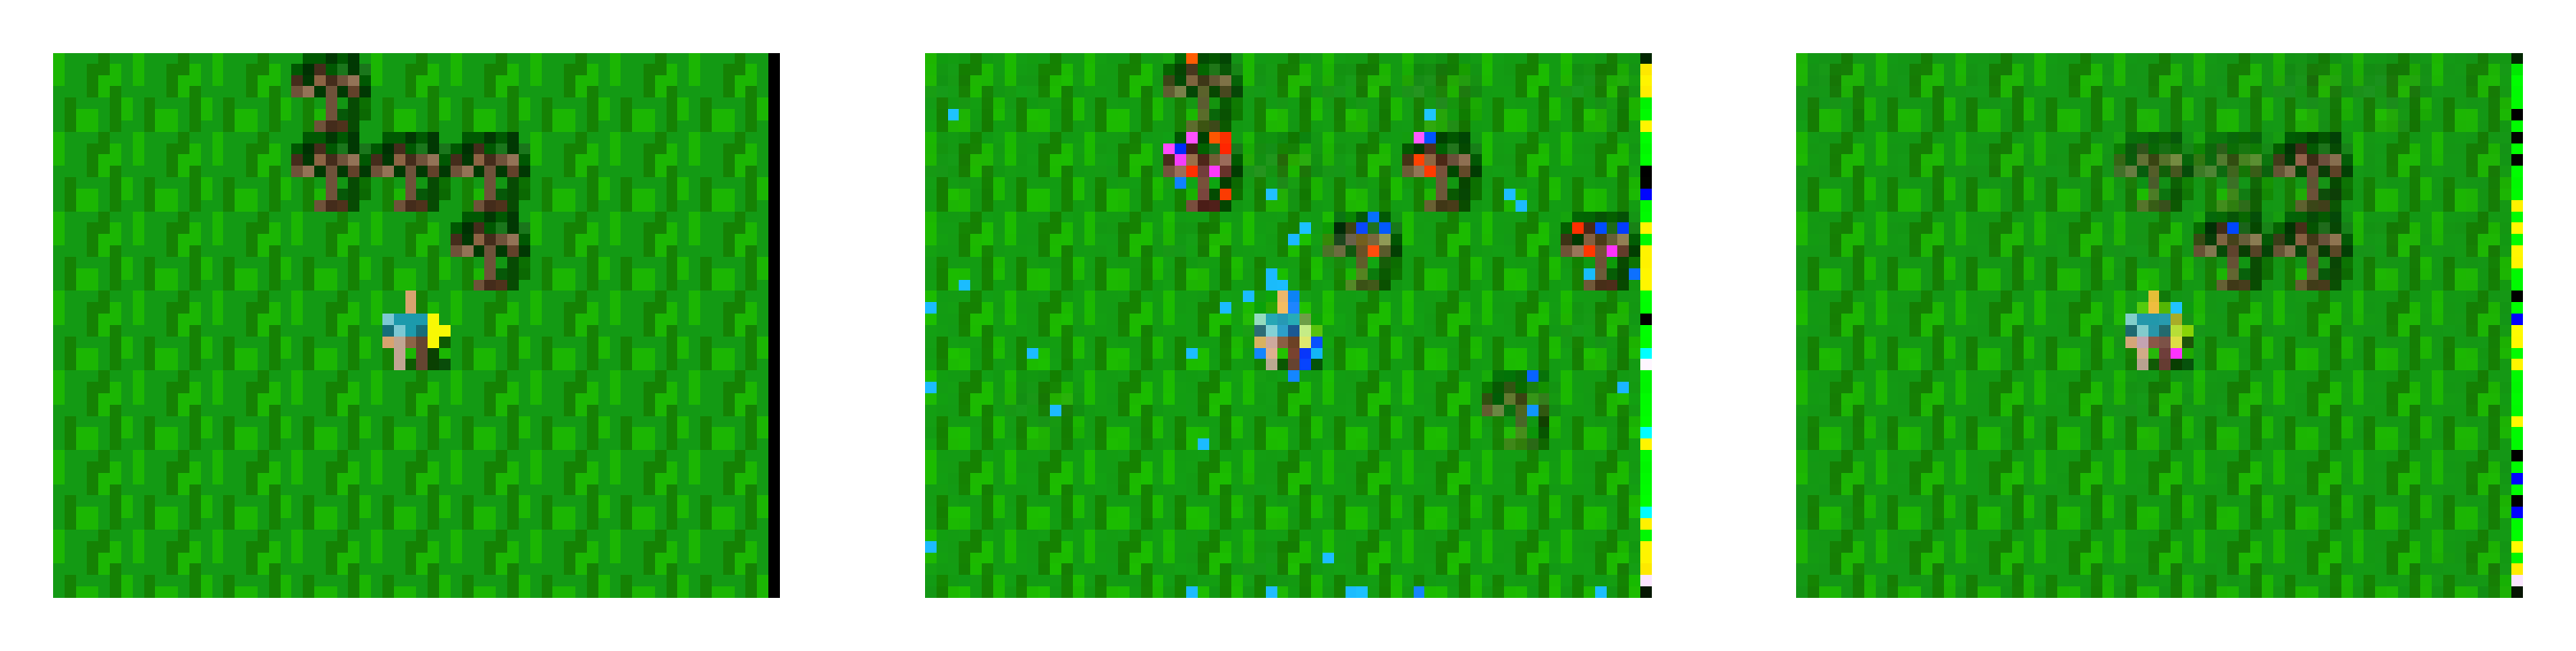

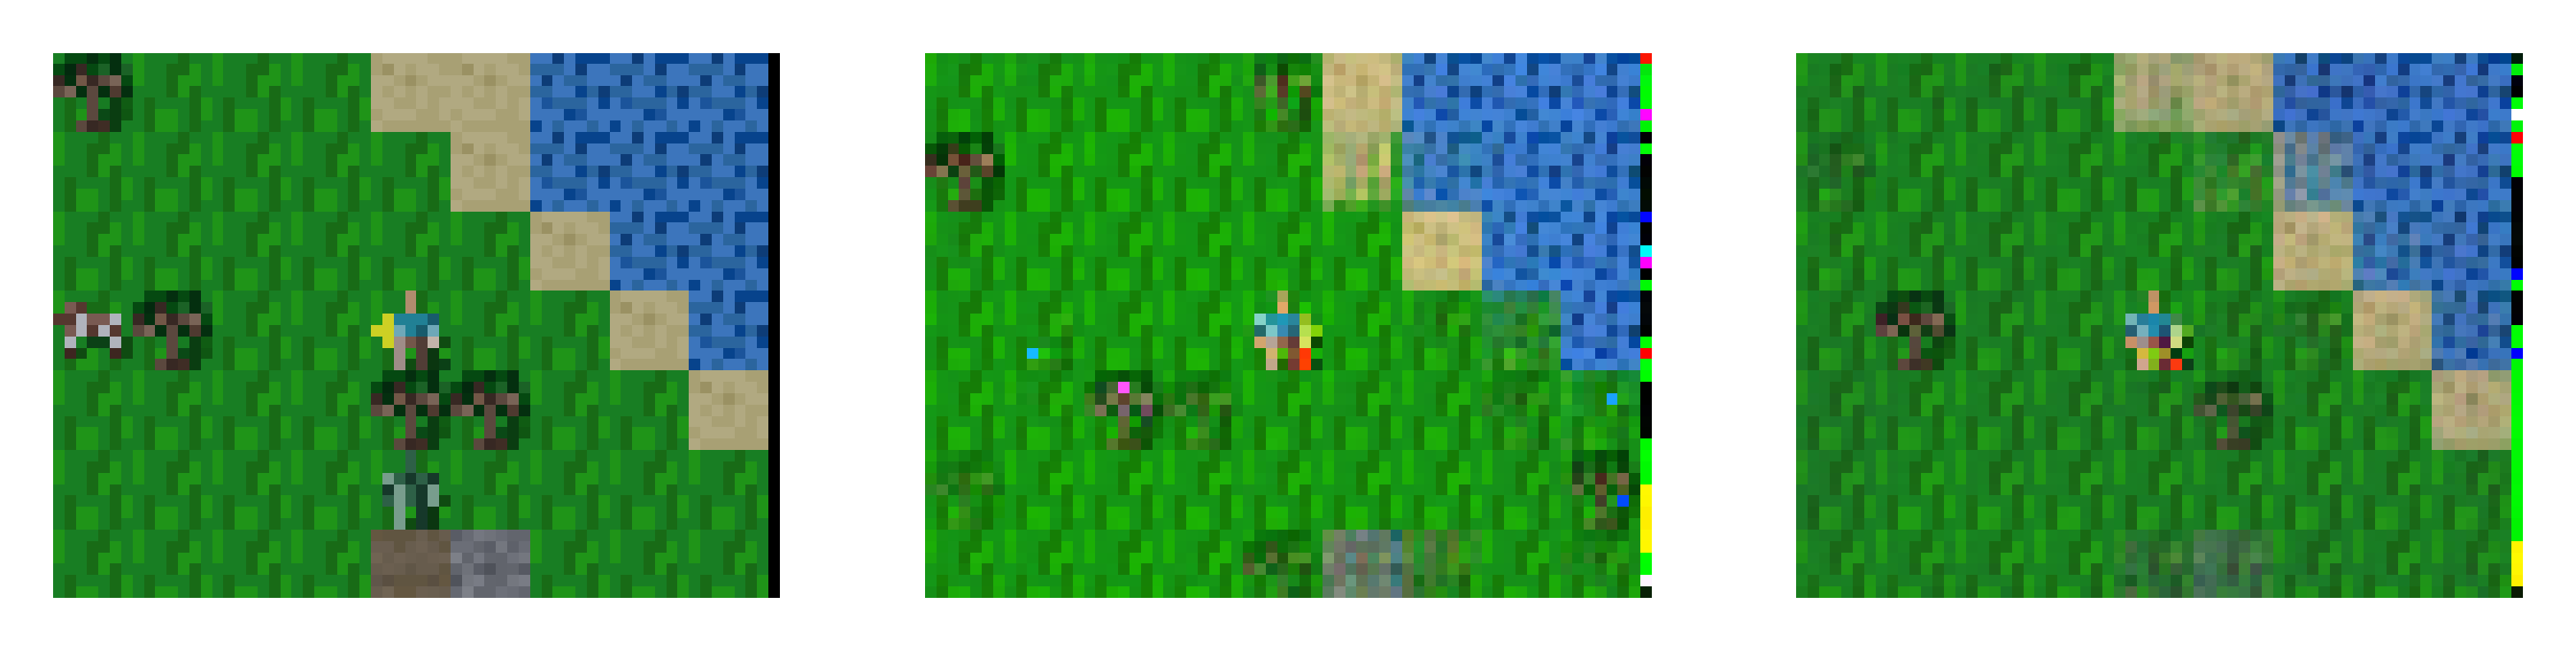

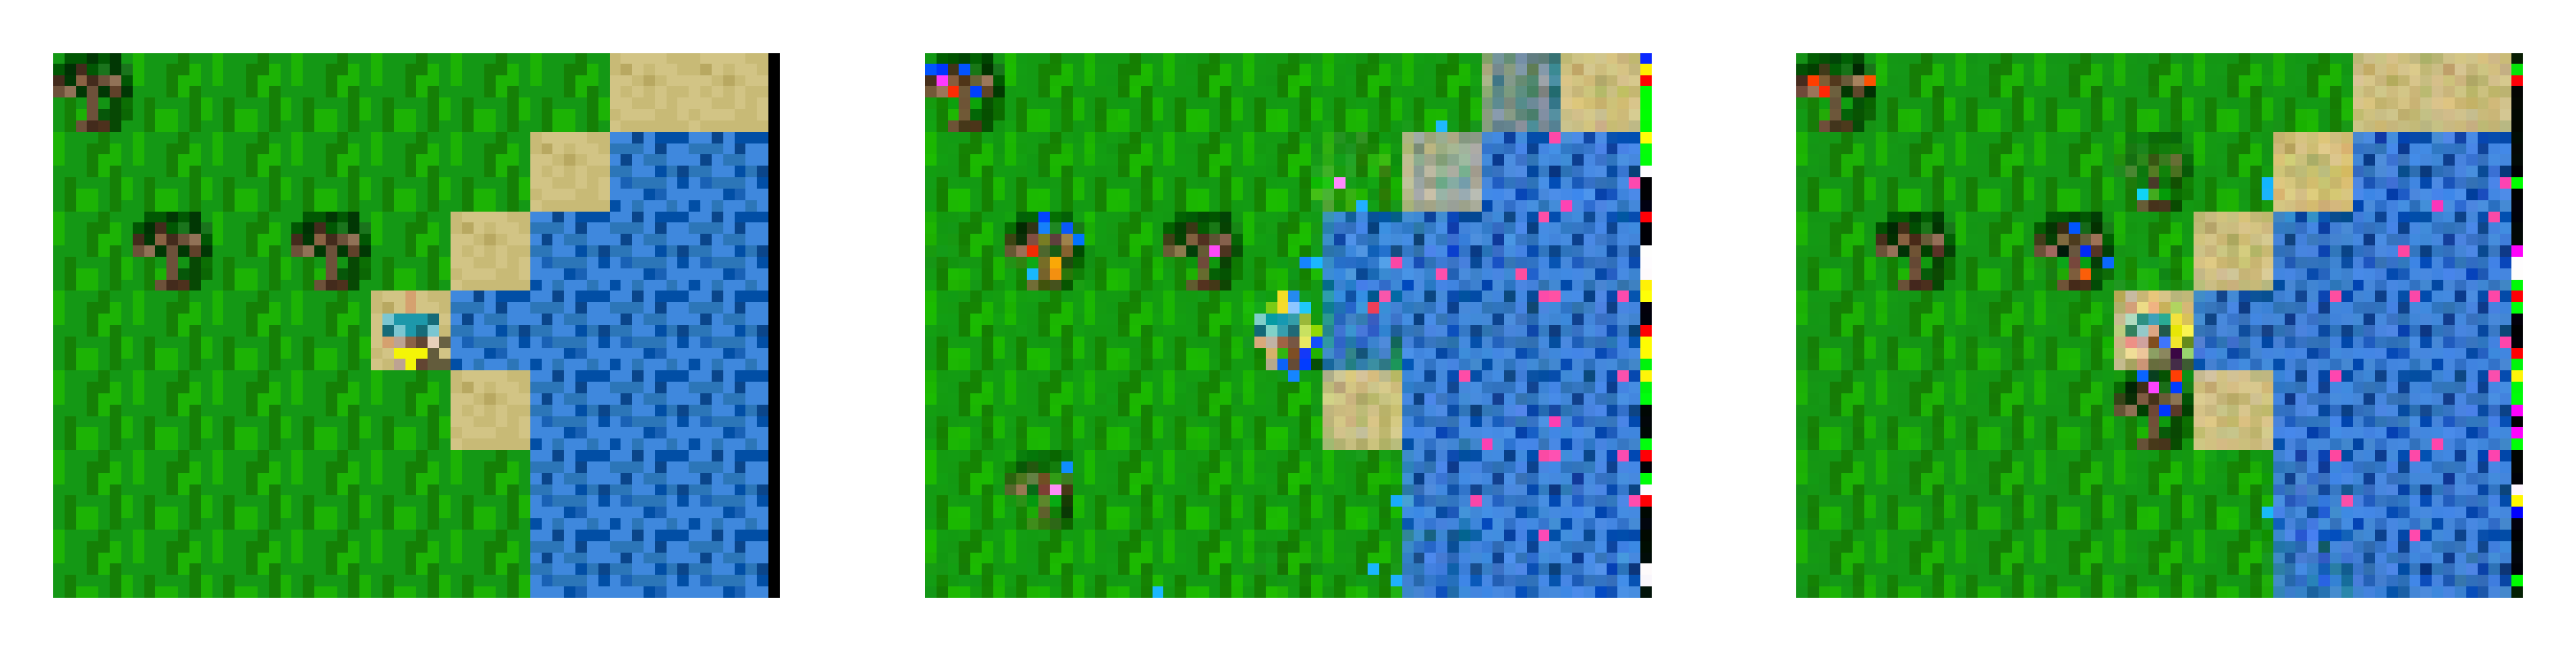

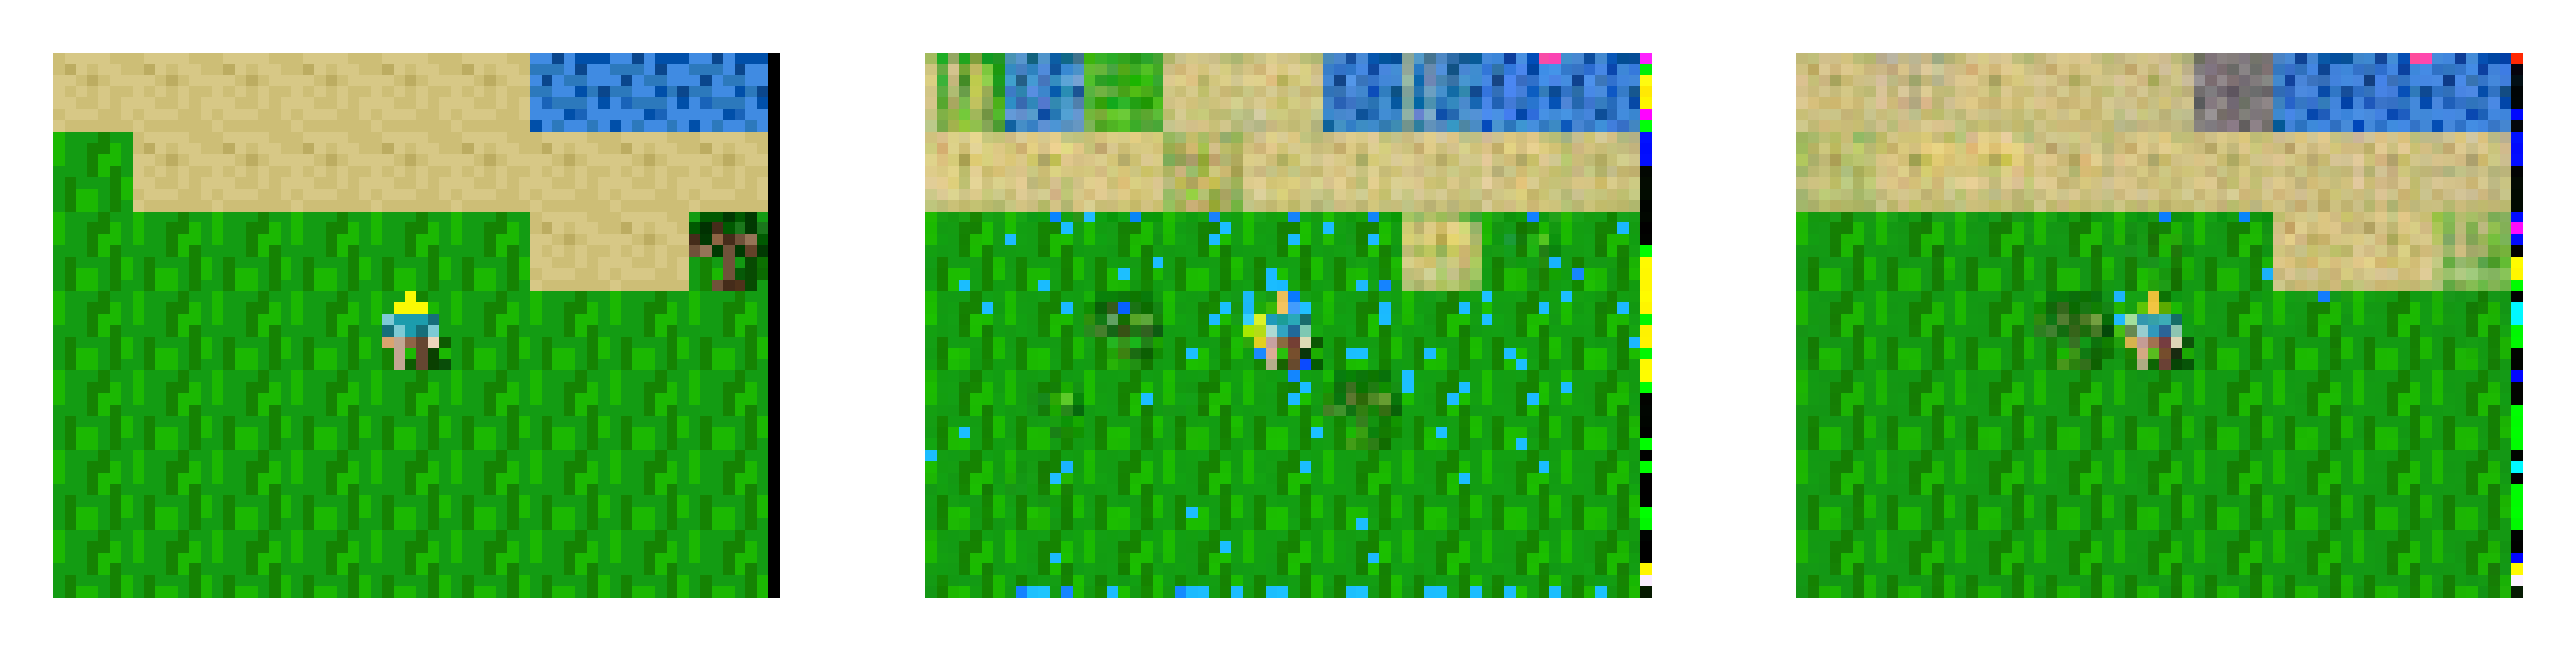

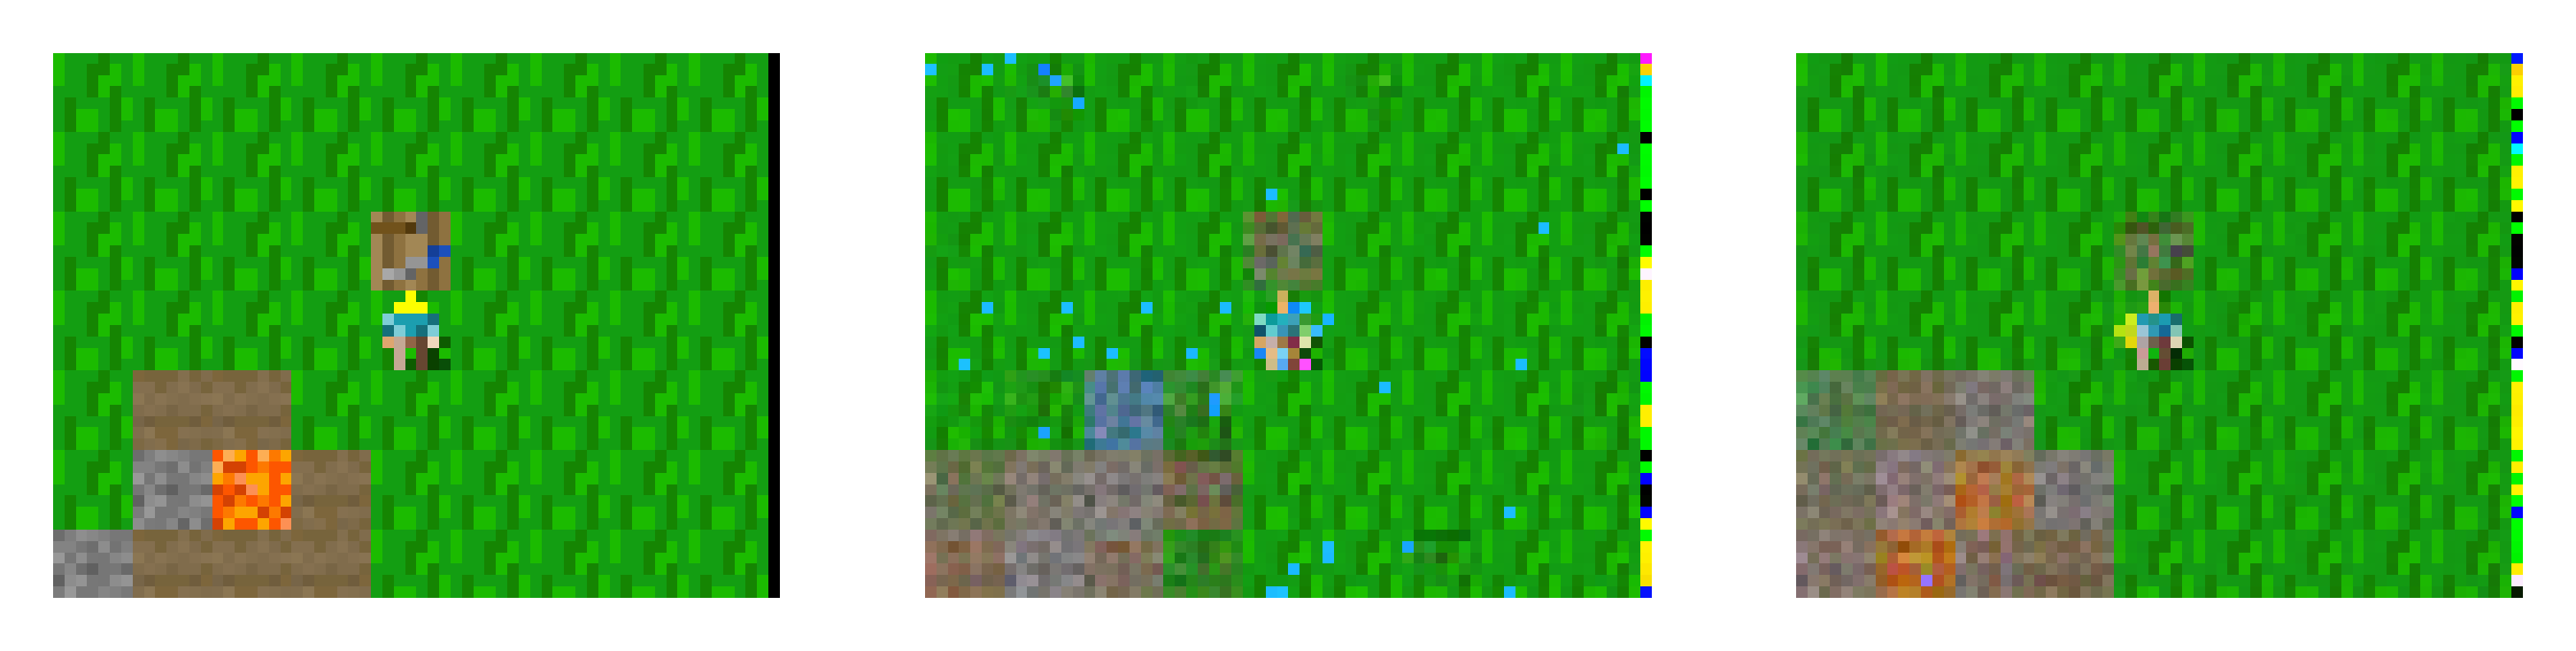

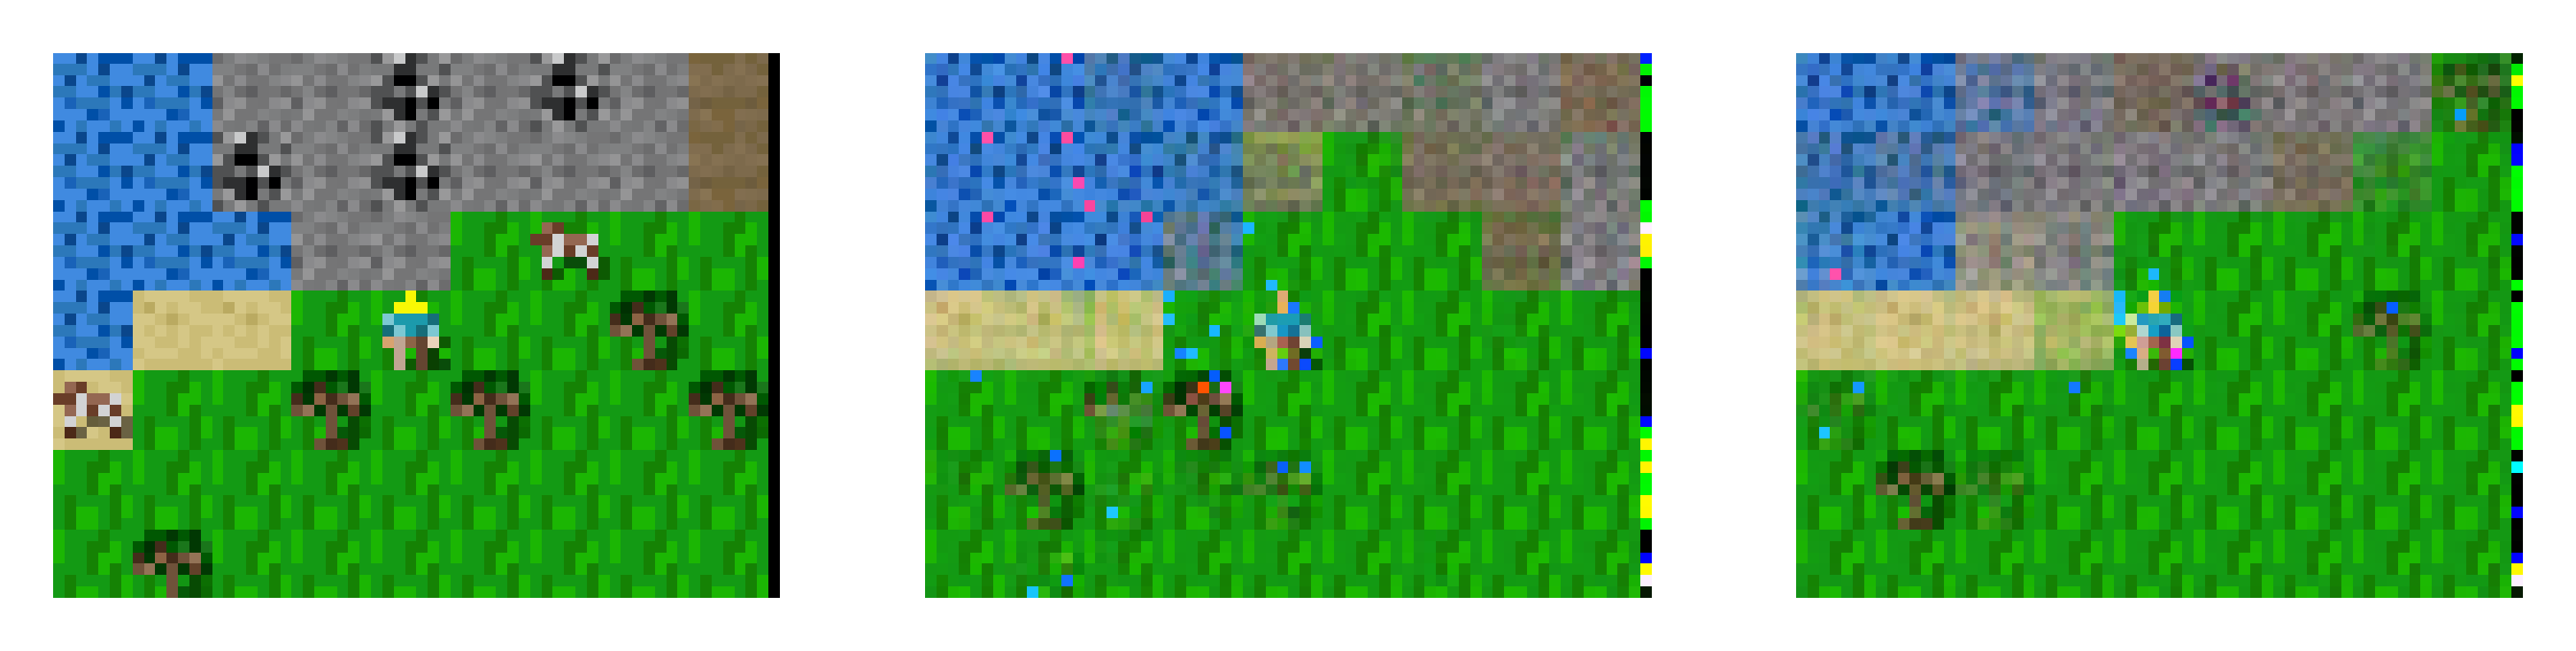

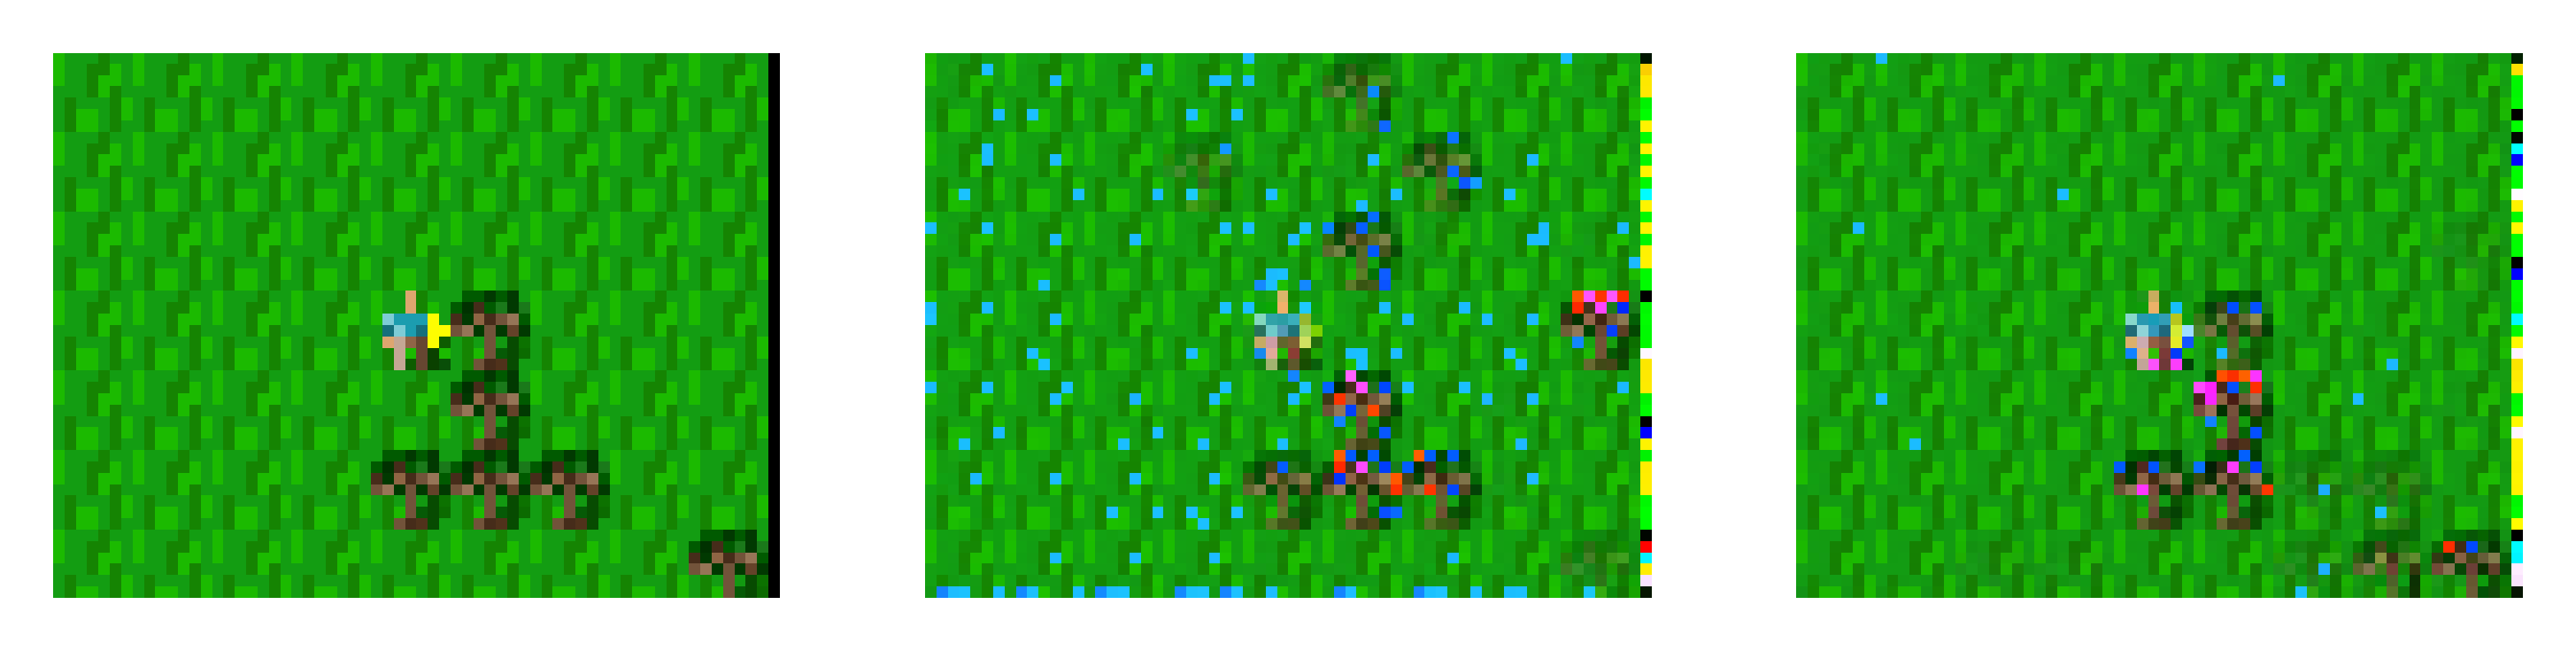

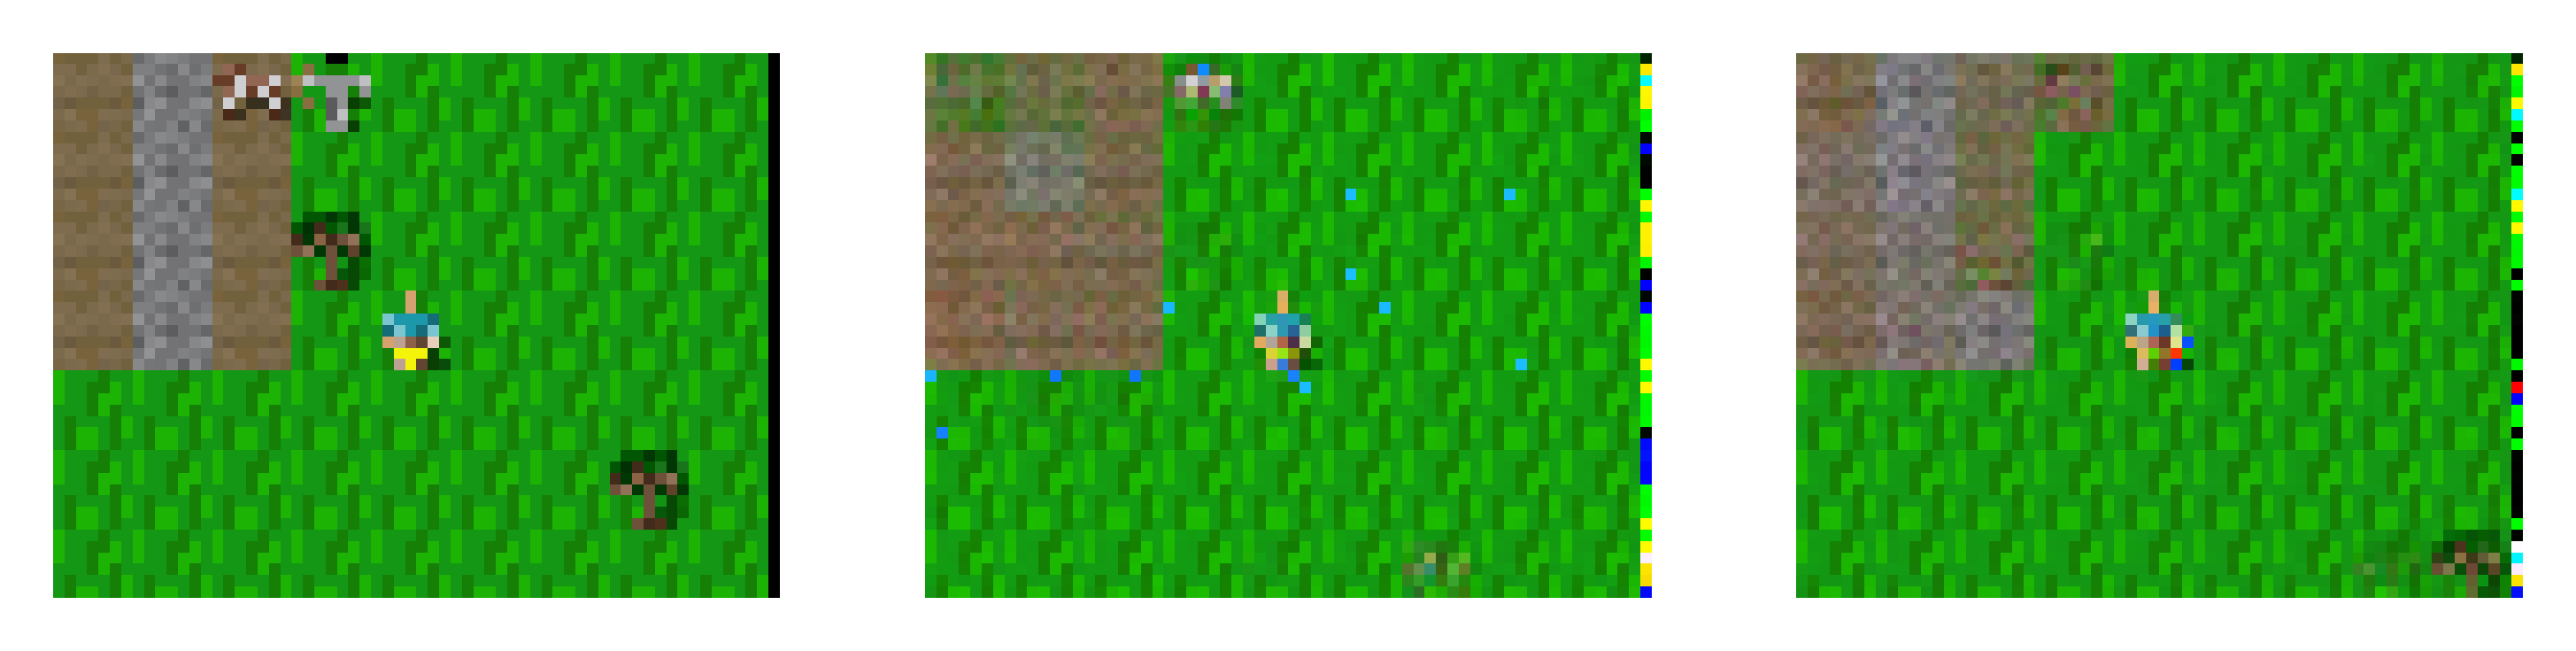

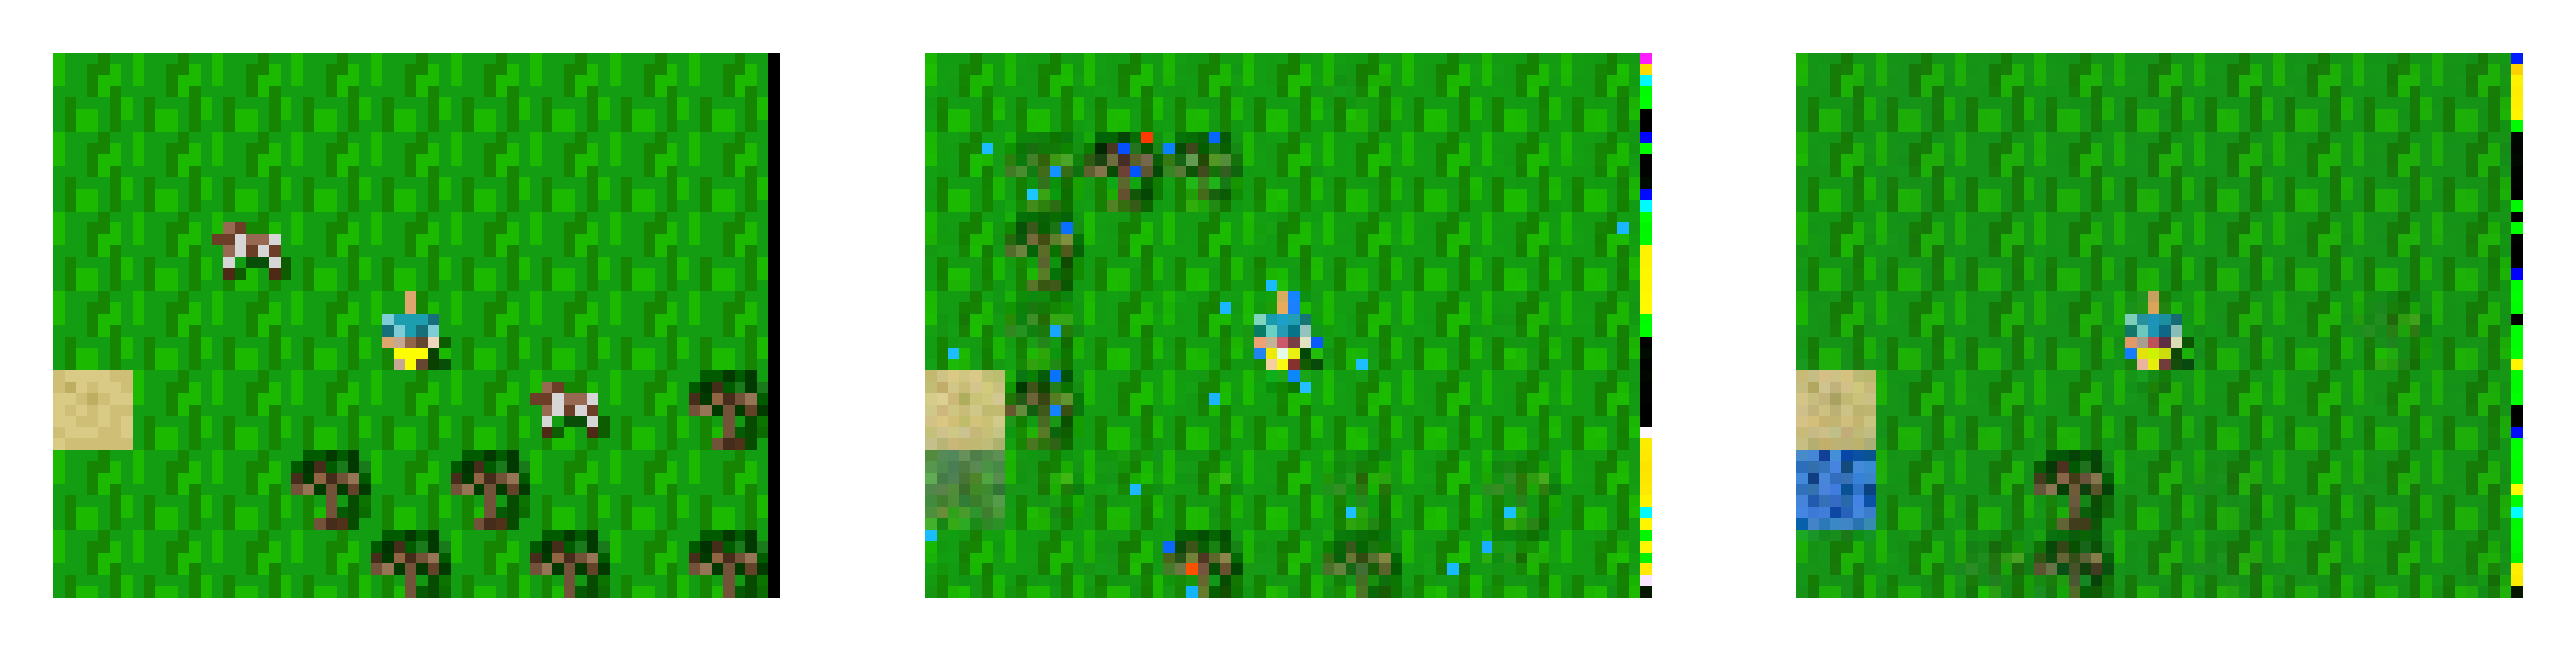

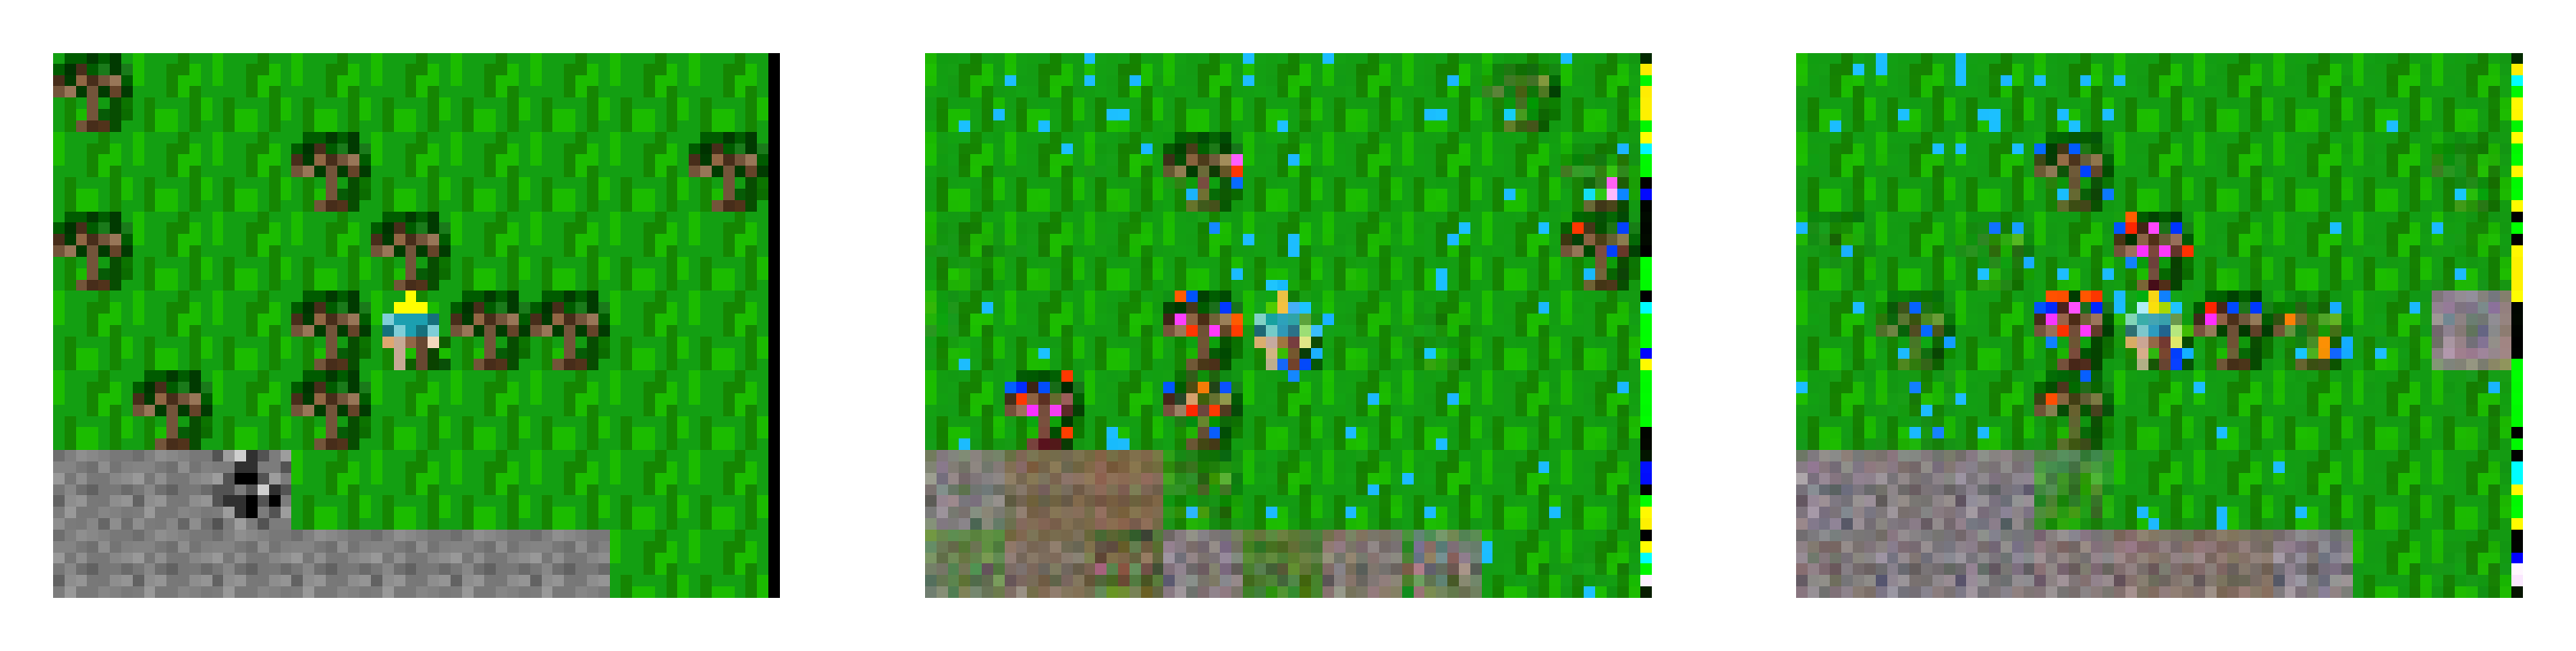

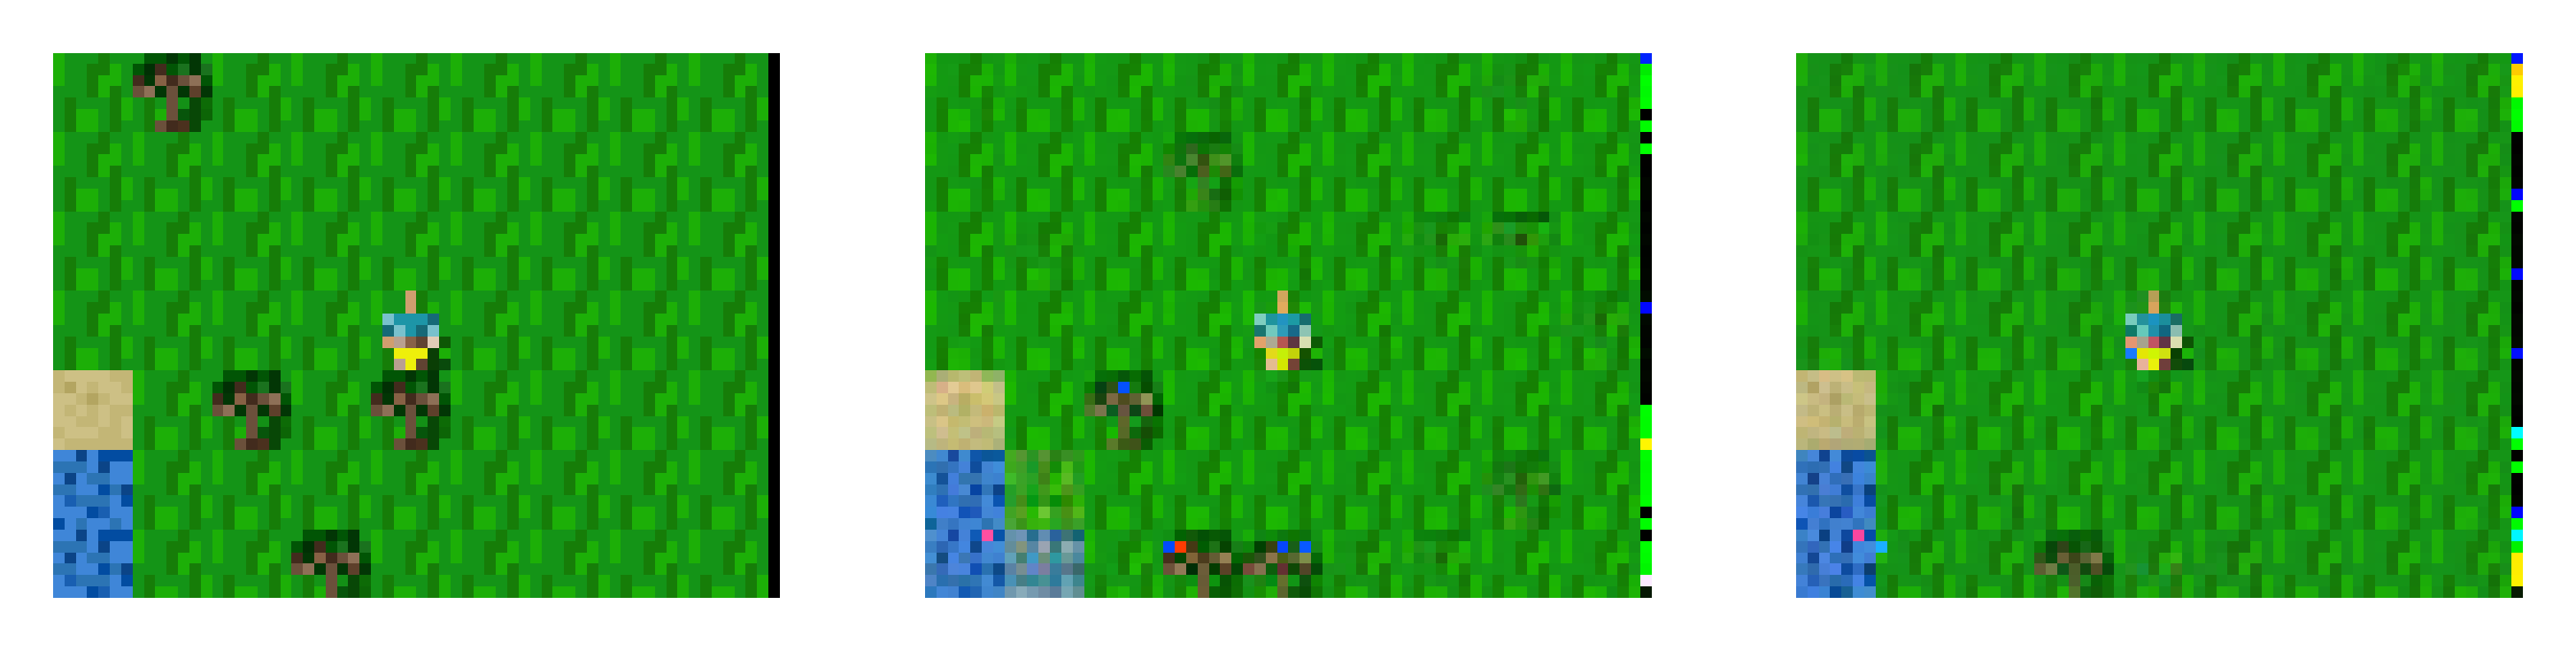

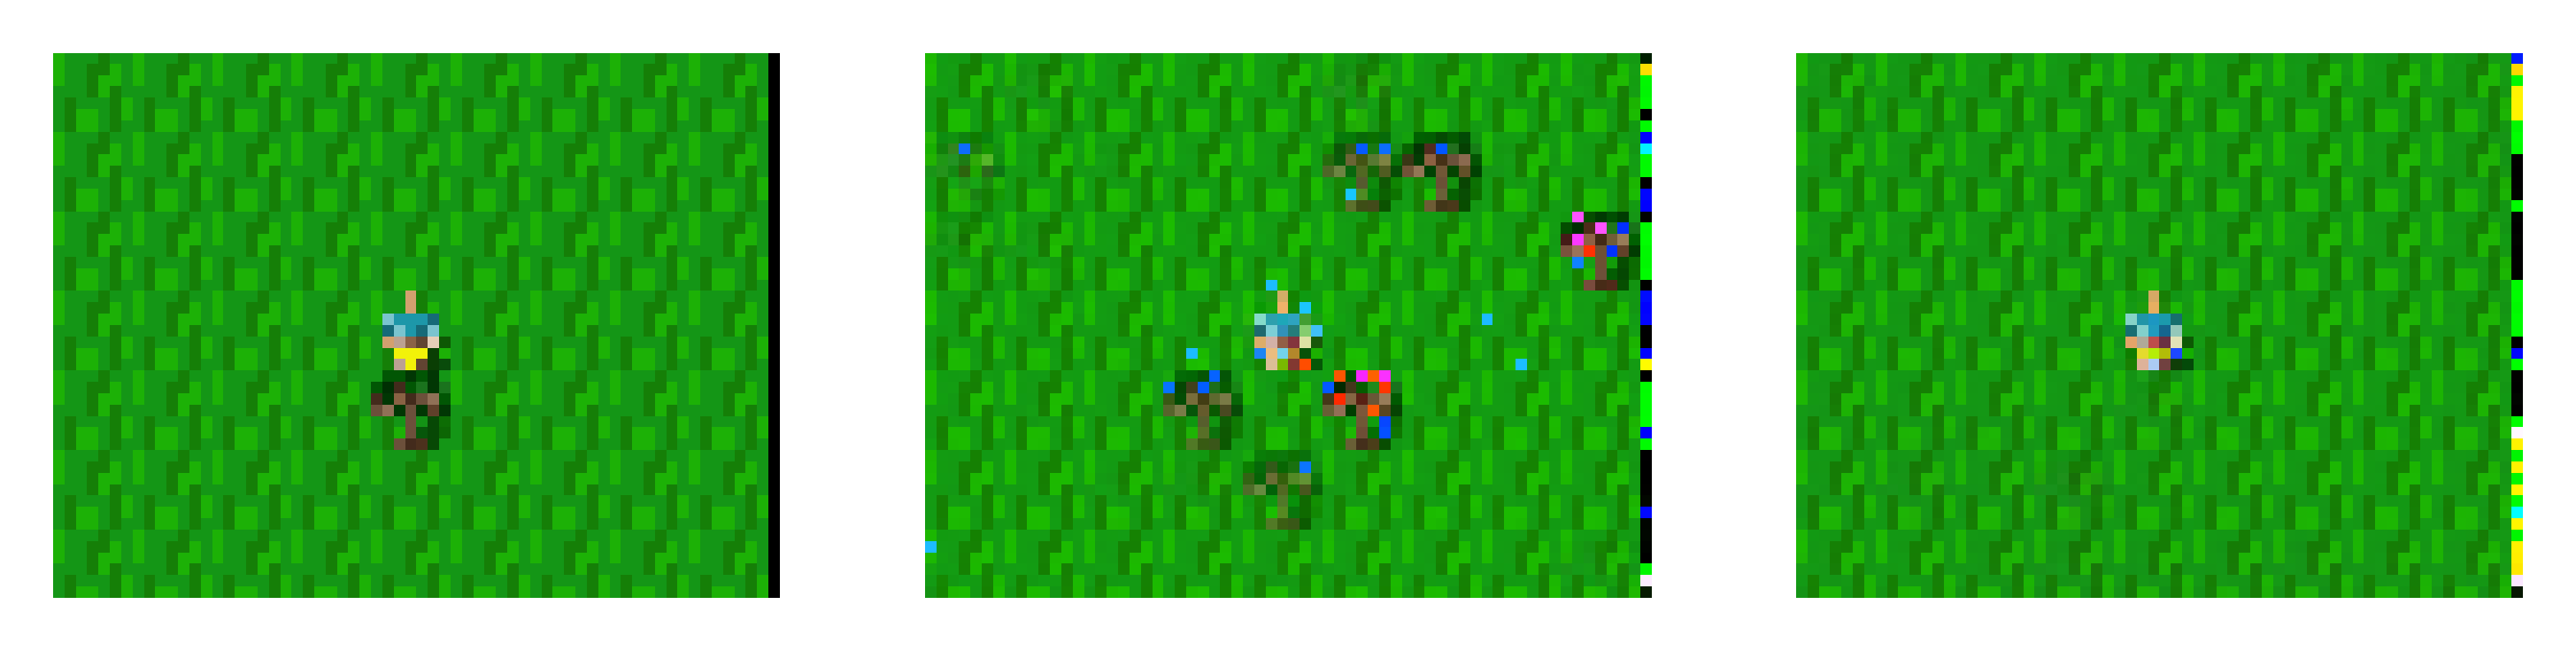

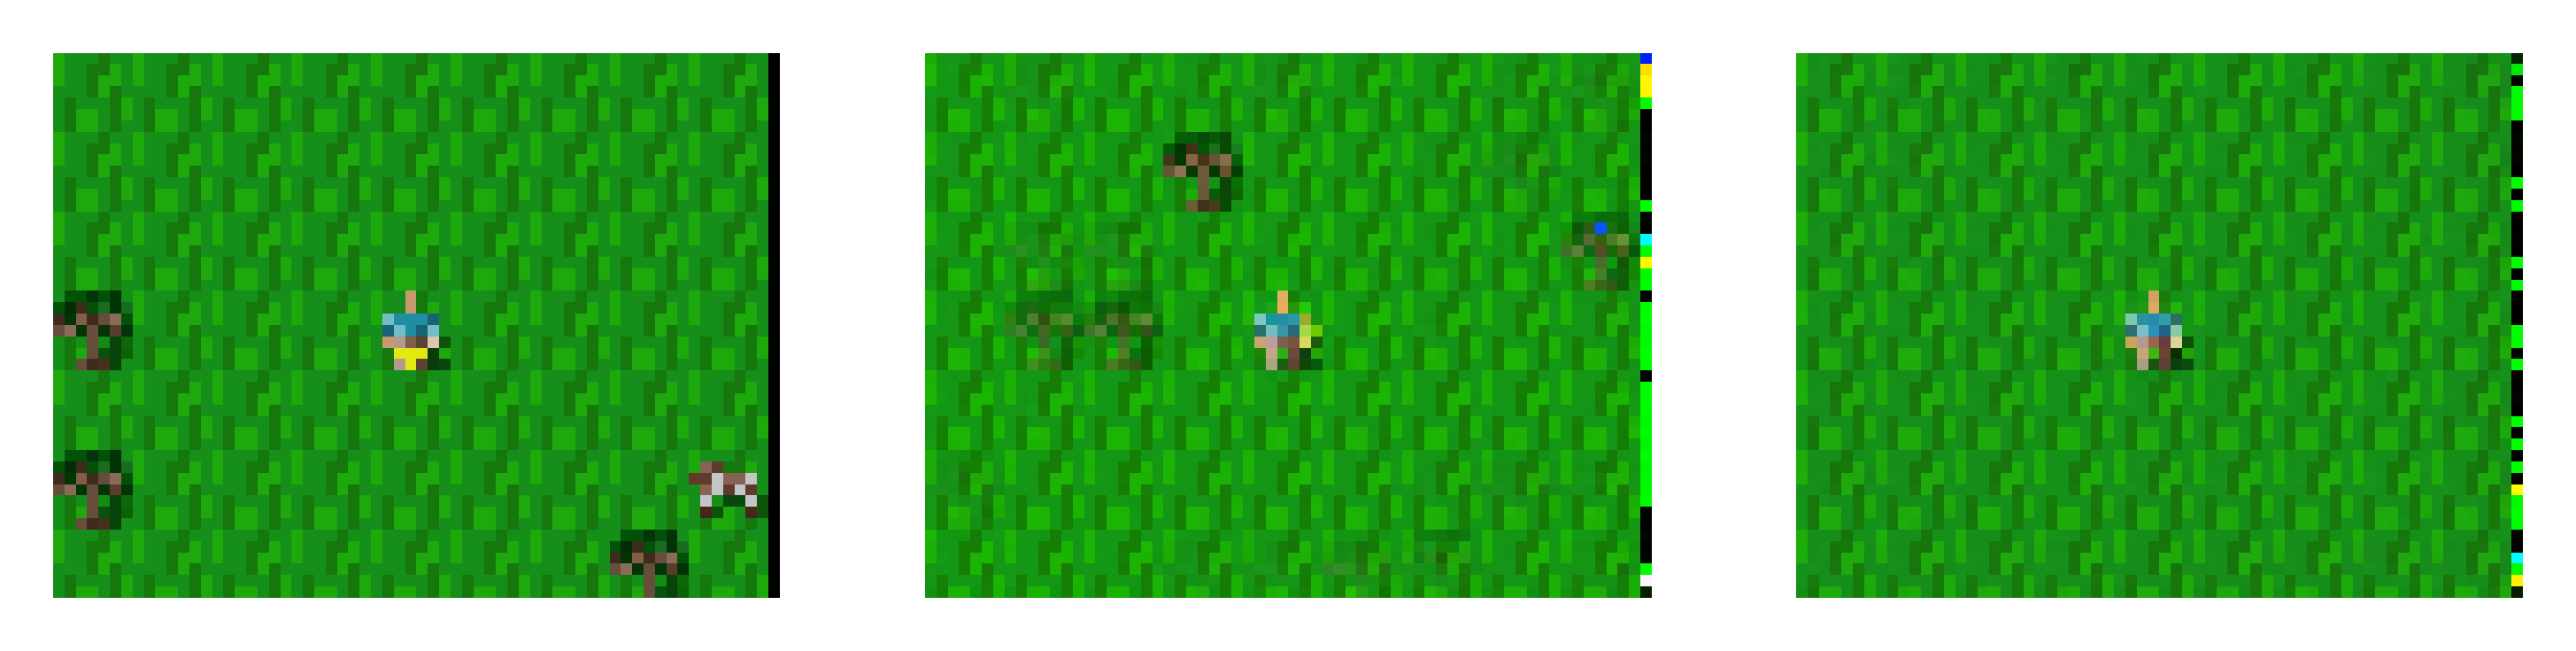

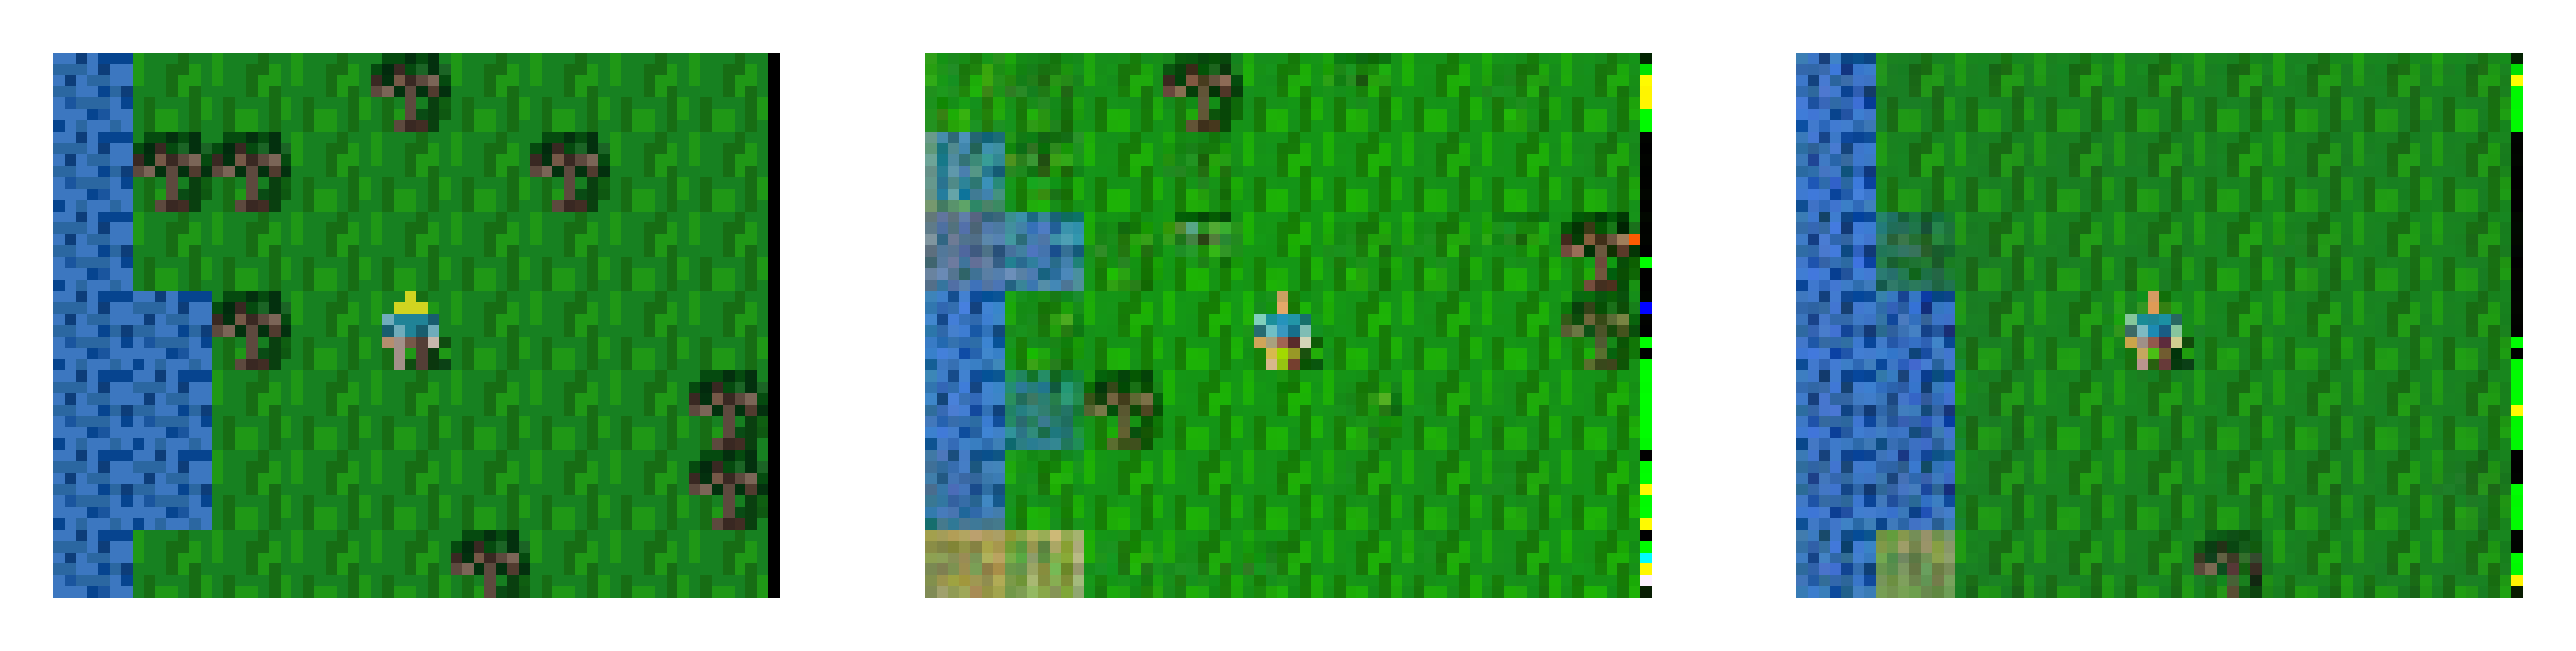

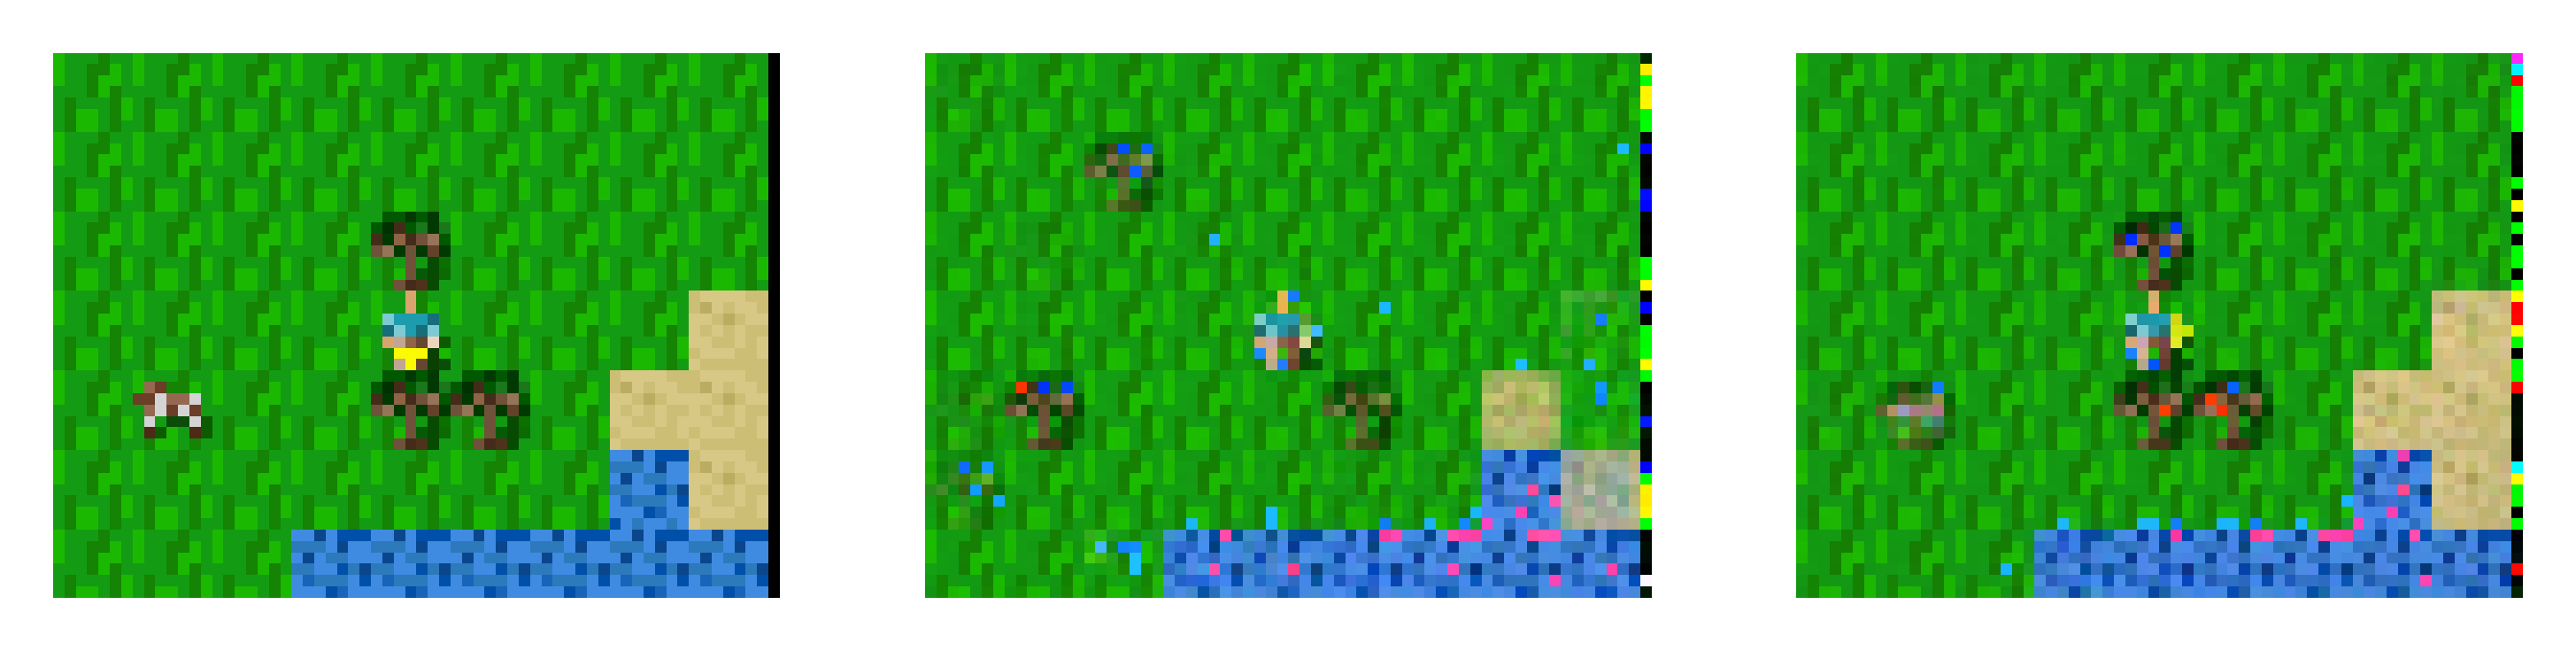

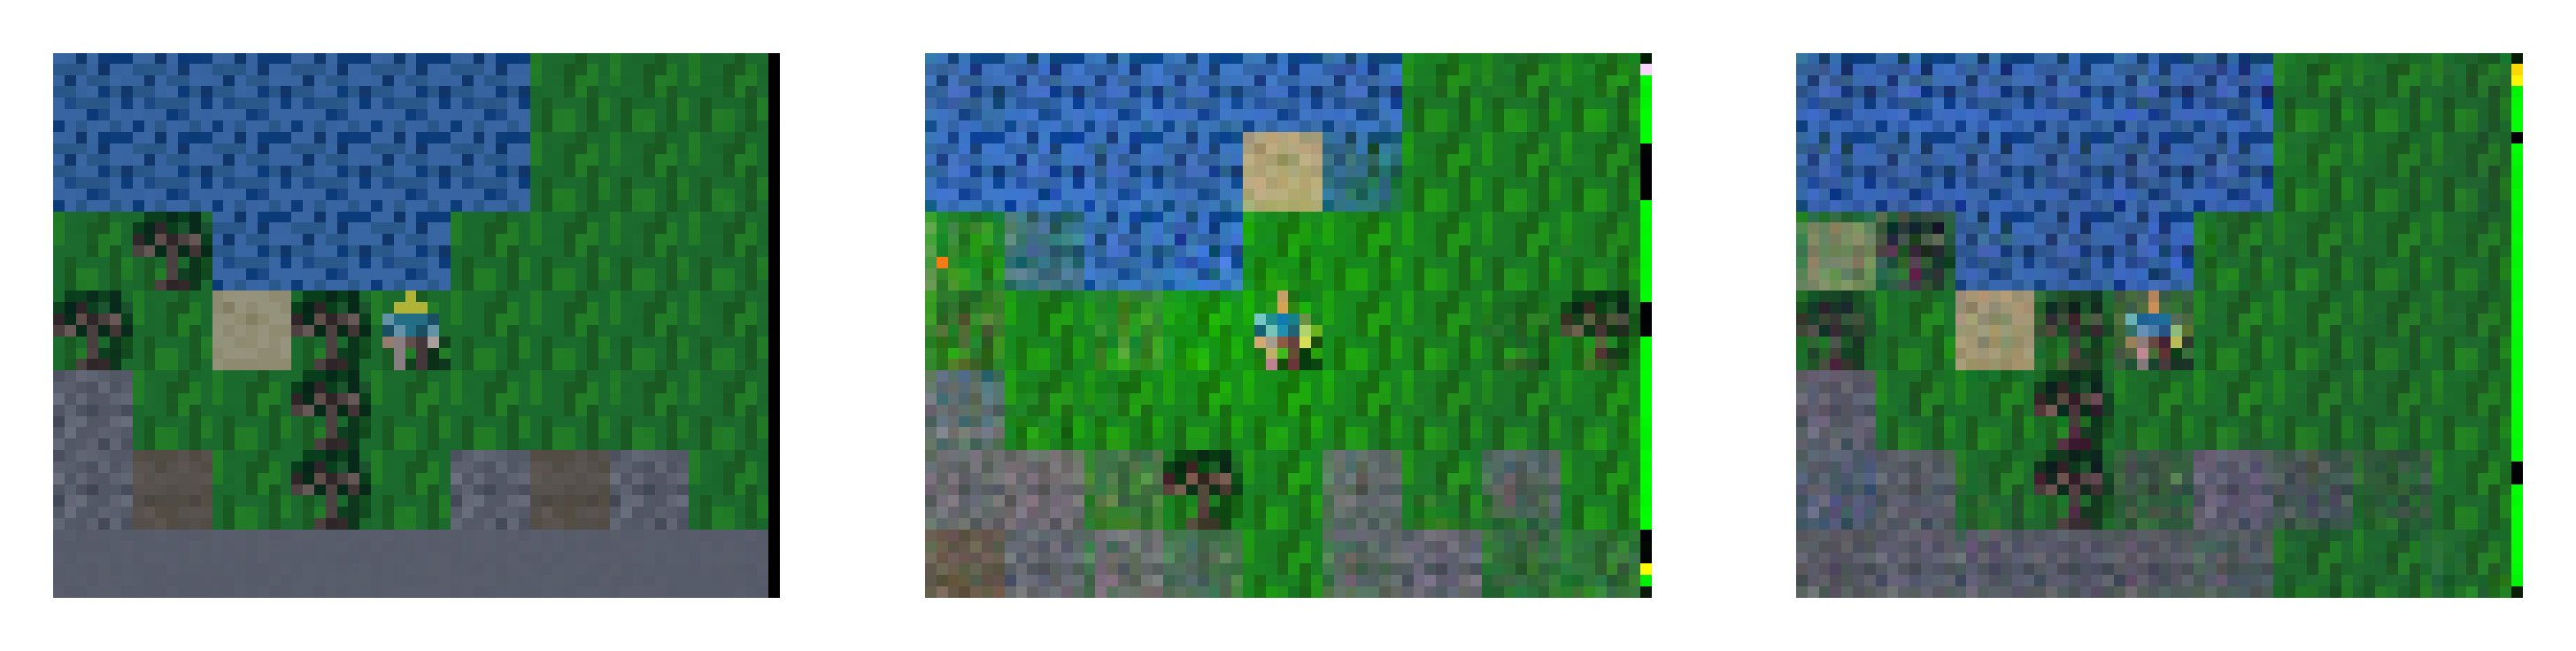

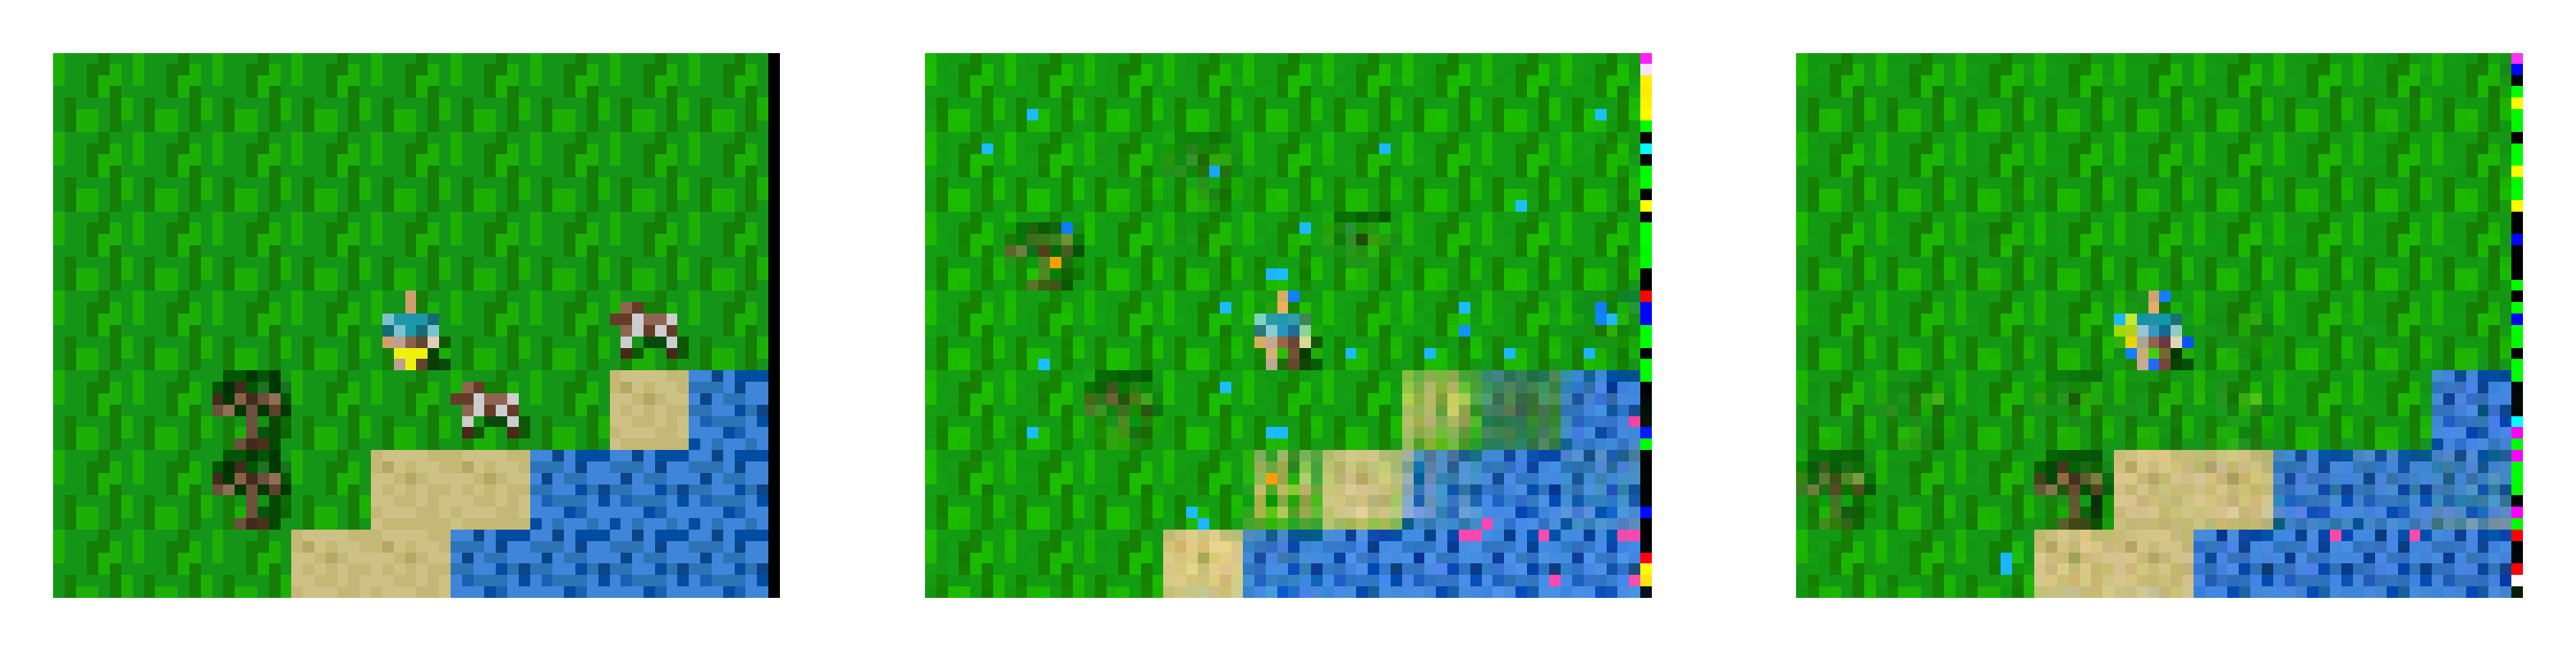

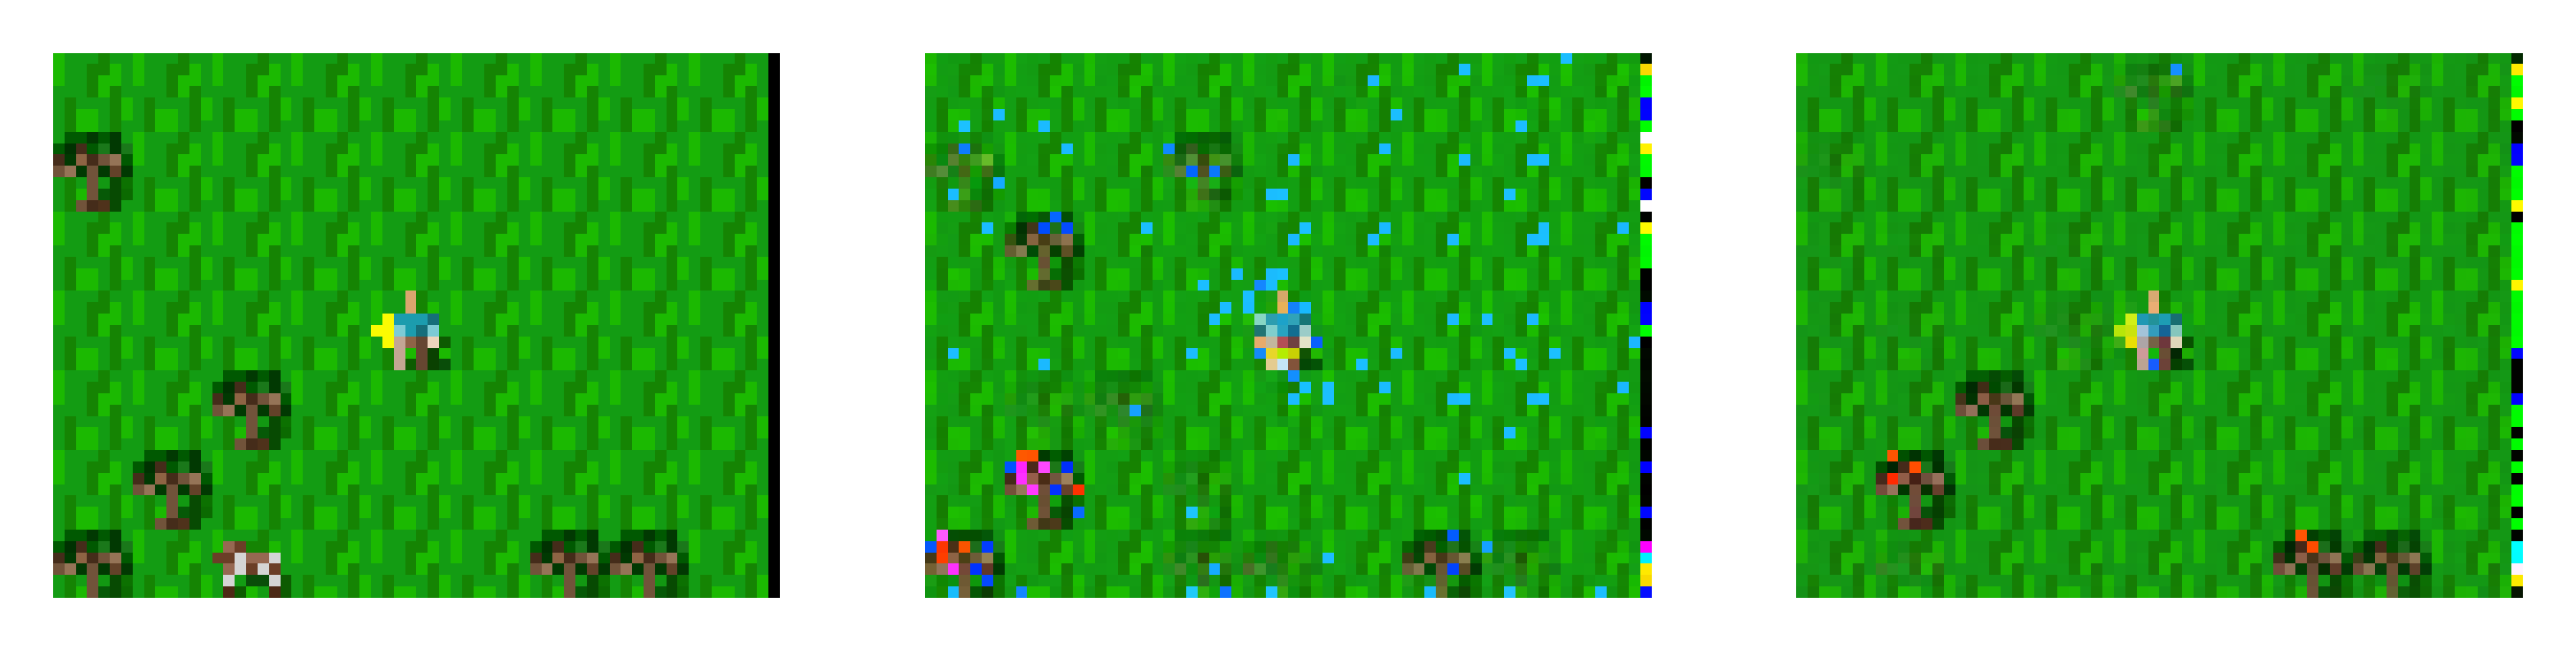

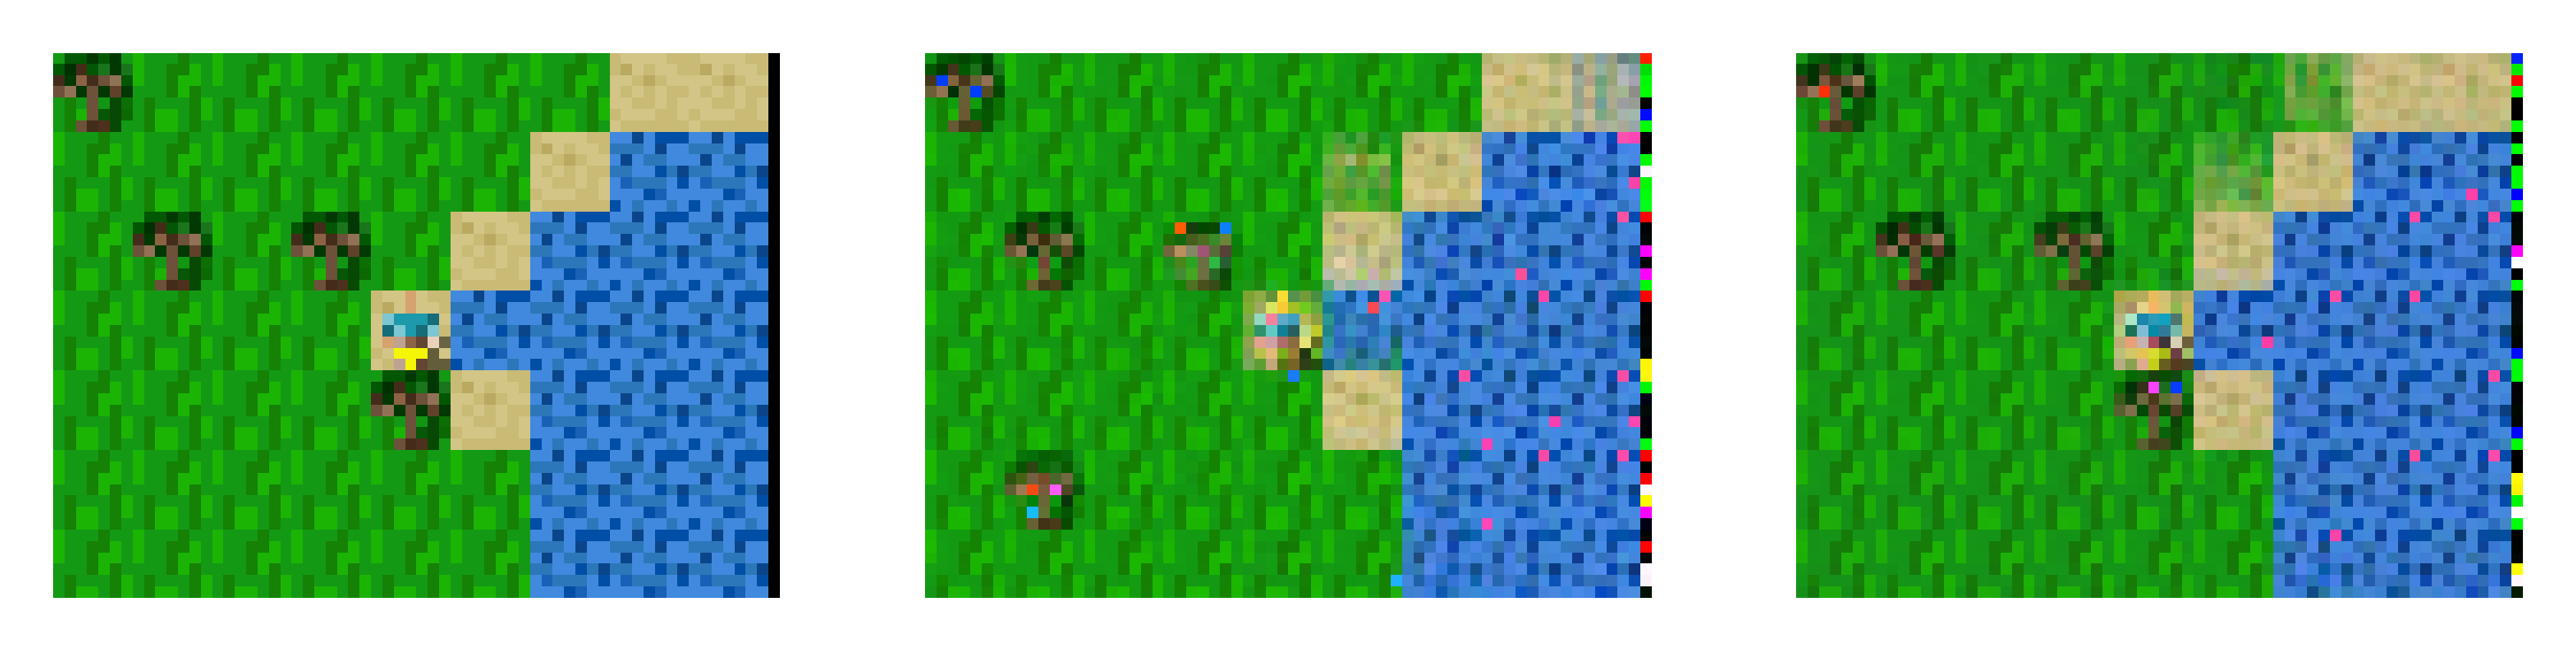

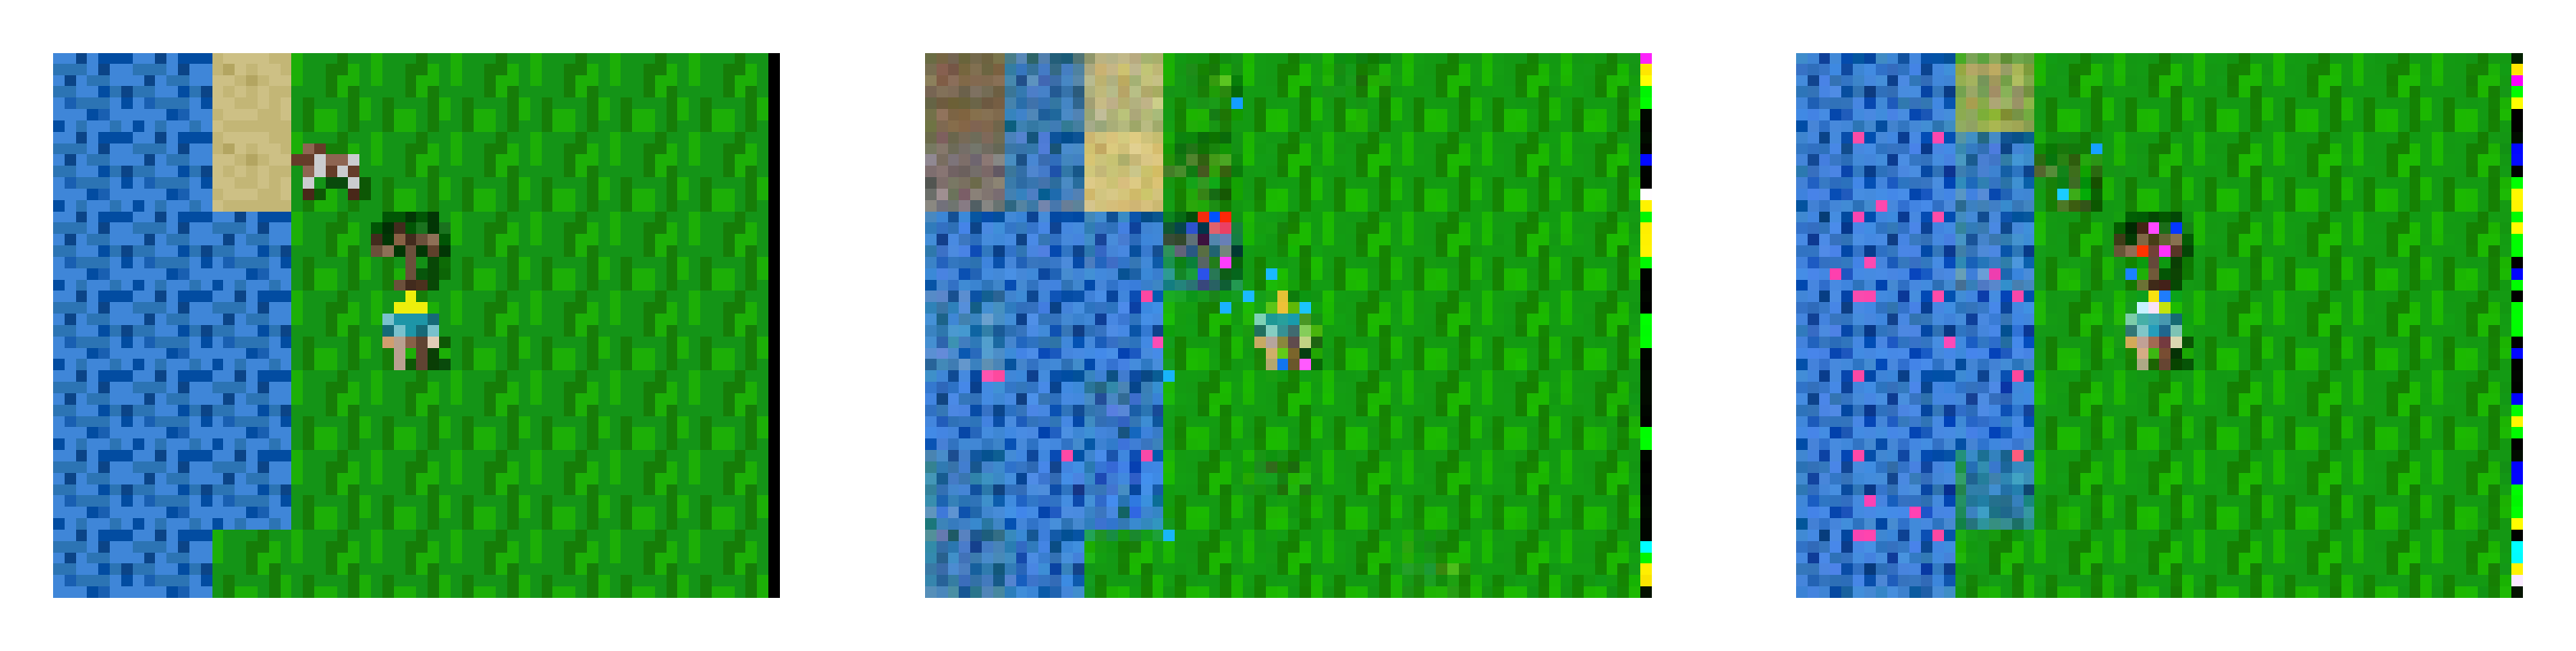

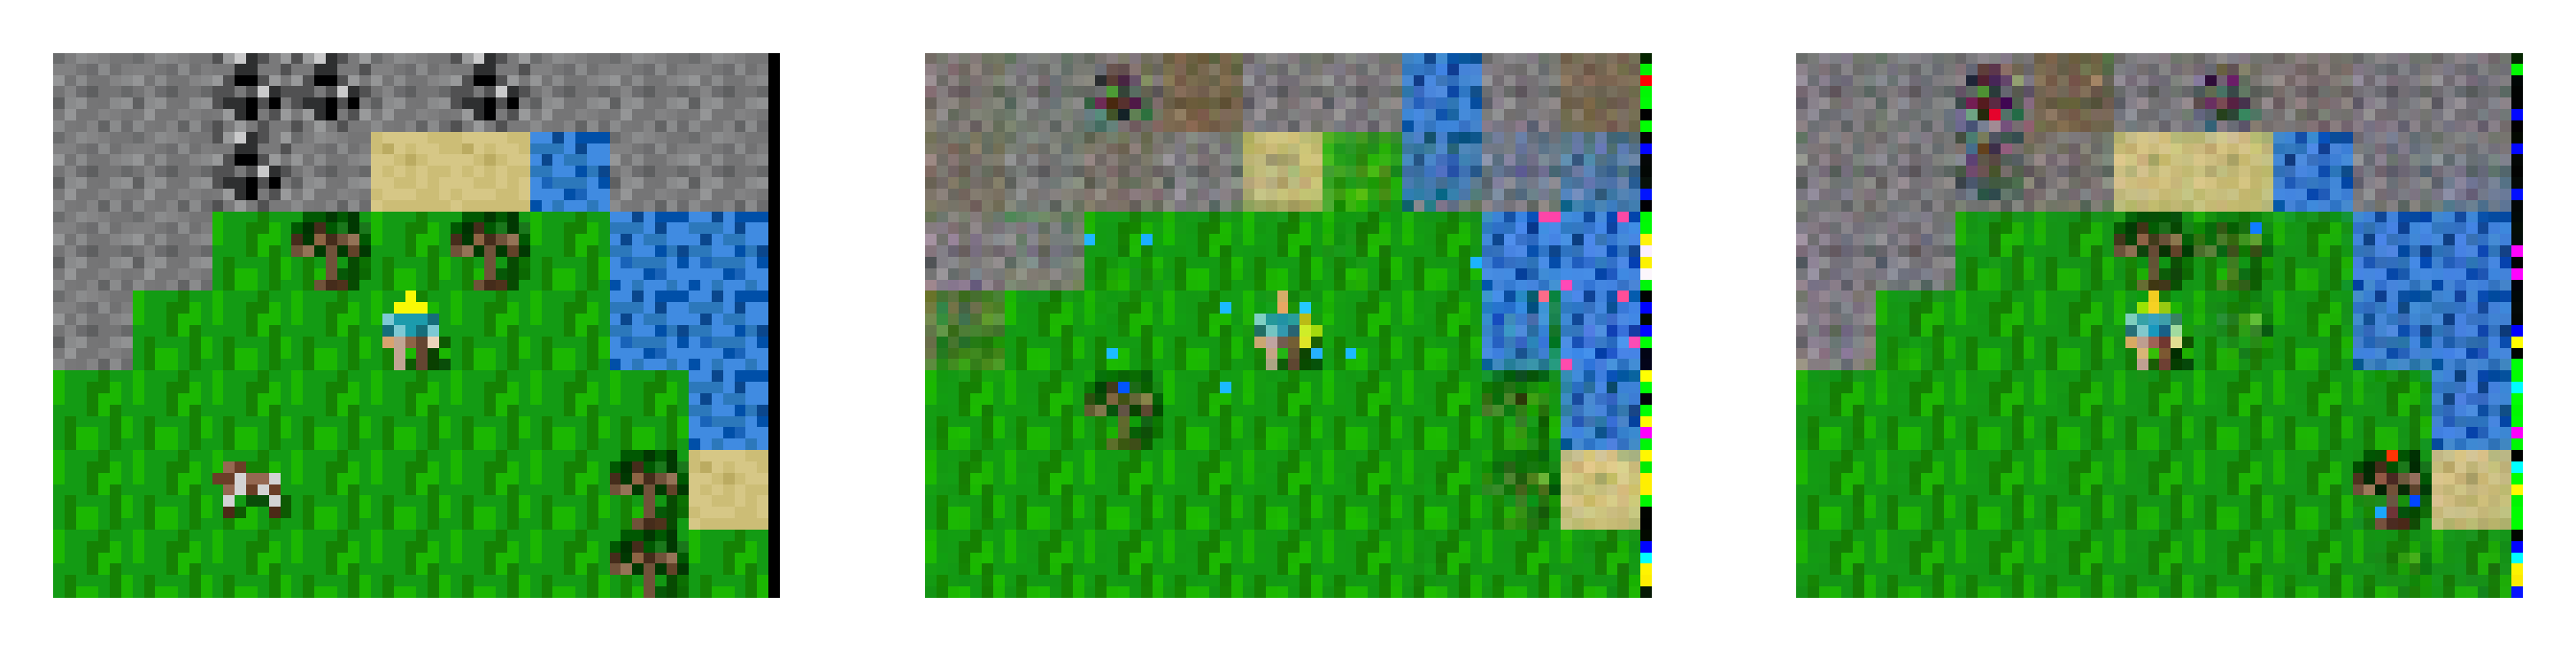

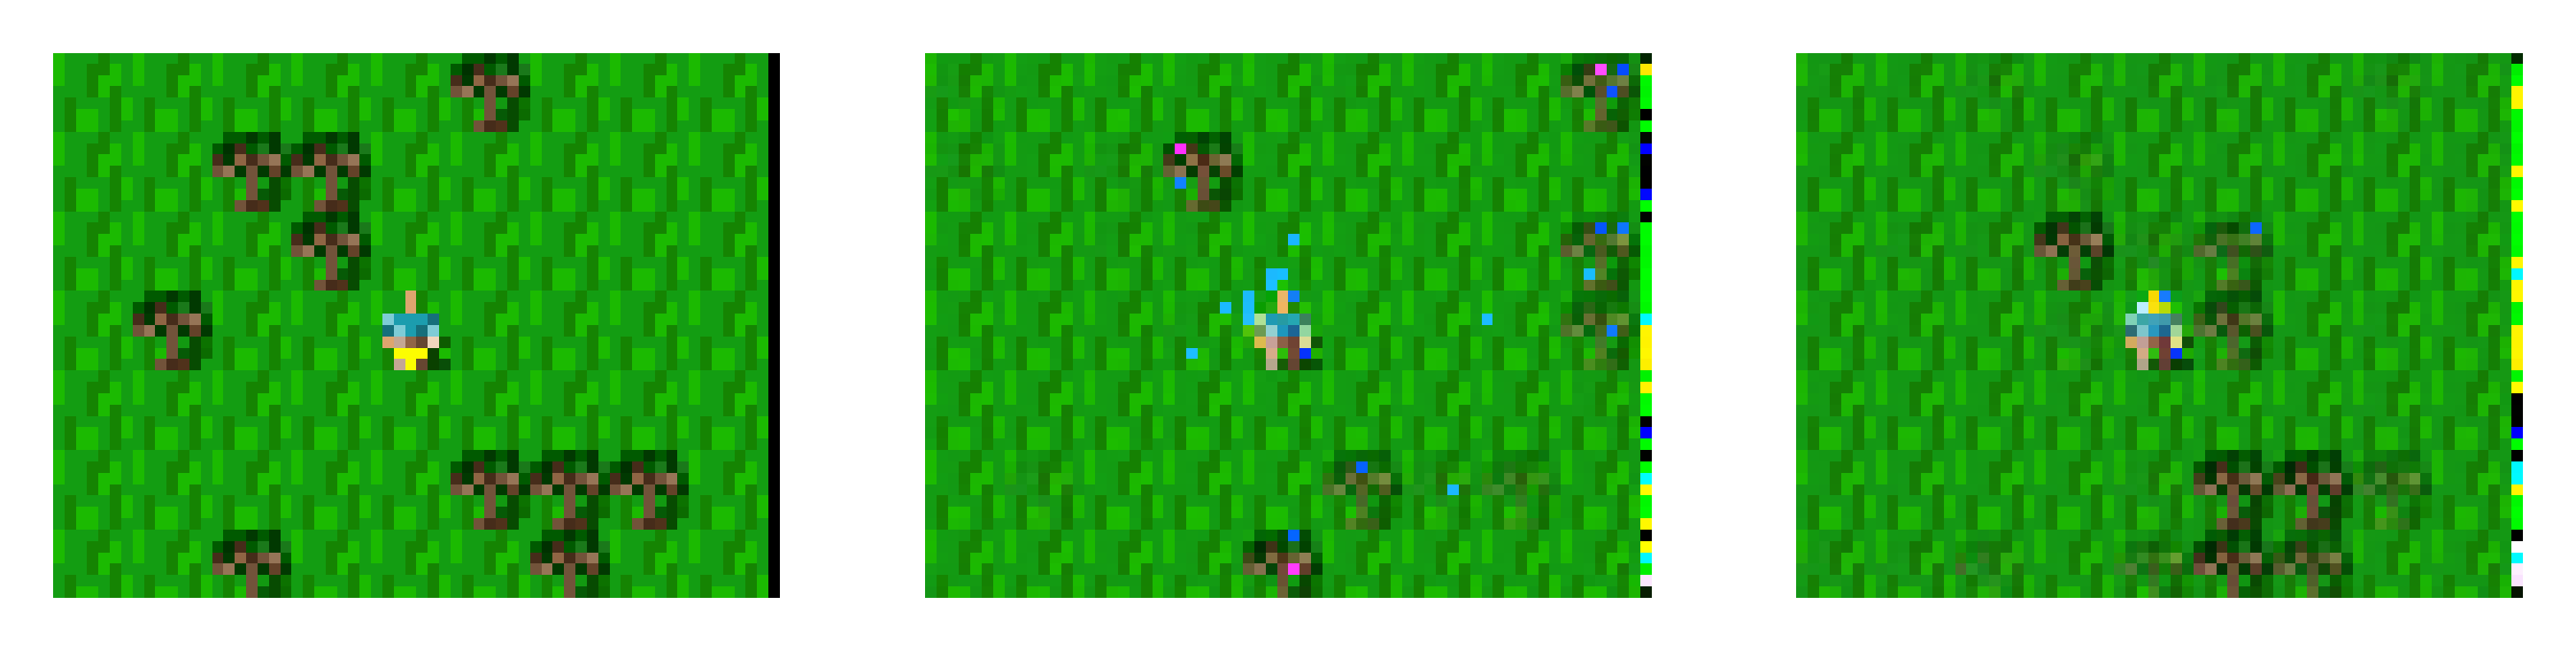

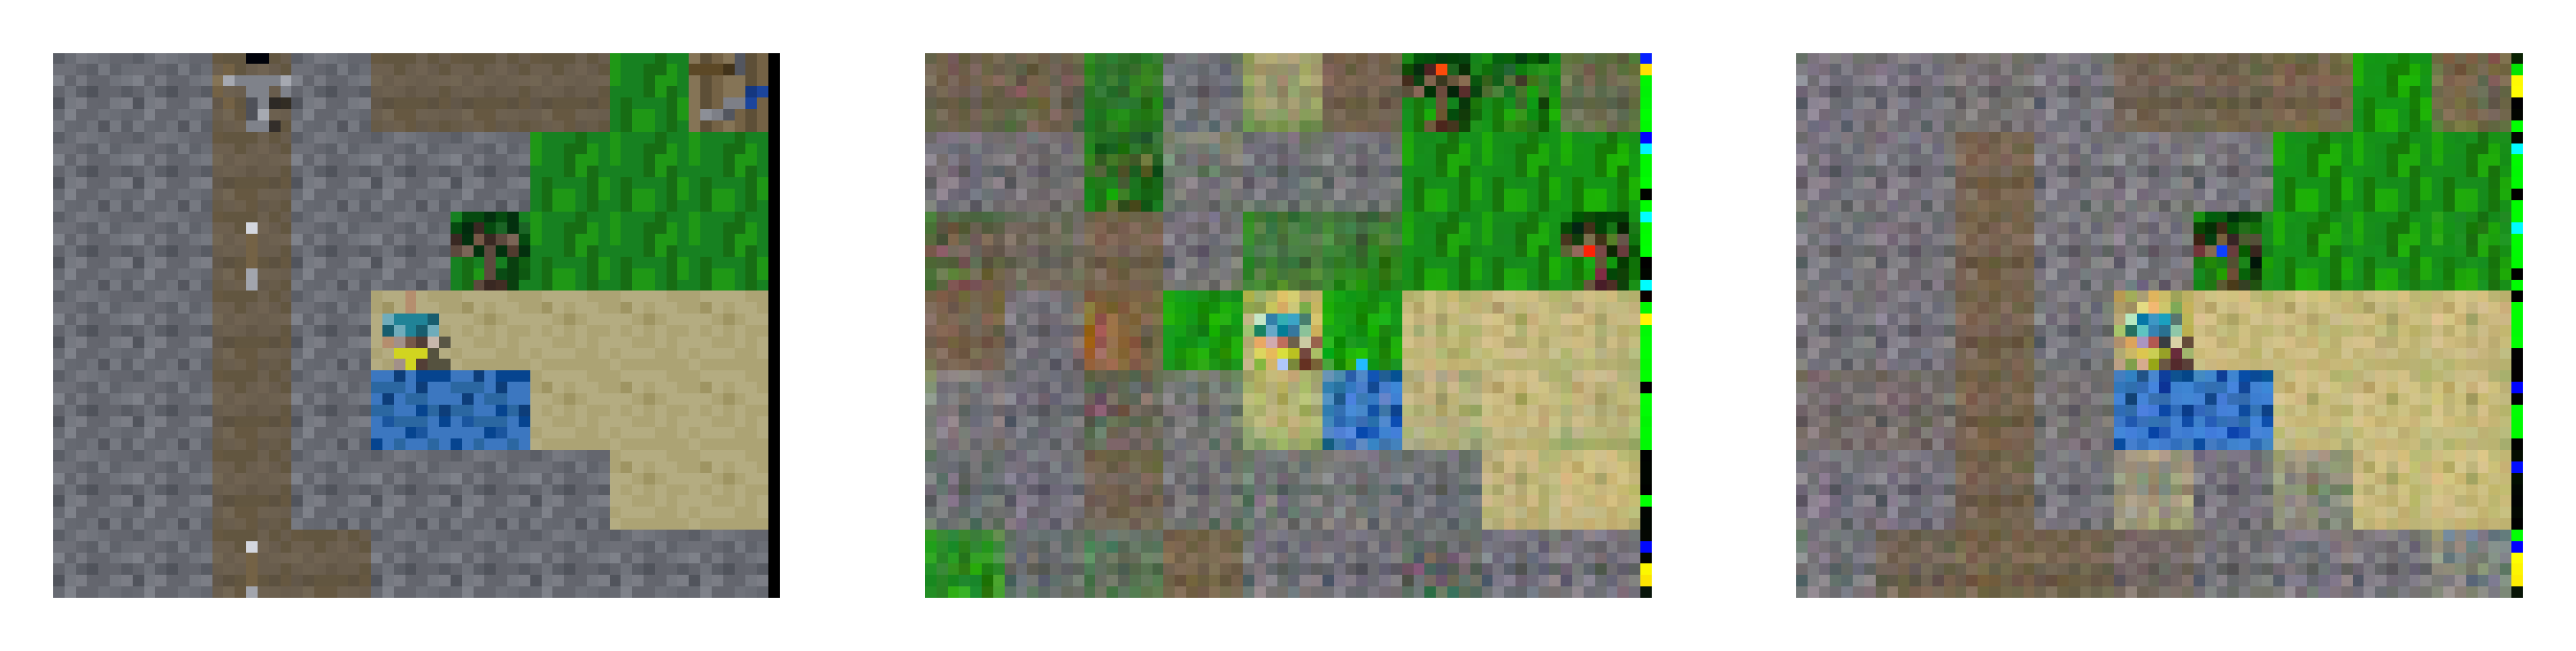

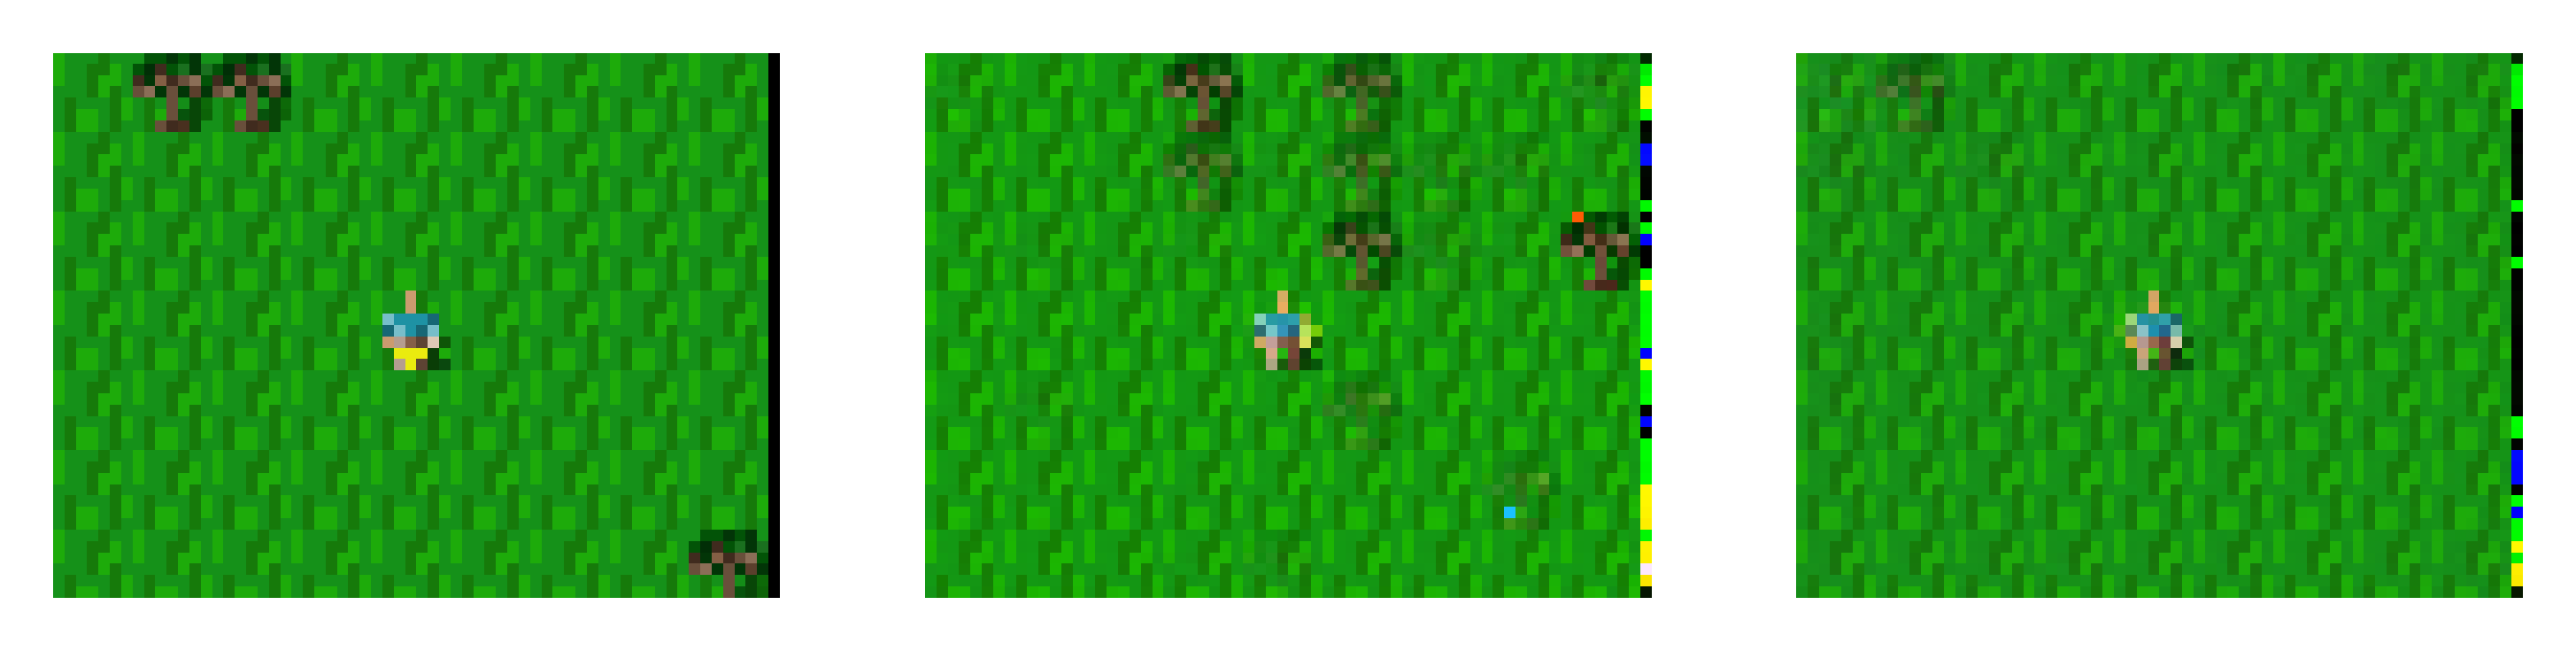

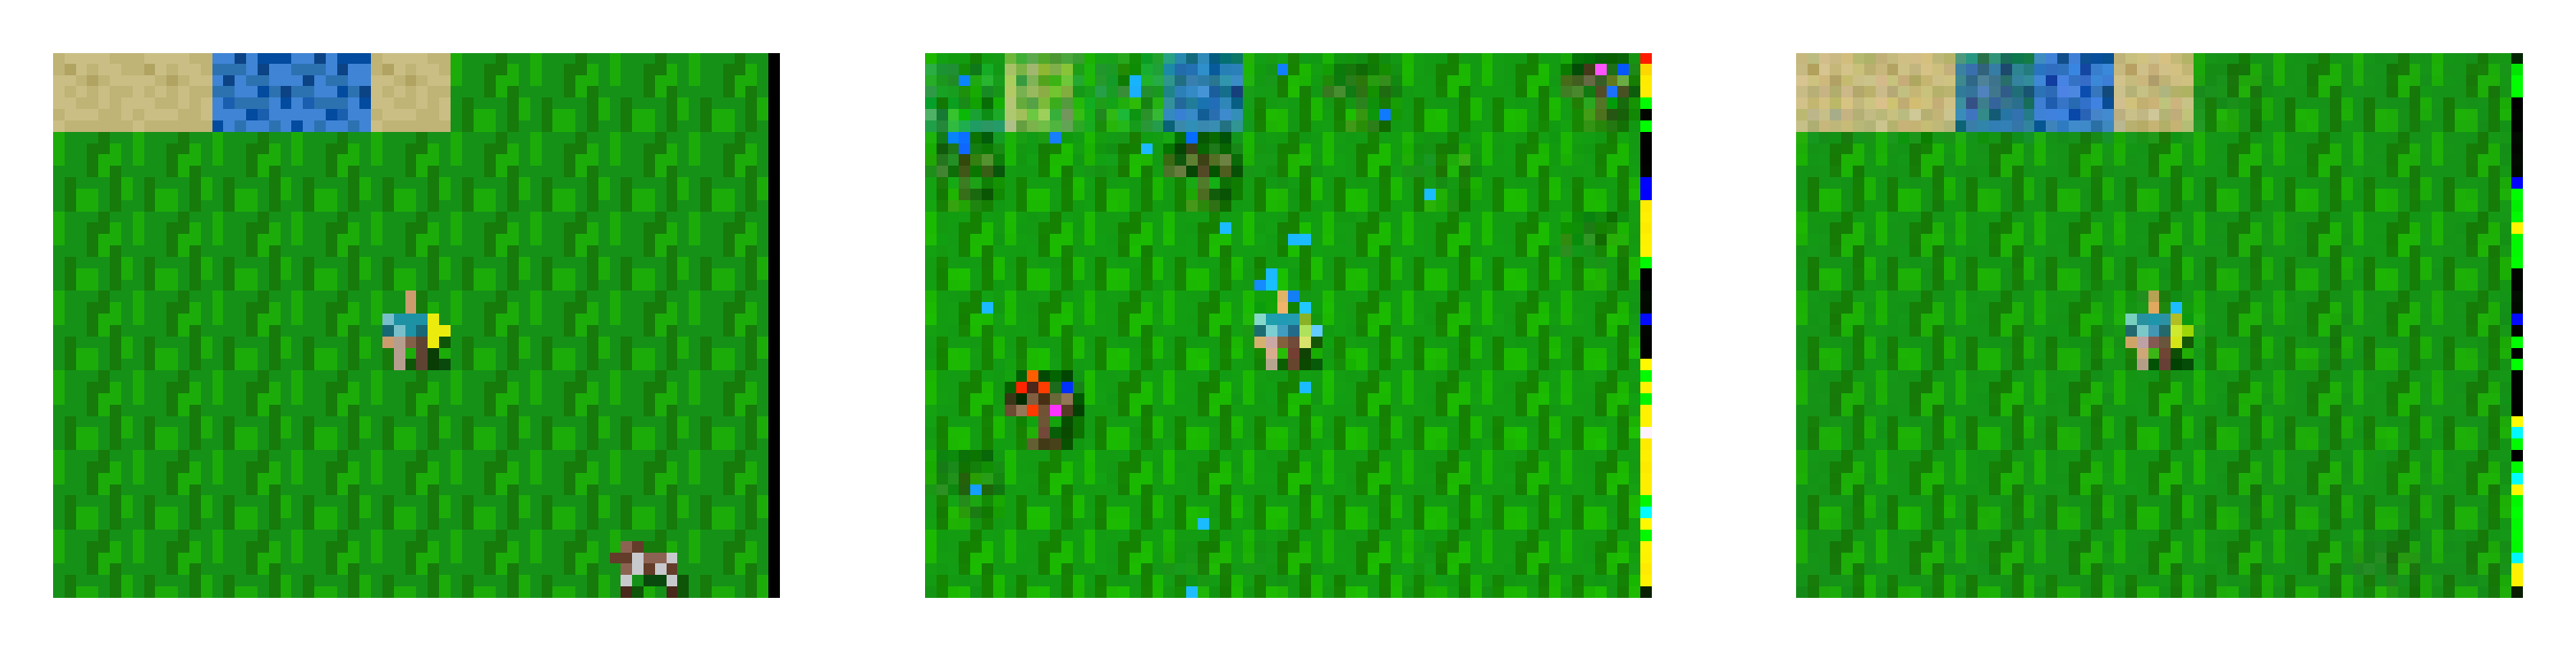

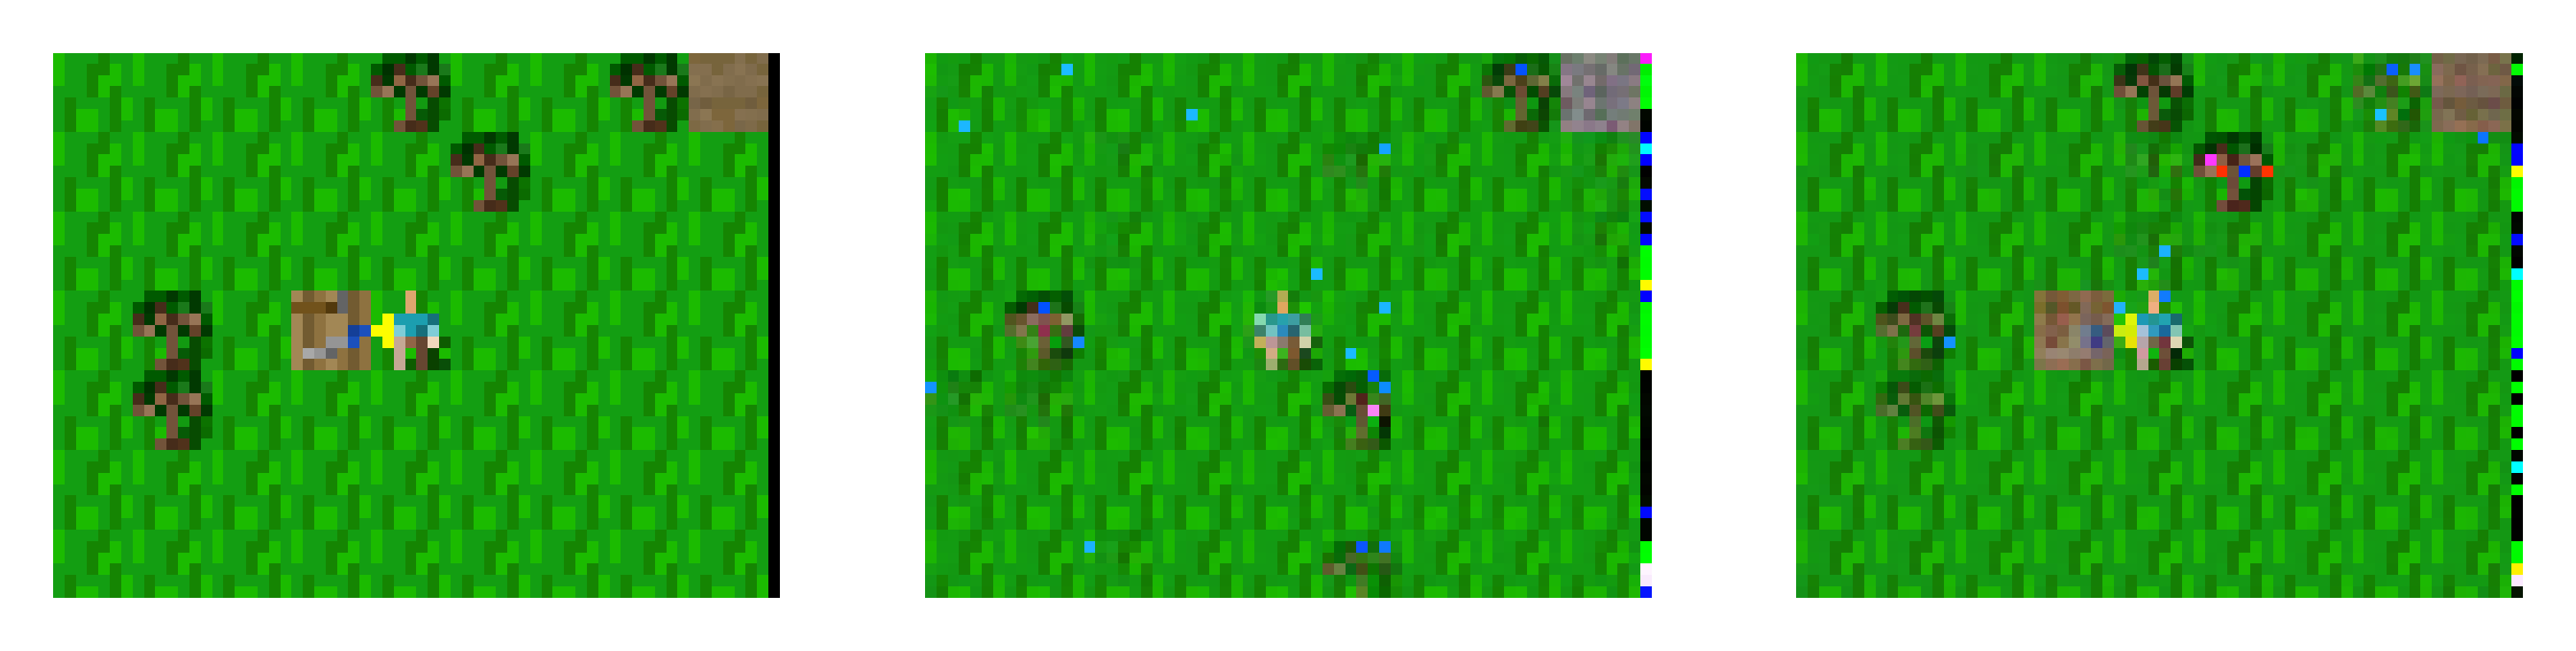

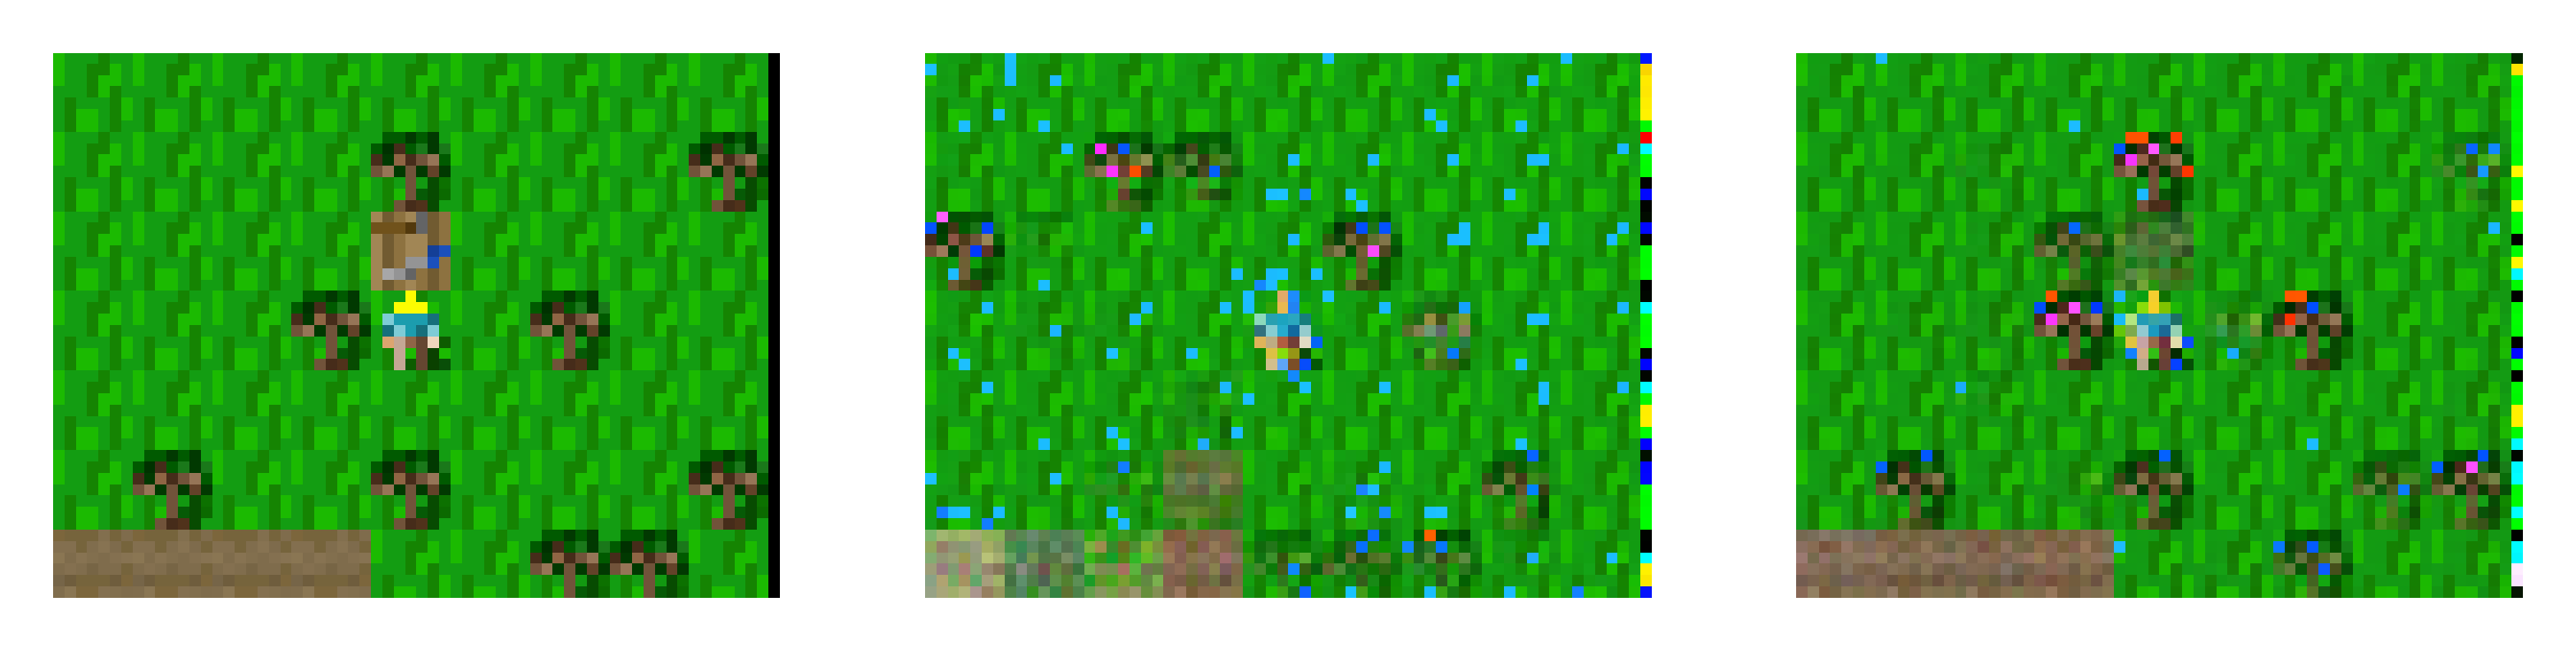

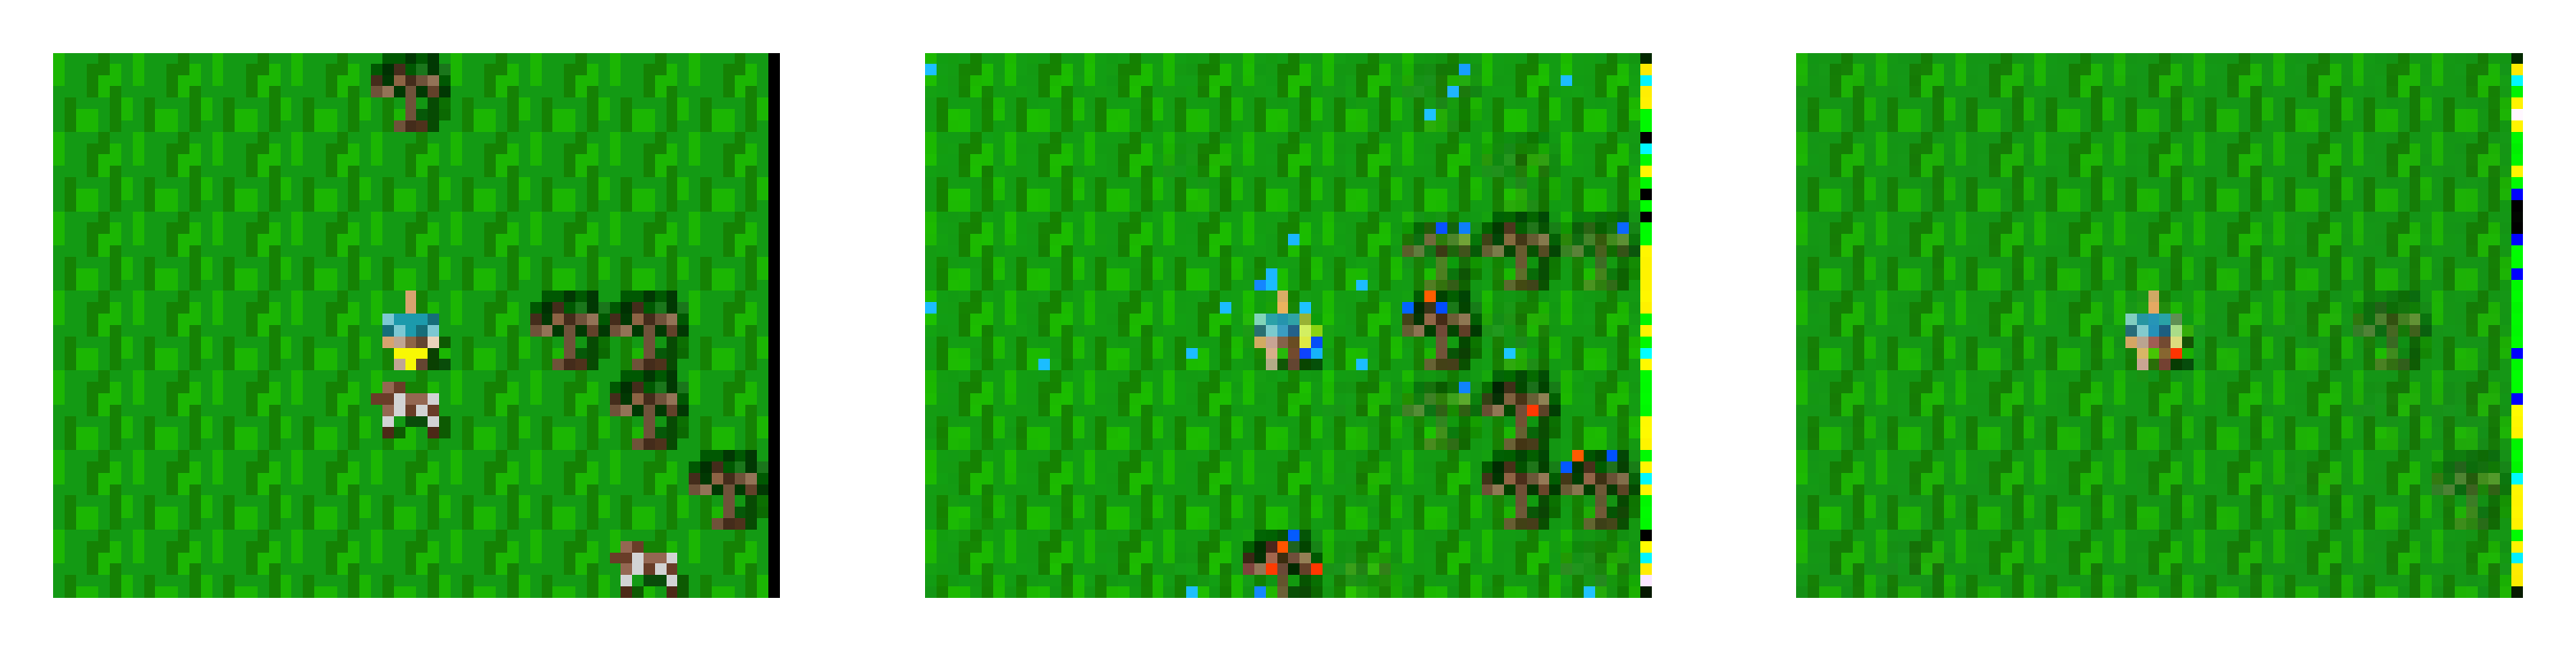

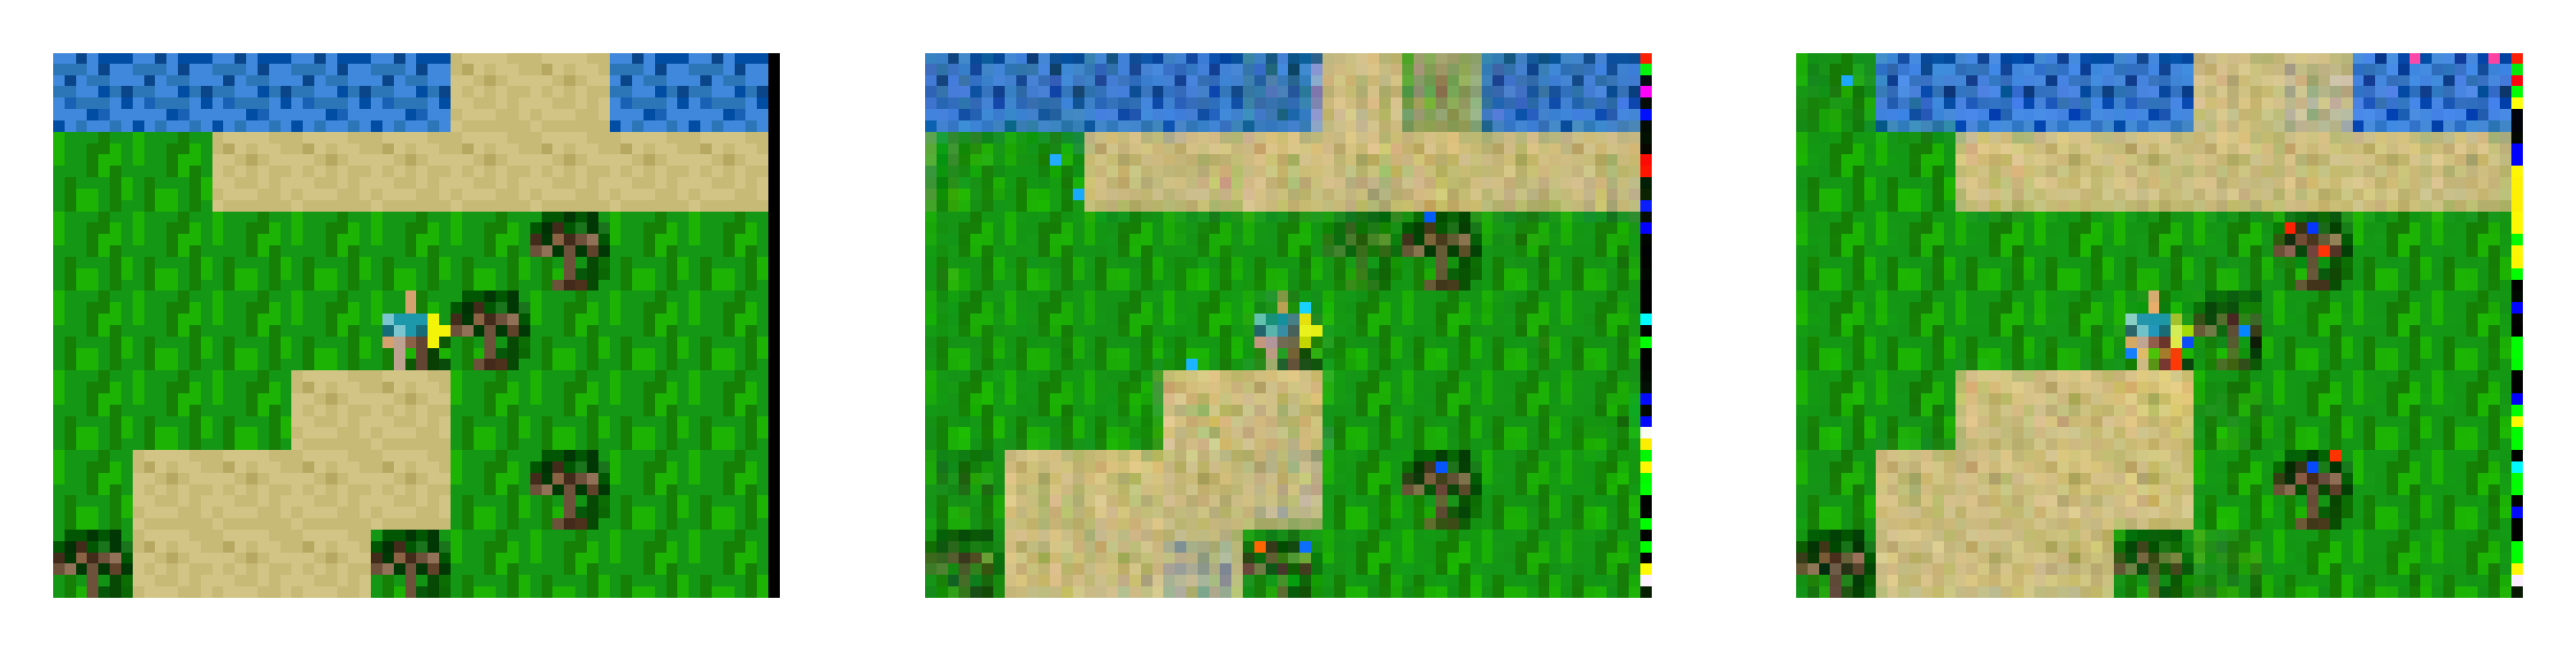

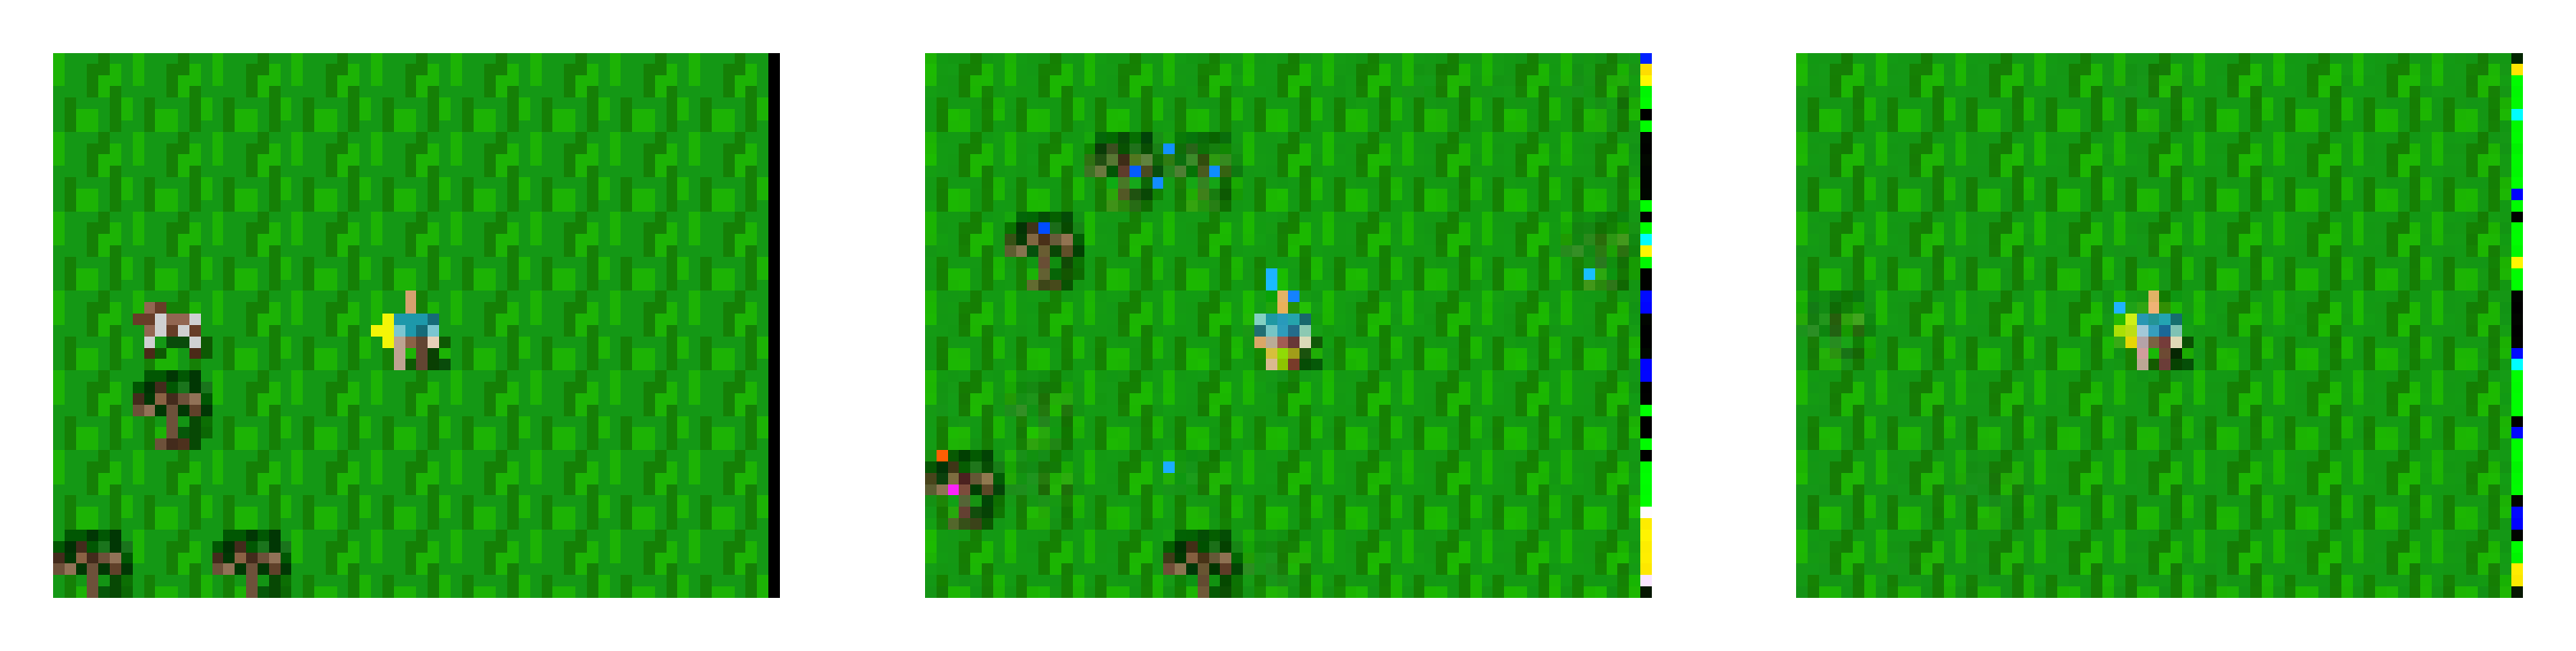

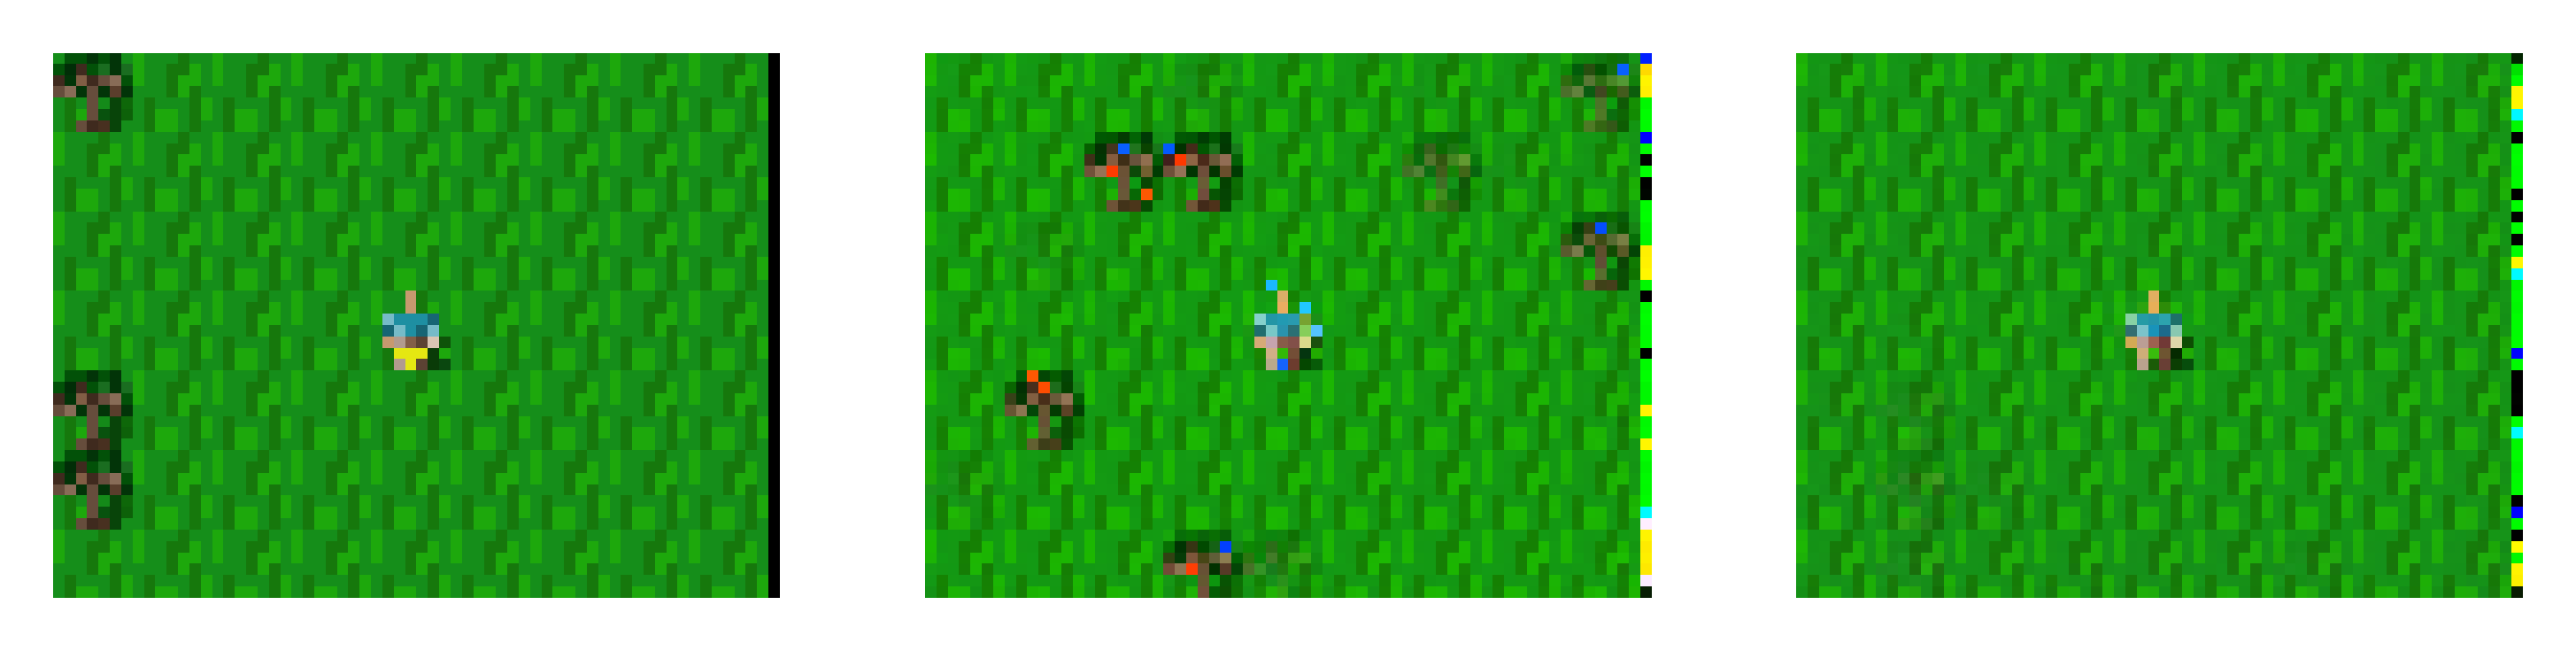

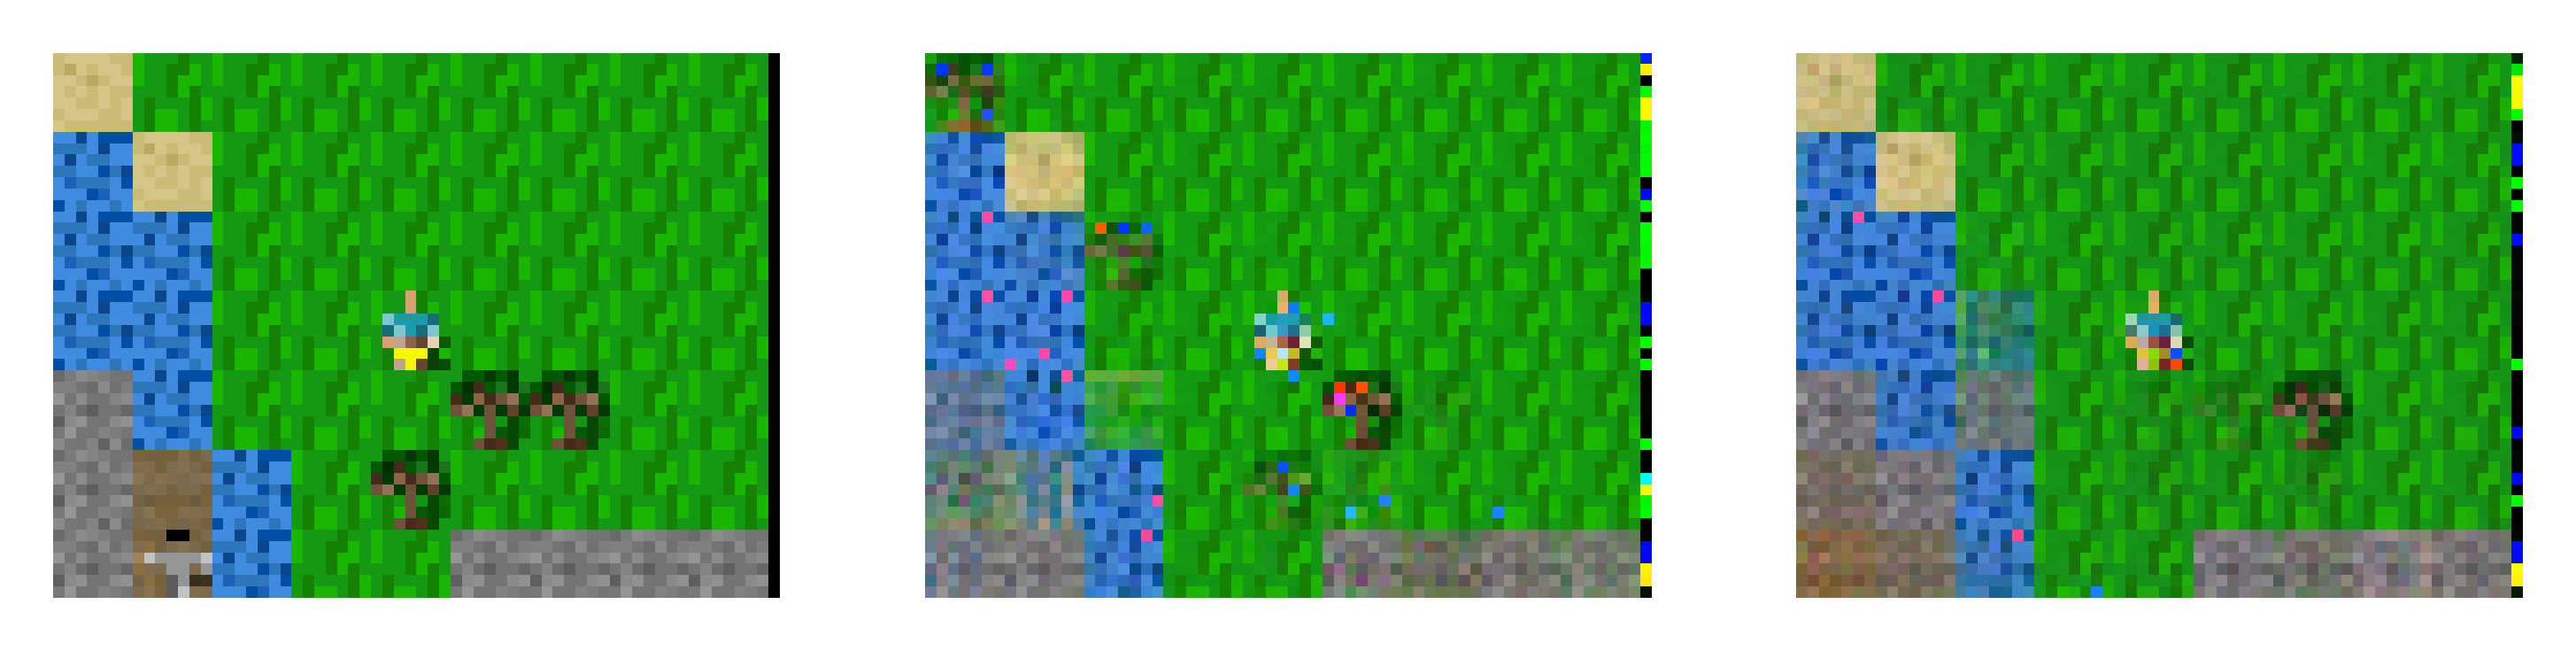

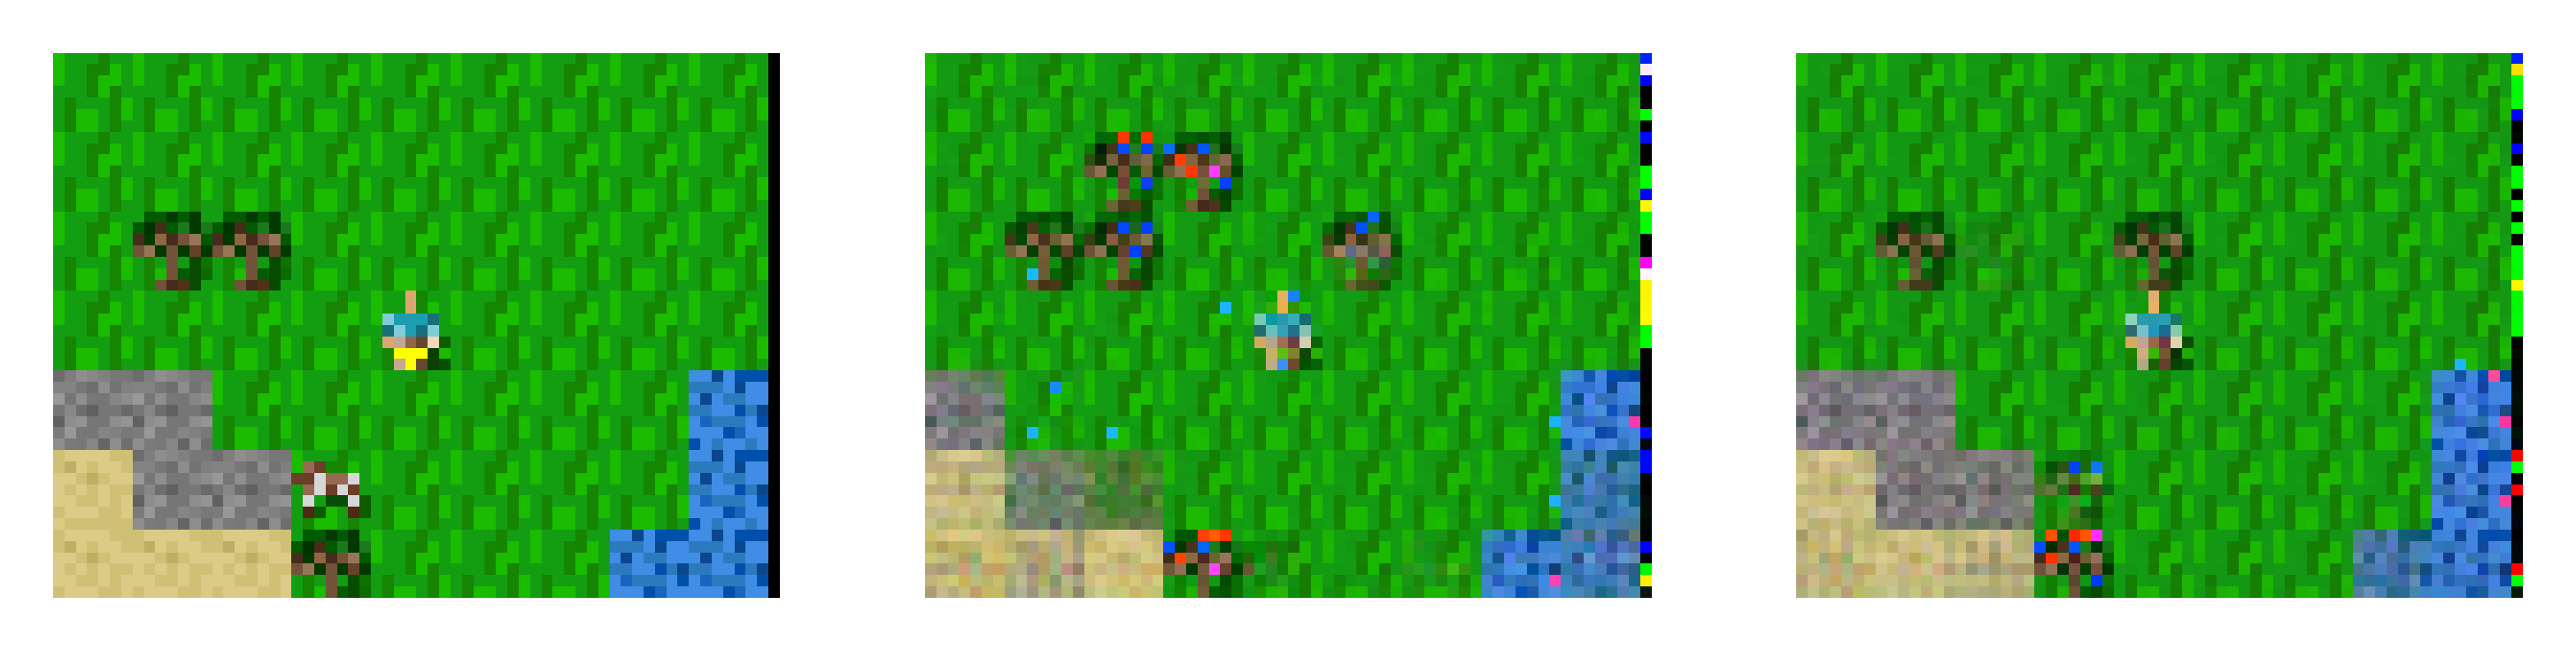

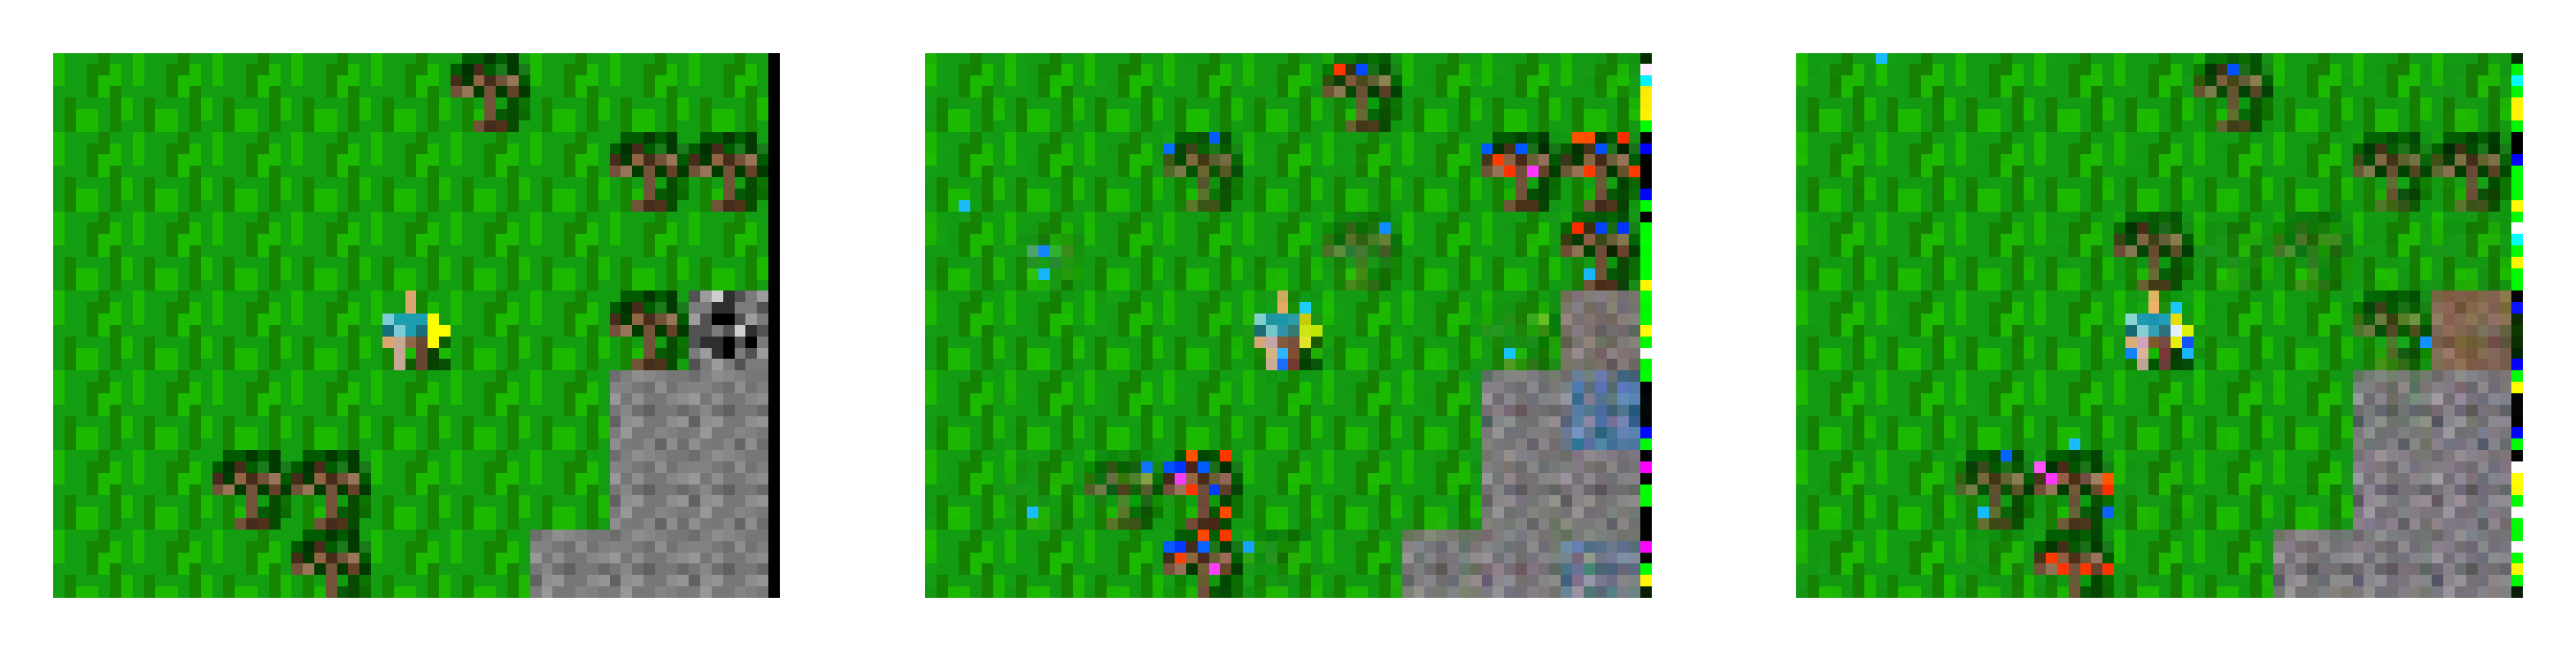

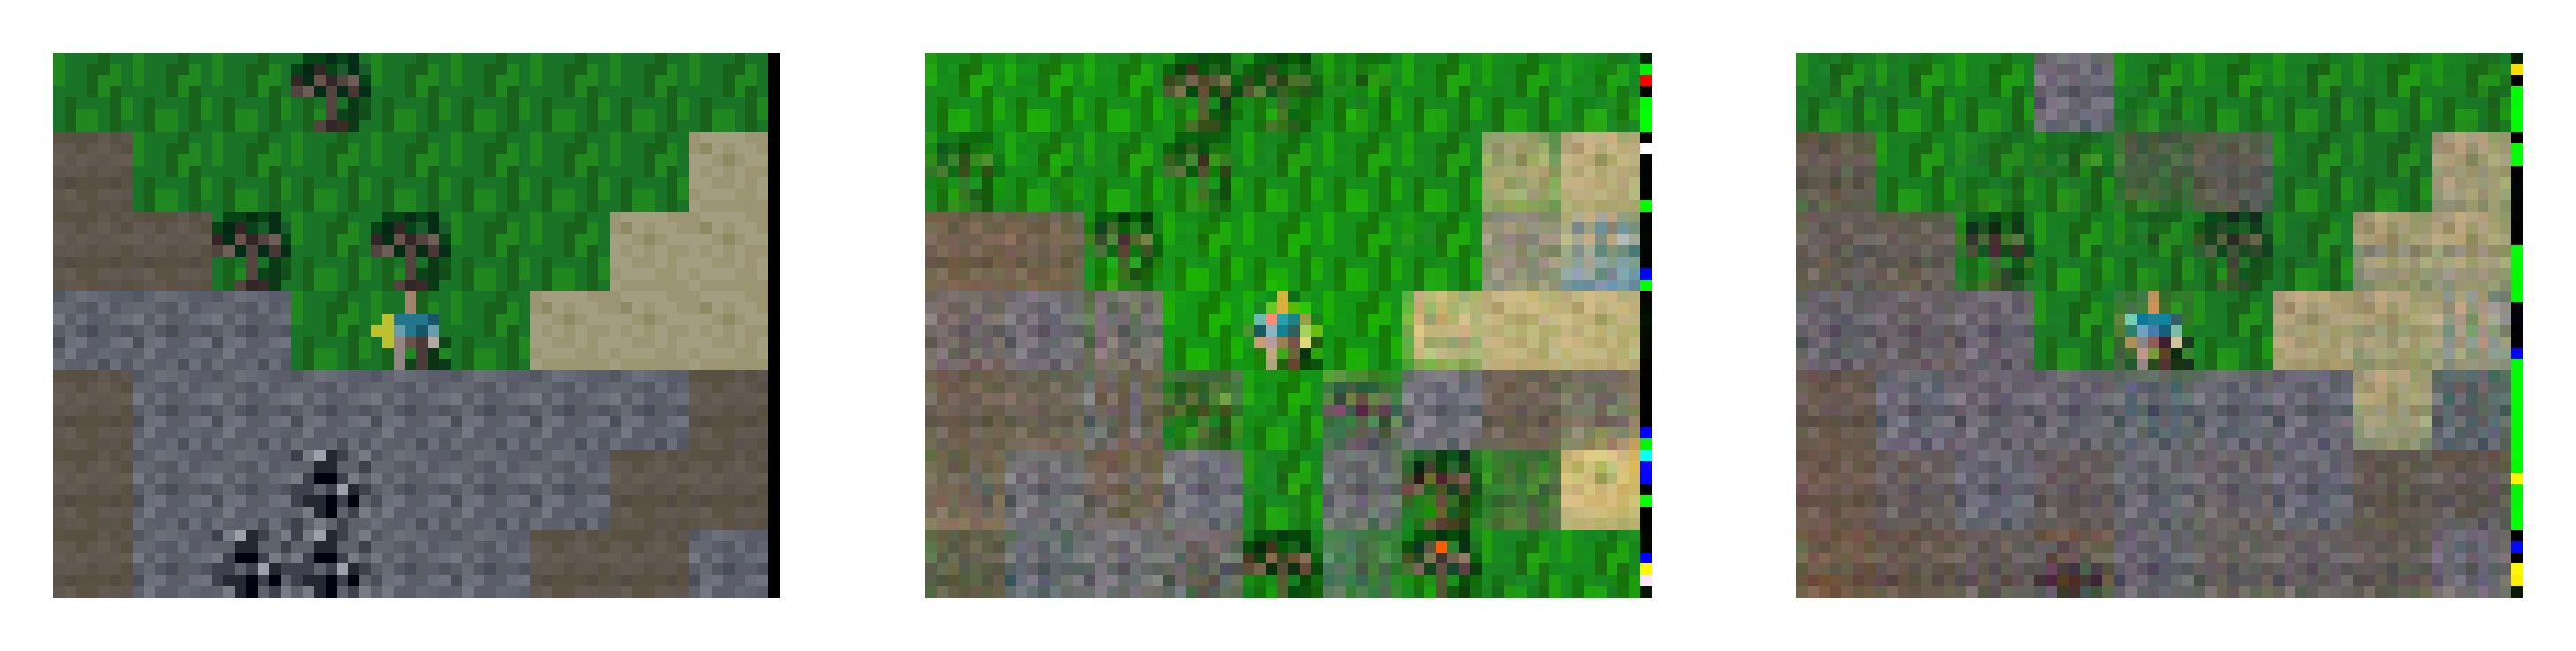

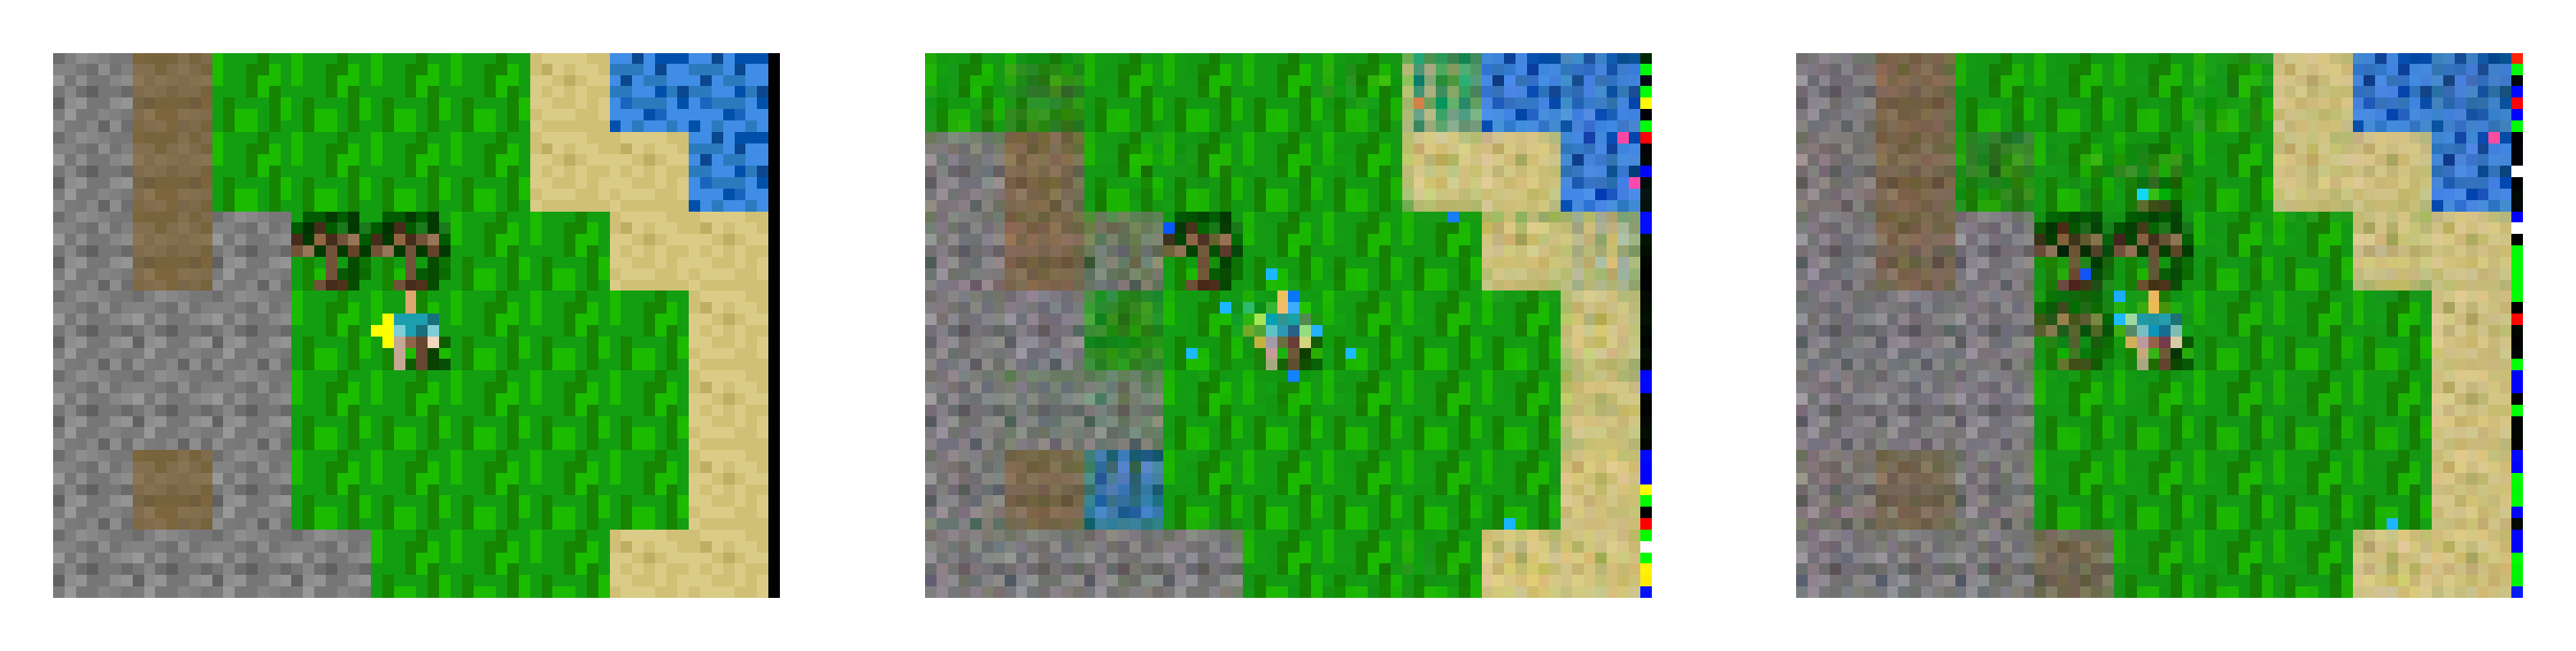

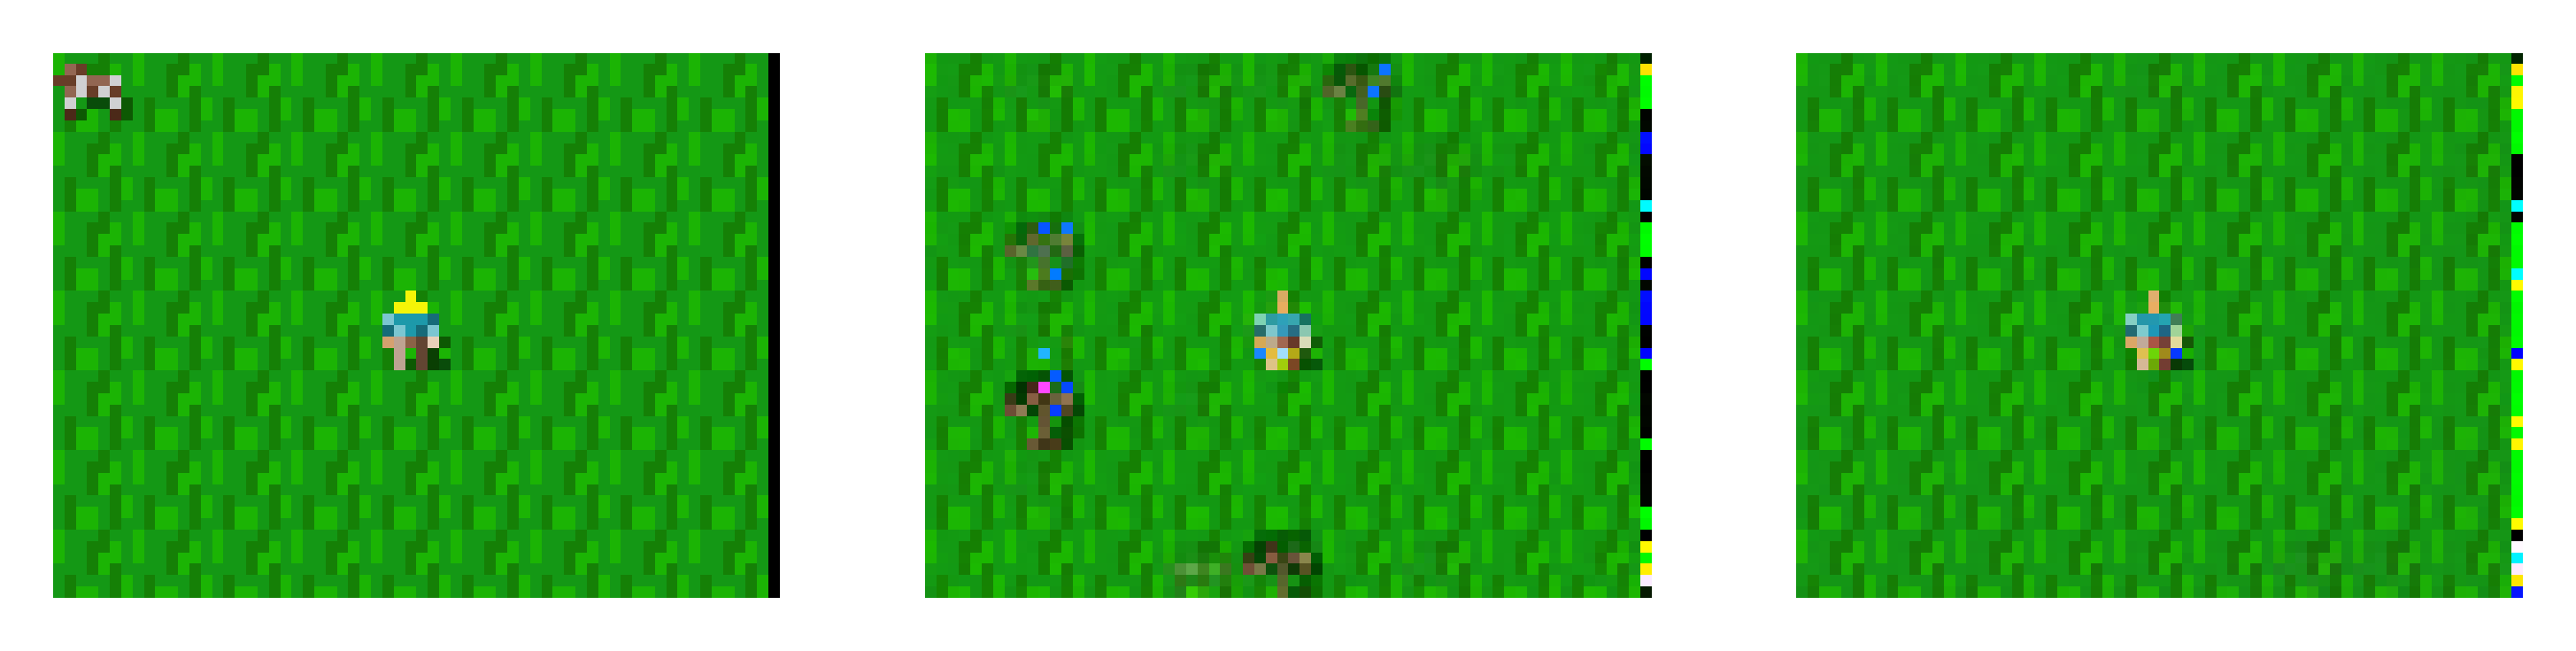

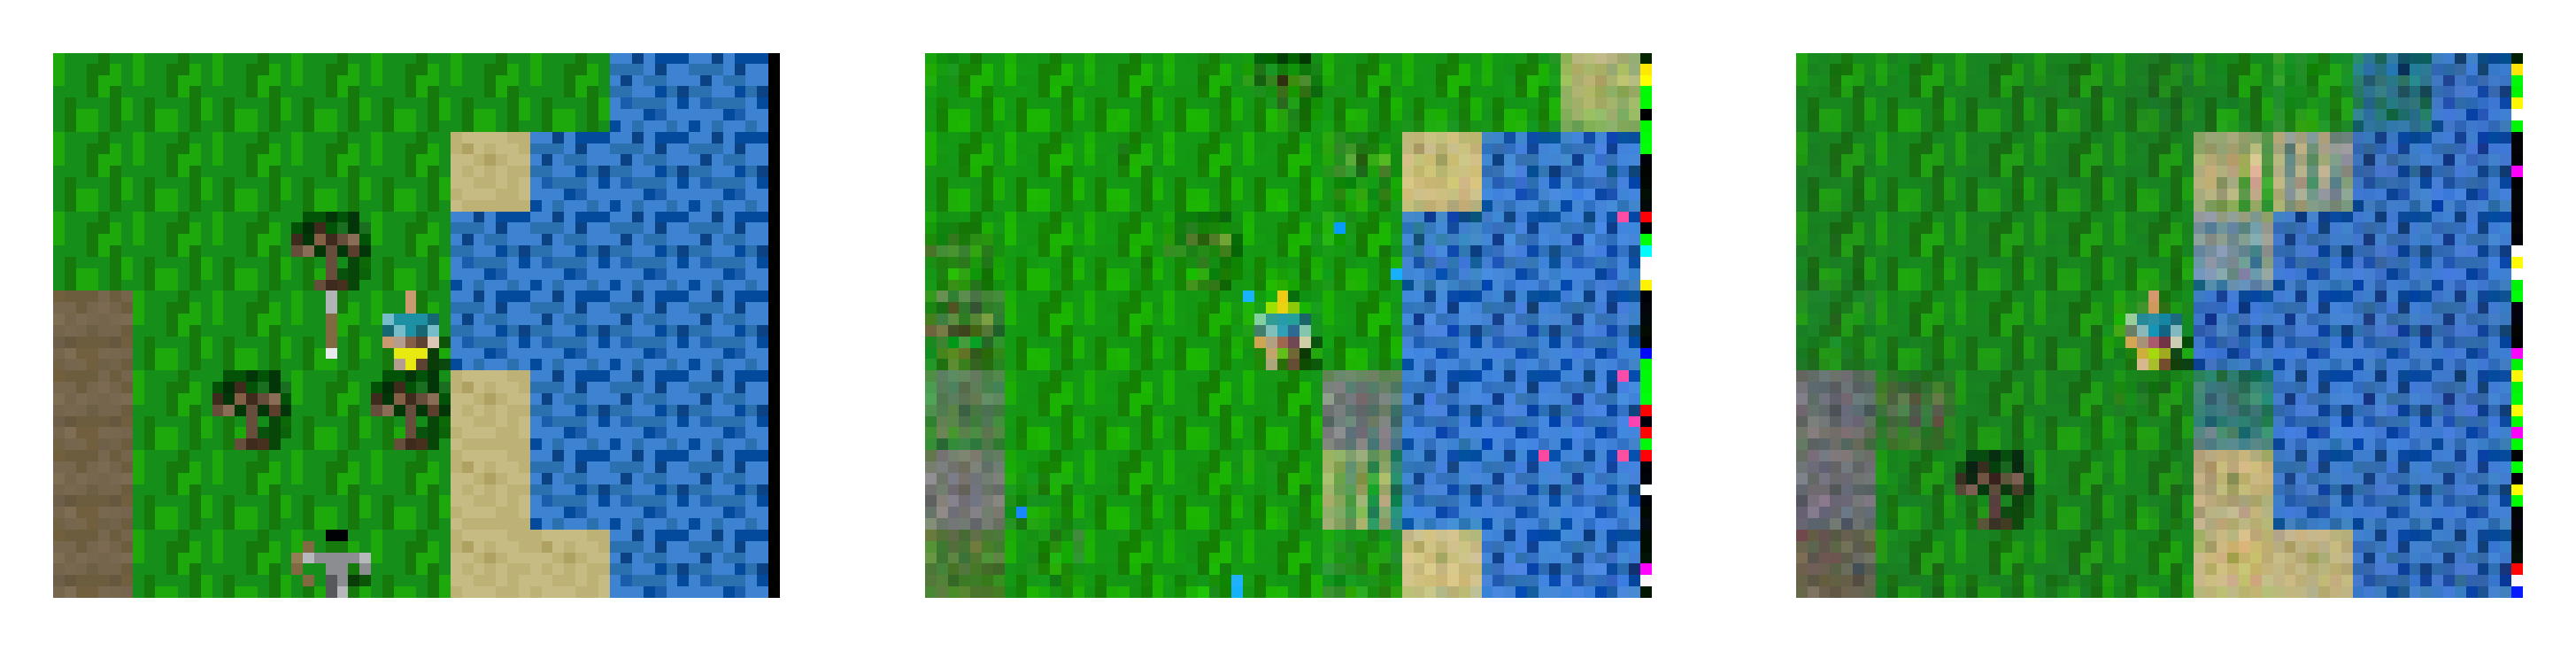

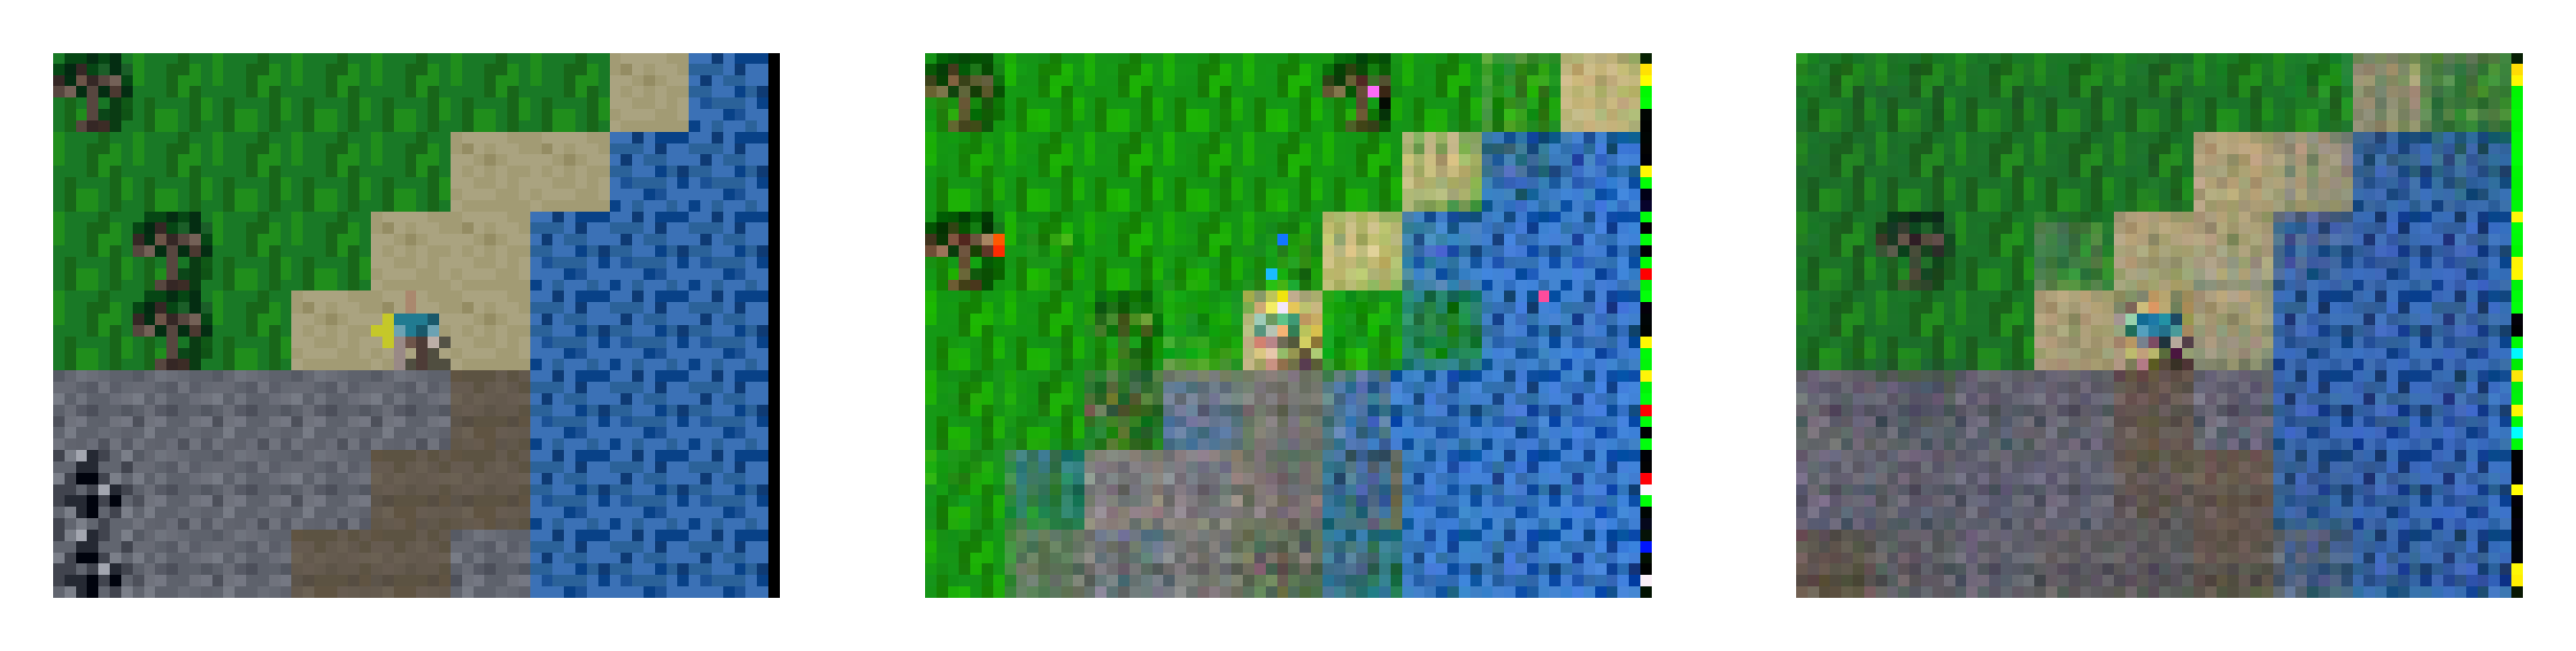

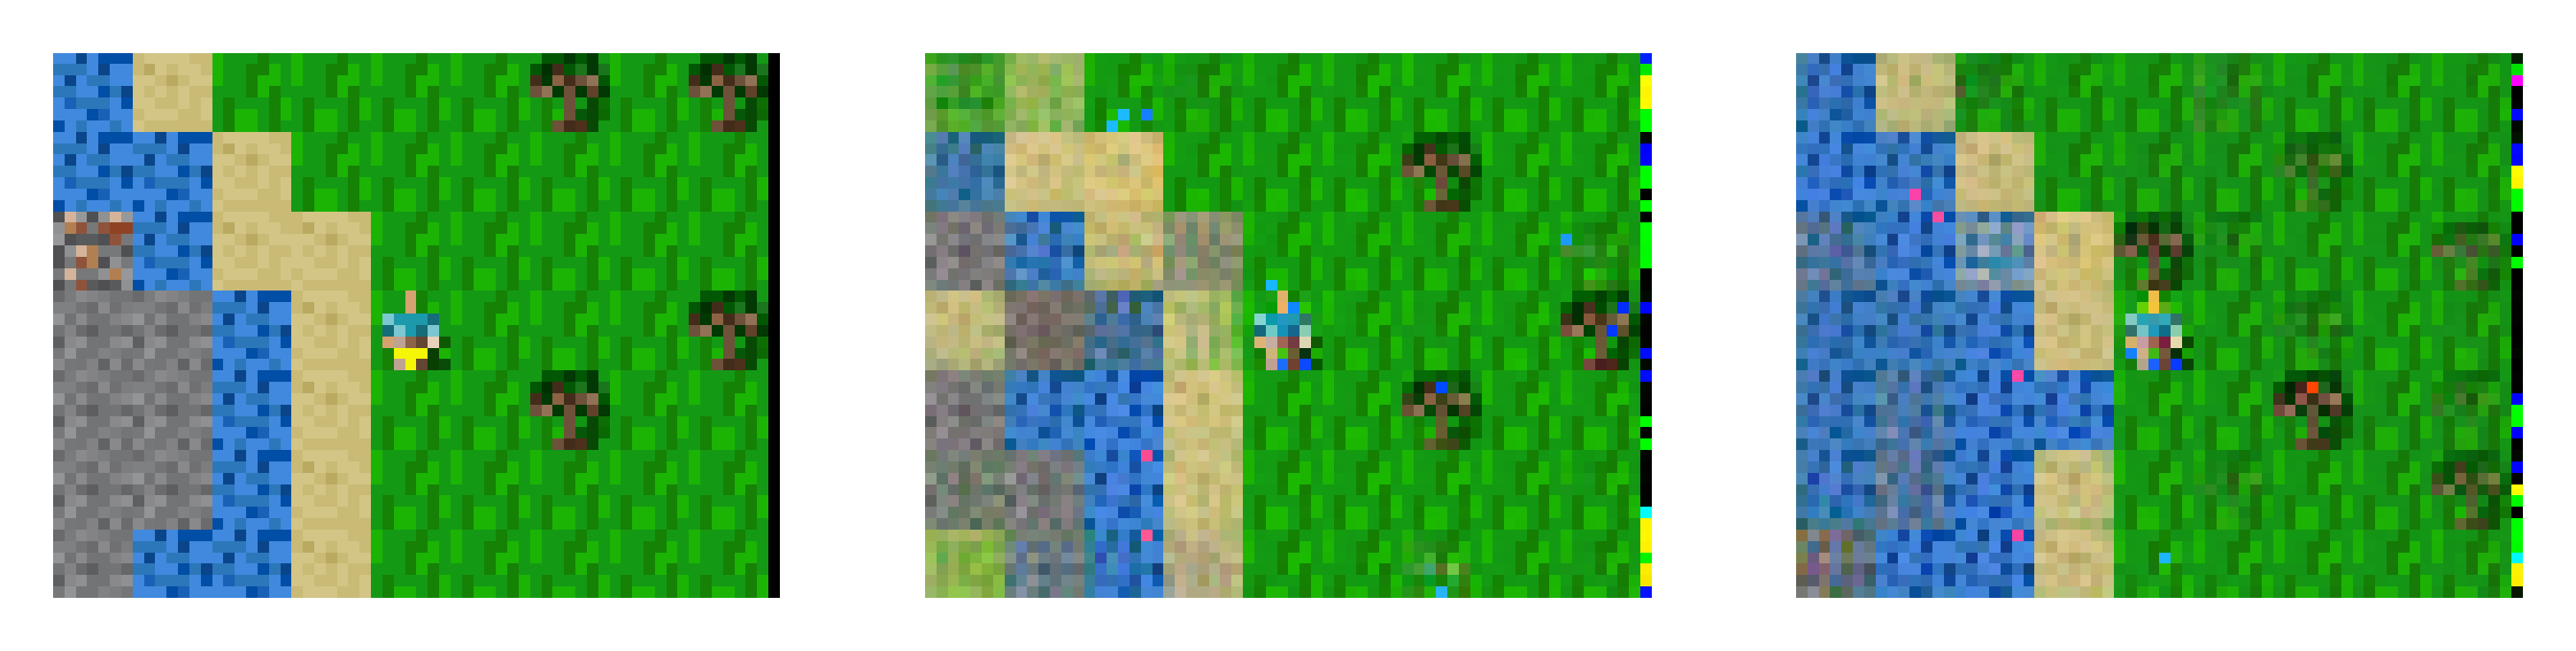

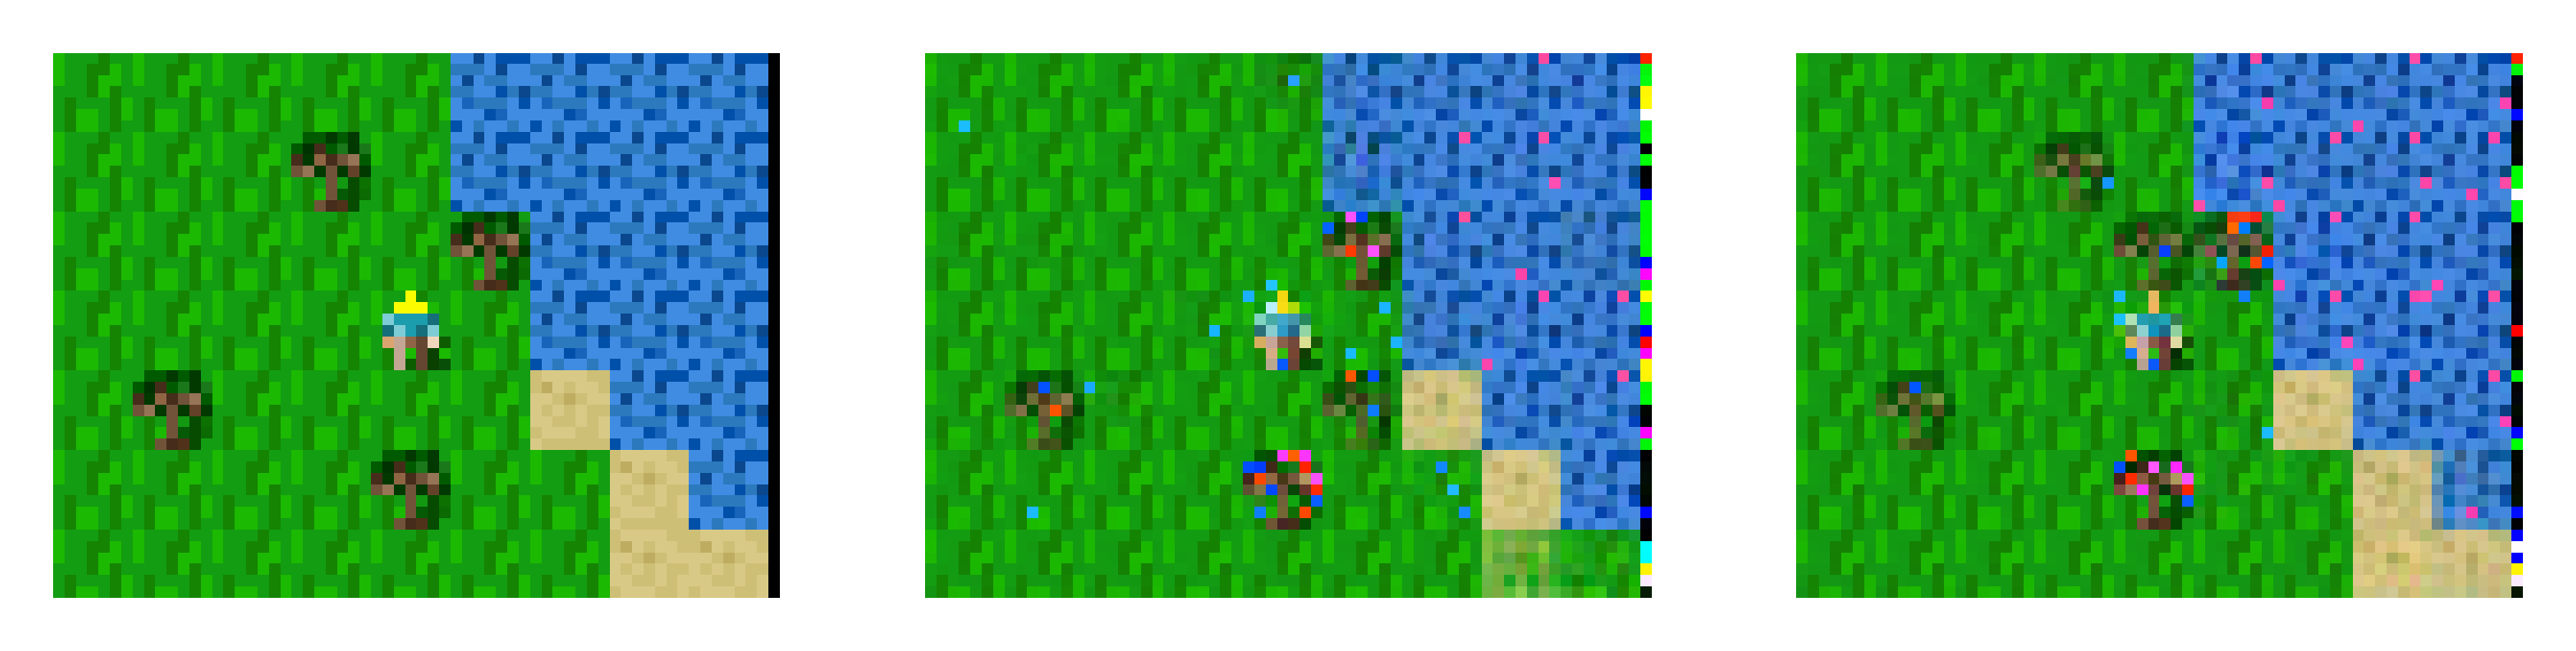

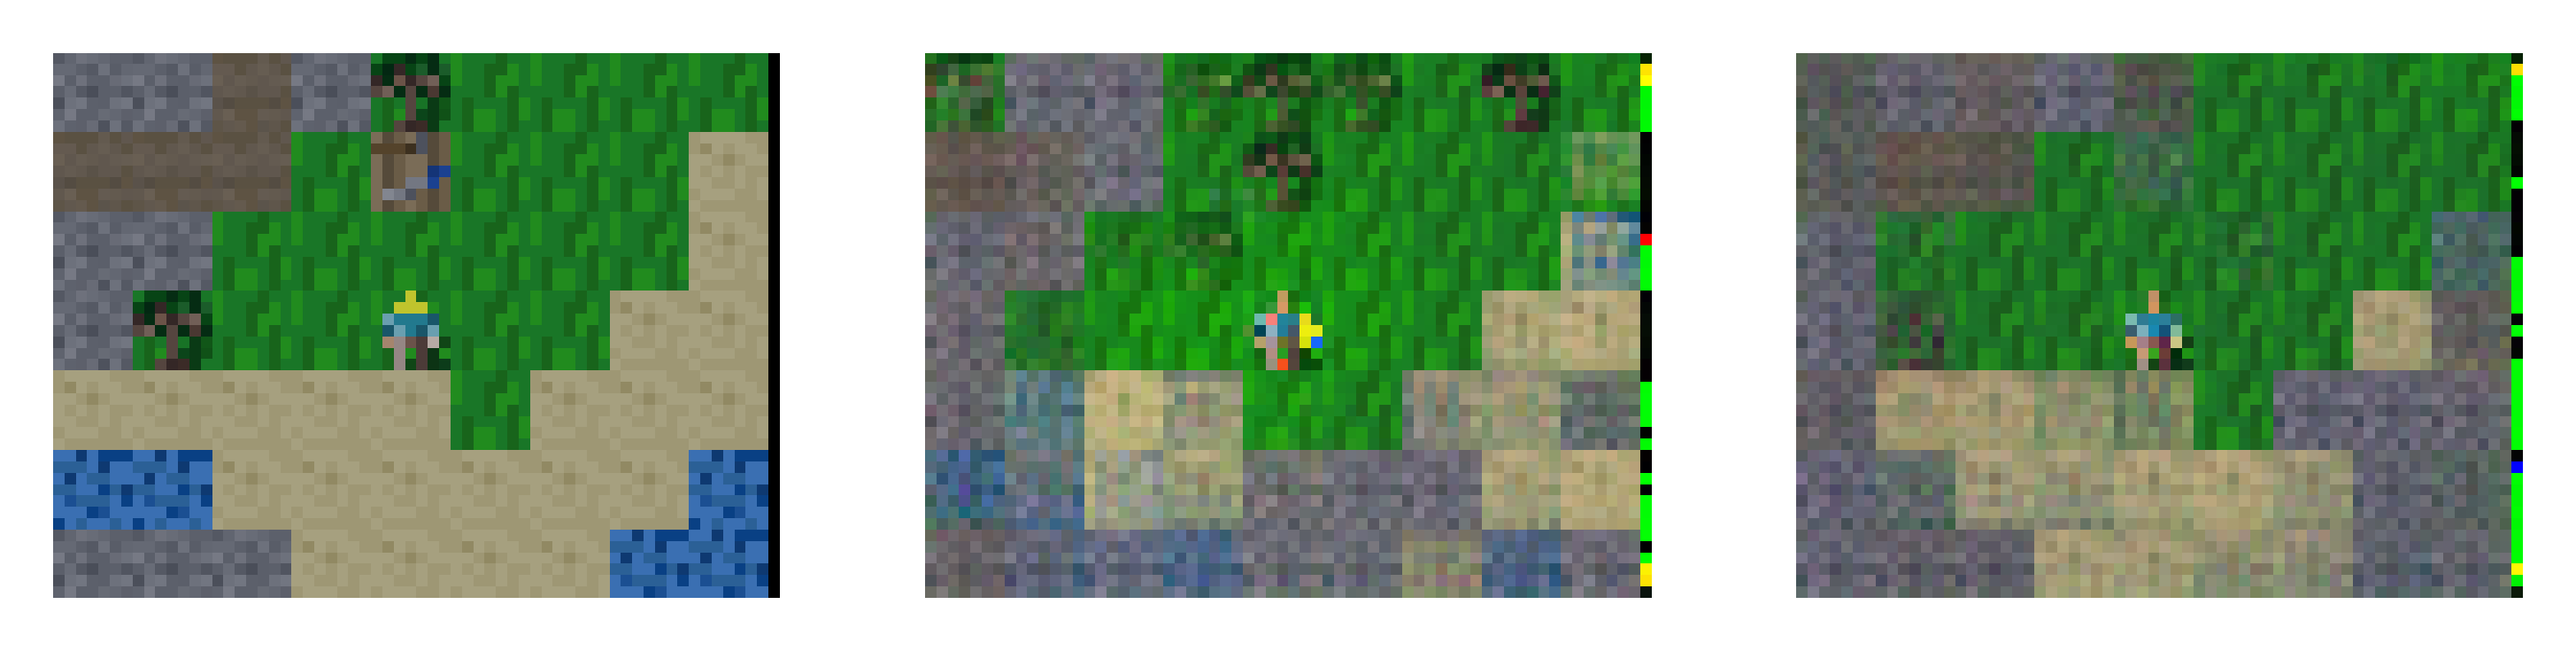

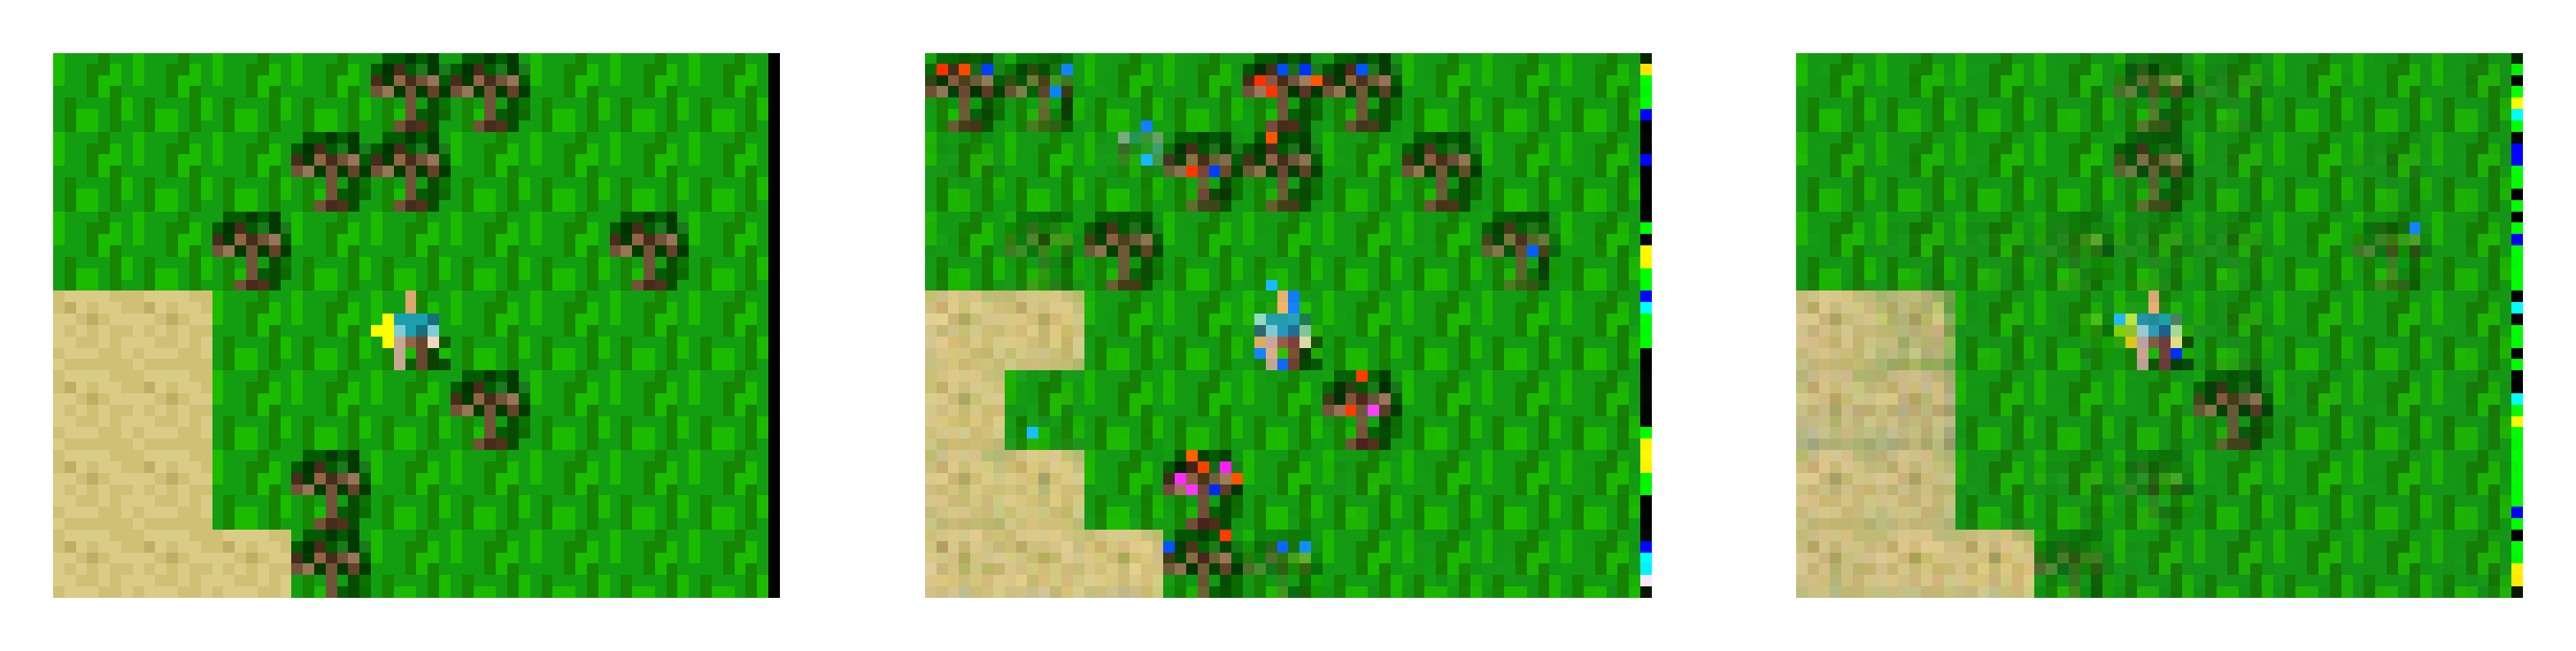

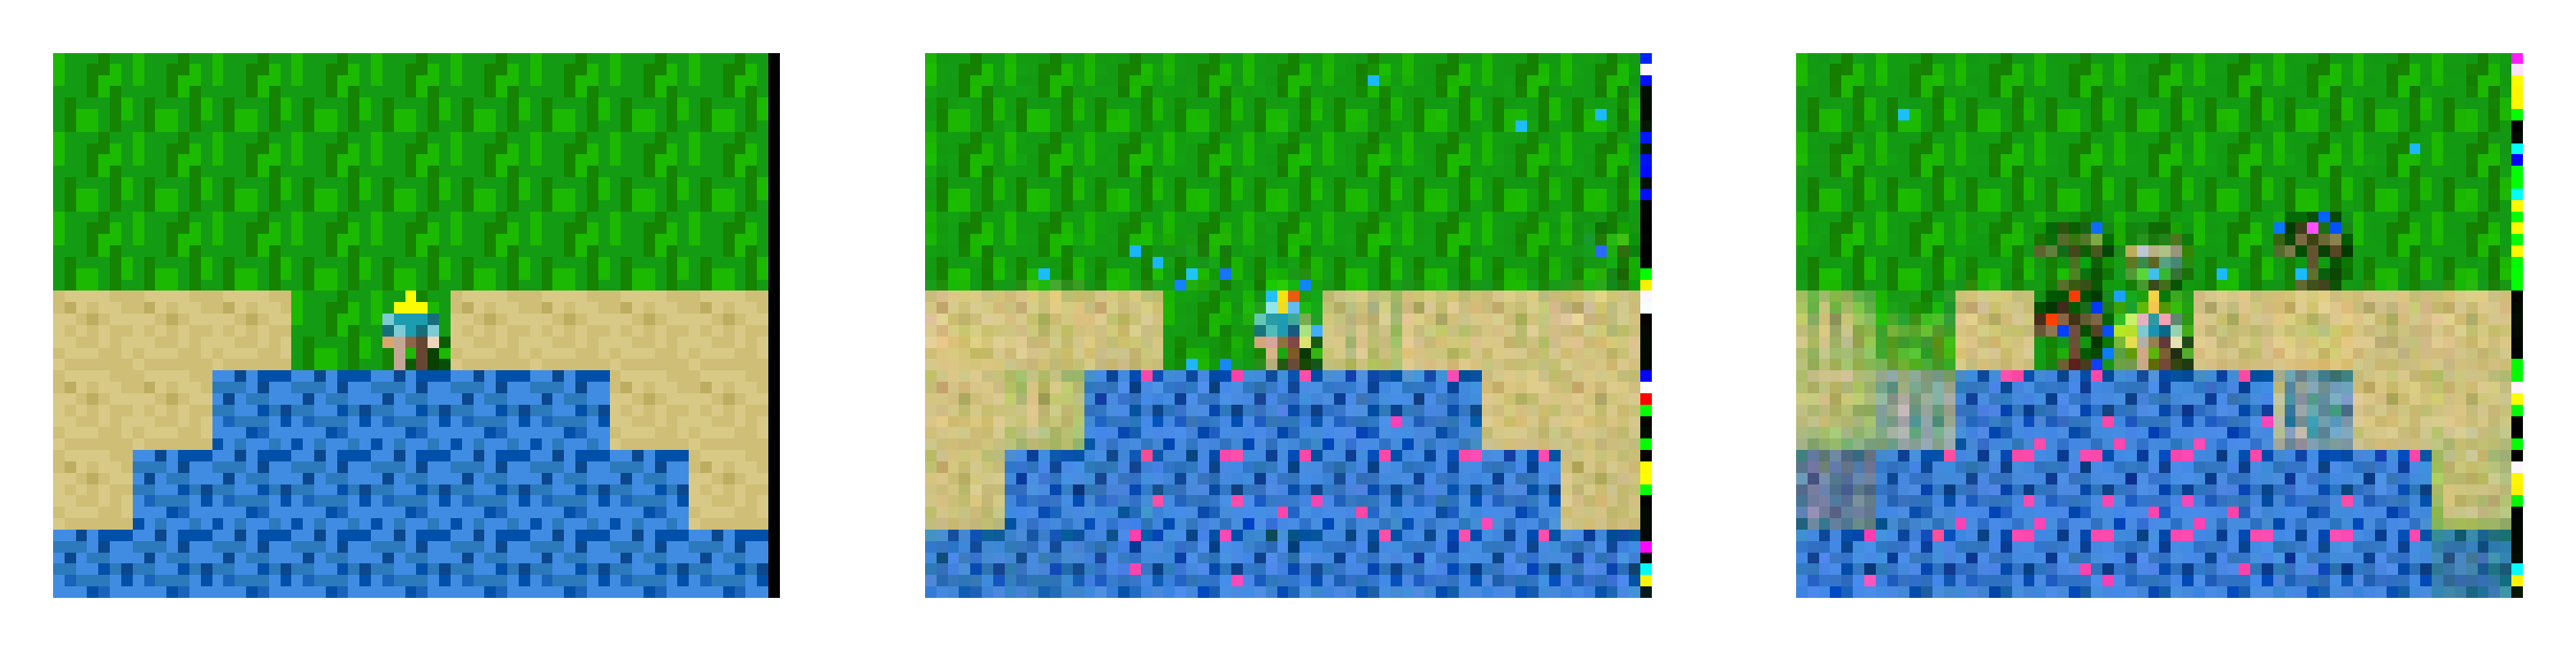

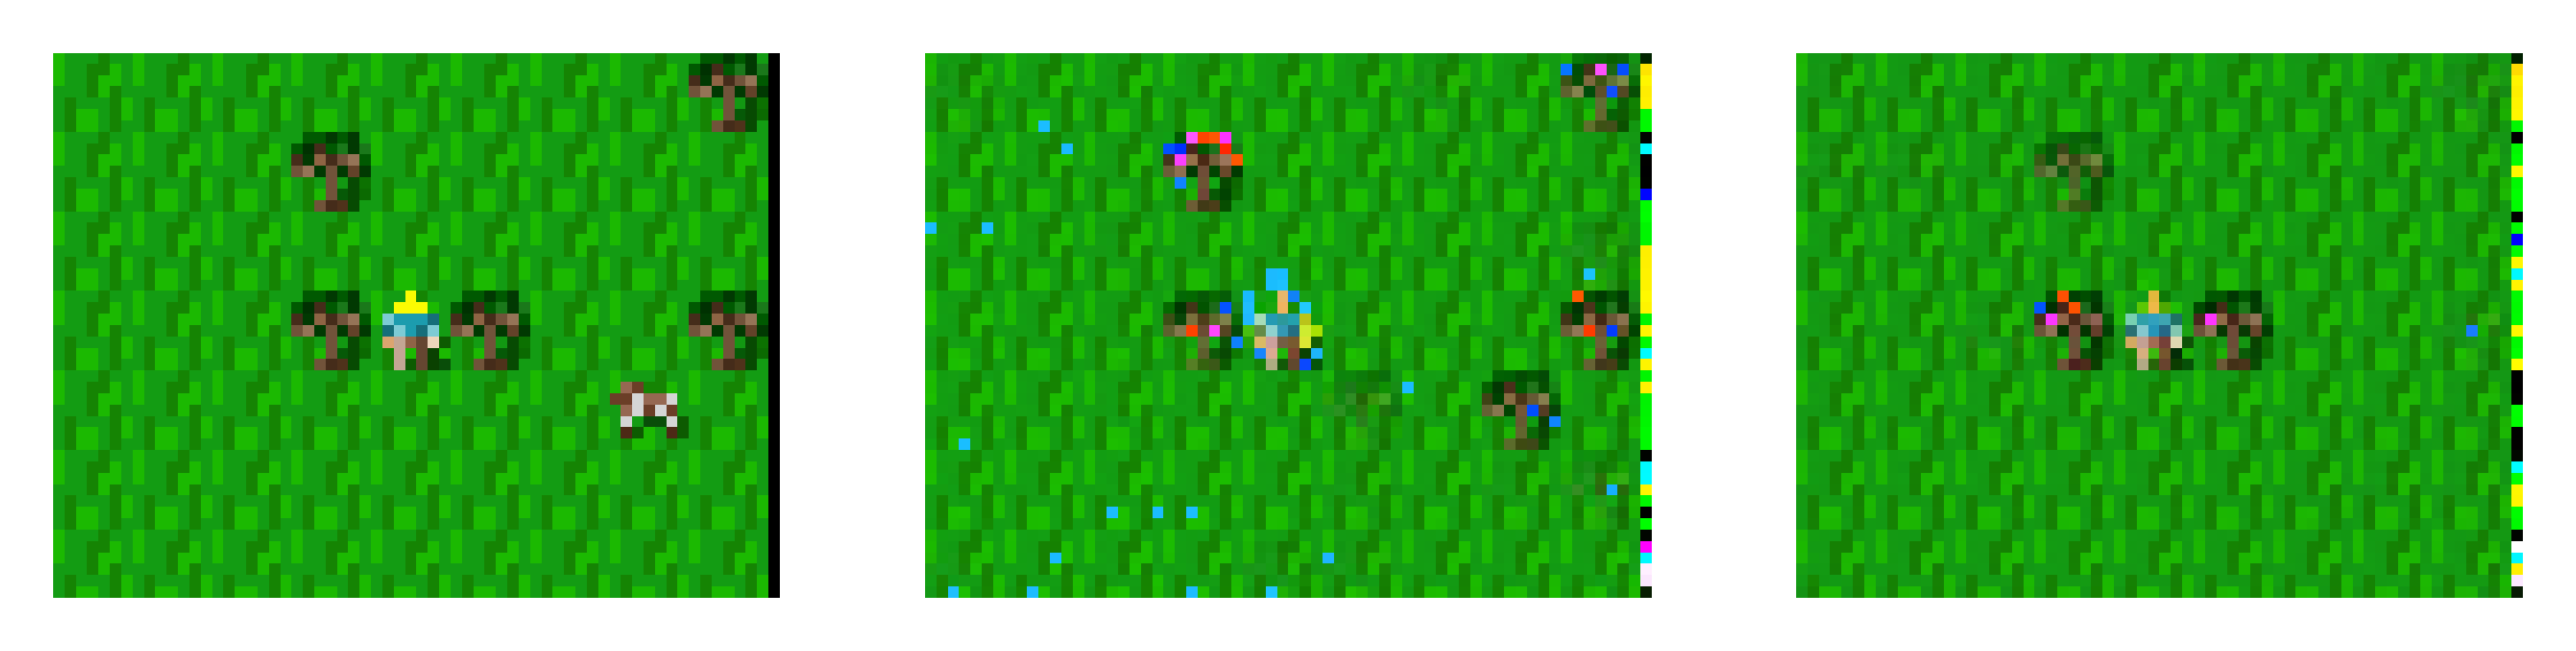

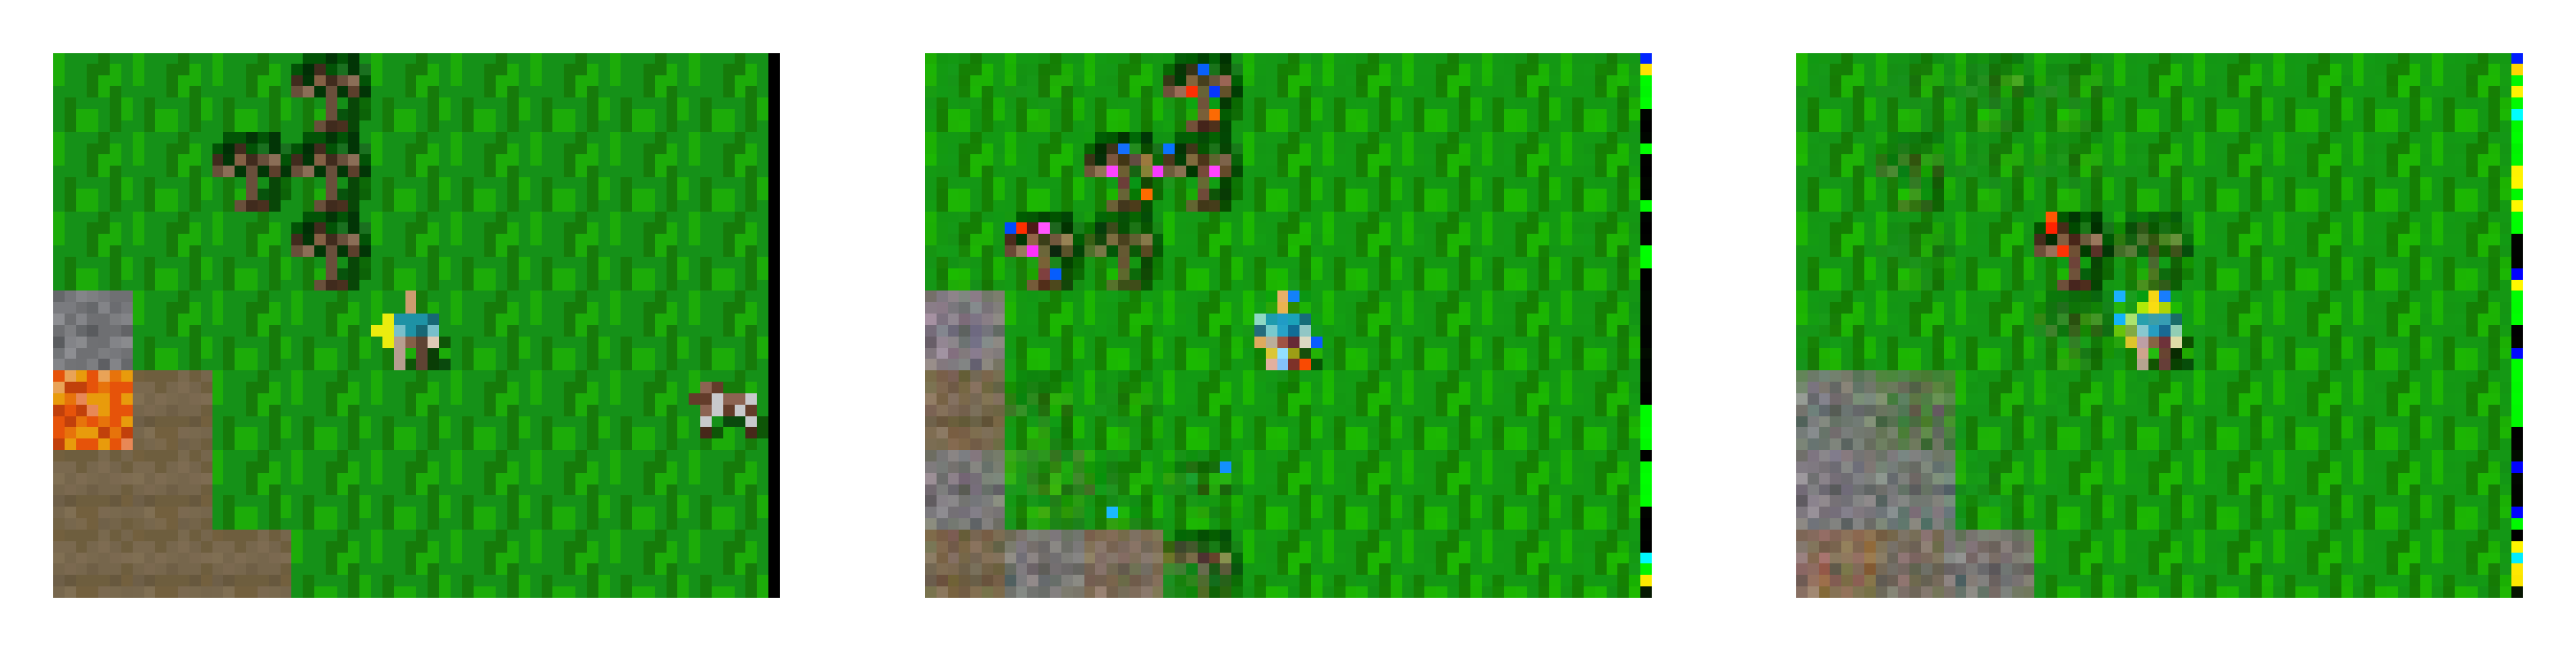

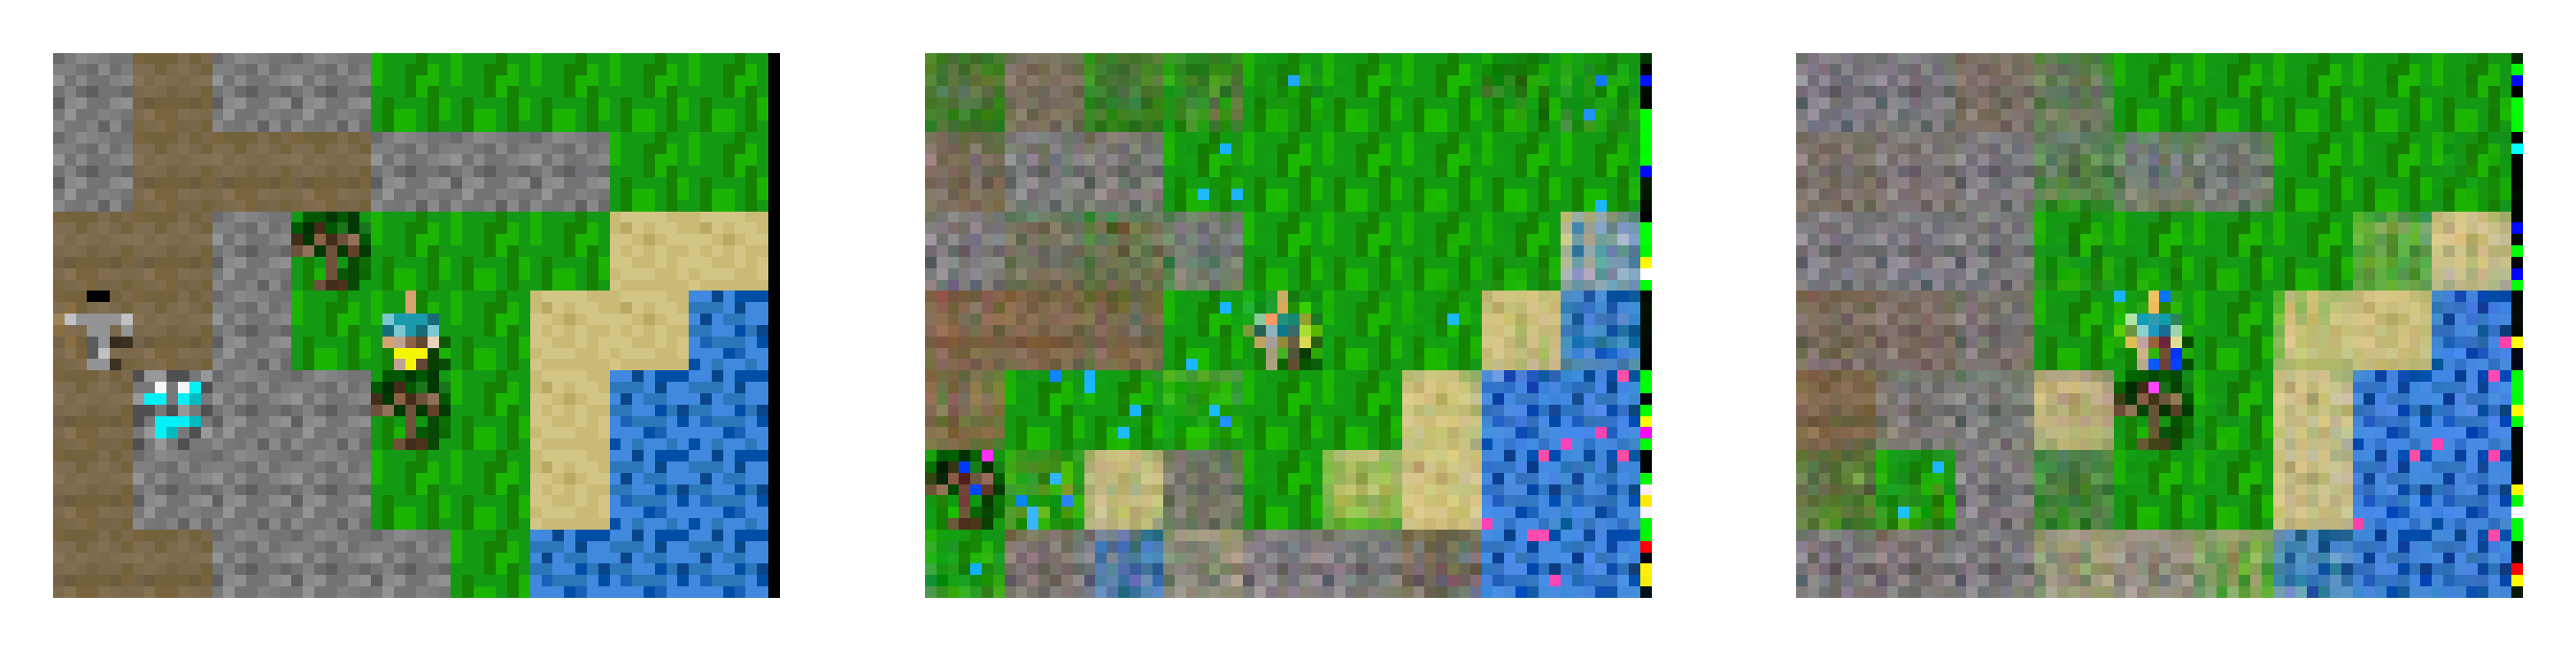

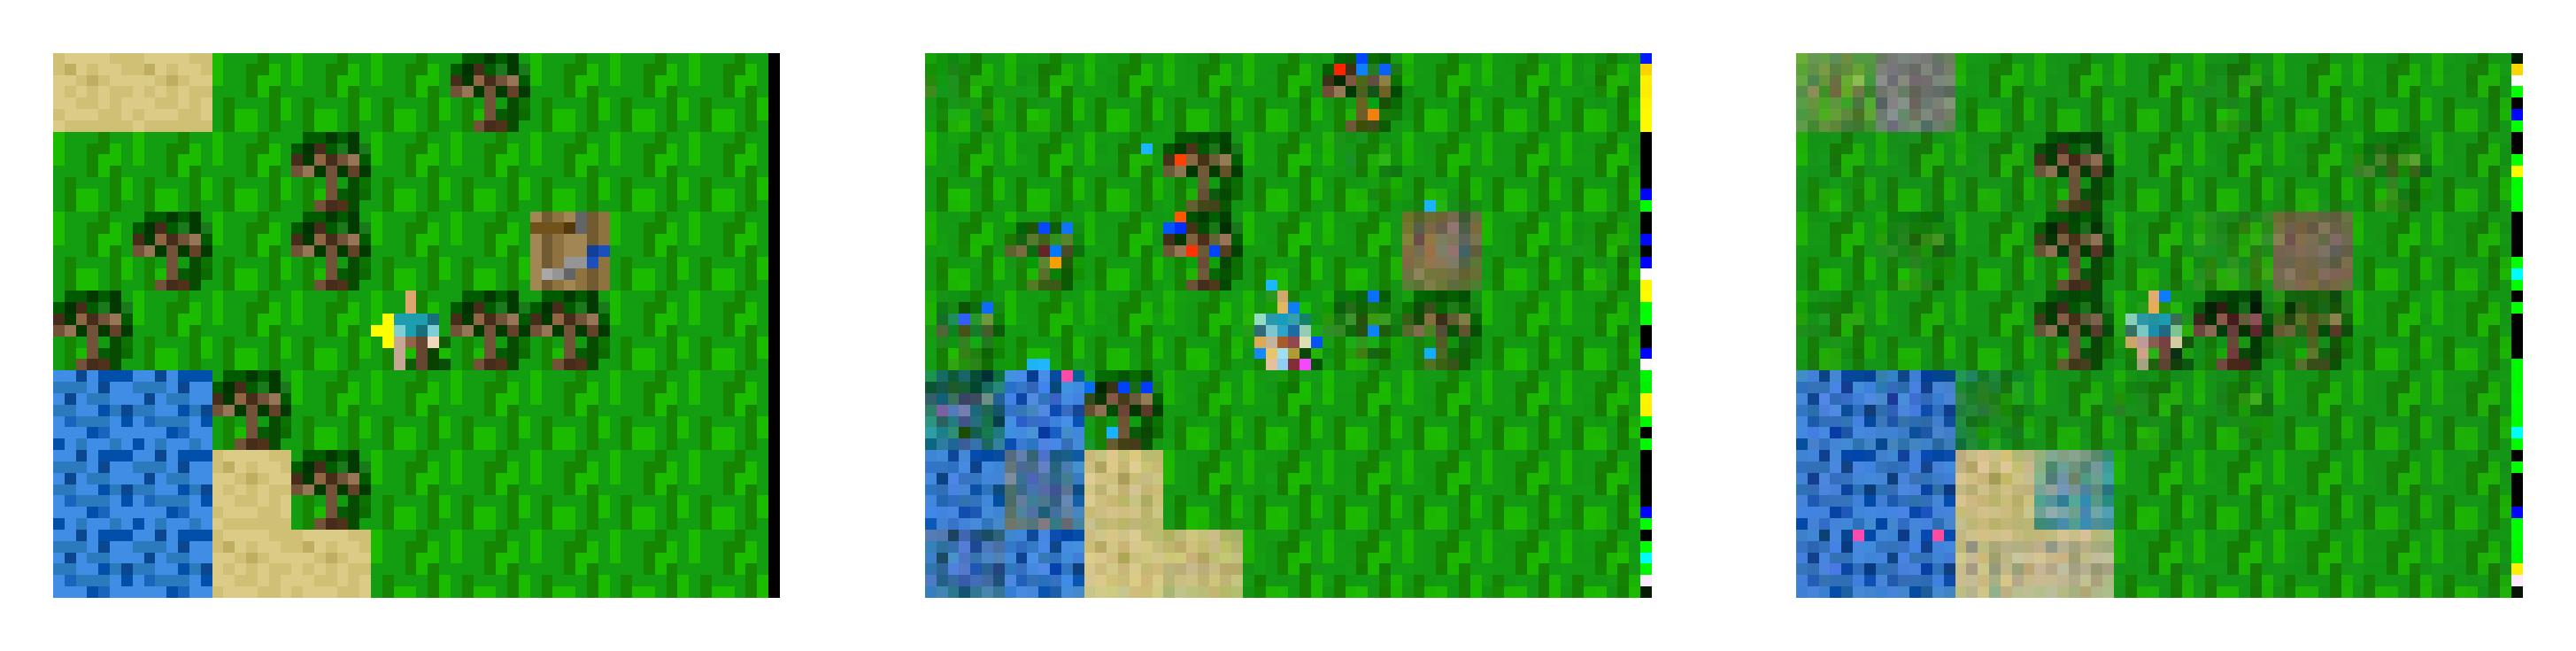

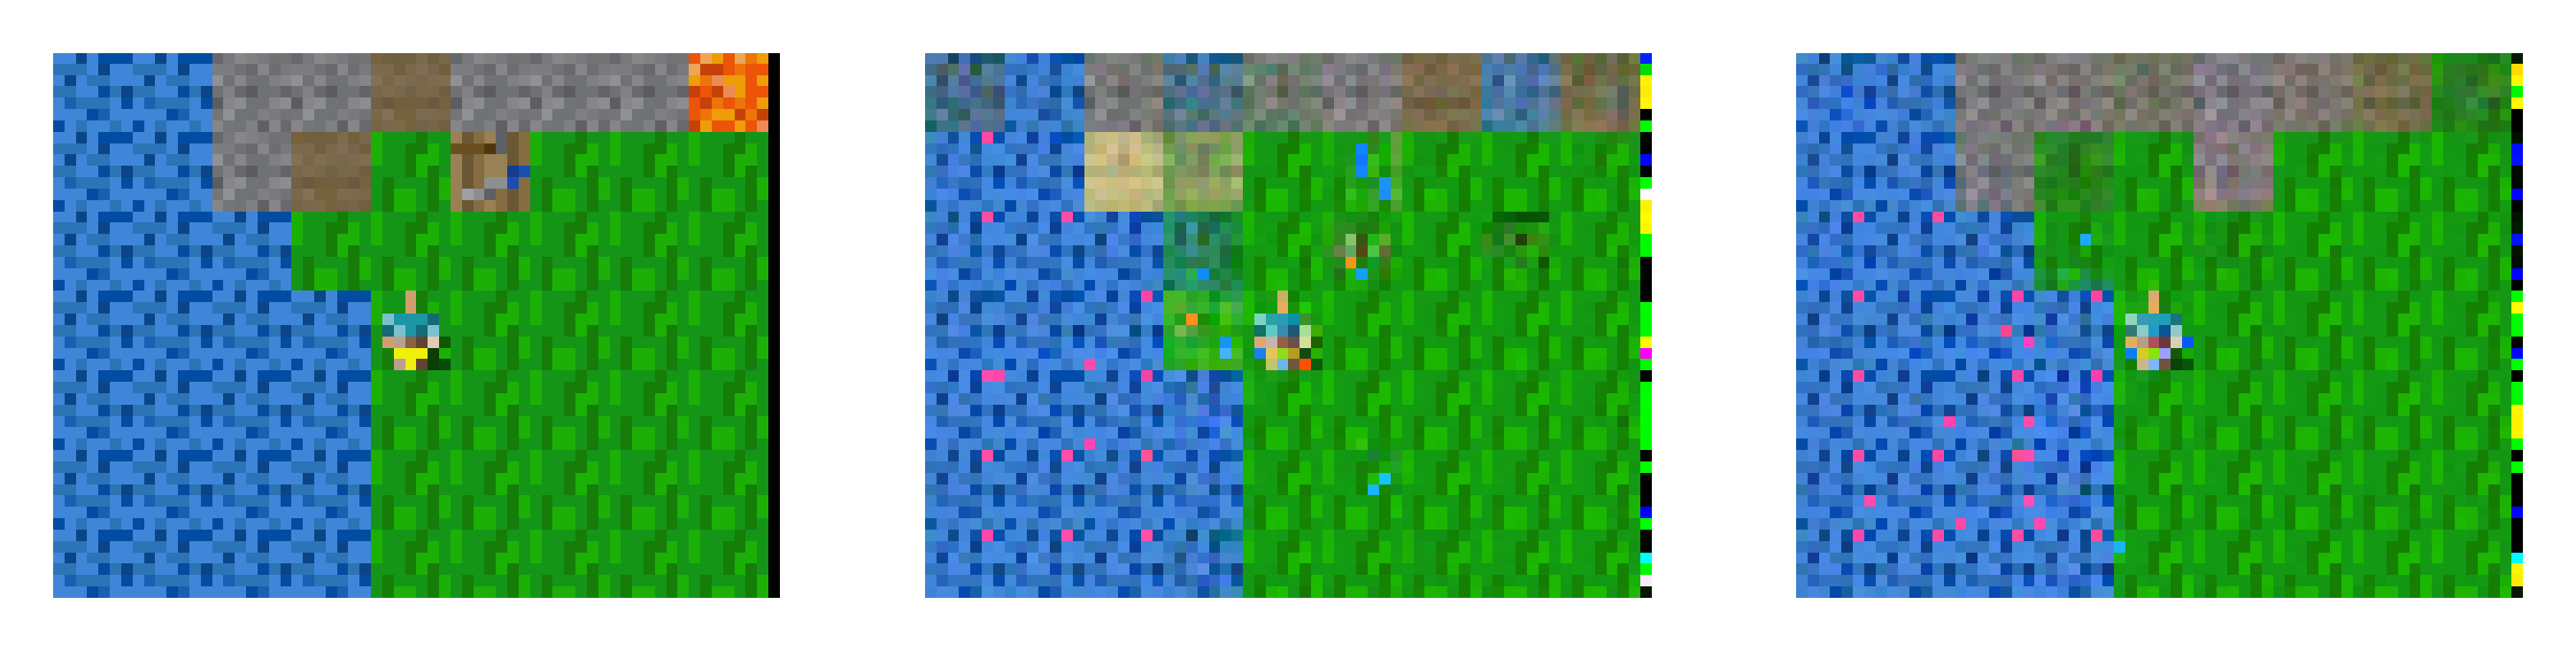

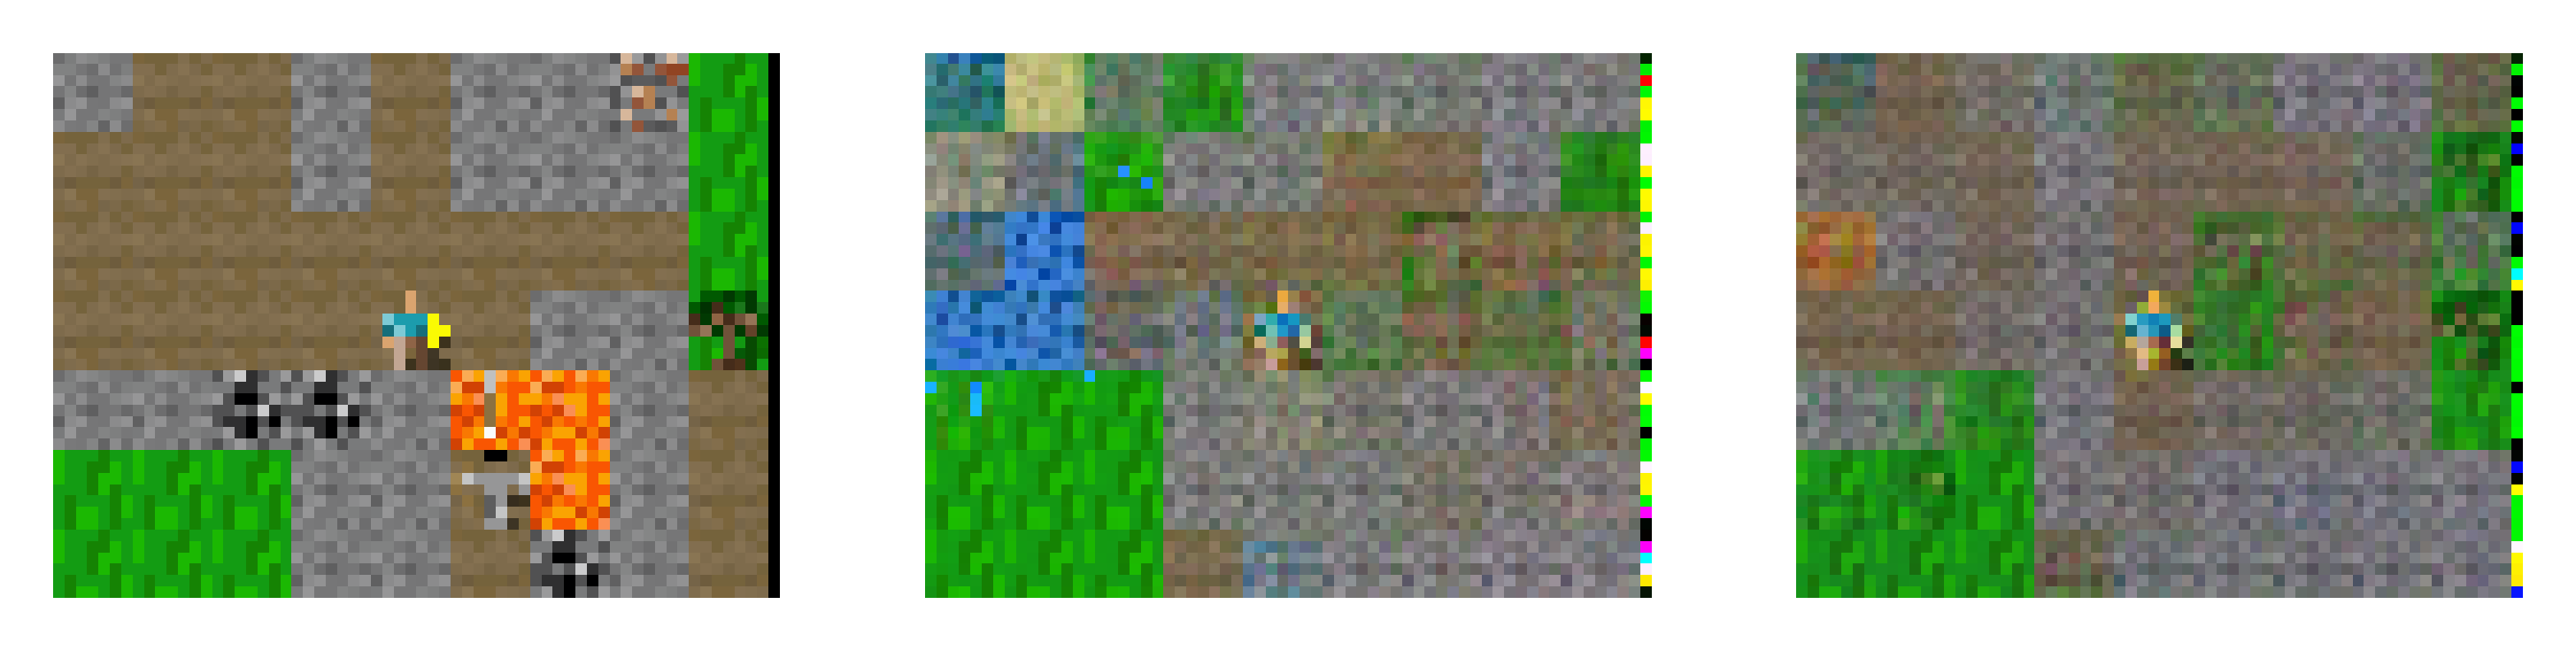

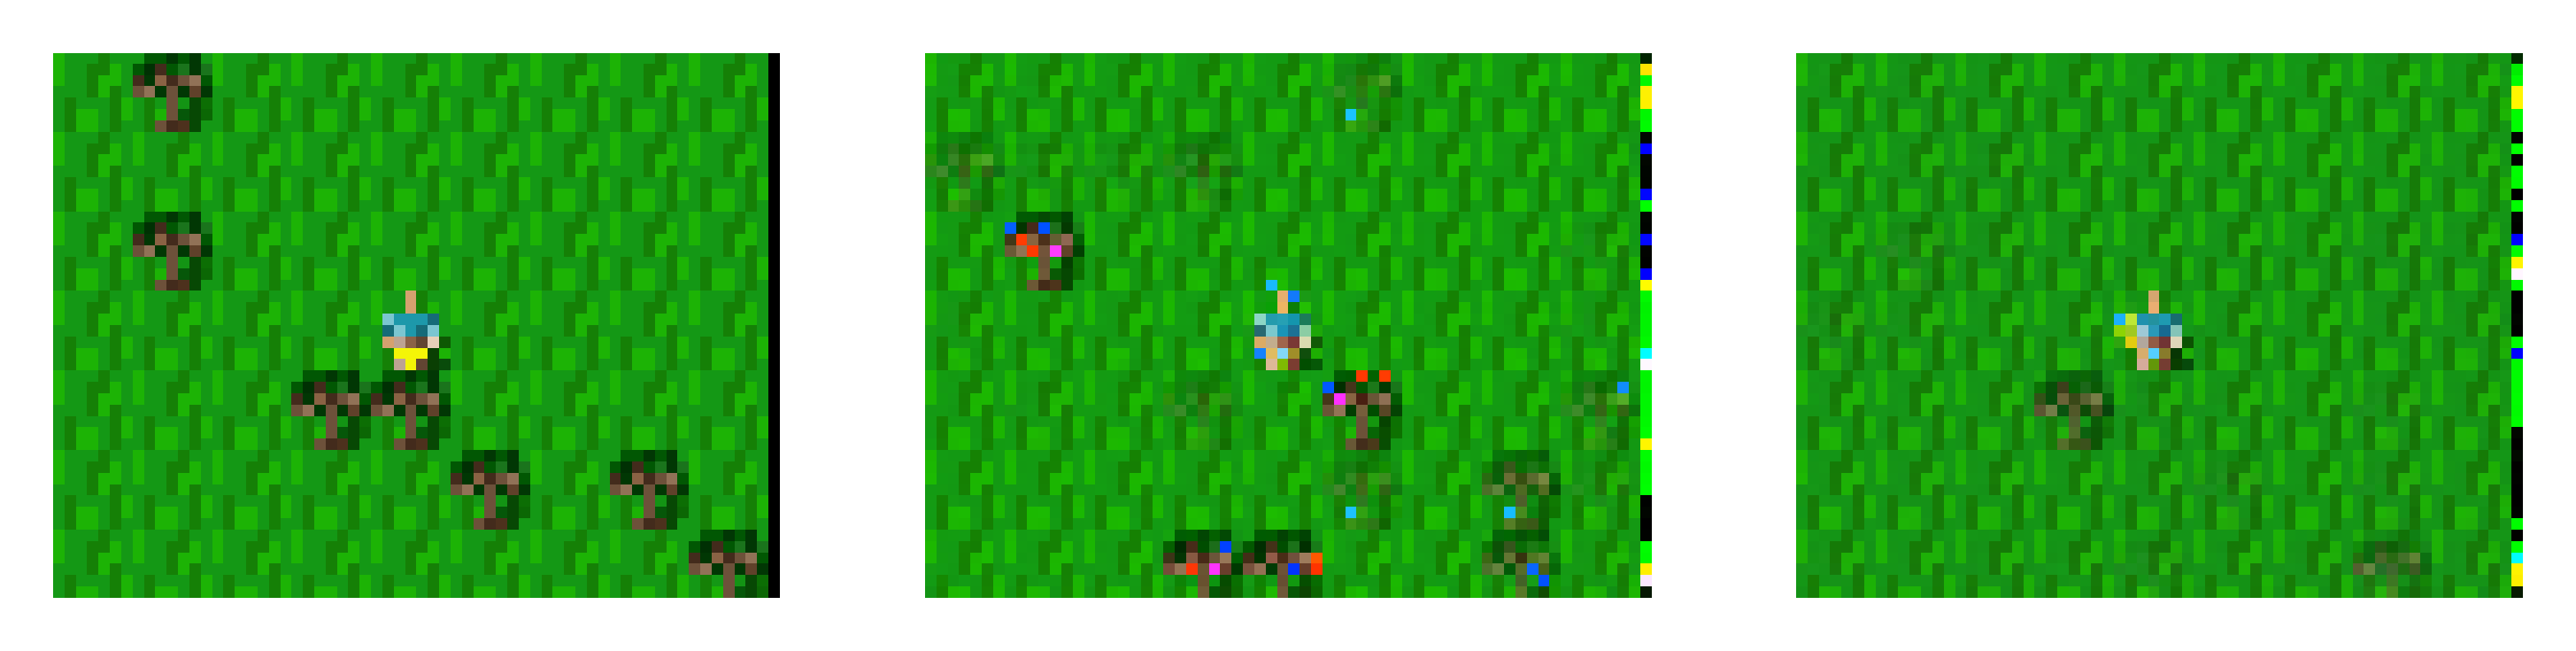

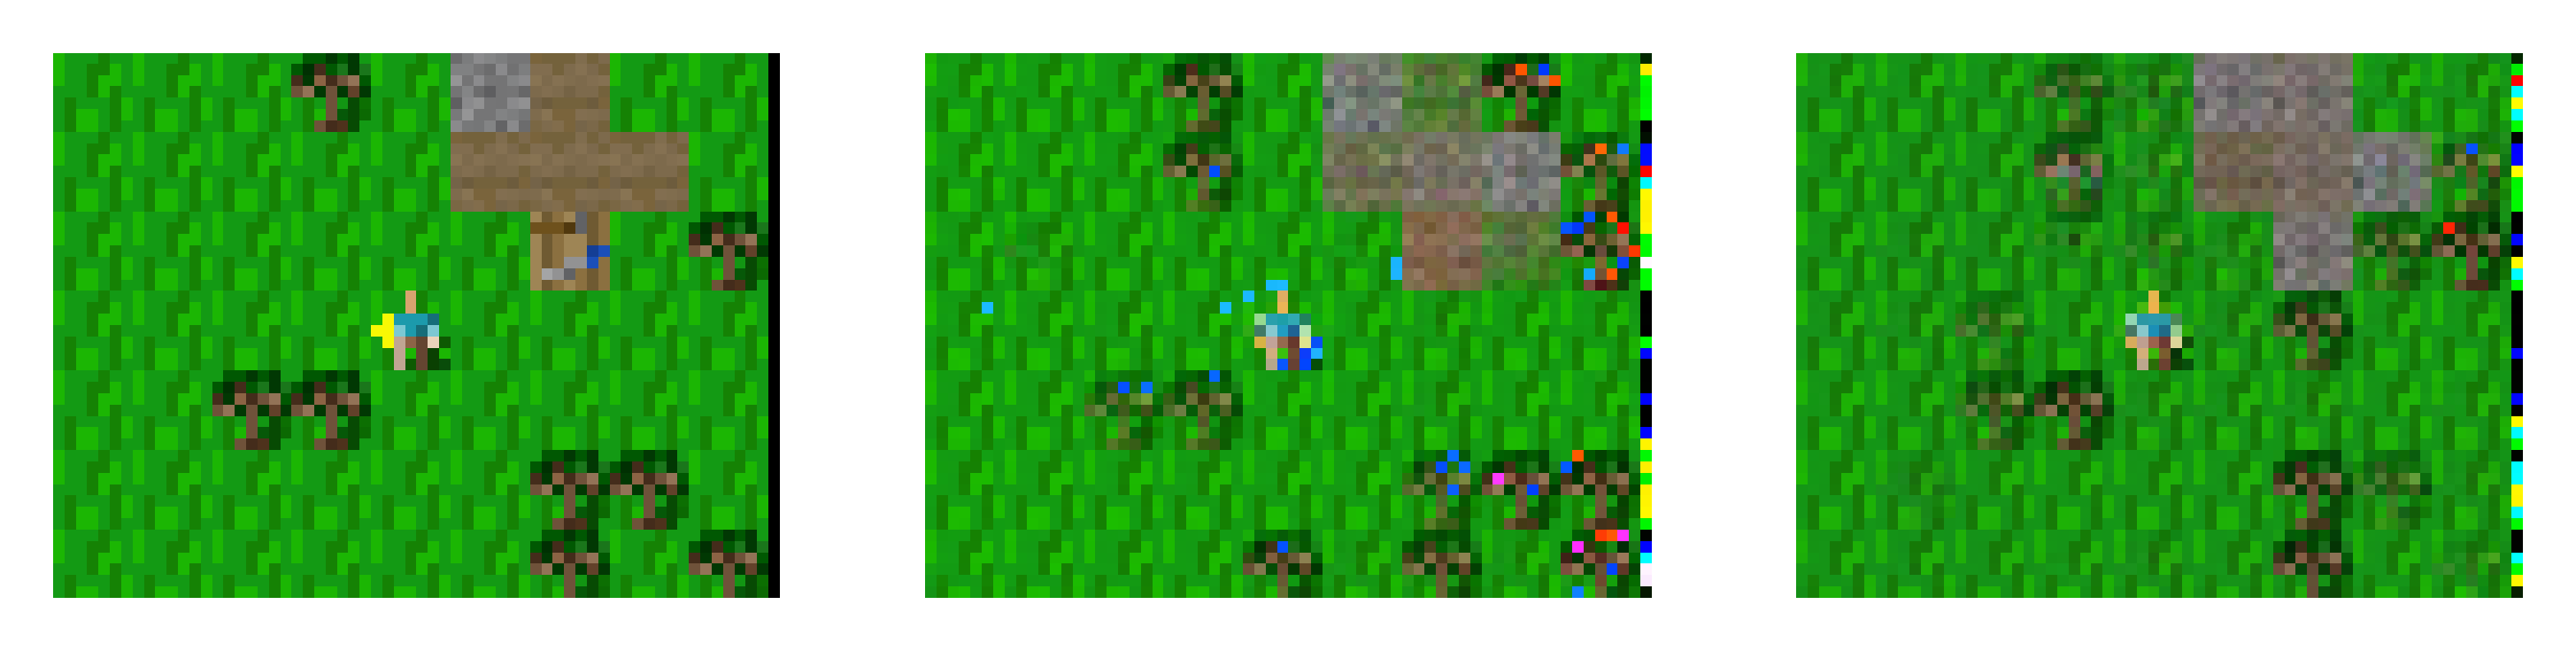

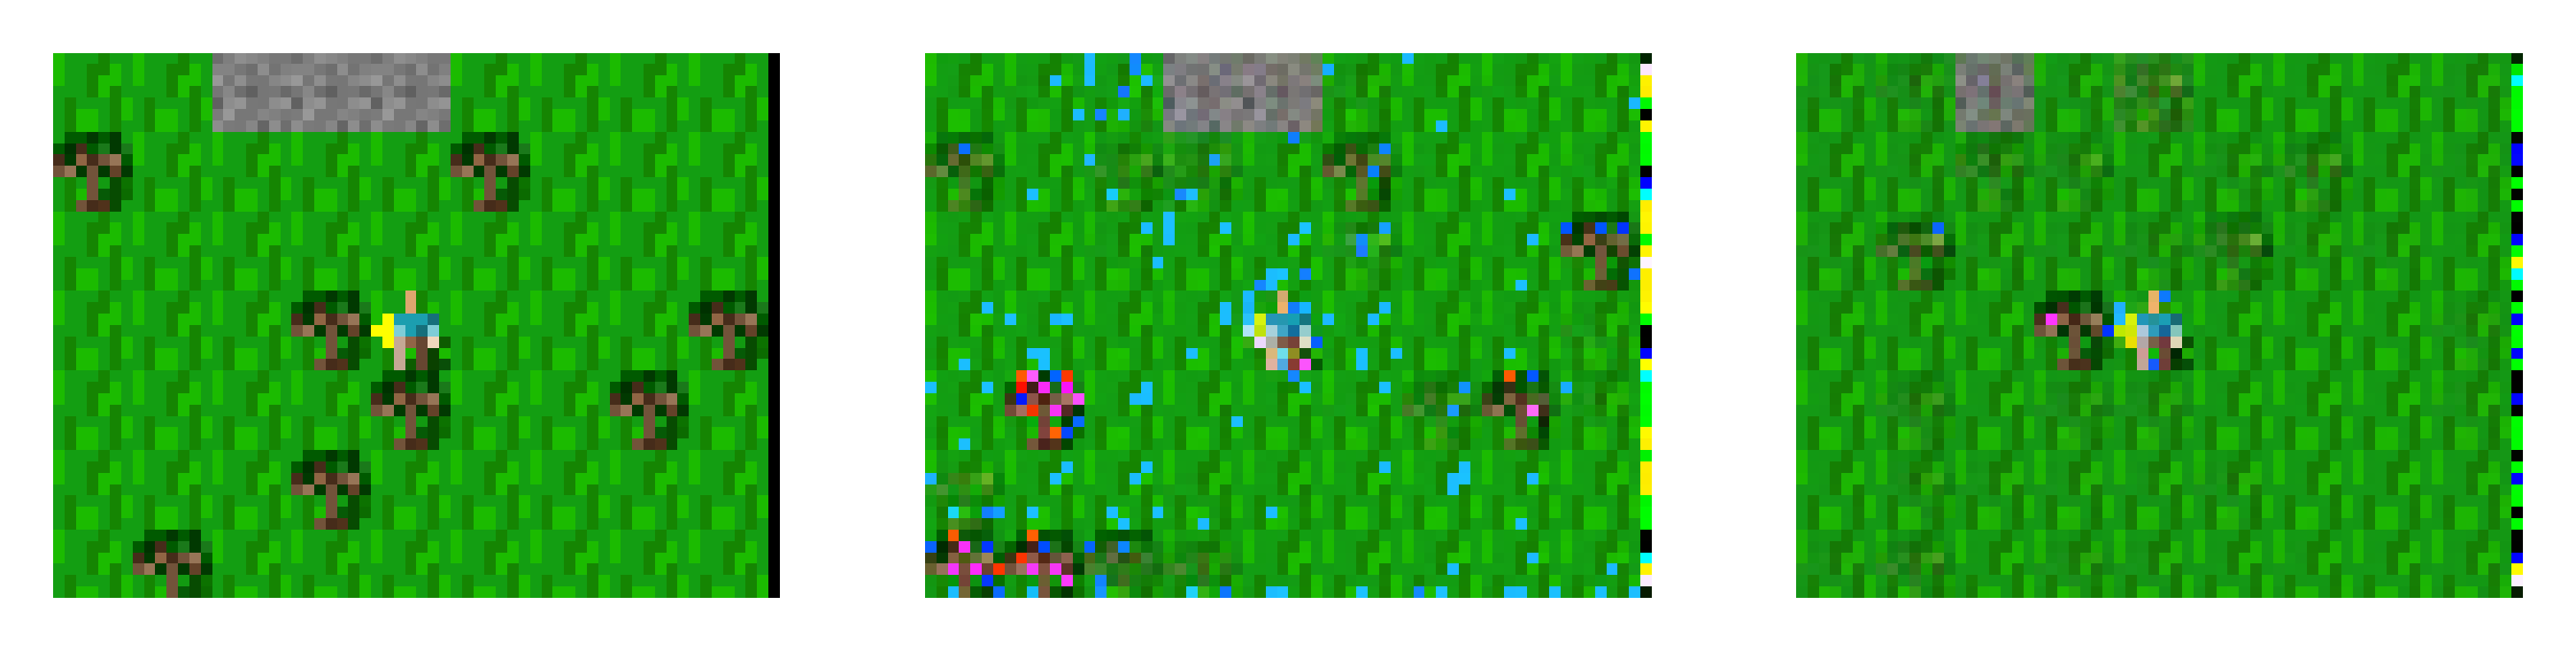

KeyboardInterrupt: 

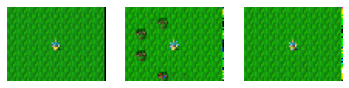

In [6]:
predict=True
dset = dset_test
if  predict:
    with torch.no_grad():
        choose(dset_test,100)

        print('predicting')

        x,_,_, recon_med = vae(dset,torch.tensor(medium_critic_value).repeat(len(dset),1))
        _,_,_, recon_high = vae(dset,torch.tensor(high_critic_value).repeat(len(dset),1))
        _,_,_, recon_low = vae(dset,torch.tensor(low_critic_value).repeat(len(dset),1))

        print('finished')
        for i in range(len(dset)):
            plot_side_by_side(f'testim_{i}.png',[x[i],recon_high[i],recon_low[i]])
            display(Image(filename=f'testim_{i}.png',width = 349*4, height = 88*4) )

In [ ]:
for i in [*good_pics,*bad_pics,*other_biomes]:#,bad_pics[0],other_biomes[0]] :

    x,_,_, recon_med = vae(torch.unsqueeze(dset[i],0),torch.tensor(medium_critic_value).repeat(1,1))
    _,_,_, recon_high = vae(torch.unsqueeze(dset[i],0),torch.tensor(high_critic_value).repeat(1,1))
    _,_,_, recon_low = vae(torch.unsqueeze(dset[i],0),torch.tensor(low_critic_value).repeat(1,1))
        
    plot_side_by_side(f'testim_{i}.png',[x[0],recon_high[0],recon_low[0]],labels=['original','reconstruction with \ncritic value=1','reconstruction with \ncritic value=0'])  
    
for i in good_pics:
    display(Image(filename=f'testim_{i}.png',width = 349*3, height = 88*3) )

In [8]:

import matplotlib.pyplot as plt

In [ ]:
plt.rcParams["figure.dpi"] = 300
plot = pd.read_csv('../crafter_critic_training_log.csv')[['train_loss','val_loss']].plot()

fig = plot.get_figure()
fig.savefig("vae_loss.pdf")

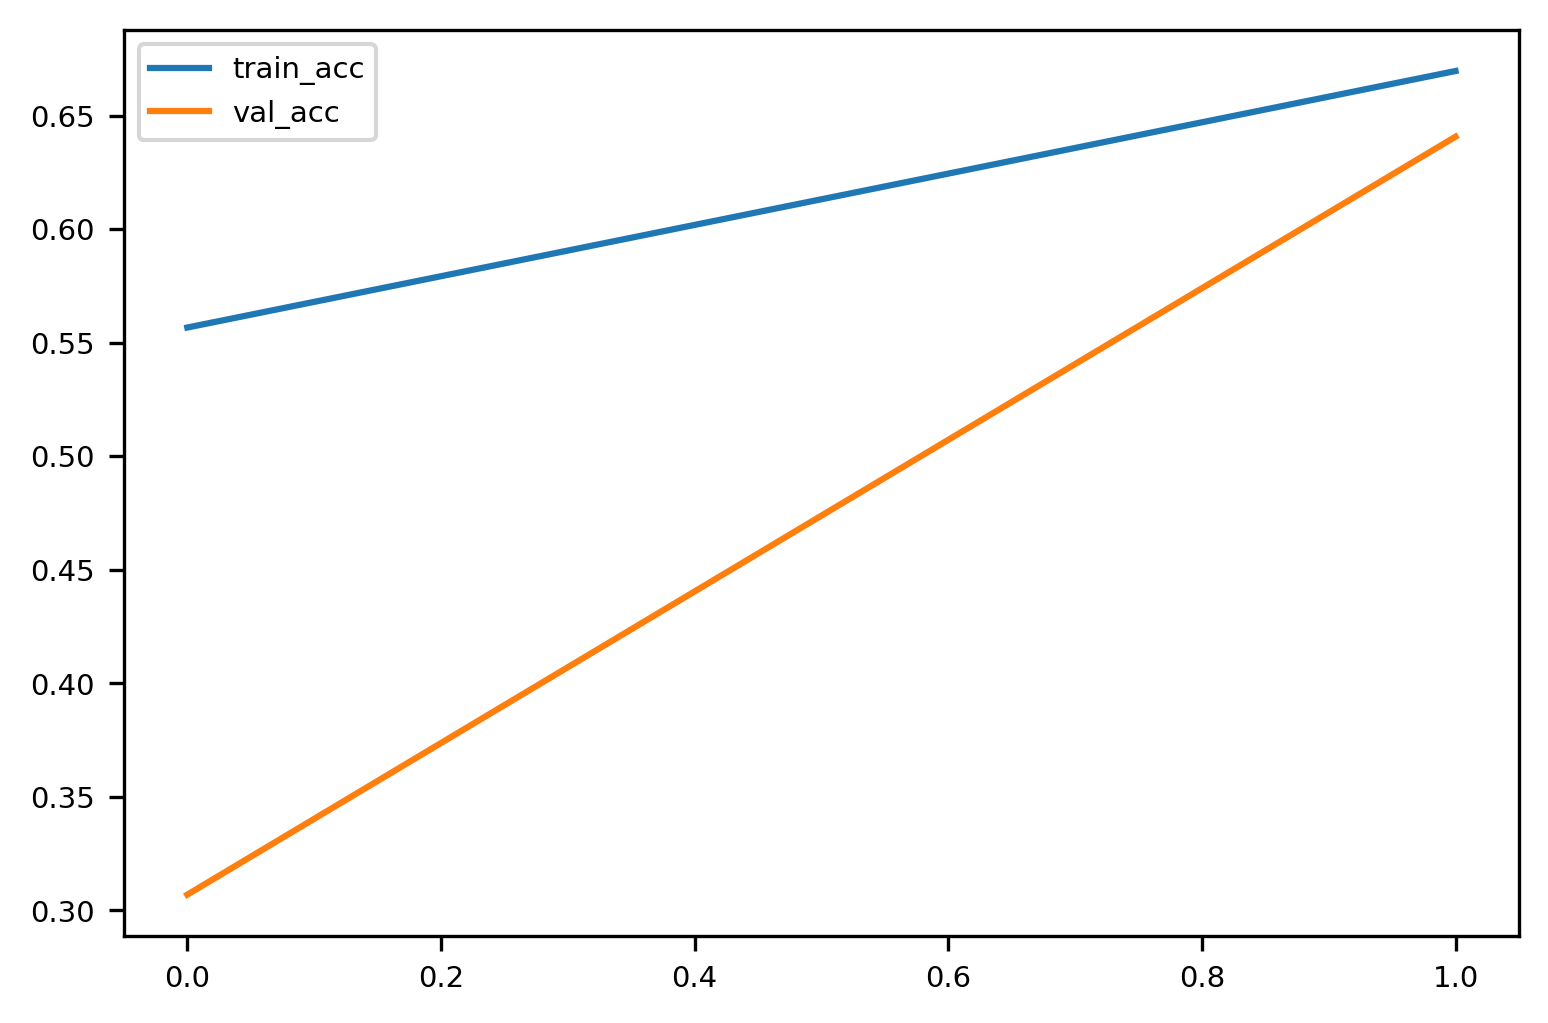

In [12]:
plt.rcParams["figure.dpi"] = 300
plot = pd.read_csv('../crafter_critic_training_log.csv')[['train_acc','val_acc']].plot()

fig = plot.get_figure()
fig.savefig("vae_loss.pdf")

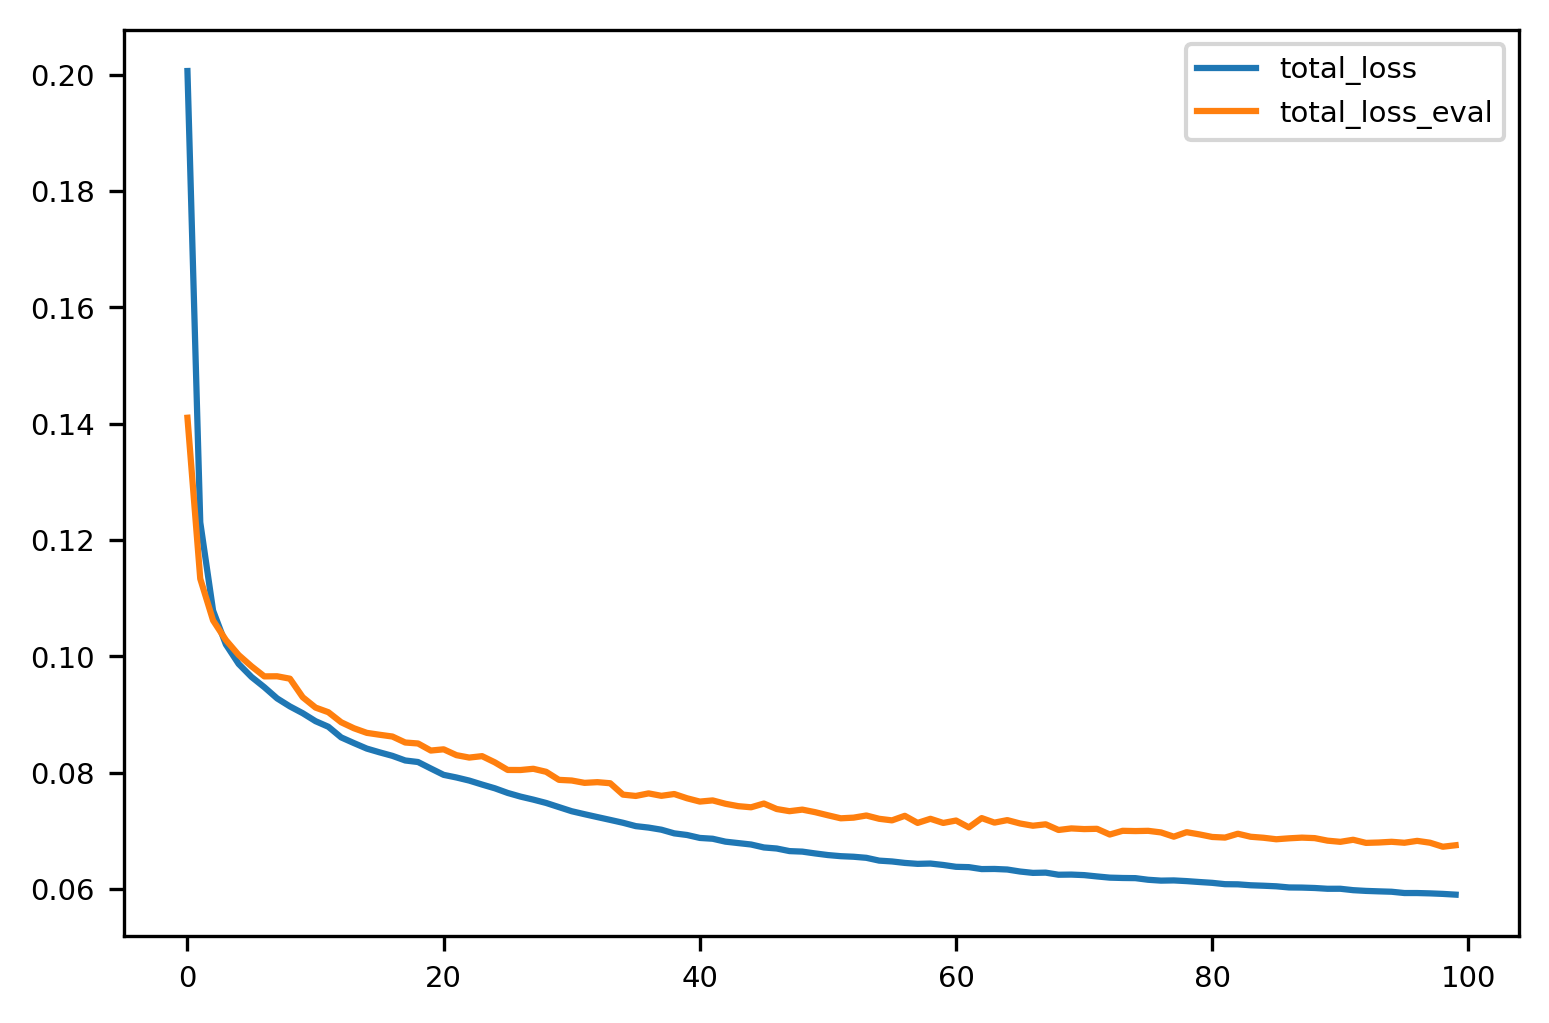

In [9]:
plt.rcParams["figure.dpi"] = 300
plot = pd.read_csv('../crafter_training_log.csv')[['total_loss','total_loss_eval']].plot()

fig = plot.get_figure()
fig.savefig("vae_loss.pdf")